In [1]:
%matplotlib inline
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import re
# import pydotplus
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer

from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import PowerTransformer

from IPython.display import display
from sklearn.decomposition import PCA
import renders as rs

from sklearn.mixture import GaussianMixture as GMM
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
import itertools

In [2]:
def load_survey_data():
    df = pd.read_csv('All_Responses_Removed.csv')
    return df

In [3]:
user_responses = load_survey_data()

In [4]:
# user_responses.head()

In [5]:
# user_responses.describe()

In [6]:
user_responses.drop(columns=['Prolific ID'], inplace=True)

In [7]:
user_responses.columns = user_responses.columns.str.replace(r'[\s\n\t ]+', '-')
user_responses.columns = user_responses.columns.str.replace(r'[a-d]-', '-')
demographics_data = user_responses.iloc[:,:8]
demographics_user_responses = demographics_data.reindex(sorted(demographics_data.columns), axis=1)
question_subset = user_responses.reindex(sorted(user_responses.columns[8:]), axis=1)
reordered_user_responses = pd.concat([demographics_user_responses, question_subset], axis=1)

In [8]:
relevant_indexes = []
demographics_column_indexes = ['Age', 'Gender', 'IUIPC-Awareness', 'IUIPC-Collection', 'IUIPC-Control',
                               'Online-Presence', 'Personal-Stability', 'Reciprocity']

relevant_indexes.extend(demographics_column_indexes)

In [9]:
# reordered_user_responses.loc[reordered_user_responses['Age'] <= 17, 'Age'] = 0
# reordered_user_responses.loc[
#     (reordered_user_responses['Age'] > 17) & (reordered_user_responses['Age'] <= 24), 'Age'] = 1
# reordered_user_responses.loc[
#     (reordered_user_responses['Age'] > 24) & (reordered_user_responses['Age'] <= 34), 'Age'] = 2
# reordered_user_responses.loc[
#     (reordered_user_responses['Age'] > 34) & (reordered_user_responses['Age'] <= 44), 'Age'] = 3
# reordered_user_responses.loc[
#     (reordered_user_responses['Age'] > 44) & (reordered_user_responses['Age'] <= 54), 'Age'] = 4
# reordered_user_responses.loc[
#     (reordered_user_responses['Age'] > 54) & (reordered_user_responses['Age'] <= 64), 'Age'] = 5
# reordered_user_responses.loc[reordered_user_responses['Age'] > 64, 'Age'] = 6

# reordered_user_responses.loc[reordered_user_responses['Online-Presence'] <= 5, 'Online-Presence'] = 0
# reordered_user_responses.loc[(reordered_user_responses['Online-Presence'] > 5) & (
#         reordered_user_responses['Online-Presence'] <= 10), 'Online-Presence'] = 1
# reordered_user_responses.loc[(reordered_user_responses['Online-Presence'] > 10) & (
#         reordered_user_responses['Online-Presence'] <= 15), 'Online-Presence'] = 2
# reordered_user_responses.loc[(reordered_user_responses['Online-Presence'] > 15) & (
#         reordered_user_responses['Online-Presence'] <= 20), 'Online-Presence'] = 3
# reordered_user_responses.loc[(reordered_user_responses['Online-Presence'] > 20) & (
#         reordered_user_responses['Online-Presence'] <= 25), 'Online-Presence'] = 4

In [10]:
# reordered_user_responses.iloc[:, 10:207:4] = reordered_user_responses.iloc[:, 10:207:4].replace([1.0, 2.0, 3.0, 4.0, 5.0, 6.0], 0)
# reordered_user_responses.iloc[:, 10:207:4] = reordered_user_responses.iloc[:, 10:207:4].replace([7.0], 1)

In [11]:
def data_transformation(data):
    scaler = StandardScaler()
    standard_data = pd.DataFrame(scaler.fit_transform(data), columns=data.columns, index=data.index)

    transformer = PowerTransformer()
    transformed_data = pd.DataFrame(transformer.fit_transform(standard_data), columns=data.columns, index=data.index)

    return scaler, transformer, transformed_data

In [12]:
def data_scale(data):
    scaler = MinMaxScaler()
    standard_data = pd.DataFrame(scaler.fit_transform(data), columns=data.columns, index=data.index)

    return scaler, standard_data

In [13]:
def data_inverse_scale(scaler_object, data):
#     inverse_scaled_data = pd.DataFrame(scaler_object.inverse_transform(data),
#                                        columns=data.columns, index=data.index)
    
    inverse_scaled_data = scaler_object.inverse_transform(data)

    return inverse_scaled_data

/Users/smithkakar/OneDrive - King's College London/MSc/Dissertation/Deliverables/2nd Progress Report/Code/unsupervised/renders.py:28: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig, ax = plt.subplots(figsize=(14, 8))
/Users/smithkakar/OneDrive - King's College London/MSc/Dissertation/Deliverables/2nd Progress Report/Code/unsupervised/renders.py:28: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig, ax = plt.subplots(figsize=(14, 8))
/Users/smithkakar/OneDrive - King's College London/MSc/Dissertation/Deliverables/2nd Progress Report/Code/unsu

/Users/smithkakar/OneDrive - King's College London/MSc/Dissertation/Deliverables/2nd Progress Report/Code/unsupervised/renders.py:28: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig, ax = plt.subplots(figsize=(14, 8))
/Users/smithkakar/OneDrive - King's College London/MSc/Dissertation/Deliverables/2nd Progress Report/Code/unsupervised/renders.py:28: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig, ax = plt.subplots(figsize=(14, 8))
/Users/smithkakar/OneDrive - King's College London/MSc/Dissertation/Deliverables/2nd Progress Report/Code/unsu

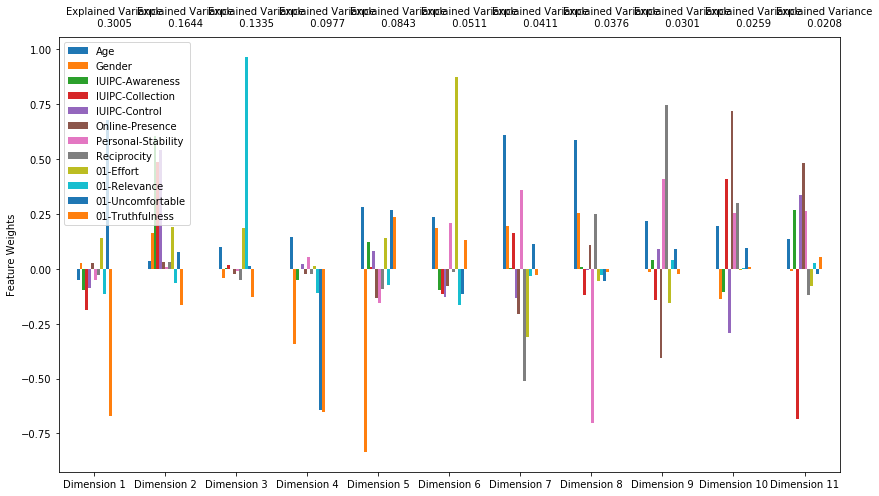

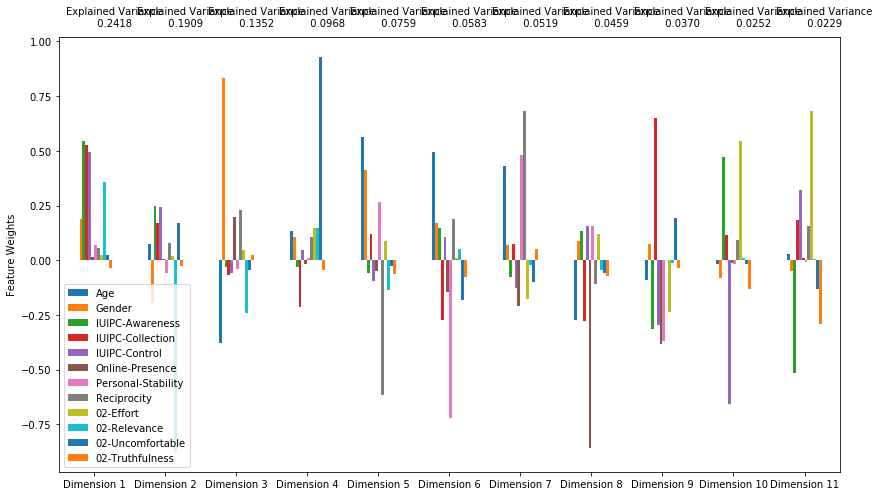

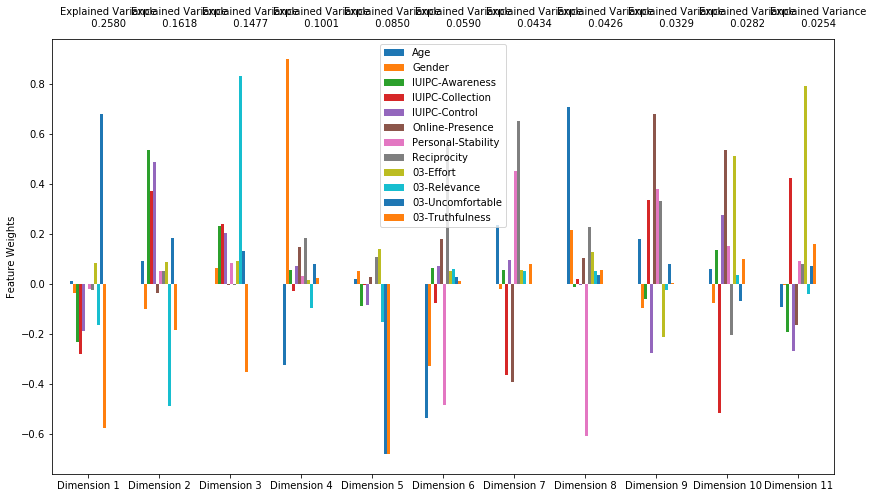

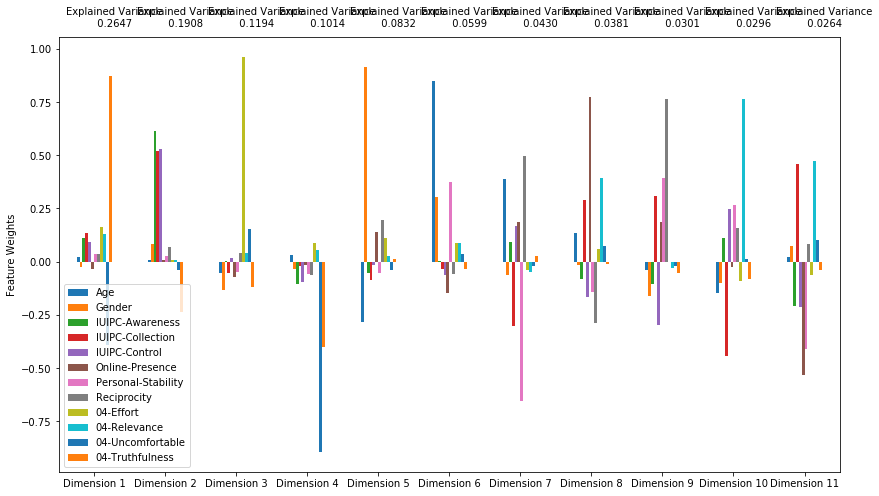

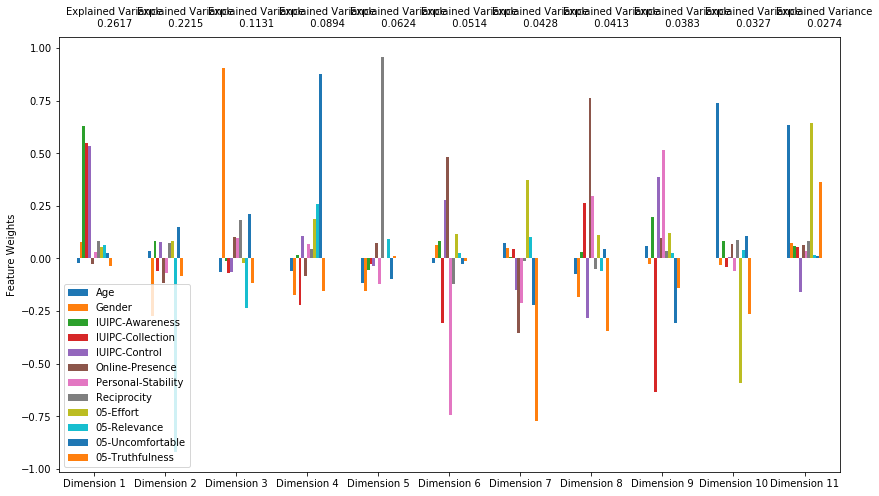

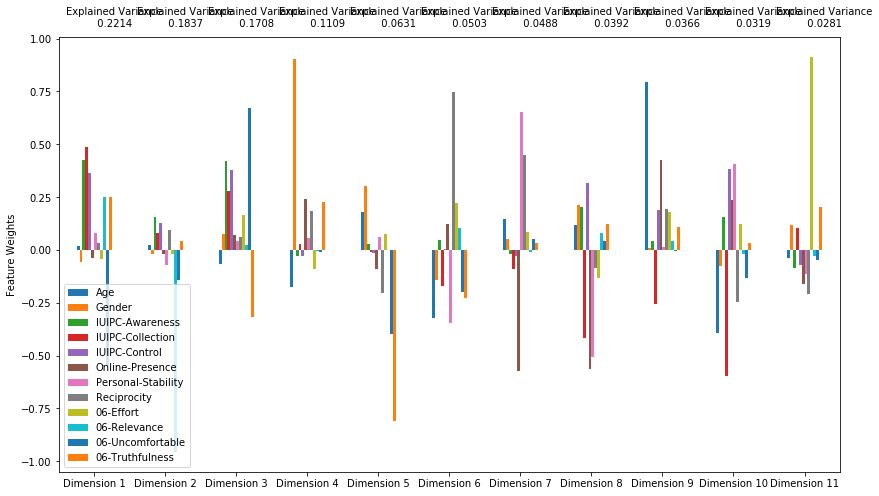

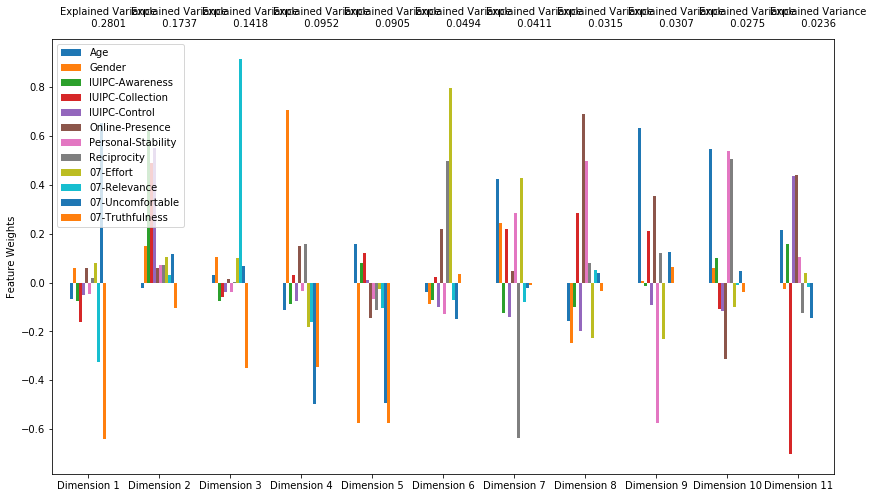

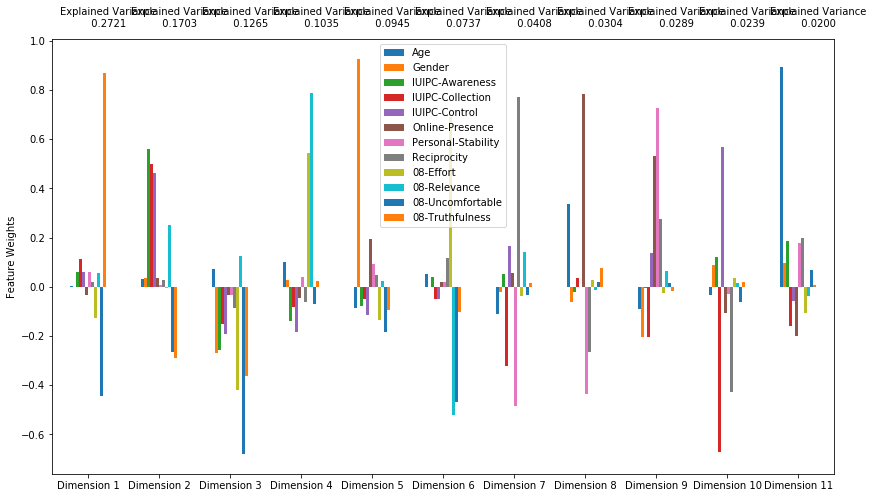

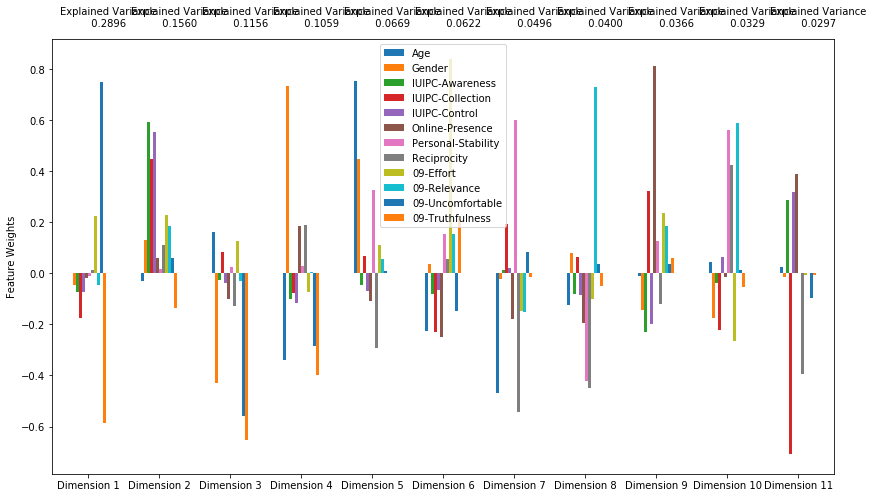

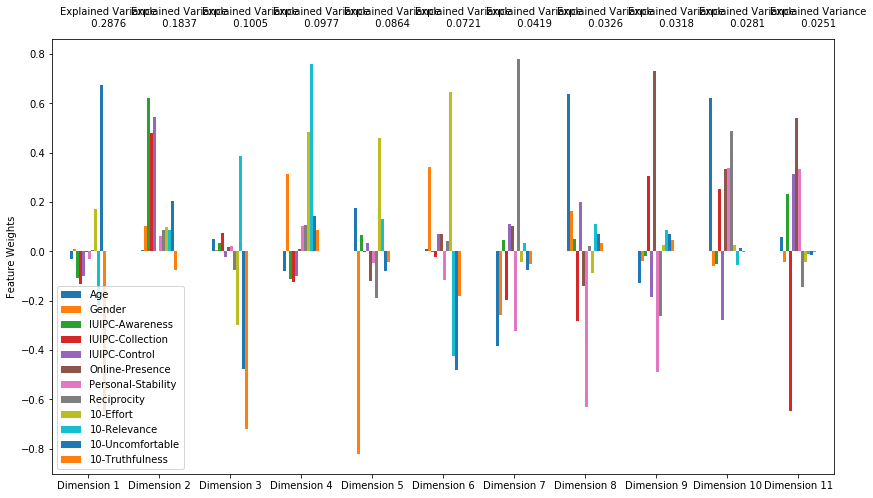

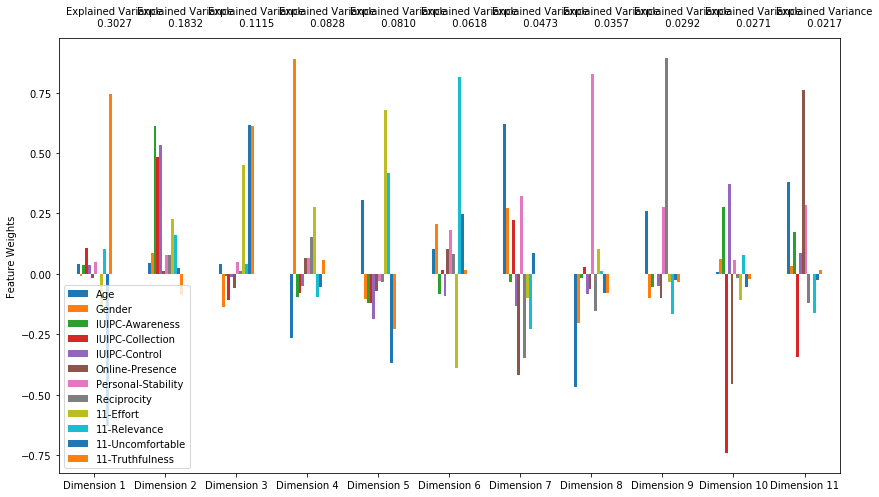

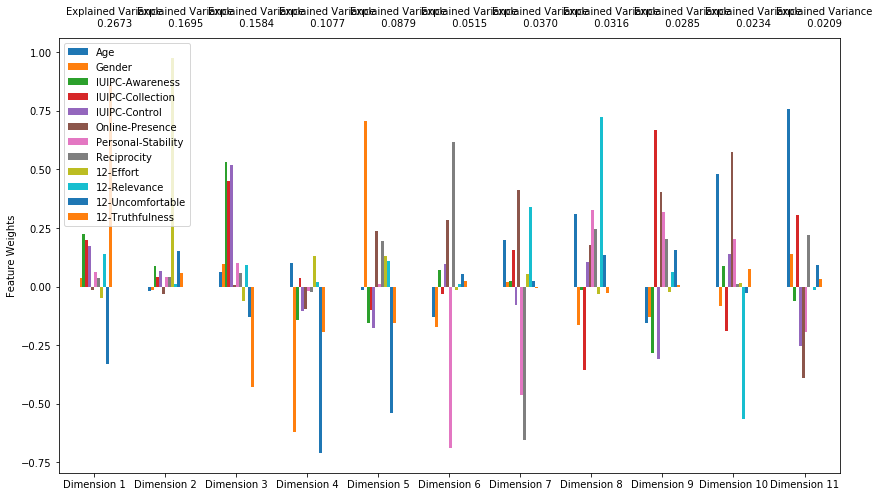

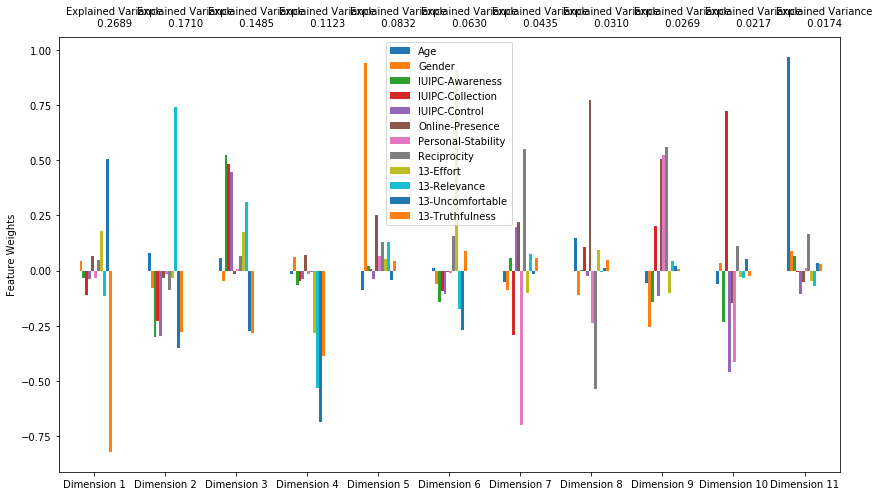

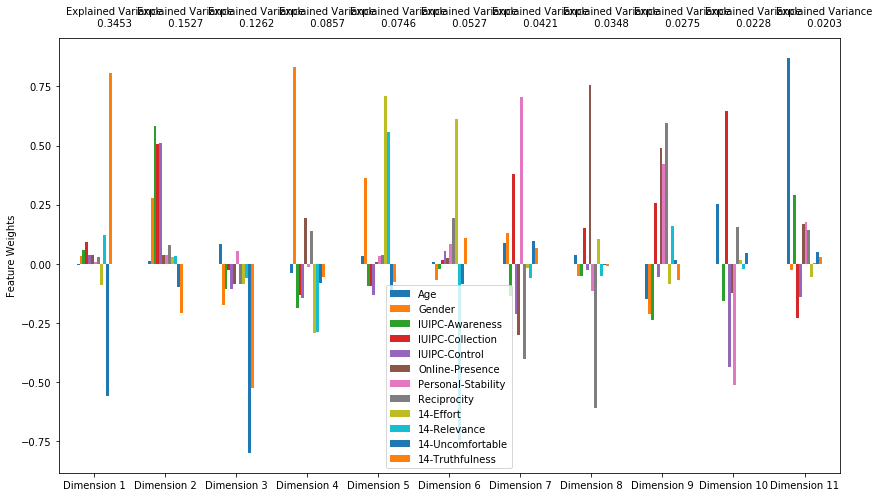

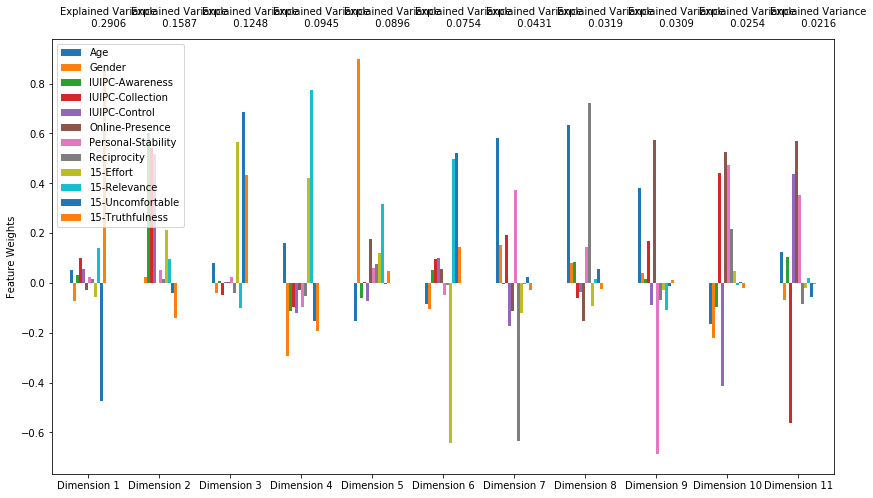

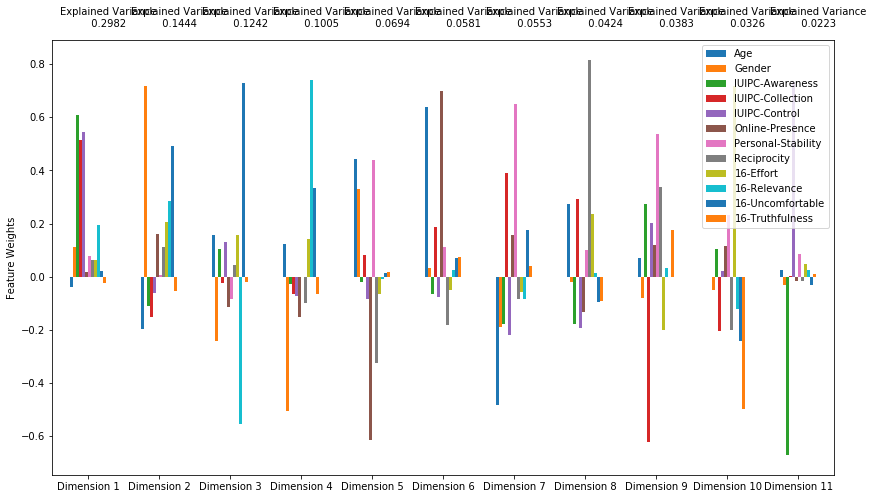

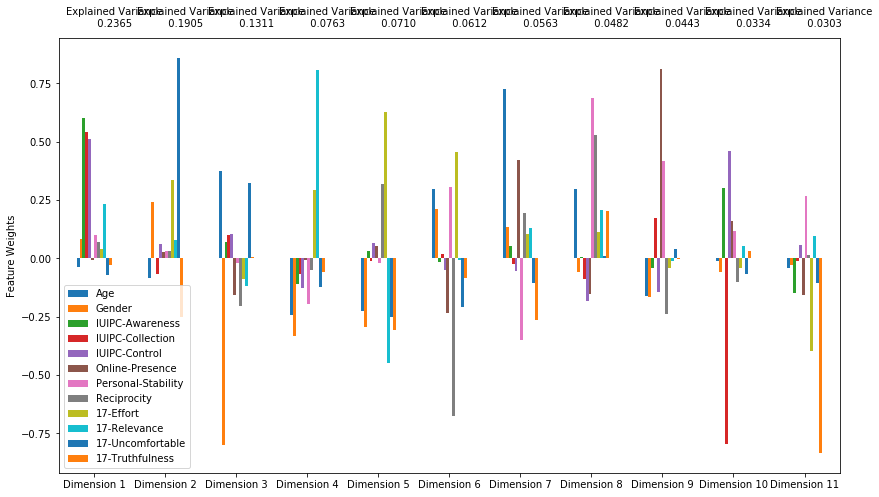

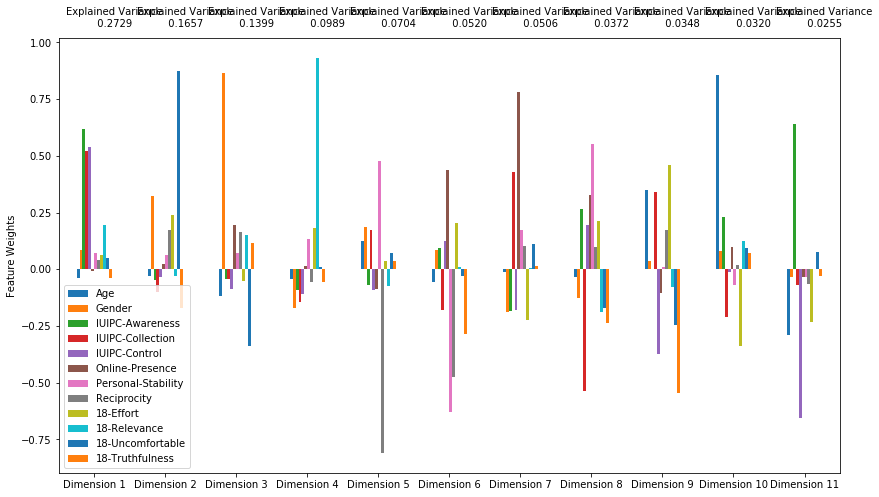

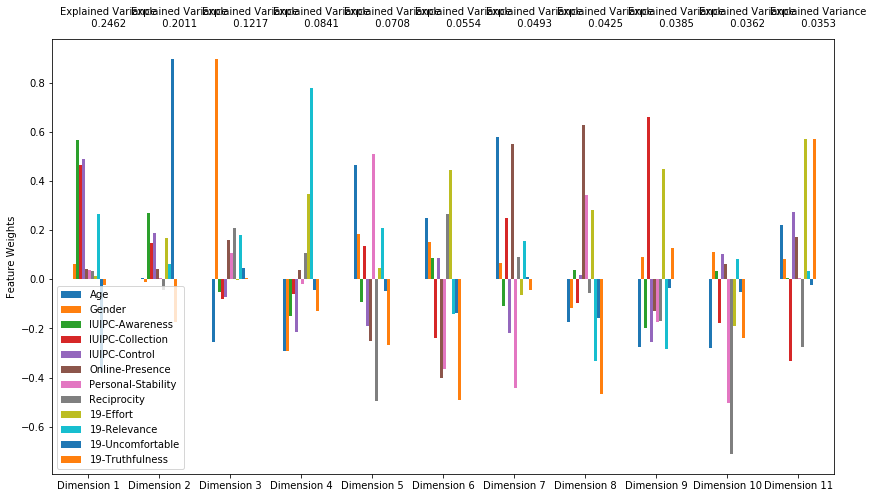

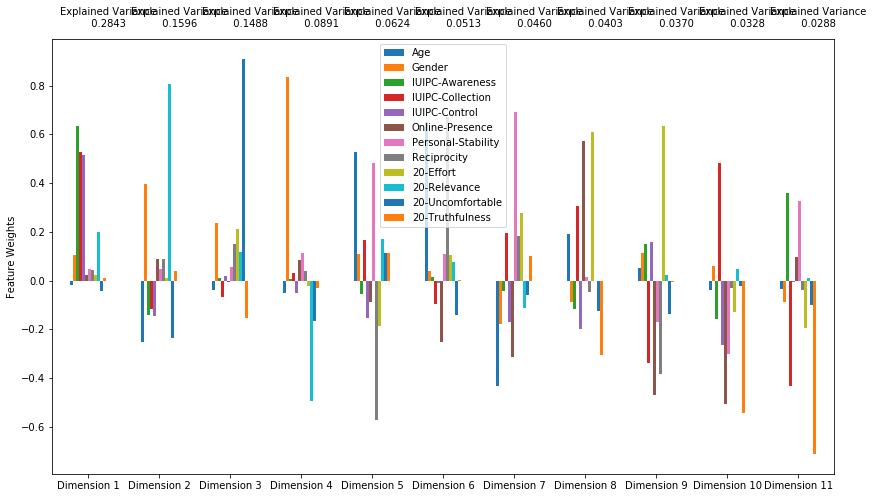

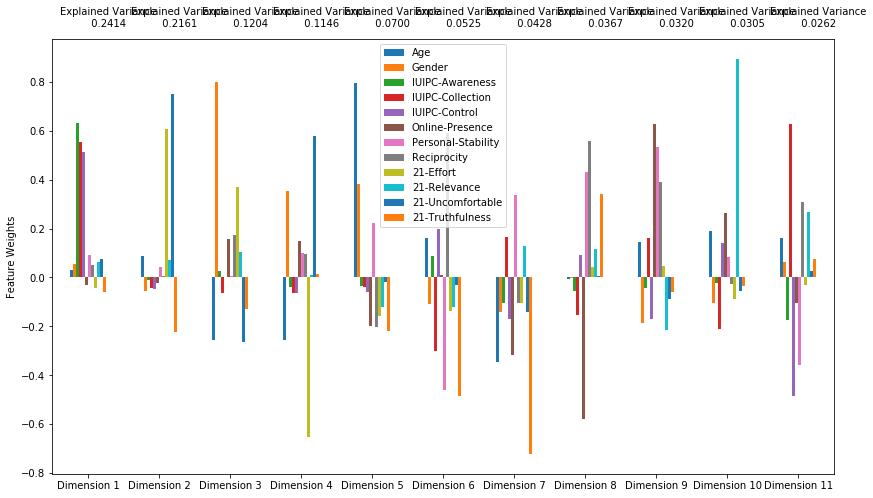

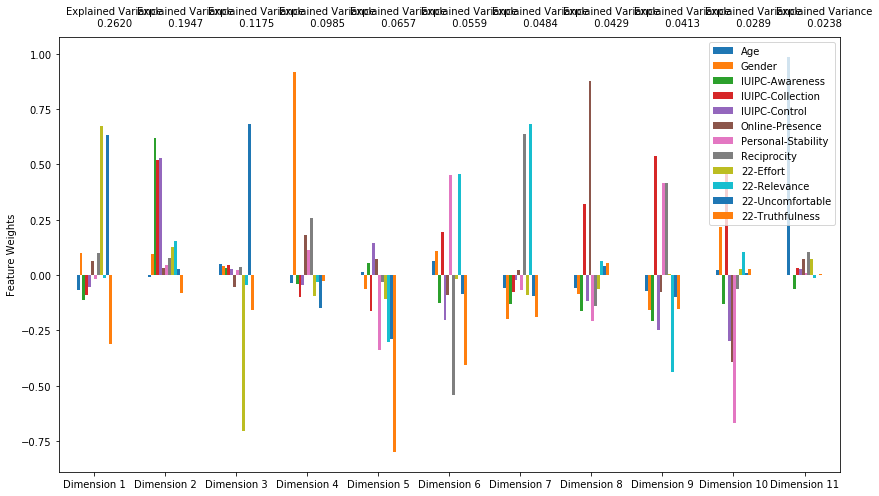

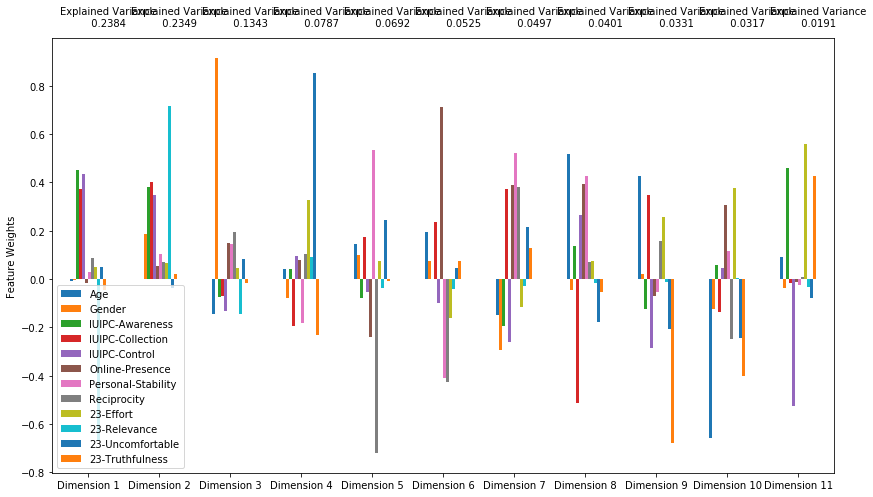

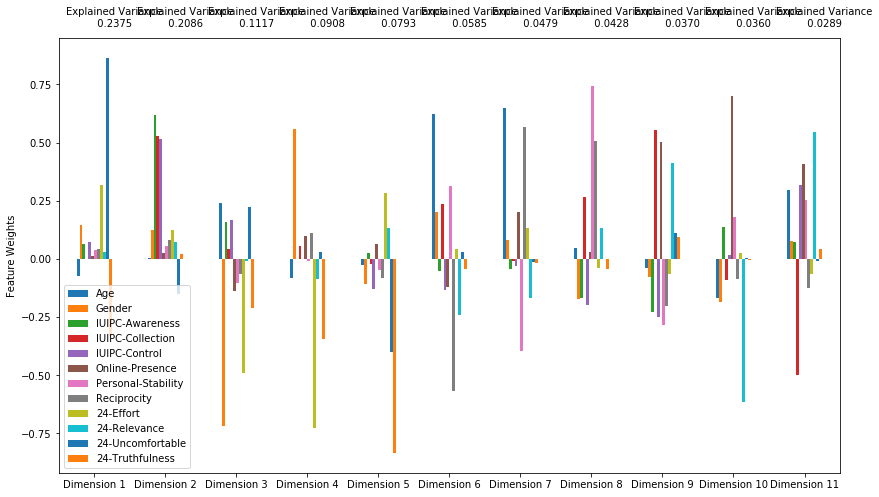

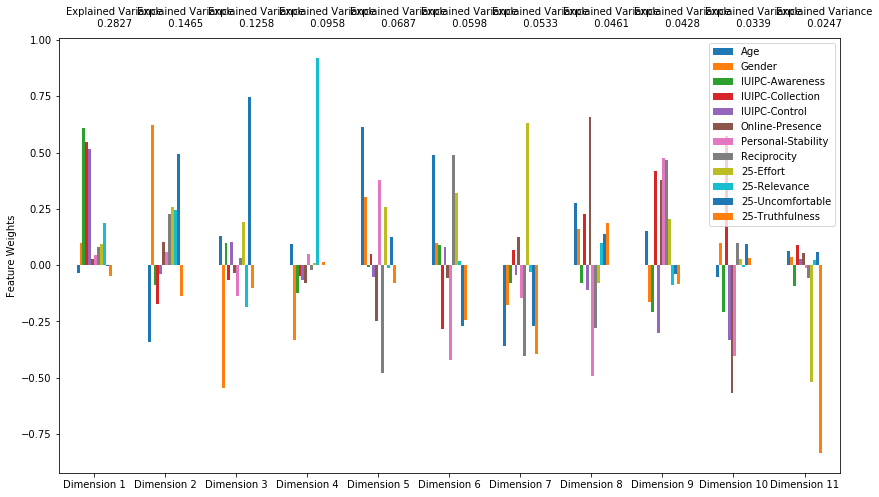

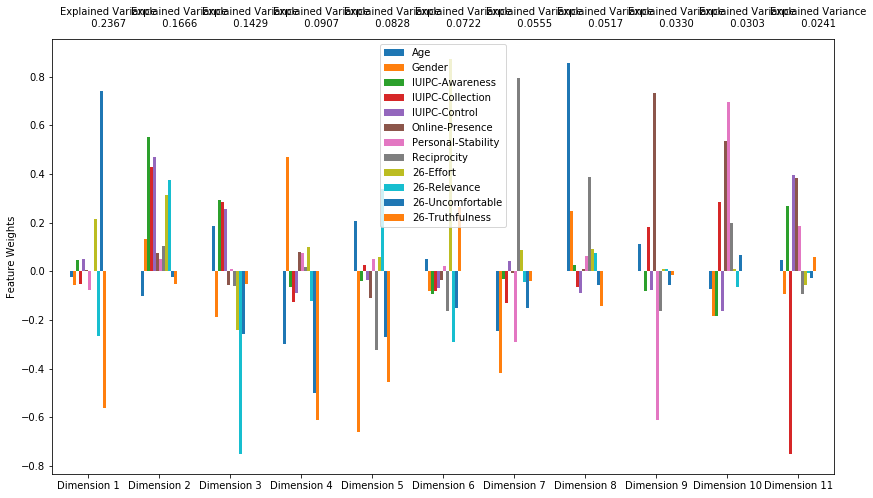

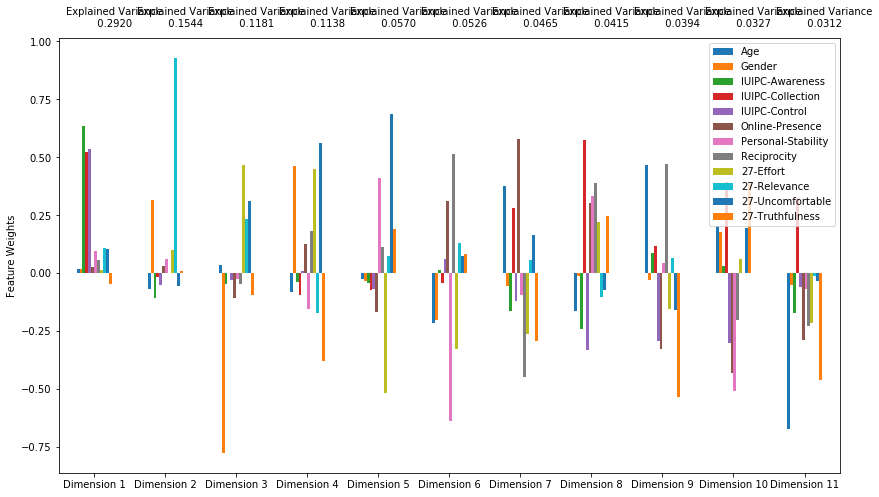

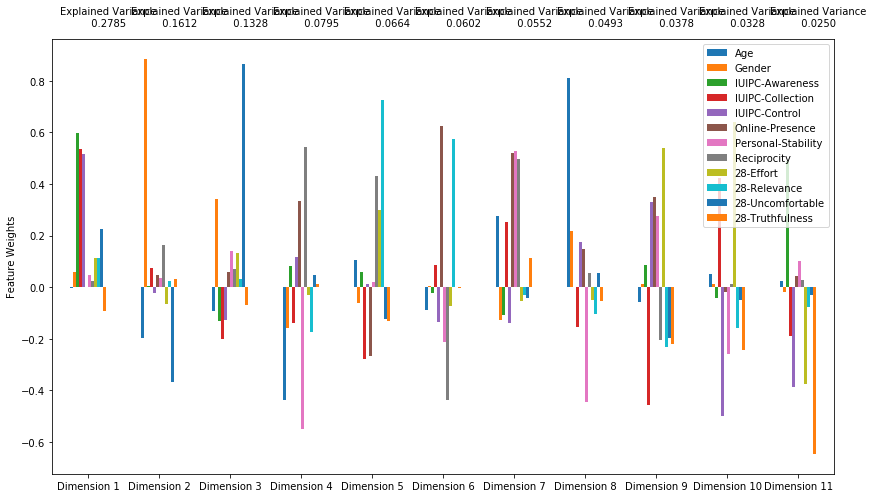

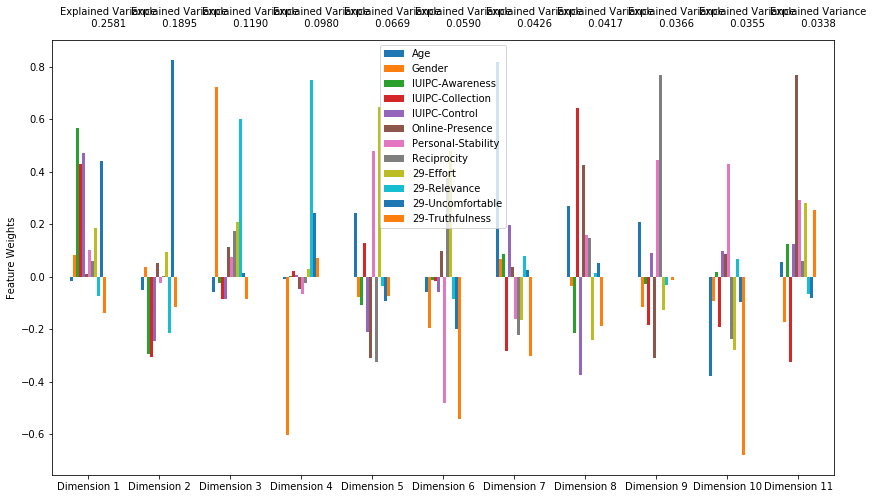

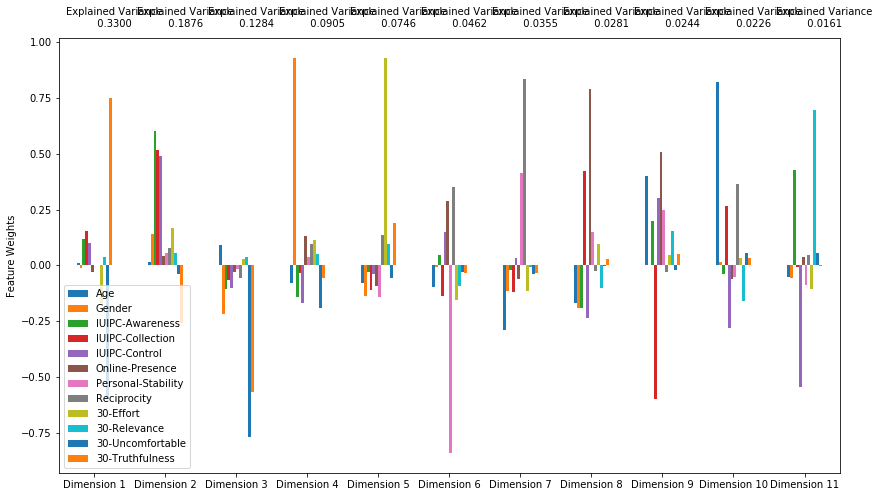

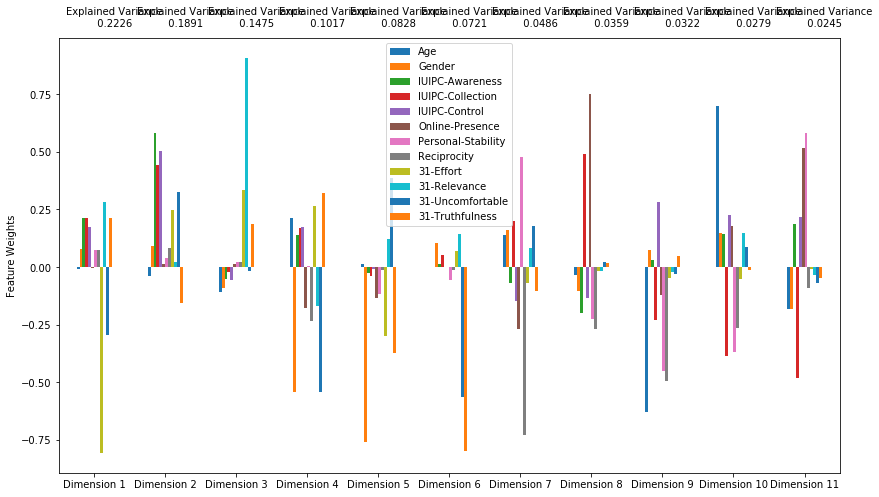

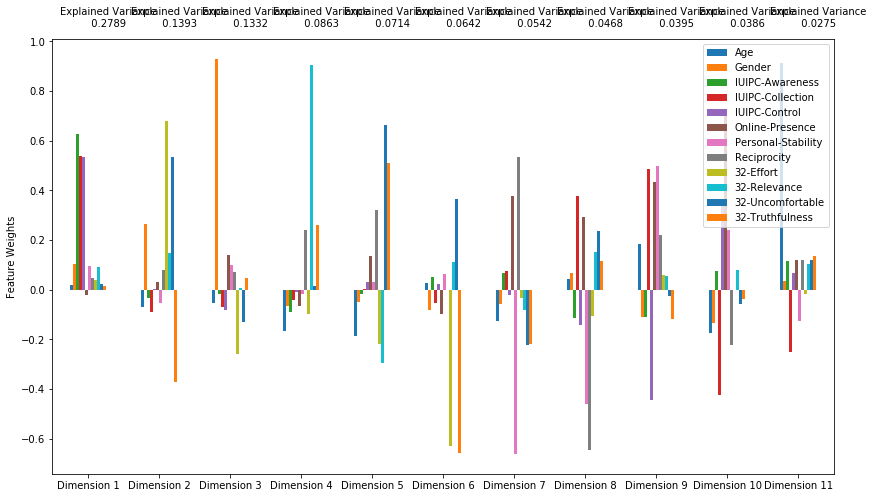

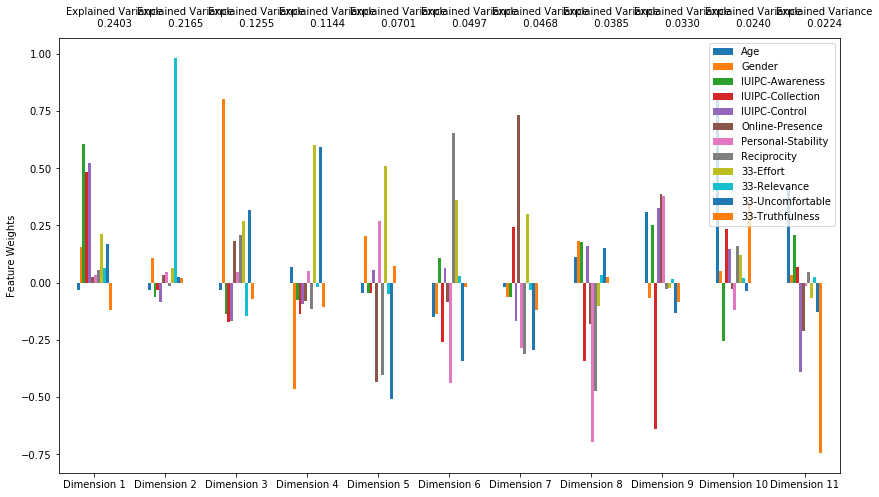

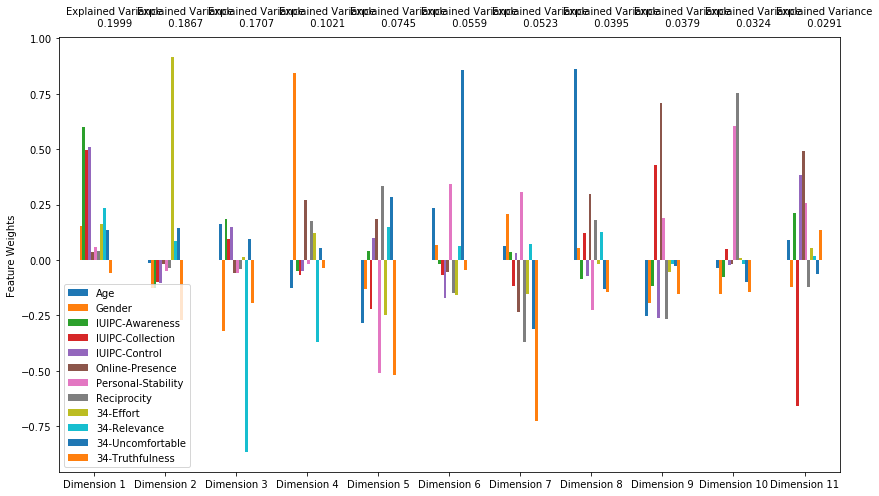

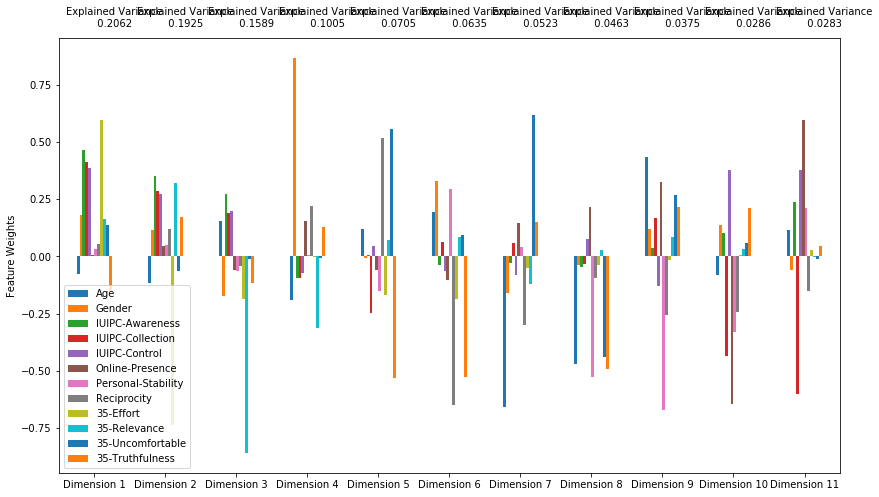

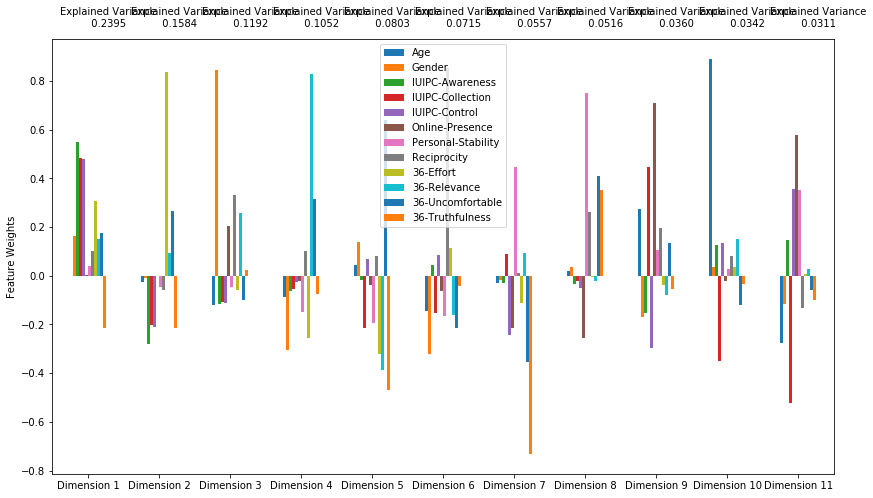

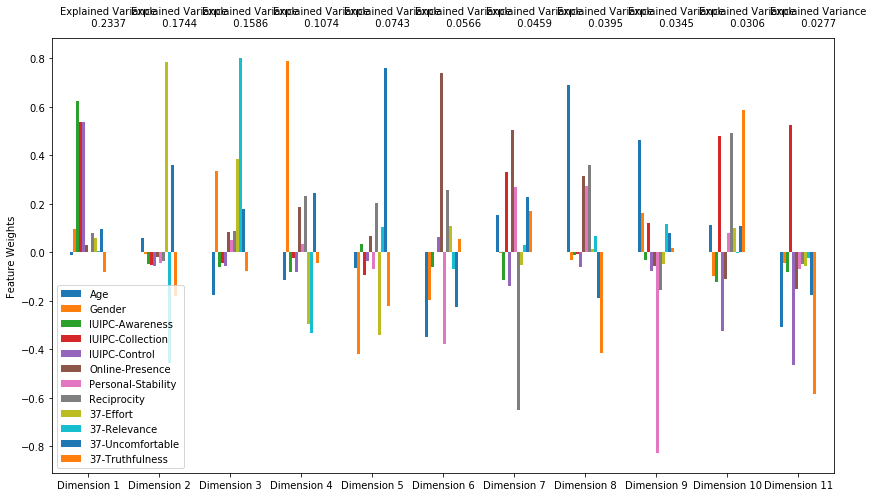

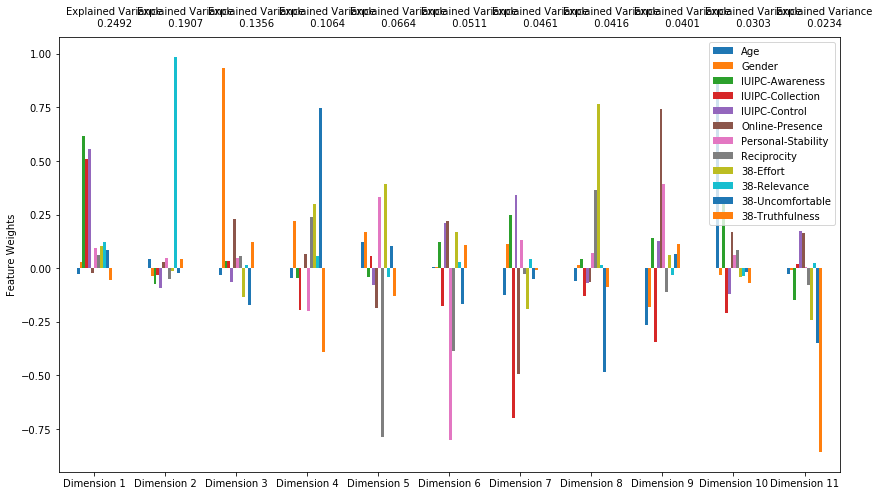

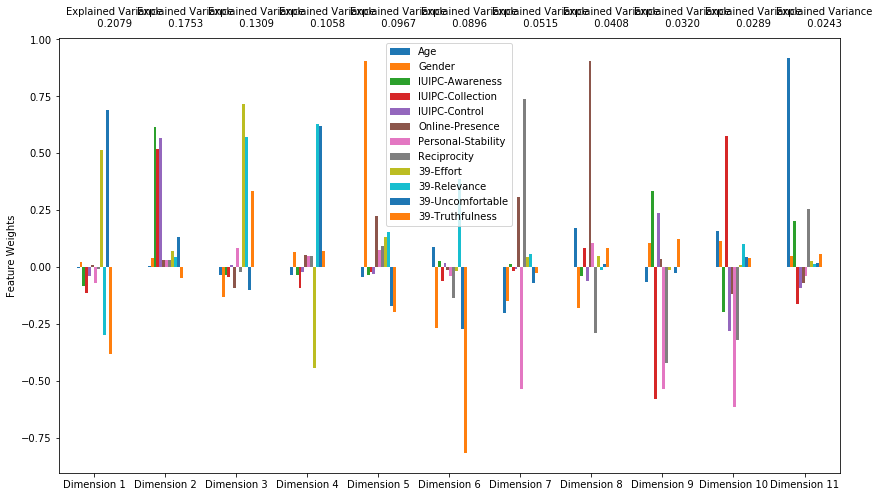

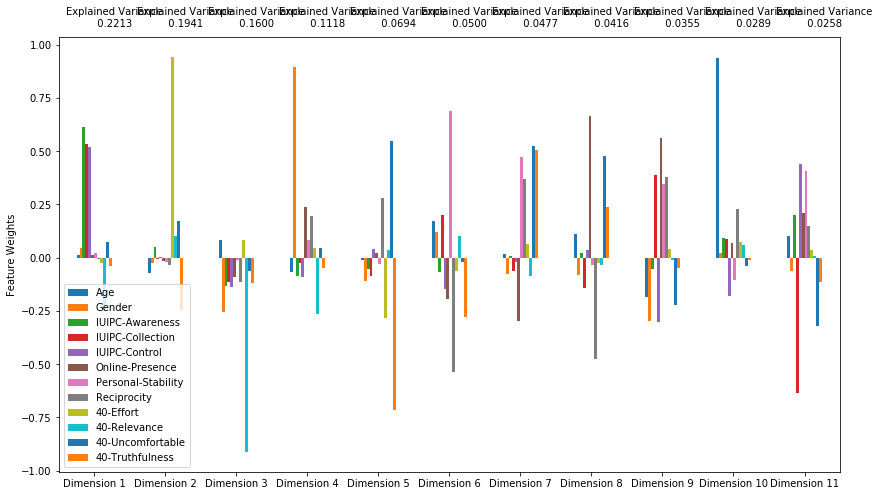

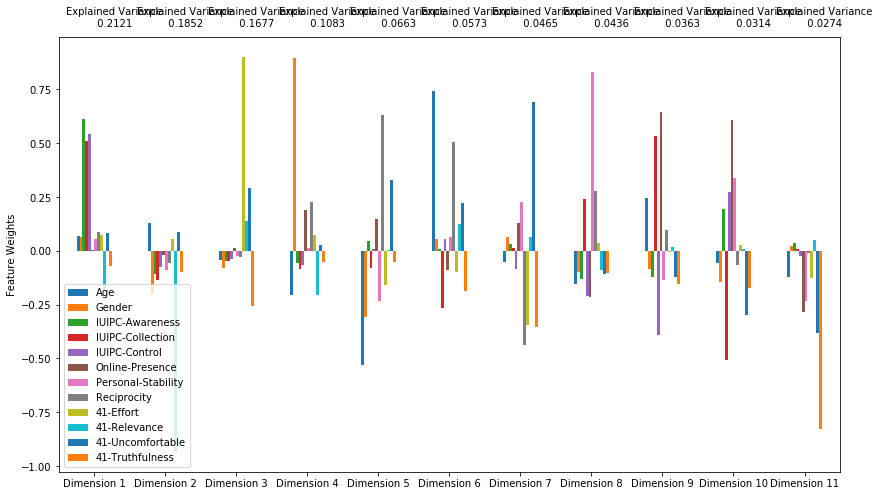

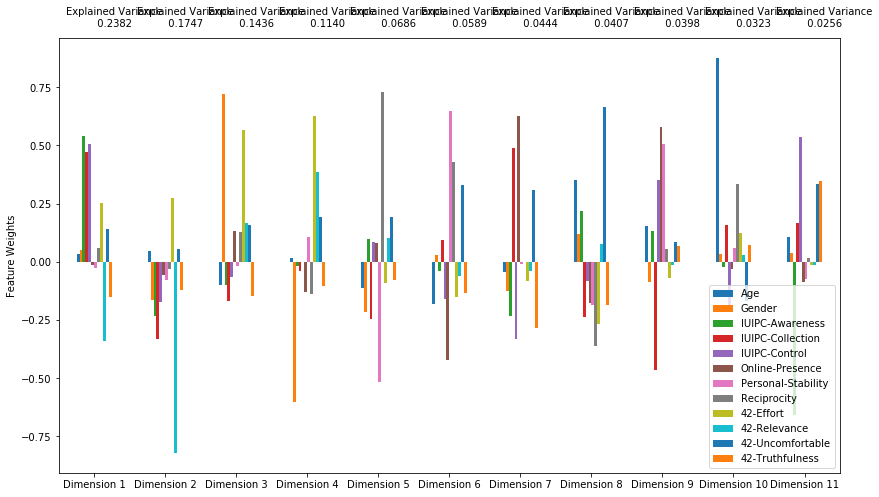

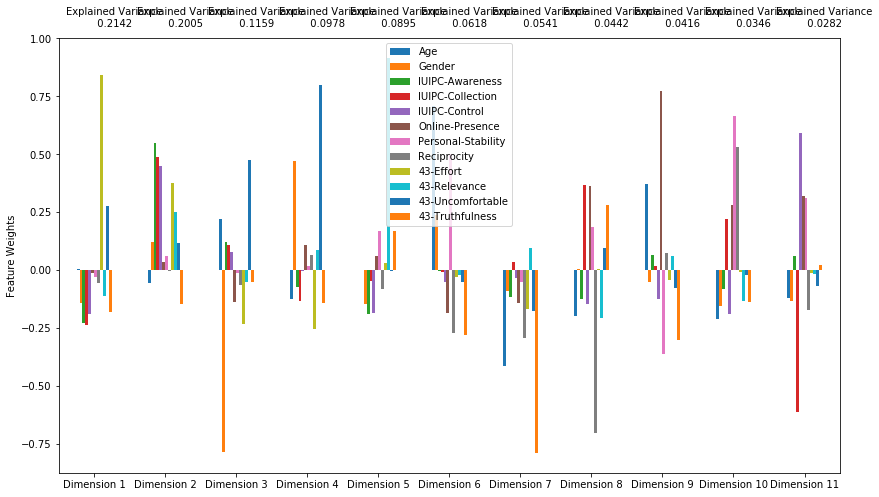

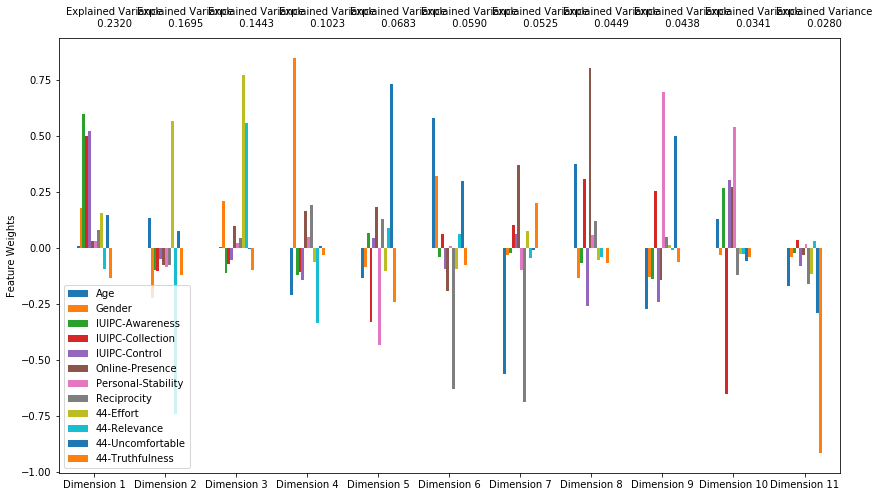

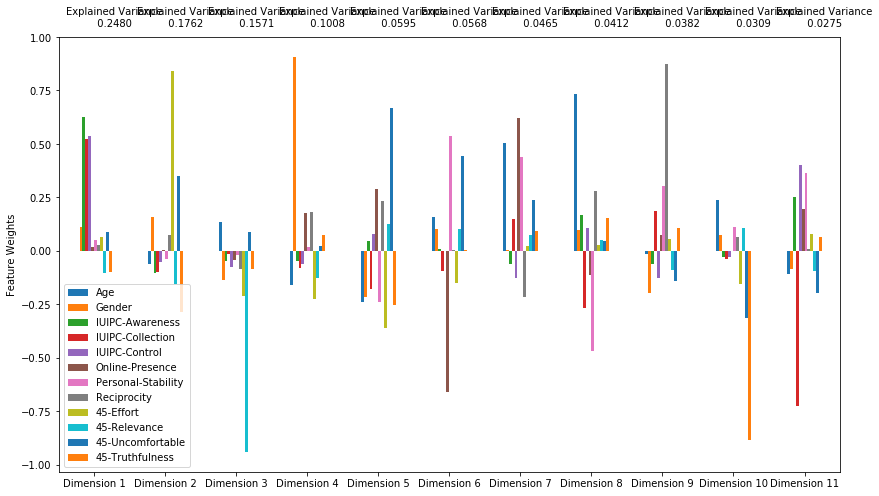

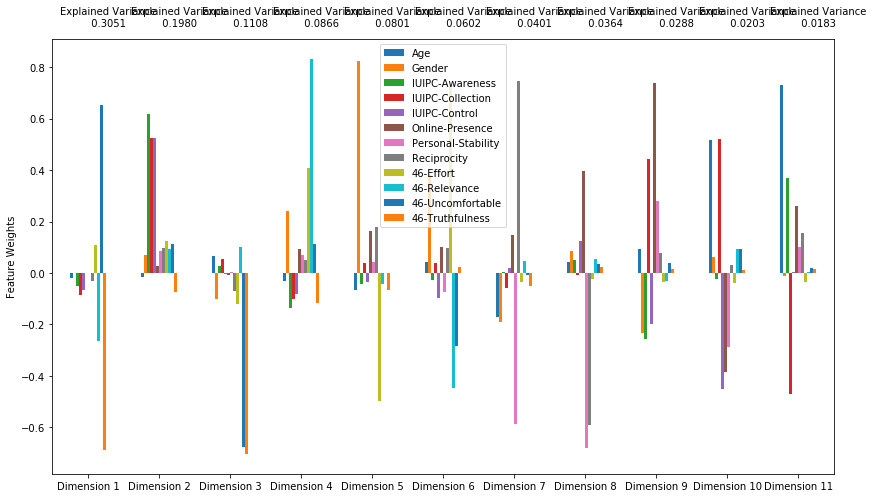

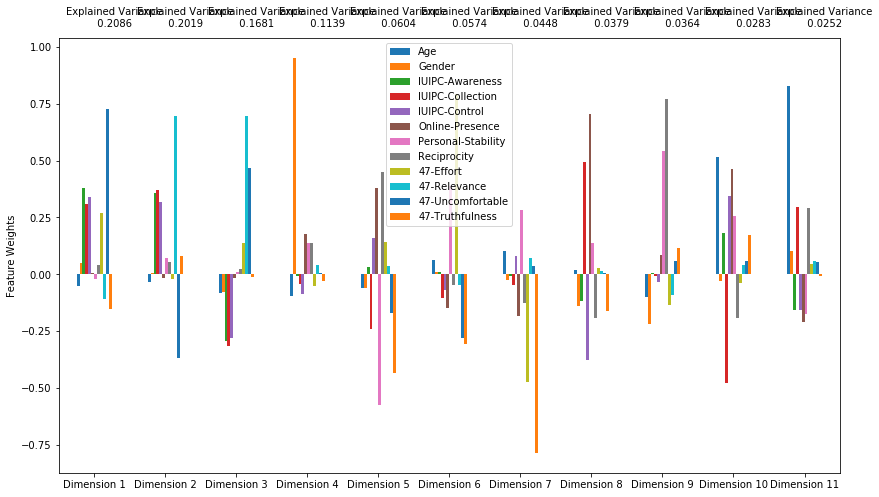

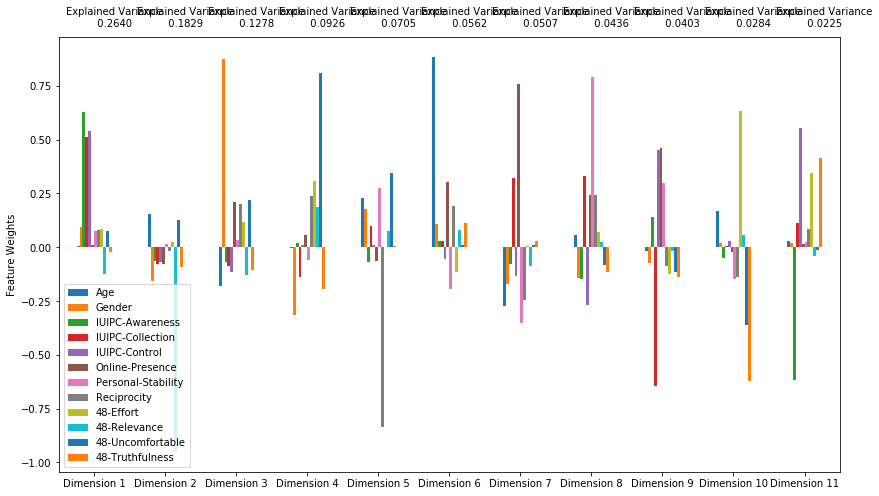

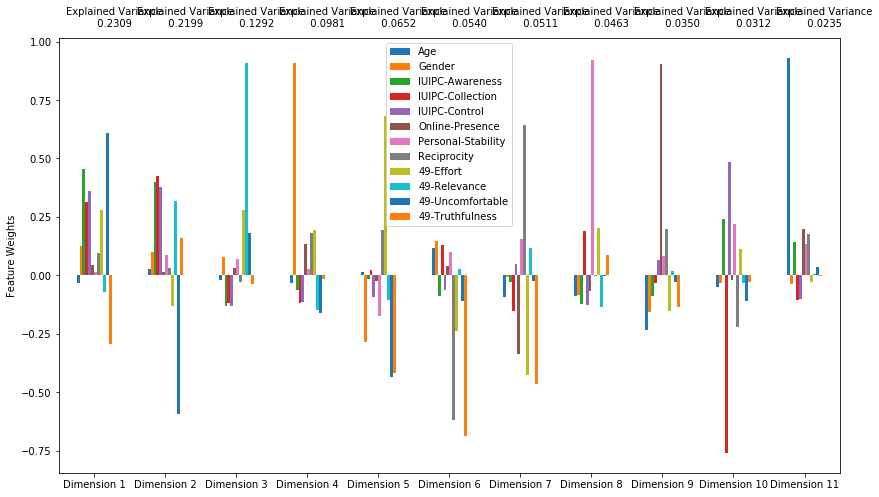

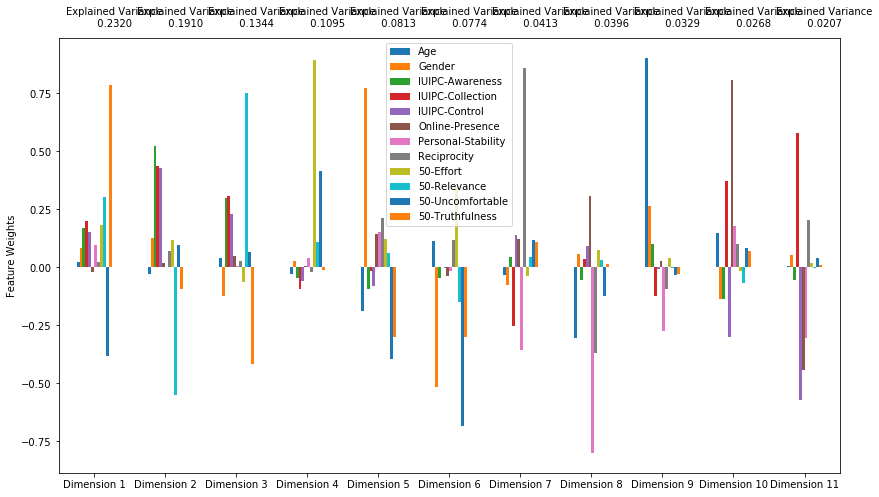

In [14]:
results = {}
for question_number in range(1, 51):
    question = 'Q' + str(question_number).zfill(2)
    columns = []
    columns.extend([str(question_number).zfill(2) + '-Effort',
                    str(question_number).zfill(2) + '-Relevance',
                    str(question_number).zfill(2) + '-Uncomfortable',
                    str(question_number).zfill(2) + '-Truthfulness'])
    relevant_indexes.extend(columns)

    
    cleaned_reordered_user_responses = pd.DataFrame(
        reordered_user_responses[relevant_indexes].dropna()).reset_index(drop = True)
#     display(cleaned_reordered_user_responses)
    
    scaler, good_data = data_scale(cleaned_reordered_user_responses)
    
    pca = PCA(n_components=11)
    pca.fit(good_data)
    
    results[question] = rs.pca_results(good_data, pca)
    
    del relevant_indexes[8:]

In [15]:
for k, v in results.items():
#     display(v)
    display(v['Explained Variance'].cumsum())

Dimension 1     0.3005
Dimension 2     0.4649
Dimension 3     0.5984
Dimension 4     0.6961
Dimension 5     0.7804
Dimension 6     0.8315
Dimension 7     0.8726
Dimension 8     0.9102
Dimension 9     0.9403
Dimension 10    0.9662
Dimension 11    0.9870
Name: Explained Variance, dtype: float64

Dimension 1     0.2418
Dimension 2     0.4327
Dimension 3     0.5679
Dimension 4     0.6647
Dimension 5     0.7406
Dimension 6     0.7989
Dimension 7     0.8508
Dimension 8     0.8967
Dimension 9     0.9337
Dimension 10    0.9589
Dimension 11    0.9818
Name: Explained Variance, dtype: float64

Dimension 1     0.2580
Dimension 2     0.4198
Dimension 3     0.5675
Dimension 4     0.6676
Dimension 5     0.7526
Dimension 6     0.8116
Dimension 7     0.8550
Dimension 8     0.8976
Dimension 9     0.9305
Dimension 10    0.9587
Dimension 11    0.9841
Name: Explained Variance, dtype: float64

Dimension 1     0.2647
Dimension 2     0.4555
Dimension 3     0.5749
Dimension 4     0.6763
Dimension 5     0.7595
Dimension 6     0.8194
Dimension 7     0.8624
Dimension 8     0.9005
Dimension 9     0.9306
Dimension 10    0.9602
Dimension 11    0.9866
Name: Explained Variance, dtype: float64

Dimension 1     0.2617
Dimension 2     0.4832
Dimension 3     0.5963
Dimension 4     0.6857
Dimension 5     0.7481
Dimension 6     0.7995
Dimension 7     0.8423
Dimension 8     0.8836
Dimension 9     0.9219
Dimension 10    0.9546
Dimension 11    0.9820
Name: Explained Variance, dtype: float64

Dimension 1     0.2214
Dimension 2     0.4051
Dimension 3     0.5759
Dimension 4     0.6868
Dimension 5     0.7499
Dimension 6     0.8002
Dimension 7     0.8490
Dimension 8     0.8882
Dimension 9     0.9248
Dimension 10    0.9567
Dimension 11    0.9848
Name: Explained Variance, dtype: float64

Dimension 1     0.2801
Dimension 2     0.4538
Dimension 3     0.5956
Dimension 4     0.6908
Dimension 5     0.7813
Dimension 6     0.8307
Dimension 7     0.8718
Dimension 8     0.9033
Dimension 9     0.9340
Dimension 10    0.9615
Dimension 11    0.9851
Name: Explained Variance, dtype: float64

Dimension 1     0.2721
Dimension 2     0.4424
Dimension 3     0.5689
Dimension 4     0.6724
Dimension 5     0.7669
Dimension 6     0.8406
Dimension 7     0.8814
Dimension 8     0.9118
Dimension 9     0.9407
Dimension 10    0.9646
Dimension 11    0.9846
Name: Explained Variance, dtype: float64

Dimension 1     0.2896
Dimension 2     0.4456
Dimension 3     0.5612
Dimension 4     0.6671
Dimension 5     0.7340
Dimension 6     0.7962
Dimension 7     0.8458
Dimension 8     0.8858
Dimension 9     0.9224
Dimension 10    0.9553
Dimension 11    0.9850
Name: Explained Variance, dtype: float64

Dimension 1     0.2876
Dimension 2     0.4713
Dimension 3     0.5718
Dimension 4     0.6695
Dimension 5     0.7559
Dimension 6     0.8280
Dimension 7     0.8699
Dimension 8     0.9025
Dimension 9     0.9343
Dimension 10    0.9624
Dimension 11    0.9875
Name: Explained Variance, dtype: float64

Dimension 1     0.3027
Dimension 2     0.4859
Dimension 3     0.5974
Dimension 4     0.6802
Dimension 5     0.7612
Dimension 6     0.8230
Dimension 7     0.8703
Dimension 8     0.9060
Dimension 9     0.9352
Dimension 10    0.9623
Dimension 11    0.9840
Name: Explained Variance, dtype: float64

Dimension 1     0.2673
Dimension 2     0.4368
Dimension 3     0.5952
Dimension 4     0.7029
Dimension 5     0.7908
Dimension 6     0.8423
Dimension 7     0.8793
Dimension 8     0.9109
Dimension 9     0.9394
Dimension 10    0.9628
Dimension 11    0.9837
Name: Explained Variance, dtype: float64

Dimension 1     0.2689
Dimension 2     0.4399
Dimension 3     0.5884
Dimension 4     0.7007
Dimension 5     0.7839
Dimension 6     0.8469
Dimension 7     0.8904
Dimension 8     0.9214
Dimension 9     0.9483
Dimension 10    0.9700
Dimension 11    0.9874
Name: Explained Variance, dtype: float64

Dimension 1     0.3453
Dimension 2     0.4980
Dimension 3     0.6242
Dimension 4     0.7099
Dimension 5     0.7845
Dimension 6     0.8372
Dimension 7     0.8793
Dimension 8     0.9141
Dimension 9     0.9416
Dimension 10    0.9644
Dimension 11    0.9847
Name: Explained Variance, dtype: float64

Dimension 1     0.2906
Dimension 2     0.4493
Dimension 3     0.5741
Dimension 4     0.6686
Dimension 5     0.7582
Dimension 6     0.8336
Dimension 7     0.8767
Dimension 8     0.9086
Dimension 9     0.9395
Dimension 10    0.9649
Dimension 11    0.9865
Name: Explained Variance, dtype: float64

Dimension 1     0.2982
Dimension 2     0.4426
Dimension 3     0.5668
Dimension 4     0.6673
Dimension 5     0.7367
Dimension 6     0.7948
Dimension 7     0.8501
Dimension 8     0.8925
Dimension 9     0.9308
Dimension 10    0.9634
Dimension 11    0.9857
Name: Explained Variance, dtype: float64

Dimension 1     0.2365
Dimension 2     0.4270
Dimension 3     0.5581
Dimension 4     0.6344
Dimension 5     0.7054
Dimension 6     0.7666
Dimension 7     0.8229
Dimension 8     0.8711
Dimension 9     0.9154
Dimension 10    0.9488
Dimension 11    0.9791
Name: Explained Variance, dtype: float64

Dimension 1     0.2729
Dimension 2     0.4386
Dimension 3     0.5785
Dimension 4     0.6774
Dimension 5     0.7478
Dimension 6     0.7998
Dimension 7     0.8504
Dimension 8     0.8876
Dimension 9     0.9224
Dimension 10    0.9544
Dimension 11    0.9799
Name: Explained Variance, dtype: float64

Dimension 1     0.2462
Dimension 2     0.4473
Dimension 3     0.5690
Dimension 4     0.6531
Dimension 5     0.7239
Dimension 6     0.7793
Dimension 7     0.8286
Dimension 8     0.8711
Dimension 9     0.9096
Dimension 10    0.9458
Dimension 11    0.9811
Name: Explained Variance, dtype: float64

Dimension 1     0.2843
Dimension 2     0.4439
Dimension 3     0.5927
Dimension 4     0.6818
Dimension 5     0.7442
Dimension 6     0.7955
Dimension 7     0.8415
Dimension 8     0.8818
Dimension 9     0.9188
Dimension 10    0.9516
Dimension 11    0.9804
Name: Explained Variance, dtype: float64

Dimension 1     0.2414
Dimension 2     0.4575
Dimension 3     0.5779
Dimension 4     0.6925
Dimension 5     0.7625
Dimension 6     0.8150
Dimension 7     0.8578
Dimension 8     0.8945
Dimension 9     0.9265
Dimension 10    0.9570
Dimension 11    0.9832
Name: Explained Variance, dtype: float64

Dimension 1     0.2620
Dimension 2     0.4567
Dimension 3     0.5742
Dimension 4     0.6727
Dimension 5     0.7384
Dimension 6     0.7943
Dimension 7     0.8427
Dimension 8     0.8856
Dimension 9     0.9269
Dimension 10    0.9558
Dimension 11    0.9796
Name: Explained Variance, dtype: float64

Dimension 1     0.2384
Dimension 2     0.4733
Dimension 3     0.6076
Dimension 4     0.6863
Dimension 5     0.7555
Dimension 6     0.8080
Dimension 7     0.8577
Dimension 8     0.8978
Dimension 9     0.9309
Dimension 10    0.9626
Dimension 11    0.9817
Name: Explained Variance, dtype: float64

Dimension 1     0.2375
Dimension 2     0.4461
Dimension 3     0.5578
Dimension 4     0.6486
Dimension 5     0.7279
Dimension 6     0.7864
Dimension 7     0.8343
Dimension 8     0.8771
Dimension 9     0.9141
Dimension 10    0.9501
Dimension 11    0.9790
Name: Explained Variance, dtype: float64

Dimension 1     0.2827
Dimension 2     0.4292
Dimension 3     0.5550
Dimension 4     0.6508
Dimension 5     0.7195
Dimension 6     0.7793
Dimension 7     0.8326
Dimension 8     0.8787
Dimension 9     0.9215
Dimension 10    0.9554
Dimension 11    0.9801
Name: Explained Variance, dtype: float64

Dimension 1     0.2367
Dimension 2     0.4033
Dimension 3     0.5462
Dimension 4     0.6369
Dimension 5     0.7197
Dimension 6     0.7919
Dimension 7     0.8474
Dimension 8     0.8991
Dimension 9     0.9321
Dimension 10    0.9624
Dimension 11    0.9865
Name: Explained Variance, dtype: float64

Dimension 1     0.2920
Dimension 2     0.4464
Dimension 3     0.5645
Dimension 4     0.6783
Dimension 5     0.7353
Dimension 6     0.7879
Dimension 7     0.8344
Dimension 8     0.8759
Dimension 9     0.9153
Dimension 10    0.9480
Dimension 11    0.9792
Name: Explained Variance, dtype: float64

Dimension 1     0.2785
Dimension 2     0.4397
Dimension 3     0.5725
Dimension 4     0.6520
Dimension 5     0.7184
Dimension 6     0.7786
Dimension 7     0.8338
Dimension 8     0.8831
Dimension 9     0.9209
Dimension 10    0.9537
Dimension 11    0.9787
Name: Explained Variance, dtype: float64

Dimension 1     0.2581
Dimension 2     0.4476
Dimension 3     0.5666
Dimension 4     0.6646
Dimension 5     0.7315
Dimension 6     0.7905
Dimension 7     0.8331
Dimension 8     0.8748
Dimension 9     0.9114
Dimension 10    0.9469
Dimension 11    0.9807
Name: Explained Variance, dtype: float64

Dimension 1     0.3300
Dimension 2     0.5176
Dimension 3     0.6460
Dimension 4     0.7365
Dimension 5     0.8111
Dimension 6     0.8573
Dimension 7     0.8928
Dimension 8     0.9209
Dimension 9     0.9453
Dimension 10    0.9679
Dimension 11    0.9840
Name: Explained Variance, dtype: float64

Dimension 1     0.2226
Dimension 2     0.4117
Dimension 3     0.5592
Dimension 4     0.6609
Dimension 5     0.7437
Dimension 6     0.8158
Dimension 7     0.8644
Dimension 8     0.9003
Dimension 9     0.9325
Dimension 10    0.9604
Dimension 11    0.9849
Name: Explained Variance, dtype: float64

Dimension 1     0.2789
Dimension 2     0.4182
Dimension 3     0.5514
Dimension 4     0.6377
Dimension 5     0.7091
Dimension 6     0.7733
Dimension 7     0.8275
Dimension 8     0.8743
Dimension 9     0.9138
Dimension 10    0.9524
Dimension 11    0.9799
Name: Explained Variance, dtype: float64

Dimension 1     0.2403
Dimension 2     0.4568
Dimension 3     0.5823
Dimension 4     0.6967
Dimension 5     0.7668
Dimension 6     0.8165
Dimension 7     0.8633
Dimension 8     0.9018
Dimension 9     0.9348
Dimension 10    0.9588
Dimension 11    0.9812
Name: Explained Variance, dtype: float64

Dimension 1     0.1999
Dimension 2     0.3866
Dimension 3     0.5573
Dimension 4     0.6594
Dimension 5     0.7339
Dimension 6     0.7898
Dimension 7     0.8421
Dimension 8     0.8816
Dimension 9     0.9195
Dimension 10    0.9519
Dimension 11    0.9810
Name: Explained Variance, dtype: float64

Dimension 1     0.2062
Dimension 2     0.3987
Dimension 3     0.5576
Dimension 4     0.6581
Dimension 5     0.7286
Dimension 6     0.7921
Dimension 7     0.8444
Dimension 8     0.8907
Dimension 9     0.9282
Dimension 10    0.9568
Dimension 11    0.9851
Name: Explained Variance, dtype: float64

Dimension 1     0.2395
Dimension 2     0.3979
Dimension 3     0.5171
Dimension 4     0.6223
Dimension 5     0.7026
Dimension 6     0.7741
Dimension 7     0.8298
Dimension 8     0.8814
Dimension 9     0.9174
Dimension 10    0.9516
Dimension 11    0.9827
Name: Explained Variance, dtype: float64

Dimension 1     0.2337
Dimension 2     0.4081
Dimension 3     0.5667
Dimension 4     0.6741
Dimension 5     0.7484
Dimension 6     0.8050
Dimension 7     0.8509
Dimension 8     0.8904
Dimension 9     0.9249
Dimension 10    0.9555
Dimension 11    0.9832
Name: Explained Variance, dtype: float64

Dimension 1     0.2492
Dimension 2     0.4399
Dimension 3     0.5755
Dimension 4     0.6819
Dimension 5     0.7483
Dimension 6     0.7994
Dimension 7     0.8455
Dimension 8     0.8871
Dimension 9     0.9272
Dimension 10    0.9575
Dimension 11    0.9809
Name: Explained Variance, dtype: float64

Dimension 1     0.2079
Dimension 2     0.3832
Dimension 3     0.5141
Dimension 4     0.6199
Dimension 5     0.7166
Dimension 6     0.8062
Dimension 7     0.8577
Dimension 8     0.8985
Dimension 9     0.9305
Dimension 10    0.9594
Dimension 11    0.9837
Name: Explained Variance, dtype: float64

Dimension 1     0.2213
Dimension 2     0.4154
Dimension 3     0.5754
Dimension 4     0.6872
Dimension 5     0.7566
Dimension 6     0.8066
Dimension 7     0.8543
Dimension 8     0.8959
Dimension 9     0.9314
Dimension 10    0.9603
Dimension 11    0.9861
Name: Explained Variance, dtype: float64

Dimension 1     0.2121
Dimension 2     0.3973
Dimension 3     0.5650
Dimension 4     0.6733
Dimension 5     0.7396
Dimension 6     0.7969
Dimension 7     0.8434
Dimension 8     0.8870
Dimension 9     0.9233
Dimension 10    0.9547
Dimension 11    0.9821
Name: Explained Variance, dtype: float64

Dimension 1     0.2382
Dimension 2     0.4129
Dimension 3     0.5565
Dimension 4     0.6705
Dimension 5     0.7391
Dimension 6     0.7980
Dimension 7     0.8424
Dimension 8     0.8831
Dimension 9     0.9229
Dimension 10    0.9552
Dimension 11    0.9808
Name: Explained Variance, dtype: float64

Dimension 1     0.2142
Dimension 2     0.4147
Dimension 3     0.5306
Dimension 4     0.6284
Dimension 5     0.7179
Dimension 6     0.7797
Dimension 7     0.8338
Dimension 8     0.8780
Dimension 9     0.9196
Dimension 10    0.9542
Dimension 11    0.9824
Name: Explained Variance, dtype: float64

Dimension 1     0.2320
Dimension 2     0.4015
Dimension 3     0.5458
Dimension 4     0.6481
Dimension 5     0.7164
Dimension 6     0.7754
Dimension 7     0.8279
Dimension 8     0.8728
Dimension 9     0.9166
Dimension 10    0.9507
Dimension 11    0.9787
Name: Explained Variance, dtype: float64

Dimension 1     0.2480
Dimension 2     0.4242
Dimension 3     0.5813
Dimension 4     0.6821
Dimension 5     0.7416
Dimension 6     0.7984
Dimension 7     0.8449
Dimension 8     0.8861
Dimension 9     0.9243
Dimension 10    0.9552
Dimension 11    0.9827
Name: Explained Variance, dtype: float64

Dimension 1     0.3051
Dimension 2     0.5031
Dimension 3     0.6139
Dimension 4     0.7005
Dimension 5     0.7806
Dimension 6     0.8408
Dimension 7     0.8809
Dimension 8     0.9173
Dimension 9     0.9461
Dimension 10    0.9664
Dimension 11    0.9847
Name: Explained Variance, dtype: float64

Dimension 1     0.2086
Dimension 2     0.4105
Dimension 3     0.5786
Dimension 4     0.6925
Dimension 5     0.7529
Dimension 6     0.8103
Dimension 7     0.8551
Dimension 8     0.8930
Dimension 9     0.9294
Dimension 10    0.9577
Dimension 11    0.9829
Name: Explained Variance, dtype: float64

Dimension 1     0.2640
Dimension 2     0.4469
Dimension 3     0.5747
Dimension 4     0.6673
Dimension 5     0.7378
Dimension 6     0.7940
Dimension 7     0.8447
Dimension 8     0.8883
Dimension 9     0.9286
Dimension 10    0.9570
Dimension 11    0.9795
Name: Explained Variance, dtype: float64

Dimension 1     0.2309
Dimension 2     0.4508
Dimension 3     0.5800
Dimension 4     0.6781
Dimension 5     0.7433
Dimension 6     0.7973
Dimension 7     0.8484
Dimension 8     0.8947
Dimension 9     0.9297
Dimension 10    0.9609
Dimension 11    0.9844
Name: Explained Variance, dtype: float64

Dimension 1     0.2320
Dimension 2     0.4230
Dimension 3     0.5574
Dimension 4     0.6669
Dimension 5     0.7482
Dimension 6     0.8256
Dimension 7     0.8669
Dimension 8     0.9065
Dimension 9     0.9394
Dimension 10    0.9662
Dimension 11    0.9869
Name: Explained Variance, dtype: float64

In [186]:
# range_n_clusters = list(range(2,11))
# results = {}
# clusters = {}
# reduced_data_df = pd.DataFrame(columns=['Dimension 1', 'Dimension 2'])
# for question_number in range(1, 51):
#     print("Question No. is: ", 'Q' + str(question_number).zfill(2))
#     columns = []
#     columns.extend([str(question_number).zfill(2) + '-Effort',
#                     str(question_number).zfill(2) + '-Relevance',
#                     str(question_number).zfill(2) + '-Uncomfortable',
#                     str(question_number).zfill(2) + '-Truthfulness'])
#     relevant_indexes.extend(columns)
    
#     cleaned_reordered_user_responses = pd.DataFrame(
#         reordered_user_responses[relevant_indexes].dropna()).reset_index(drop = True)
    
#     good_data = remove_outliers(cleaned_reordered_user_responses)
#     scaler, good_data = data_scale(good_data)
    
# #     transformed_train_x_question = cleaned_reordered_user_responses
    
#     pca = PCA(n_components=2)
#     pca.fit(good_data)
#     reduced_data = pca.transform(good_data)
    
# #     results['Q' + str(question_number).zfill(2)] = rs.pca_results(good_data, pca)
# #     pca_results = rs.pca_results(transformed_train_x_question, pca) 
    
#     temp_df = pd.DataFrame(reduced_data, columns=['Dimension 1', 'Dimension 2'])
    
#     reduced_data_df = reduced_data_df.append(temp_df)
    
# #     results['Q' + str(question_number).zfill(2)] = rs.pca_results(transformed_train_x_question, pca)
# #     pca_results = rs.pca_results(transformed_train_x_question, pca)

    
#     for n_clusters in range_n_clusters:
#         # TODO: Apply your clustering algorithm of choice to the reduced data 
#         clusterer = GMM(n_components=n_clusters).fit(reduced_data)

#         # TODO: Predict the cluster for each data point
#         preds = clusterer.predict(reduced_data)

#         # TODO: Find the cluster centers
#         centers = clusterer.means_

#         # TODO: Predict the cluster for each transformed sample data point
# #         test_preds = clusterer.predict(pca_test)

#         # TODO: Calculate the mean silhouette coefficient for the number of clusters chosen
#         score = silhouette_score(reduced_data, preds, metric='mahalanobis')
#         print("For n_clusters = {}. The average silhouette_score with GMM is : {}".format(n_clusters, score))
        
        
    
#     del relevant_indexes[8:]

Question No. is:  Q01
For n_clusters = 2. The average silhouette_score with Kmeans is : 0.3852639141827321
For n_clusters = 3. The average silhouette_score with Kmeans is : 0.47146380924998993
For n_clusters = 4. The average silhouette_score with Kmeans is : 0.43507675666251344
For n_clusters = 5. The average silhouette_score with Kmeans is : 0.4359264228523406
For n_clusters = 6. The average silhouette_score with Kmeans is : 0.45618652255929987
For n_clusters = 7. The average silhouette_score with Kmeans is : 0.3843259400525798
For n_clusters = 8. The average silhouette_score with Kmeans is : 0.4020906323660163
For n_clusters = 9. The average silhouette_score with Kmeans is : 0.4032032305537796
For n_clusters = 10. The average silhouette_score with Kmeans is : 0.3763930055981428


Age  Gender  IUIPC-Awareness  IUIPC-Collection  IUIPC-Control  \
Segment 0  30.0     2.0              1.0               2.0            2.0   
Segment 1  32.0     1.0              1.0               2.0            2.0   
Segment 2  34.0     2.0              5.0               5.0            5.0   

           Online-Presence  Personal-Stability  Reciprocity  01-Effort  \
Segment 0              7.0                 4.0          4.0        2.0   
Segment 1              6.0                 4.0          4.0        1.0   
Segment 2              7.0                 4.0          4.0        2.0   

           01-Relevance  01-Uncomfortable  01-Truthfulness  
Segment 0           2.0               6.0              3.0  
Segment 1           3.0               3.0              7.0  
Segment 2           2.0               3.0              6.0

Question No. is:  Q02
For n_clusters = 2. The average silhouette_score with Kmeans is : 0.49056954509011375
For n_clusters = 3. The average silhouette_score with Kmeans is : 0.48740320813554433
For n_clusters = 4. The average silhouette_score with Kmeans is : 0.4203434166267058
For n_clusters = 5. The average silhouette_score with Kmeans is : 0.3999210505722017
For n_clusters = 6. The average silhouette_score with Kmeans is : 0.4242016623485125
For n_clusters = 7. The average silhouette_score with Kmeans is : 0.4221694002901205
For n_clusters = 8. The average silhouette_score with Kmeans is : 0.4139600596879107
For n_clusters = 9. The average silhouette_score with Kmeans is : 0.4132147291141292
For n_clusters = 10. The average silhouette_score with Kmeans is : 0.4026000464899102


Age  Gender  IUIPC-Awareness  IUIPC-Collection  IUIPC-Control  \
Segment 0  32.0     2.0              1.0               2.0            2.0   
Segment 1  33.0     2.0              5.0               5.0            5.0   

           Online-Presence  Personal-Stability  Reciprocity  02-Effort  \
Segment 0              7.0                 4.0          4.0        1.0   
Segment 1              7.0                 4.0          4.0        1.0   

           02-Relevance  02-Uncomfortable  02-Truthfulness  
Segment 0           3.0               1.0              7.0  
Segment 1           3.0               2.0              7.0

Question No. is:  Q03
For n_clusters = 2. The average silhouette_score with Kmeans is : 0.38609091006173296
For n_clusters = 3. The average silhouette_score with Kmeans is : 0.4900203964592484
For n_clusters = 4. The average silhouette_score with Kmeans is : 0.38368170397083623
For n_clusters = 5. The average silhouette_score with Kmeans is : 0.36964102083926914
For n_clusters = 6. The average silhouette_score with Kmeans is : 0.3756218250777375
For n_clusters = 7. The average silhouette_score with Kmeans is : 0.3668077043709031
For n_clusters = 8. The average silhouette_score with Kmeans is : 0.3632559689608845
For n_clusters = 9. The average silhouette_score with Kmeans is : 0.34843879995341115
For n_clusters = 10. The average silhouette_score with Kmeans is : 0.369481359465213


Age  Gender  IUIPC-Awareness  IUIPC-Collection  IUIPC-Control  \
Segment 0  30.0     2.0              1.0               2.0            2.0   
Segment 1  32.0     2.0              1.0               1.0            2.0   
Segment 2  34.0     1.0              4.0               4.0            5.0   

           Online-Presence  Personal-Stability  Reciprocity  03-Effort  \
Segment 0              7.0                 4.0          4.0        1.0   
Segment 1              6.0                 4.0          4.0        2.0   
Segment 2              6.0                 4.0          4.0        1.0   

           03-Relevance  03-Uncomfortable  03-Truthfulness  
Segment 0           4.0               2.0              7.0  
Segment 1           3.0               6.0              4.0  
Segment 2           2.0               2.0              7.0

Question No. is:  Q04
For n_clusters = 2. The average silhouette_score with Kmeans is : 0.5269415438204591
For n_clusters = 3. The average silhouette_score with Kmeans is : 0.6148465416759793
For n_clusters = 4. The average silhouette_score with Kmeans is : 0.6031600061049855
For n_clusters = 5. The average silhouette_score with Kmeans is : 0.5307106990245161
For n_clusters = 6. The average silhouette_score with Kmeans is : 0.5275604752592378
For n_clusters = 7. The average silhouette_score with Kmeans is : 0.5256598490921163
For n_clusters = 8. The average silhouette_score with Kmeans is : 0.5028375080511539
For n_clusters = 9. The average silhouette_score with Kmeans is : 0.4678773228848365
For n_clusters = 10. The average silhouette_score with Kmeans is : 0.4884996332564672


Age  Gender  IUIPC-Awareness  IUIPC-Collection  IUIPC-Control  \
Segment 0  31.0     2.0              1.0               2.0            2.0   
Segment 1  32.0     2.0              2.0               2.0            2.0   
Segment 2  31.0     2.0              6.0               5.0            6.0   

           Online-Presence  Personal-Stability  Reciprocity  04-Effort  \
Segment 0              7.0                 4.0          4.0        2.0   
Segment 1              6.0                 4.0          4.0        3.0   
Segment 2              7.0                 4.0          4.0        2.0   

           04-Relevance  04-Uncomfortable  04-Truthfulness  
Segment 0           1.0               7.0              1.0  
Segment 1           2.0               5.0              6.0  
Segment 2           1.0               6.0              2.0

Question No. is:  Q05
For n_clusters = 2. The average silhouette_score with Kmeans is : 0.5005388411465468
For n_clusters = 3. The average silhouette_score with Kmeans is : 0.47938642530011805
For n_clusters = 4. The average silhouette_score with Kmeans is : 0.4088532365744545
For n_clusters = 5. The average silhouette_score with Kmeans is : 0.42186265840570136
For n_clusters = 6. The average silhouette_score with Kmeans is : 0.4269742502647756
For n_clusters = 7. The average silhouette_score with Kmeans is : 0.4182205451546262
For n_clusters = 8. The average silhouette_score with Kmeans is : 0.41399109810609125
For n_clusters = 9. The average silhouette_score with Kmeans is : 0.4069357798109386
For n_clusters = 10. The average silhouette_score with Kmeans is : 0.39771820658848783


Age  Gender  IUIPC-Awareness  IUIPC-Collection  IUIPC-Control  \
Segment 0  31.0     2.0              5.0               5.0            5.0   
Segment 1  32.0     2.0              1.0               2.0            2.0   

           Online-Presence  Personal-Stability  Reciprocity  05-Effort  \
Segment 0              6.0                 4.0          4.0        2.0   
Segment 1              7.0                 4.0          4.0        1.0   

           05-Relevance  05-Uncomfortable  05-Truthfulness  
Segment 0           4.0               2.0              7.0  
Segment 1           4.0               2.0              7.0

Question No. is:  Q06
For n_clusters = 2. The average silhouette_score with Kmeans is : 0.37768601695590664
For n_clusters = 3. The average silhouette_score with Kmeans is : 0.3801527276862201
For n_clusters = 4. The average silhouette_score with Kmeans is : 0.38593528066721694
For n_clusters = 5. The average silhouette_score with Kmeans is : 0.36760220635791135
For n_clusters = 6. The average silhouette_score with Kmeans is : 0.37308478632534753
For n_clusters = 7. The average silhouette_score with Kmeans is : 0.3430045134439932
For n_clusters = 8. The average silhouette_score with Kmeans is : 0.3874504993546198
For n_clusters = 9. The average silhouette_score with Kmeans is : 0.38963134733262794
For n_clusters = 10. The average silhouette_score with Kmeans is : 0.3915336067684577


Age  Gender  IUIPC-Awareness  IUIPC-Collection  IUIPC-Control  \
Segment 0  31.0     2.0              2.0               3.0            2.0   
Segment 1  31.0     2.0              1.0               2.0            2.0   
Segment 2  33.0     1.0              4.0               4.0            4.0   
Segment 3  32.0     2.0              2.0               3.0            3.0   
Segment 4  30.0     2.0              0.0               1.0            1.0   
Segment 5  32.0     2.0              2.0               2.0            2.0   
Segment 6  32.0     1.0              3.0               4.0            3.0   
Segment 7  31.0     2.0              1.0               2.0            2.0   
Segment 8  33.0     1.0              5.0               6.0            5.0   
Segment 9  31.0     2.0              1.0               1.0            1.0   

           Online-Presence  Personal-Stability  Reciprocity  06-Effort  \
Segment 0              6.0                 4.0          4.0        1.0   
Segment 1              6.0                 4.0          4.0        1.0   
Segment 2              6.0                 4.0          4.0        1.0   
Segment 3              6.0                 4.0          4.0        1.0   
Segment 4              7.0                 4.0          4.0        1.0   
Segment 5              6.0                 4.0          4.0        1.0   
Segment 6              6.0                 4.0          4.0        1.0   
Segment 7              7.0                 4.0          4.0        1.0   
Segment 8              6.0                 5.0          4.0        1.0   
Segment 9              7.0                 4.0          4.0        1.0   

           06-Relevance  06-Uncomfortable  06-Truthfulness  
Segment 0           7.0               2.0              7.0  
Segment 1           3.0               3.0              6.0  
Segment 2           2.0               1.0              7.0  
Segment 3           4.0               2.0              7.0  
Segment 4           5.0               5.0              6.0  
Segment 5           1.0               2.0              6.0  
Segment 6           6.0               1.0              7.0  
Segment 7           6.0               3.0              6.0  
Segment 8           6.0              -1.0              8.0  
Segment 9           2.0               4.0              6.0

Question No. is:  Q07
For n_clusters = 2. The average silhouette_score with Kmeans is : 0.39480896540103255
For n_clusters = 3. The average silhouette_score with Kmeans is : 0.4807914811083975
For n_clusters = 4. The average silhouette_score with Kmeans is : 0.3882363873711077
For n_clusters = 5. The average silhouette_score with Kmeans is : 0.37706712300227013
For n_clusters = 6. The average silhouette_score with Kmeans is : 0.3431048161410265
For n_clusters = 7. The average silhouette_score with Kmeans is : 0.3618265191321033
For n_clusters = 8. The average silhouette_score with Kmeans is : 0.36314188264837355
For n_clusters = 9. The average silhouette_score with Kmeans is : 0.37449972960826006
For n_clusters = 10. The average silhouette_score with Kmeans is : 0.3789312048688515


Age  Gender  IUIPC-Awareness  IUIPC-Collection  IUIPC-Control  \
Segment 0  32.0     1.0              1.0               2.0            2.0   
Segment 1  29.0     2.0              2.0               2.0            2.0   
Segment 2  31.0     2.0              5.0               5.0            5.0   

           Online-Presence  Personal-Stability  Reciprocity  07-Effort  \
Segment 0              6.0                 4.0          4.0        1.0   
Segment 1              7.0                 4.0          4.0        2.0   
Segment 2              7.0                 4.0          4.0        2.0   

           07-Relevance  07-Uncomfortable  07-Truthfulness  
Segment 0           4.0               2.0              7.0  
Segment 1           2.0               6.0              3.0  
Segment 2           4.0               3.0              6.0

Question No. is:  Q08
For n_clusters = 2. The average silhouette_score with Kmeans is : 0.4387897410416201
For n_clusters = 3. The average silhouette_score with Kmeans is : 0.500147717598258
For n_clusters = 4. The average silhouette_score with Kmeans is : 0.4843816003645824
For n_clusters = 5. The average silhouette_score with Kmeans is : 0.4246423482794448
For n_clusters = 6. The average silhouette_score with Kmeans is : 0.4327342801112509
For n_clusters = 7. The average silhouette_score with Kmeans is : 0.44522725192127716
For n_clusters = 8. The average silhouette_score with Kmeans is : 0.453529200101259
For n_clusters = 9. The average silhouette_score with Kmeans is : 0.43684943389028436
For n_clusters = 10. The average silhouette_score with Kmeans is : 0.43782896340997984


Age  Gender  IUIPC-Awareness  IUIPC-Collection  IUIPC-Control  \
Segment 0  34.0     2.0              5.0               5.0            5.0   
Segment 1  31.0     2.0              1.0               2.0            2.0   
Segment 2  31.0     2.0              2.0               2.0            2.0   

           Online-Presence  Personal-Stability  Reciprocity  08-Effort  \
Segment 0              7.0                 4.0          4.0        2.0   
Segment 1              6.0                 4.0          4.0        2.0   
Segment 2              7.0                 4.0          4.0        2.0   

           08-Relevance  08-Uncomfortable  08-Truthfulness  
Segment 0           3.0               4.0              4.0  
Segment 1           2.0               5.0              6.0  
Segment 2           2.0               7.0              2.0

Question No. is:  Q09
For n_clusters = 2. The average silhouette_score with Kmeans is : 0.39322097397918476
For n_clusters = 3. The average silhouette_score with Kmeans is : 0.4631733884577335
For n_clusters = 4. The average silhouette_score with Kmeans is : 0.41381756056594954
For n_clusters = 5. The average silhouette_score with Kmeans is : 0.4180638431828595
For n_clusters = 6. The average silhouette_score with Kmeans is : 0.4281284169316909
For n_clusters = 7. The average silhouette_score with Kmeans is : 0.44613700887080043
For n_clusters = 8. The average silhouette_score with Kmeans is : 0.4100036163020648
For n_clusters = 9. The average silhouette_score with Kmeans is : 0.40636103907544163
For n_clusters = 10. The average silhouette_score with Kmeans is : 0.3785912891262265


Age  Gender  IUIPC-Awareness  IUIPC-Collection  IUIPC-Control  \
Segment 0  30.0     2.0              5.0               4.0            5.0   
Segment 1  31.0     1.0              1.0               1.0            2.0   
Segment 2  31.0     2.0              2.0               2.0            2.0   

           Online-Presence  Personal-Stability  Reciprocity  09-Effort  \
Segment 0              8.0                 4.0          4.0        3.0   
Segment 1              6.0                 4.0          4.0        2.0   
Segment 2              7.0                 4.0          4.0        1.0   

           09-Relevance  09-Uncomfortable  09-Truthfulness  
Segment 0           2.0               3.0              5.0  
Segment 1           1.0               6.0              4.0  
Segment 2           1.0               2.0              7.0

Question No. is:  Q10
For n_clusters = 2. The average silhouette_score with Kmeans is : 0.40691075691098477
For n_clusters = 3. The average silhouette_score with Kmeans is : 0.5105746427255466
For n_clusters = 4. The average silhouette_score with Kmeans is : 0.438641327420644
For n_clusters = 5. The average silhouette_score with Kmeans is : 0.421753992315554
For n_clusters = 6. The average silhouette_score with Kmeans is : 0.43039198898738273
For n_clusters = 7. The average silhouette_score with Kmeans is : 0.4256066519960737
For n_clusters = 8. The average silhouette_score with Kmeans is : 0.40451026518480754
For n_clusters = 9. The average silhouette_score with Kmeans is : 0.41861683144718453
For n_clusters = 10. The average silhouette_score with Kmeans is : 0.4293005745006352


Age  Gender  IUIPC-Awareness  IUIPC-Collection  IUIPC-Control  \
Segment 0  32.0     2.0              2.0               2.0            2.0   
Segment 1  30.0     2.0              2.0               2.0            2.0   
Segment 2  32.0     2.0              6.0               5.0            6.0   

           Online-Presence  Personal-Stability  Reciprocity  10-Effort  \
Segment 0              7.0                 4.0          4.0        2.0   
Segment 1              7.0                 4.0          4.0        3.0   
Segment 2              7.0                 5.0          4.0        2.0   

           10-Relevance  10-Uncomfortable  10-Truthfulness  
Segment 0           2.0               2.0              7.0  
Segment 1           1.0               6.0              3.0  
Segment 2           3.0               4.0              6.0

Question No. is:  Q11
For n_clusters = 2. The average silhouette_score with Kmeans is : 0.39523254056998375
For n_clusters = 3. The average silhouette_score with Kmeans is : 0.49314547926763447
For n_clusters = 4. The average silhouette_score with Kmeans is : 0.42581598290015177
For n_clusters = 5. The average silhouette_score with Kmeans is : 0.4266581679300039
For n_clusters = 6. The average silhouette_score with Kmeans is : 0.4436034074384314
For n_clusters = 7. The average silhouette_score with Kmeans is : 0.37634902431092493
For n_clusters = 8. The average silhouette_score with Kmeans is : 0.37890803312927385
For n_clusters = 9. The average silhouette_score with Kmeans is : 0.4109662414146083
For n_clusters = 10. The average silhouette_score with Kmeans is : 0.3873563692519315


Age  Gender  IUIPC-Awareness  IUIPC-Collection  IUIPC-Control  \
Segment 0  32.0     2.0              1.0               2.0            2.0   
Segment 1  34.0     2.0              5.0               5.0            5.0   
Segment 2  30.0     2.0              1.0               2.0            2.0   

           Online-Presence  Personal-Stability  Reciprocity  11-Effort  \
Segment 0              6.0                 4.0          4.0        1.0   
Segment 1              7.0                 5.0          4.0        3.0   
Segment 2              7.0                 4.0          4.0        2.0   

           11-Relevance  11-Uncomfortable  11-Truthfulness  
Segment 0           2.0               3.0              6.0  
Segment 1           2.0               4.0              5.0  
Segment 2           1.0               7.0              2.0

Question No. is:  Q12
For n_clusters = 2. The average silhouette_score with Kmeans is : 0.47279645107519397
For n_clusters = 3. The average silhouette_score with Kmeans is : 0.5638922058171202
For n_clusters = 4. The average silhouette_score with Kmeans is : 0.593608761565361
For n_clusters = 5. The average silhouette_score with Kmeans is : 0.5512148259694075
For n_clusters = 6. The average silhouette_score with Kmeans is : 0.5511082270845531
For n_clusters = 7. The average silhouette_score with Kmeans is : 0.5244191305461581
For n_clusters = 8. The average silhouette_score with Kmeans is : 0.5419777018840821
For n_clusters = 9. The average silhouette_score with Kmeans is : 0.5388543239485698
For n_clusters = 10. The average silhouette_score with Kmeans is : 0.5471178549227129


Age  Gender  IUIPC-Awareness  IUIPC-Collection  IUIPC-Control  \
Segment 0  32.0     2.0              3.0               3.0            3.0   
Segment 1  32.0     2.0              1.0               2.0            2.0   
Segment 2  31.0     2.0              2.0               2.0            2.0   
Segment 3  31.0     2.0              3.0               3.0            3.0   

           Online-Presence  Personal-Stability  Reciprocity  12-Effort  \
Segment 0              6.0                 4.0          4.0        1.0   
Segment 1              7.0                 4.0          4.0        1.0   
Segment 2              6.0                 4.0          4.0        6.0   
Segment 3              6.0                 4.0          4.0        5.0   

           12-Relevance  12-Uncomfortable  12-Truthfulness  
Segment 0           2.0               5.0              6.0  
Segment 1           1.0               6.0              1.0  
Segment 2           1.0               7.0              1.0  
Segment 3           2.0               6.0              6.0

Question No. is:  Q13
For n_clusters = 2. The average silhouette_score with Kmeans is : 0.39094067688744044
For n_clusters = 3. The average silhouette_score with Kmeans is : 0.4016287657651771
For n_clusters = 4. The average silhouette_score with Kmeans is : 0.419720010704129
For n_clusters = 5. The average silhouette_score with Kmeans is : 0.400341711316611
For n_clusters = 6. The average silhouette_score with Kmeans is : 0.4251466796115202
For n_clusters = 7. The average silhouette_score with Kmeans is : 0.40357672363758096
For n_clusters = 8. The average silhouette_score with Kmeans is : 0.3727496138766522
For n_clusters = 9. The average silhouette_score with Kmeans is : 0.4078568073831364
For n_clusters = 10. The average silhouette_score with Kmeans is : 0.41592849498607937


Age  Gender  IUIPC-Awareness  IUIPC-Collection  IUIPC-Control  \
Segment 0  31.0     2.0              2.0               3.0            3.0   
Segment 1  30.0     2.0              2.0               2.0            2.0   
Segment 2  35.0     2.0              1.0               1.0            1.0   
Segment 3  34.0     1.0              1.0               2.0            2.0   
Segment 4  29.0     2.0              3.0               3.0            3.0   
Segment 5  32.0     2.0              2.0               2.0            2.0   

           Online-Presence  Personal-Stability  Reciprocity  13-Effort  \
Segment 0              6.0                 4.0          4.0        1.0   
Segment 1              8.0                 4.0          4.0        3.0   
Segment 2              7.0                 4.0          4.0        2.0   
Segment 3              6.0                 4.0          4.0        1.0   
Segment 4              7.0                 4.0          4.0        2.0   
Segment 5              7.0                 4.0          4.0        2.0   

           13-Relevance  13-Uncomfortable  13-Truthfulness  
Segment 0           3.0               3.0              7.0  
Segment 1           2.0               7.0              2.0  
Segment 2           5.0               5.0              2.0  
Segment 3           5.0               2.0              6.0  
Segment 4           1.0               5.0              6.0  
Segment 5           3.0               4.0              4.0

Question No. is:  Q14
For n_clusters = 2. The average silhouette_score with Kmeans is : 0.44134112250953805
For n_clusters = 3. The average silhouette_score with Kmeans is : 0.5067617987946376
For n_clusters = 4. The average silhouette_score with Kmeans is : 0.41057504474817247
For n_clusters = 5. The average silhouette_score with Kmeans is : 0.40183904329100284
For n_clusters = 6. The average silhouette_score with Kmeans is : 0.3776718288476203
For n_clusters = 7. The average silhouette_score with Kmeans is : 0.3784970893151521
For n_clusters = 8. The average silhouette_score with Kmeans is : 0.3817149480859511
For n_clusters = 9. The average silhouette_score with Kmeans is : 0.3744281959628806
For n_clusters = 10. The average silhouette_score with Kmeans is : 0.365423135307254


Age  Gender  IUIPC-Awareness  IUIPC-Collection  IUIPC-Control  \
Segment 0  32.0     2.0              5.0               5.0            5.0   
Segment 1  31.0     1.0              1.0               2.0            2.0   
Segment 2  31.0     1.0              1.0               2.0            2.0   

           Online-Presence  Personal-Stability  Reciprocity  14-Effort  \
Segment 0              7.0                 4.0          4.0        2.0   
Segment 1              6.0                 4.0          4.0        2.0   
Segment 2              7.0                 4.0          4.0        2.0   

           14-Relevance  14-Uncomfortable  14-Truthfulness  
Segment 0           2.0               4.0              4.0  
Segment 1           1.0               6.0              2.0  
Segment 2           2.0               3.0              6.0

Question No. is:  Q15
For n_clusters = 2. The average silhouette_score with Kmeans is : 0.46647653102861003
For n_clusters = 3. The average silhouette_score with Kmeans is : 0.5546271931824807
For n_clusters = 4. The average silhouette_score with Kmeans is : 0.5069818909076337
For n_clusters = 5. The average silhouette_score with Kmeans is : 0.4511453077222519
For n_clusters = 6. The average silhouette_score with Kmeans is : 0.3708134757398283
For n_clusters = 7. The average silhouette_score with Kmeans is : 0.39589463002388203
For n_clusters = 8. The average silhouette_score with Kmeans is : 0.40926591172537125
For n_clusters = 9. The average silhouette_score with Kmeans is : 0.41428101626565544
For n_clusters = 10. The average silhouette_score with Kmeans is : 0.44161398546122765


Age  Gender  IUIPC-Awareness  IUIPC-Collection  IUIPC-Control  \
Segment 0  31.0     2.0              1.0               2.0            2.0   
Segment 1  34.0     1.0              2.0               2.0            2.0   
Segment 2  32.0     2.0              5.0               5.0            5.0   

           Online-Presence  Personal-Stability  Reciprocity  15-Effort  \
Segment 0              7.0                 4.0          4.0        2.0   
Segment 1              6.0                 4.0          4.0        2.0   
Segment 2              6.0                 4.0          4.0        3.0   

           15-Relevance  15-Uncomfortable  15-Truthfulness  
Segment 0           2.0               6.0              2.0  
Segment 1           2.0               4.0              7.0  
Segment 2           2.0               5.0              3.0

Question No. is:  Q16
For n_clusters = 2. The average silhouette_score with Kmeans is : 0.526989677244714
For n_clusters = 3. The average silhouette_score with Kmeans is : 0.5092365814758733
For n_clusters = 4. The average silhouette_score with Kmeans is : 0.43080282062919734
For n_clusters = 5. The average silhouette_score with Kmeans is : 0.4137659091765019
For n_clusters = 6. The average silhouette_score with Kmeans is : 0.4034198036116959
For n_clusters = 7. The average silhouette_score with Kmeans is : 0.4126949606215366
For n_clusters = 8. The average silhouette_score with Kmeans is : 0.38438150297489376
For n_clusters = 9. The average silhouette_score with Kmeans is : 0.38218362382496396
For n_clusters = 10. The average silhouette_score with Kmeans is : 0.3713330941436265


Age  Gender  IUIPC-Awareness  IUIPC-Collection  IUIPC-Control  \
Segment 0  30.0     2.0              5.0               5.0            5.0   
Segment 1  32.0     1.0              1.0               2.0            2.0   

           Online-Presence  Personal-Stability  Reciprocity  16-Effort  \
Segment 0              7.0                 5.0          4.0        1.0   
Segment 1              7.0                 4.0          4.0        1.0   

           16-Relevance  16-Uncomfortable  16-Truthfulness  
Segment 0           3.0               2.0              7.0  
Segment 1           2.0               2.0              7.0

Question No. is:  Q17
For n_clusters = 2. The average silhouette_score with Kmeans is : 0.4912892719022653
For n_clusters = 3. The average silhouette_score with Kmeans is : 0.5047817879650953
For n_clusters = 4. The average silhouette_score with Kmeans is : 0.42181265652224154
For n_clusters = 5. The average silhouette_score with Kmeans is : 0.42233880003604124
For n_clusters = 6. The average silhouette_score with Kmeans is : 0.43899539472441124
For n_clusters = 7. The average silhouette_score with Kmeans is : 0.395420868342791
For n_clusters = 8. The average silhouette_score with Kmeans is : 0.3938308783672725
For n_clusters = 9. The average silhouette_score with Kmeans is : 0.39344524915152895
For n_clusters = 10. The average silhouette_score with Kmeans is : 0.40442254294444807


Age  Gender  IUIPC-Awareness  IUIPC-Collection  IUIPC-Control  \
Segment 0  33.0     1.0              1.0               2.0            2.0   
Segment 1  30.0     2.0              1.0               2.0            2.0   
Segment 2  30.0     2.0              5.0               5.0            5.0   

           Online-Presence  Personal-Stability  Reciprocity  17-Effort  \
Segment 0              7.0                 4.0          4.0        1.0   
Segment 1              7.0                 4.0          4.0        3.0   
Segment 2              7.0                 5.0          4.0        2.0   

           17-Relevance  17-Uncomfortable  17-Truthfulness  
Segment 0           1.0               1.0              7.0  
Segment 1           2.0               5.0              6.0  
Segment 2           3.0               2.0              6.0

Question No. is:  Q18
For n_clusters = 2. The average silhouette_score with Kmeans is : 0.5057370053300965
For n_clusters = 3. The average silhouette_score with Kmeans is : 0.5552386731299669
For n_clusters = 4. The average silhouette_score with Kmeans is : 0.45836929133736015
For n_clusters = 5. The average silhouette_score with Kmeans is : 0.43850199195085693
For n_clusters = 6. The average silhouette_score with Kmeans is : 0.43671477979023676
For n_clusters = 7. The average silhouette_score with Kmeans is : 0.4419140008553738
For n_clusters = 8. The average silhouette_score with Kmeans is : 0.42667709221082045
For n_clusters = 9. The average silhouette_score with Kmeans is : 0.4013515697907583
For n_clusters = 10. The average silhouette_score with Kmeans is : 0.409991547248767


Age  Gender  IUIPC-Awareness  IUIPC-Collection  IUIPC-Control  \
Segment 0  29.0     2.0              5.0               5.0            5.0   
Segment 1  32.0     1.0              1.0               2.0            2.0   
Segment 2  30.0     2.0              2.0               2.0            2.0   

           Online-Presence  Personal-Stability  Reciprocity  18-Effort  \
Segment 0              6.0                 4.0          4.0        2.0   
Segment 1              7.0                 4.0          4.0        1.0   
Segment 2              7.0                 4.0          4.0        2.0   

           18-Relevance  18-Uncomfortable  18-Truthfulness  
Segment 0           3.0               2.0              7.0  
Segment 1           2.0               1.0              7.0  
Segment 2           2.0               5.0              6.0

Question No. is:  Q19
For n_clusters = 2. The average silhouette_score with Kmeans is : 0.5073533048979594
For n_clusters = 3. The average silhouette_score with Kmeans is : 0.5807251096536762
For n_clusters = 4. The average silhouette_score with Kmeans is : 0.4756965375392585
For n_clusters = 5. The average silhouette_score with Kmeans is : 0.4967101544101295
For n_clusters = 6. The average silhouette_score with Kmeans is : 0.49517417822570403
For n_clusters = 7. The average silhouette_score with Kmeans is : 0.5022818769395399
For n_clusters = 8. The average silhouette_score with Kmeans is : 0.47249794424399255
For n_clusters = 9. The average silhouette_score with Kmeans is : 0.4788732776692548
For n_clusters = 10. The average silhouette_score with Kmeans is : 0.4643558274576328


Age  Gender  IUIPC-Awareness  IUIPC-Collection  IUIPC-Control  \
Segment 0  31.0     1.0              1.0               2.0            2.0   
Segment 1  31.0     2.0              1.0               2.0            2.0   
Segment 2  31.0     2.0              5.0               5.0            5.0   

           Online-Presence  Personal-Stability  Reciprocity  19-Effort  \
Segment 0              7.0                 4.0          4.0        2.0   
Segment 1              6.0                 4.0          4.0        1.0   
Segment 2              8.0                 4.0          4.0        2.0   

           19-Relevance  19-Uncomfortable  19-Truthfulness  
Segment 0           1.0               6.0              6.0  
Segment 1           2.0               1.0              7.0  
Segment 2           3.0               2.0              6.0

Question No. is:  Q20
For n_clusters = 2. The average silhouette_score with Kmeans is : 0.5052006854364065
For n_clusters = 3. The average silhouette_score with Kmeans is : 0.4788005367888878
For n_clusters = 4. The average silhouette_score with Kmeans is : 0.4078216620187738
For n_clusters = 5. The average silhouette_score with Kmeans is : 0.4010587543799145
For n_clusters = 6. The average silhouette_score with Kmeans is : 0.4140981948303057
For n_clusters = 7. The average silhouette_score with Kmeans is : 0.4233893960397902
For n_clusters = 8. The average silhouette_score with Kmeans is : 0.404506032204034
For n_clusters = 9. The average silhouette_score with Kmeans is : 0.395053235725901
For n_clusters = 10. The average silhouette_score with Kmeans is : 0.39430414617469617


Age  Gender  IUIPC-Awareness  IUIPC-Collection  IUIPC-Control  \
Segment 0  33.0     2.0              5.0               5.0            5.0   
Segment 1  32.0     2.0              1.0               2.0            2.0   

           Online-Presence  Personal-Stability  Reciprocity  20-Effort  \
Segment 0              7.0                 4.0          4.0        1.0   
Segment 1              6.0                 4.0          4.0        1.0   

           20-Relevance  20-Uncomfortable  20-Truthfulness  
Segment 0           3.0               2.0              7.0  
Segment 1           2.0               2.0              7.0

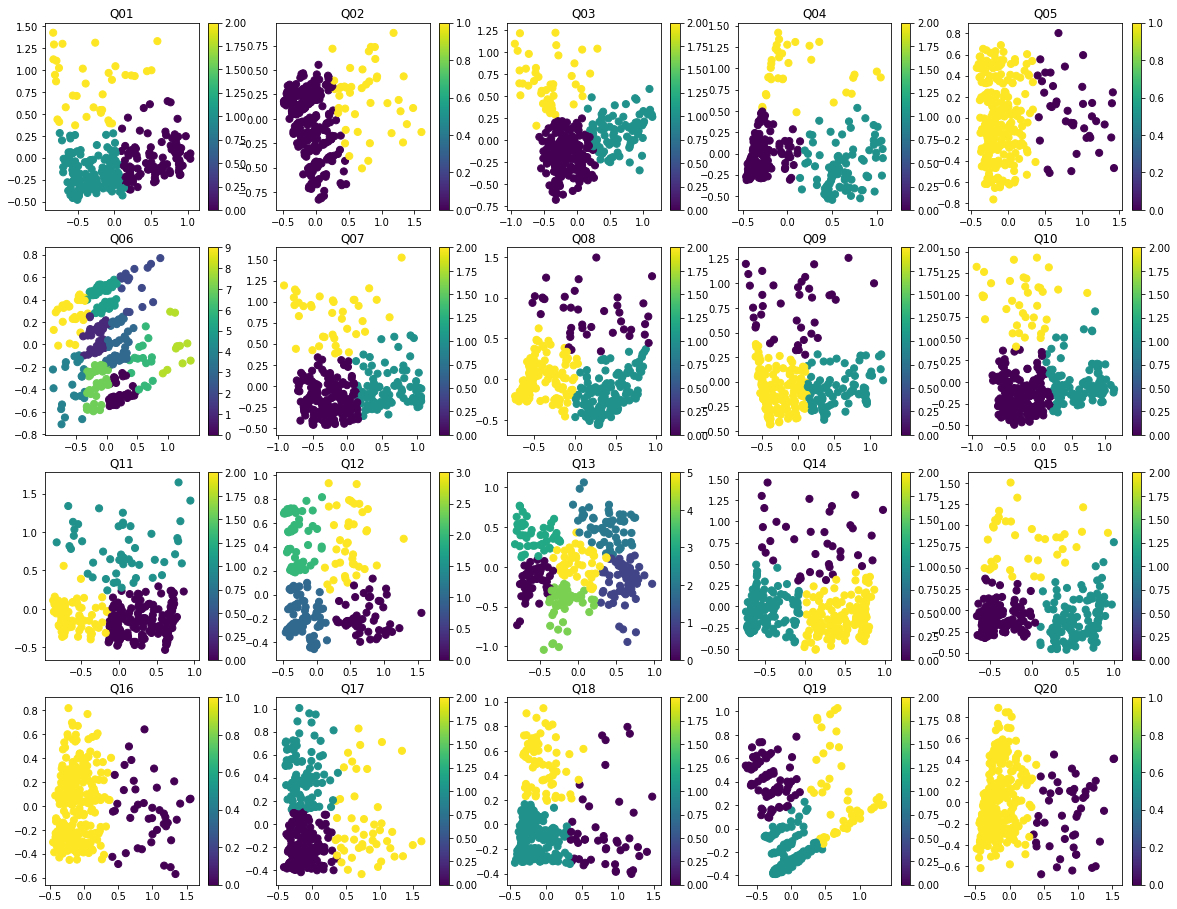

In [16]:
range_n_clusters = list(range(2,11))
results = {}
clusters = {}
fig = plt.figure(figsize=(20, 20))

reduced_data_df = pd.DataFrame(columns=['Dimension 1', 'Dimension 2'])
for question_number in range(1, 21):
    
    question = 'Q' + str(question_number).zfill(2)
    print("Question No. is: ", question)
    
    columns = []
    columns.extend([str(question_number).zfill(2) + '-Effort',
                    str(question_number).zfill(2) + '-Relevance',
                    str(question_number).zfill(2) + '-Uncomfortable',
                    str(question_number).zfill(2) + '-Truthfulness'])
    relevant_indexes.extend(columns)
    
    cleaned_reordered_user_responses = pd.DataFrame(
        reordered_user_responses[relevant_indexes].dropna()).reset_index(drop = True)
    
    scaler, good_data = data_scale(cleaned_reordered_user_responses)

    
    pca = PCA(n_components=2)
    pca.fit(good_data)
    reduced_data = pca.transform(good_data)
    
#     pca_test = pca.transform(transformed_test_x_question)
    
#     results['Q' + str(question_number).zfill(2)] = rs.pca_results(good_data, pca)
#     pca_results = rs.pca_results(transformed_train_x_question, pca) 
    
    temp_df = pd.DataFrame(reduced_data, columns=['Dimension 1', 'Dimension 2'])
    
    reduced_data_df = reduced_data_df.append(temp_df)
    
#     results['Q' + str(question_number).zfill(2)] = rs.pca_results(transformed_train_x_question, pca)
#     pca_results = rs.pca_results(transformed_train_x_question, pca)
    
    max_score = -99
    optimal_clusters = 0
    for n_clusters in range_n_clusters:
        # Apply KMeans clustering algorithm to the reduced data 
        clusterer = KMeans(n_clusters=n_clusters).fit(reduced_data)

        # Predict the cluster for each data point
        preds = clusterer.predict(reduced_data)

        # Find the cluster centers
        centers = clusterer.cluster_centers_

        # Predict the cluster for each transformed sample data point
#         test_preds = clusterer.predict(pca_test)

        # Calculate the mean silhouette coefficient for the number of clusters chosen
        score = silhouette_score(reduced_data, preds, metric='mahalanobis')
        print("For n_clusters = {}. The average silhouette_score with Kmeans is : {}".format(n_clusters, score))
        if score > max_score:
            max_score = score
            optimal_clusters = n_clusters
            
    clusters[question] = optimal_clusters
#     clusterer = KMeans(n_clusters=clusters[question]).fit(reduced_data)
    clusterer = KMeans(n_clusters=3).fit(reduced_data)

    # Predict the cluster for each data point
    preds = pd.DataFrame(clusterer.predict(reduced_data))
#     display(preds)

    # Find the cluster centers
    centers = clusterer.cluster_centers_
#     print(centers)
    

    ax = fig.add_subplot(5, 5, question_number)
    scatter = ax.scatter(
        temp_df['Dimension 1'], temp_df['Dimension 2'],
        c=preds[0], s=50)
    ax.set_title('Q' + str(question_number).zfill(2))
    
#     ax.set_xlabel('GDP per Capita')
#     ax.set_ylabel('Corruption')
    
    plt.colorbar(scatter)

    # TODO: Predict the cluster for each transformed sample data point
#     test_preds = clusterer.predict(pca_test)
    
    # Display the results of the clustering from implementation
#     rs.cluster_results(reduced_data, preds, centers, pca_test)

    log_centers = pca.inverse_transform(centers)

#     # TODO: Exponentiate the centers
    true_centers = data_inverse_scale(scaler, log_centers)

    # Display the true centers
    segments = ['Segment {}'.format(i) for i in range(0,len(centers))]
    true_centers = pd.DataFrame(np.round(true_centers), columns = cleaned_reordered_user_responses.columns)
    true_centers.index = segments
    display(true_centers)
    
    del relevant_indexes[8:]

Data points considered outliers for the feature 'Age':
Data points considered outliers for the feature 'Gender':
Data points considered outliers for the feature 'IUIPC-Awareness':
Data points considered outliers for the feature 'IUIPC-Collection':
Data points considered outliers for the feature 'IUIPC-Control':
Data points considered outliers for the feature 'Online-Presence':
Data points considered outliers for the feature 'Personal-Stability':
Data points considered outliers for the feature 'Reciprocity':
Data points considered outliers for the feature '01-Effort':
Data points considered outliers for the feature '01-Relevance':
Data points considered outliers for the feature '01-Uncomfortable':
Data points considered outliers for the feature '01-Truthfulness':
outside LOOP.....
Outliers list:
 [0, 2, 3, 6, 7, 9, 14, 15, 17, 18, 22, 23, 24, 30, 31, 32, 33, 34, 36, 40, 41, 45, 46, 47, 49, 50, 55, 58, 60, 62, 64, 66, 68, 70, 77, 81, 83, 84, 88, 89, 92, 93, 96, 97, 99, 101, 103, 107, 111

Data points considered outliers for the feature 'Age':
Data points considered outliers for the feature 'Gender':
Data points considered outliers for the feature 'IUIPC-Awareness':
Data points considered outliers for the feature 'IUIPC-Collection':
Data points considered outliers for the feature 'IUIPC-Control':
Data points considered outliers for the feature 'Online-Presence':
Data points considered outliers for the feature 'Personal-Stability':
Data points considered outliers for the feature 'Reciprocity':
Data points considered outliers for the feature '06-Effort':
Data points considered outliers for the feature '06-Relevance':
Data points considered outliers for the feature '06-Uncomfortable':
Data points considered outliers for the feature '06-Truthfulness':
outside LOOP.....
Outliers list:
 [6, 8, 9, 14, 15, 17, 21, 22, 24, 26, 31, 34, 35, 36, 39, 43, 44, 47, 50, 54, 56, 57, 59, 63, 66, 67, 72, 74, 75, 79, 80, 81, 82, 85, 86, 87, 90, 92, 93, 94, 96, 101, 102, 103, 104, 106, 107, 1

Data points considered outliers for the feature 'Age':
Data points considered outliers for the feature 'Gender':
Data points considered outliers for the feature 'IUIPC-Awareness':
Data points considered outliers for the feature 'IUIPC-Collection':
Data points considered outliers for the feature 'IUIPC-Control':
Data points considered outliers for the feature 'Online-Presence':
Data points considered outliers for the feature 'Personal-Stability':
Data points considered outliers for the feature 'Reciprocity':
Data points considered outliers for the feature '11-Effort':
Data points considered outliers for the feature '11-Relevance':
Data points considered outliers for the feature '11-Uncomfortable':
Data points considered outliers for the feature '11-Truthfulness':
outside LOOP.....
Outliers list:
 [7, 9, 14, 16, 18, 19, 26, 27, 30, 34, 35, 38, 40, 42, 43, 45, 47, 49, 50, 51, 52, 60, 62, 63, 70, 74, 76, 82, 87, 93, 94, 99, 131, 133, 134, 136, 139, 144, 150, 151, 156, 159, 161, 162, 166, 1

Data points considered outliers for the feature 'Age':
Data points considered outliers for the feature 'Gender':
Data points considered outliers for the feature 'IUIPC-Awareness':
Data points considered outliers for the feature 'IUIPC-Collection':
Data points considered outliers for the feature 'IUIPC-Control':
Data points considered outliers for the feature 'Online-Presence':
Data points considered outliers for the feature 'Personal-Stability':
Data points considered outliers for the feature 'Reciprocity':
Data points considered outliers for the feature '17-Effort':
Data points considered outliers for the feature '17-Relevance':
Data points considered outliers for the feature '17-Uncomfortable':
Data points considered outliers for the feature '17-Truthfulness':
outside LOOP.....
Outliers list:
 [3, 4, 5, 6, 12, 15, 19, 20, 21, 24, 25, 26, 28, 35, 36, 38, 41, 46, 52, 54, 58, 61, 64, 65, 66, 67, 74, 77, 78, 80, 86, 87, 92, 93, 94, 95, 96, 99, 103, 104, 106, 108, 113, 115, 116, 118, 126,

/home/k1896763/Documents/Code/renders.py:28: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig, ax = plt.subplots(figsize=(14, 8))


Data points considered outliers for the feature 'Age':
Data points considered outliers for the feature 'Gender':
Data points considered outliers for the feature 'IUIPC-Awareness':
Data points considered outliers for the feature 'IUIPC-Collection':
Data points considered outliers for the feature 'IUIPC-Control':
Data points considered outliers for the feature 'Online-Presence':
Data points considered outliers for the feature 'Personal-Stability':
Data points considered outliers for the feature 'Reciprocity':
Data points considered outliers for the feature '22-Effort':
Data points considered outliers for the feature '22-Relevance':
Data points considered outliers for the feature '22-Uncomfortable':
Data points considered outliers for the feature '22-Truthfulness':
outside LOOP.....
Outliers list:
 [1, 3, 6, 7, 9, 10, 12, 13, 14, 18, 22, 23, 24, 30, 32, 34, 35, 39, 41, 44, 53, 54, 55, 56, 57, 59, 63, 64, 65, 67, 68, 69, 76, 78, 81, 82, 84, 86, 88, 92, 97, 99, 102, 105, 107, 110, 111, 114,

/home/k1896763/Documents/Code/renders.py:28: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig, ax = plt.subplots(figsize=(14, 8))


Data points considered outliers for the feature 'Age':
Data points considered outliers for the feature 'Gender':
Data points considered outliers for the feature 'IUIPC-Awareness':
Data points considered outliers for the feature 'IUIPC-Collection':
Data points considered outliers for the feature 'IUIPC-Control':
Data points considered outliers for the feature 'Online-Presence':
Data points considered outliers for the feature 'Personal-Stability':
Data points considered outliers for the feature 'Reciprocity':
Data points considered outliers for the feature '23-Effort':
Data points considered outliers for the feature '23-Relevance':
Data points considered outliers for the feature '23-Uncomfortable':
Data points considered outliers for the feature '23-Truthfulness':
outside LOOP.....
Outliers list:
 [6, 7, 8, 12, 16, 19, 20, 25, 27, 28, 34, 36, 37, 44, 45, 47, 50, 51, 52, 57, 60, 61, 62, 64, 70, 71, 75, 81, 82, 85, 91, 92, 93, 94, 95, 98, 103, 108, 109, 110, 112, 114, 117, 120, 123, 125, 1

/home/k1896763/Documents/Code/renders.py:28: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig, ax = plt.subplots(figsize=(14, 8))


Data points considered outliers for the feature 'Age':
Data points considered outliers for the feature 'Gender':
Data points considered outliers for the feature 'IUIPC-Awareness':
Data points considered outliers for the feature 'IUIPC-Collection':
Data points considered outliers for the feature 'IUIPC-Control':
Data points considered outliers for the feature 'Online-Presence':
Data points considered outliers for the feature 'Personal-Stability':
Data points considered outliers for the feature 'Reciprocity':
Data points considered outliers for the feature '24-Effort':
Data points considered outliers for the feature '24-Relevance':
Data points considered outliers for the feature '24-Uncomfortable':
Data points considered outliers for the feature '24-Truthfulness':
outside LOOP.....
Outliers list:
 [2, 4, 5, 7, 9, 10, 11, 14, 15, 16, 23, 24, 27, 31, 36, 38, 39, 41, 44, 47, 48, 49, 51, 55, 56, 58, 59, 61, 62, 63, 68, 69, 70, 73, 74, 80, 81, 84, 85, 87, 91, 92, 96, 97, 101, 102, 104, 106, 1

/home/k1896763/Documents/Code/renders.py:28: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig, ax = plt.subplots(figsize=(14, 8))


Data points considered outliers for the feature 'Age':
Data points considered outliers for the feature 'Gender':
Data points considered outliers for the feature 'IUIPC-Awareness':
Data points considered outliers for the feature 'IUIPC-Collection':
Data points considered outliers for the feature 'IUIPC-Control':
Data points considered outliers for the feature 'Online-Presence':
Data points considered outliers for the feature 'Personal-Stability':
Data points considered outliers for the feature 'Reciprocity':
Data points considered outliers for the feature '25-Effort':
Data points considered outliers for the feature '25-Relevance':
Data points considered outliers for the feature '25-Uncomfortable':
Data points considered outliers for the feature '25-Truthfulness':
outside LOOP.....
Outliers list:
 [0, 4, 6, 7, 8, 9, 13, 15, 16, 25, 26, 27, 28, 29, 34, 35, 36, 38, 43, 45, 46, 47, 51, 53, 54, 56, 57, 58, 60, 63, 64, 66, 67, 68, 69, 74, 77, 78, 82, 85, 87, 88, 89, 94, 100, 101, 102, 103, 10

/home/k1896763/Documents/Code/renders.py:28: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig, ax = plt.subplots(figsize=(14, 8))


Data points considered outliers for the feature 'Age':
Data points considered outliers for the feature 'Gender':
Data points considered outliers for the feature 'IUIPC-Awareness':
Data points considered outliers for the feature 'IUIPC-Collection':
Data points considered outliers for the feature 'IUIPC-Control':
Data points considered outliers for the feature 'Online-Presence':
Data points considered outliers for the feature 'Personal-Stability':
Data points considered outliers for the feature 'Reciprocity':
Data points considered outliers for the feature '26-Effort':
Data points considered outliers for the feature '26-Relevance':
Data points considered outliers for the feature '26-Uncomfortable':
Data points considered outliers for the feature '26-Truthfulness':
outside LOOP.....
Outliers list:
 [5, 6, 7, 9, 20, 21, 25, 29, 35, 43, 49, 56, 58, 64, 81, 87, 90, 92, 94, 95, 101, 102, 103, 104, 107, 111, 113, 119, 121, 127, 128, 129, 134, 135, 137, 138, 139, 140, 149, 150, 151, 155, 156, 1

/home/k1896763/Documents/Code/renders.py:28: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig, ax = plt.subplots(figsize=(14, 8))


Data points considered outliers for the feature 'Age':
Data points considered outliers for the feature 'Gender':
Data points considered outliers for the feature 'IUIPC-Awareness':
Data points considered outliers for the feature 'IUIPC-Collection':
Data points considered outliers for the feature 'IUIPC-Control':
Data points considered outliers for the feature 'Online-Presence':
Data points considered outliers for the feature 'Personal-Stability':
Data points considered outliers for the feature 'Reciprocity':
Data points considered outliers for the feature '27-Effort':
Data points considered outliers for the feature '27-Relevance':
Data points considered outliers for the feature '27-Uncomfortable':
Data points considered outliers for the feature '27-Truthfulness':
outside LOOP.....
Outliers list:
 [0, 1, 3, 4, 5, 7, 8, 12, 13, 15, 17, 22, 23, 24, 25, 26, 27, 30, 31, 35, 36, 42, 43, 46, 48, 49, 50, 56, 61, 63, 65, 66, 67, 68, 70, 72, 75, 77, 79, 81, 82, 84, 85, 88, 89, 92, 93, 97, 99, 101

/home/k1896763/Documents/Code/renders.py:28: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig, ax = plt.subplots(figsize=(14, 8))


Data points considered outliers for the feature 'Age':
Data points considered outliers for the feature 'Gender':
Data points considered outliers for the feature 'IUIPC-Awareness':
Data points considered outliers for the feature 'IUIPC-Collection':
Data points considered outliers for the feature 'IUIPC-Control':
Data points considered outliers for the feature 'Online-Presence':
Data points considered outliers for the feature 'Personal-Stability':
Data points considered outliers for the feature 'Reciprocity':
Data points considered outliers for the feature '28-Effort':
Data points considered outliers for the feature '28-Relevance':
Data points considered outliers for the feature '28-Uncomfortable':
Data points considered outliers for the feature '28-Truthfulness':
outside LOOP.....
Outliers list:
 [0, 2, 3, 5, 6, 7, 8, 9, 10, 12, 13, 15, 16, 17, 20, 21, 22, 26, 27, 28, 35, 36, 37, 38, 40, 42, 43, 45, 47, 48, 49, 57, 60, 62, 63, 68, 70, 71, 74, 75, 76, 77, 79, 80, 83, 90, 93, 94, 98, 99, 

/home/k1896763/Documents/Code/renders.py:28: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig, ax = plt.subplots(figsize=(14, 8))


Data points considered outliers for the feature 'Age':
Data points considered outliers for the feature 'Gender':
Data points considered outliers for the feature 'IUIPC-Awareness':
Data points considered outliers for the feature 'IUIPC-Collection':
Data points considered outliers for the feature 'IUIPC-Control':
Data points considered outliers for the feature 'Online-Presence':
Data points considered outliers for the feature 'Personal-Stability':
Data points considered outliers for the feature 'Reciprocity':
Data points considered outliers for the feature '29-Effort':
Data points considered outliers for the feature '29-Relevance':
Data points considered outliers for the feature '29-Uncomfortable':
Data points considered outliers for the feature '29-Truthfulness':
outside LOOP.....
Outliers list:
 [0, 5, 7, 8, 10, 11, 12, 13, 20, 21, 22, 23, 24, 25, 26, 28, 29, 30, 32, 38, 41, 43, 47, 49, 51, 52, 54, 58, 60, 61, 62, 64, 69, 71, 72, 74, 75, 80, 83, 86, 89, 90, 93, 94, 95, 97, 98, 101, 102

/home/k1896763/Documents/Code/renders.py:28: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig, ax = plt.subplots(figsize=(14, 8))


Data points considered outliers for the feature 'Online-Presence':
Data points considered outliers for the feature 'Personal-Stability':
Data points considered outliers for the feature 'Reciprocity':
Data points considered outliers for the feature '30-Effort':
Data points considered outliers for the feature '30-Relevance':
Data points considered outliers for the feature '30-Uncomfortable':
Data points considered outliers for the feature '30-Truthfulness':
outside LOOP.....
Outliers list:
 [0, 1, 3, 4, 7, 8, 10, 11, 17, 18, 22, 23, 29, 32, 36, 37, 38, 41, 44, 46, 54, 60, 64, 65, 66, 67, 69, 70, 71, 76, 78, 80, 84, 90, 95, 97, 98, 102, 103, 104, 106, 108, 109, 112, 113, 114, 116, 117, 118, 122, 128, 142, 147, 148, 154, 155, 160, 161, 167, 172, 173, 177, 178, 179, 180, 181, 183, 184, 188, 190, 192, 205, 208, 211, 214, 216, 217, 222, 223, 225, 228, 231, 233, 235, 238, 239, 241, 243, 249, 255, 256, 258, 263, 269, 270, 273, 274, 275, 276, 289, 291, 294, 295, 304, 306, 310, 312, 317, 320, 323

/home/k1896763/Documents/Code/renders.py:28: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig, ax = plt.subplots(figsize=(14, 8))


Data points considered outliers for the feature 'Age':
Data points considered outliers for the feature 'Gender':
Data points considered outliers for the feature 'IUIPC-Awareness':
Data points considered outliers for the feature 'IUIPC-Collection':
Data points considered outliers for the feature 'IUIPC-Control':
Data points considered outliers for the feature 'Online-Presence':
Data points considered outliers for the feature 'Personal-Stability':
Data points considered outliers for the feature 'Reciprocity':
Data points considered outliers for the feature '31-Effort':
Data points considered outliers for the feature '31-Relevance':
Data points considered outliers for the feature '31-Uncomfortable':
Data points considered outliers for the feature '31-Truthfulness':
outside LOOP.....
Outliers list:
 [5, 9, 12, 13, 14, 25, 26, 27, 28, 29, 37, 38, 45, 51, 52, 58, 59, 62, 64, 65, 67, 70, 74, 75, 76, 79, 87, 91, 92, 103, 104, 106, 107, 110, 111, 116, 119, 120, 124, 135, 139, 145, 146, 148, 150

/home/k1896763/Documents/Code/renders.py:28: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig, ax = plt.subplots(figsize=(14, 8))


Data points considered outliers for the feature 'Age':
Data points considered outliers for the feature 'Gender':
Data points considered outliers for the feature 'IUIPC-Awareness':
Data points considered outliers for the feature 'IUIPC-Collection':
Data points considered outliers for the feature 'IUIPC-Control':
Data points considered outliers for the feature 'Online-Presence':
Data points considered outliers for the feature 'Personal-Stability':
Data points considered outliers for the feature 'Reciprocity':
Data points considered outliers for the feature '32-Effort':
Data points considered outliers for the feature '32-Relevance':
Data points considered outliers for the feature '32-Uncomfortable':
Data points considered outliers for the feature '32-Truthfulness':
outside LOOP.....
Outliers list:
 [0, 1, 3, 6, 7, 8, 10, 12, 15, 19, 21, 22, 23, 24, 25, 26, 27, 30, 31, 35, 39, 41, 42, 45, 46, 48, 49, 50, 51, 52, 54, 55, 56, 57, 59, 62, 67, 69, 74, 76, 79, 81, 85, 87, 88, 89, 90, 92, 93, 94

/home/k1896763/Documents/Code/renders.py:28: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig, ax = plt.subplots(figsize=(14, 8))


Data points considered outliers for the feature 'Age':
Data points considered outliers for the feature 'Gender':
Data points considered outliers for the feature 'IUIPC-Awareness':
Data points considered outliers for the feature 'IUIPC-Collection':
Data points considered outliers for the feature 'IUIPC-Control':
Data points considered outliers for the feature 'Online-Presence':
Data points considered outliers for the feature 'Personal-Stability':
Data points considered outliers for the feature 'Reciprocity':
Data points considered outliers for the feature '33-Effort':
Data points considered outliers for the feature '33-Relevance':
Data points considered outliers for the feature '33-Uncomfortable':
Data points considered outliers for the feature '33-Truthfulness':
outside LOOP.....
Outliers list:
 [0, 3, 5, 6, 7, 8, 10, 13, 17, 18, 23, 25, 28, 29, 30, 33, 36, 38, 45, 47, 48, 53, 55, 56, 58, 61, 62, 65, 66, 69, 70, 72, 73, 75, 78, 84, 90, 91, 92, 93, 98, 100, 101, 102, 105, 107, 108, 112,

/home/k1896763/Documents/Code/renders.py:28: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig, ax = plt.subplots(figsize=(14, 8))


Data points considered outliers for the feature 'Age':
Data points considered outliers for the feature 'Gender':
Data points considered outliers for the feature 'IUIPC-Awareness':
Data points considered outliers for the feature 'IUIPC-Collection':
Data points considered outliers for the feature 'IUIPC-Control':
Data points considered outliers for the feature 'Online-Presence':
Data points considered outliers for the feature 'Personal-Stability':
Data points considered outliers for the feature 'Reciprocity':
Data points considered outliers for the feature '34-Effort':
Data points considered outliers for the feature '34-Relevance':
Data points considered outliers for the feature '34-Uncomfortable':
Data points considered outliers for the feature '34-Truthfulness':
outside LOOP.....
Outliers list:
 [0, 4, 5, 11, 13, 14, 15, 20, 23, 24, 25, 33, 34, 35, 36, 38, 44, 46, 49, 50, 54, 57, 61, 62, 65, 67, 68, 69, 72, 73, 74, 76, 77, 79, 81, 82, 88, 96, 97, 101, 102, 103, 104, 106, 108, 110, 112,

/home/k1896763/Documents/Code/renders.py:28: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig, ax = plt.subplots(figsize=(14, 8))


Data points considered outliers for the feature 'Age':
Data points considered outliers for the feature 'Gender':
Data points considered outliers for the feature 'IUIPC-Awareness':
Data points considered outliers for the feature 'IUIPC-Collection':
Data points considered outliers for the feature 'IUIPC-Control':
Data points considered outliers for the feature 'Online-Presence':
Data points considered outliers for the feature 'Personal-Stability':
Data points considered outliers for the feature 'Reciprocity':
Data points considered outliers for the feature '35-Effort':
Data points considered outliers for the feature '35-Relevance':
Data points considered outliers for the feature '35-Uncomfortable':
Data points considered outliers for the feature '35-Truthfulness':
outside LOOP.....
Outliers list:
 [1, 3, 6, 7, 8, 9, 16, 21, 25, 26, 27, 28, 36, 37, 38, 40, 43, 44, 48, 49, 50, 51, 52, 58, 59, 60, 64, 65, 66, 68, 70, 74, 75, 81, 85, 98, 99, 103, 106, 107, 117, 120, 123, 124, 127, 131, 132, 

/home/k1896763/Documents/Code/renders.py:28: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig, ax = plt.subplots(figsize=(14, 8))


Data points considered outliers for the feature 'Age':
Data points considered outliers for the feature 'Gender':
Data points considered outliers for the feature 'IUIPC-Awareness':
Data points considered outliers for the feature 'IUIPC-Collection':
Data points considered outliers for the feature 'IUIPC-Control':
Data points considered outliers for the feature 'Online-Presence':
Data points considered outliers for the feature 'Personal-Stability':
Data points considered outliers for the feature 'Reciprocity':
Data points considered outliers for the feature '36-Effort':
Data points considered outliers for the feature '36-Relevance':
Data points considered outliers for the feature '36-Uncomfortable':
Data points considered outliers for the feature '36-Truthfulness':
outside LOOP.....
Outliers list:
 [2, 4, 5, 6, 11, 12, 13, 14, 18, 19, 20, 21, 22, 25, 32, 33, 41, 43, 50, 55, 57, 59, 61, 62, 67, 70, 71, 75, 77, 85, 87, 88, 90, 91, 92, 94, 95, 96, 97, 98, 104, 105, 106, 109, 110, 112, 117, 1

/home/k1896763/Documents/Code/renders.py:28: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig, ax = plt.subplots(figsize=(14, 8))


Data points considered outliers for the feature 'Age':
Data points considered outliers for the feature 'Gender':
Data points considered outliers for the feature 'IUIPC-Awareness':
Data points considered outliers for the feature 'IUIPC-Collection':
Data points considered outliers for the feature 'IUIPC-Control':
Data points considered outliers for the feature 'Online-Presence':
Data points considered outliers for the feature 'Personal-Stability':
Data points considered outliers for the feature 'Reciprocity':
Data points considered outliers for the feature '37-Effort':
Data points considered outliers for the feature '37-Relevance':
Data points considered outliers for the feature '37-Uncomfortable':
Data points considered outliers for the feature '37-Truthfulness':
outside LOOP.....
Outliers list:
 [1, 2, 4, 5, 6, 7, 10, 12, 13, 15, 16, 26, 27, 28, 29, 30, 35, 37, 39, 40, 42, 43, 45, 48, 51, 52, 55, 58, 61, 62, 63, 66, 67, 69, 70, 71, 72, 73, 74, 77, 78, 79, 86, 88, 92, 93, 94, 101, 103, 

/home/k1896763/Documents/Code/renders.py:28: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig, ax = plt.subplots(figsize=(14, 8))


Data points considered outliers for the feature 'Age':
Data points considered outliers for the feature 'Gender':
Data points considered outliers for the feature 'IUIPC-Awareness':
Data points considered outliers for the feature 'IUIPC-Collection':
Data points considered outliers for the feature 'IUIPC-Control':
Data points considered outliers for the feature 'Online-Presence':
Data points considered outliers for the feature 'Personal-Stability':
Data points considered outliers for the feature 'Reciprocity':
Data points considered outliers for the feature '38-Effort':
Data points considered outliers for the feature '38-Relevance':
Data points considered outliers for the feature '38-Uncomfortable':
Data points considered outliers for the feature '38-Truthfulness':
outside LOOP.....
Outliers list:
 [7, 12, 14, 18, 19, 20, 21, 23, 26, 29, 31, 32, 37, 41, 44, 49, 52, 54, 56, 58, 59, 61, 63, 68, 70, 73, 74, 78, 81, 85, 89, 90, 91, 92, 95, 96, 97, 99, 101, 103, 105, 107, 115, 116, 117, 120, 1

/home/k1896763/Documents/Code/renders.py:28: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig, ax = plt.subplots(figsize=(14, 8))


Data points considered outliers for the feature 'Age':
Data points considered outliers for the feature 'Gender':
Data points considered outliers for the feature 'IUIPC-Awareness':
Data points considered outliers for the feature 'IUIPC-Collection':
Data points considered outliers for the feature 'IUIPC-Control':
Data points considered outliers for the feature 'Online-Presence':
Data points considered outliers for the feature 'Personal-Stability':
Data points considered outliers for the feature 'Reciprocity':
Data points considered outliers for the feature '39-Effort':
Data points considered outliers for the feature '39-Relevance':
Data points considered outliers for the feature '39-Uncomfortable':
Data points considered outliers for the feature '39-Truthfulness':
outside LOOP.....
Outliers list:
 [0, 4, 5, 6, 7, 10, 12, 19, 20, 23, 24, 26, 27, 28, 36, 42, 47, 55, 64, 66, 67, 69, 70, 71, 98, 103, 105, 107, 109, 111, 113, 124, 125, 126, 143, 146, 149, 152, 154, 168, 170, 174, 180, 182, 18

/home/k1896763/Documents/Code/renders.py:28: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig, ax = plt.subplots(figsize=(14, 8))


Data points considered outliers for the feature 'Age':
Data points considered outliers for the feature 'Gender':
Data points considered outliers for the feature 'IUIPC-Awareness':
Data points considered outliers for the feature 'IUIPC-Collection':
Data points considered outliers for the feature 'IUIPC-Control':
Data points considered outliers for the feature 'Online-Presence':
Data points considered outliers for the feature 'Personal-Stability':
Data points considered outliers for the feature 'Reciprocity':
Data points considered outliers for the feature '40-Effort':
Data points considered outliers for the feature '40-Relevance':
Data points considered outliers for the feature '40-Uncomfortable':
Data points considered outliers for the feature '40-Truthfulness':
outside LOOP.....
Outliers list:
 [0, 1, 3, 5, 6, 7, 9, 12, 13, 14, 17, 21, 23, 24, 26, 27, 33, 34, 35, 36, 39, 40, 41, 42, 44, 47, 53, 54, 61, 63, 64, 65, 66, 68, 69, 75, 76, 87, 93, 95, 98, 100, 104, 105, 108, 109, 112, 113, 

/home/k1896763/Documents/Code/renders.py:28: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig, ax = plt.subplots(figsize=(14, 8))
/home/k1896763/Documents/Code/renders.py:28: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig, ax = plt.subplots(figsize=(14, 8))


Data points considered outliers for the feature 'Online-Presence':
Data points considered outliers for the feature 'Personal-Stability':
Data points considered outliers for the feature 'Reciprocity':
Data points considered outliers for the feature '41-Effort':
Data points considered outliers for the feature '41-Relevance':
Data points considered outliers for the feature '41-Uncomfortable':
Data points considered outliers for the feature '41-Truthfulness':
outside LOOP.....
Outliers list:
 [3, 5, 6, 11, 14, 15, 16, 20, 21, 23, 24, 25, 32, 33, 34, 35, 37, 39, 41, 44, 45, 48, 49, 52, 61, 64, 65, 68, 69, 71, 74, 88, 90, 92, 93, 106, 108, 109, 116, 118, 121, 123, 124, 127, 130, 131, 133, 134, 137, 140, 141, 145, 146, 148, 152, 153, 160, 164, 165, 167, 169, 171, 174, 176, 177, 183, 186, 194, 195, 197, 201, 204, 205, 207, 210, 213, 217, 218, 220, 221, 227, 228, 235, 236, 237, 242, 244, 246, 248, 253, 260, 265, 268, 269, 272, 275, 278, 286, 288, 291, 293, 296, 303, 304, 306, 313, 320, 322, 325

/home/k1896763/Documents/Code/renders.py:28: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig, ax = plt.subplots(figsize=(14, 8))


Data points considered outliers for the feature 'Gender':
Data points considered outliers for the feature 'IUIPC-Awareness':
Data points considered outliers for the feature 'IUIPC-Collection':
Data points considered outliers for the feature 'IUIPC-Control':
Data points considered outliers for the feature 'Online-Presence':
Data points considered outliers for the feature 'Personal-Stability':
Data points considered outliers for the feature 'Reciprocity':
Data points considered outliers for the feature '43-Effort':
Data points considered outliers for the feature '43-Relevance':
Data points considered outliers for the feature '43-Uncomfortable':
Data points considered outliers for the feature '43-Truthfulness':
outside LOOP.....
Outliers list:
 [0, 2, 3, 4, 6, 8, 10, 13, 19, 21, 22, 26, 28, 30, 32, 33, 35, 38, 39, 45, 48, 49, 50, 51, 53, 55, 57, 59, 60, 62, 69, 72, 78, 79, 81, 85, 87, 88, 92, 93, 96, 98, 101, 104, 106, 107, 108, 109, 111, 113, 114, 121, 122, 123, 124, 126, 130, 132, 138, 

/home/k1896763/Documents/Code/renders.py:28: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig, ax = plt.subplots(figsize=(14, 8))


Data points considered outliers for the feature 'Age':
Data points considered outliers for the feature 'Gender':
Data points considered outliers for the feature 'IUIPC-Awareness':
Data points considered outliers for the feature 'IUIPC-Collection':
Data points considered outliers for the feature 'IUIPC-Control':
Data points considered outliers for the feature 'Online-Presence':
Data points considered outliers for the feature 'Personal-Stability':
Data points considered outliers for the feature 'Reciprocity':
Data points considered outliers for the feature '44-Effort':
Data points considered outliers for the feature '44-Relevance':
Data points considered outliers for the feature '44-Uncomfortable':
Data points considered outliers for the feature '44-Truthfulness':
outside LOOP.....
Outliers list:
 [2, 4, 5, 6, 7, 10, 11, 15, 20, 21, 22, 24, 25, 27, 28, 29, 34, 36, 37, 39, 40, 41, 49, 52, 54, 56, 61, 62, 63, 67, 70, 71, 73, 77, 78, 82, 84, 87, 95, 102, 105, 111, 112, 114, 117, 128, 132, 1

/home/k1896763/Documents/Code/renders.py:28: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig, ax = plt.subplots(figsize=(14, 8))


Data points considered outliers for the feature 'Age':
Data points considered outliers for the feature 'Gender':
Data points considered outliers for the feature 'IUIPC-Awareness':
Data points considered outliers for the feature 'IUIPC-Collection':
Data points considered outliers for the feature 'IUIPC-Control':
Data points considered outliers for the feature 'Online-Presence':
Data points considered outliers for the feature 'Personal-Stability':
Data points considered outliers for the feature 'Reciprocity':
Data points considered outliers for the feature '45-Effort':
Data points considered outliers for the feature '45-Relevance':
Data points considered outliers for the feature '45-Uncomfortable':
Data points considered outliers for the feature '45-Truthfulness':
outside LOOP.....
Outliers list:
 [0, 2, 4, 6, 7, 8, 10, 15, 19, 21, 24, 27, 28, 29, 34, 35, 37, 39, 45, 47, 65, 67, 69, 70, 75, 76, 77, 78, 79, 83, 84, 90, 92, 100, 102, 103, 104, 108, 109, 114, 115, 117, 119, 121, 122, 123, 1

/home/k1896763/Documents/Code/renders.py:28: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig, ax = plt.subplots(figsize=(14, 8))


Data points considered outliers for the feature 'Age':
Data points considered outliers for the feature 'Gender':
Data points considered outliers for the feature 'IUIPC-Awareness':
Data points considered outliers for the feature 'IUIPC-Collection':
Data points considered outliers for the feature 'IUIPC-Control':
Data points considered outliers for the feature 'Online-Presence':
Data points considered outliers for the feature 'Personal-Stability':
Data points considered outliers for the feature 'Reciprocity':
Data points considered outliers for the feature '46-Effort':
Data points considered outliers for the feature '46-Relevance':
Data points considered outliers for the feature '46-Uncomfortable':
Data points considered outliers for the feature '46-Truthfulness':
outside LOOP.....
Outliers list:
 [3, 6, 7, 8, 11, 12, 14, 15, 20, 25, 26, 27, 30, 39, 41, 42, 44, 52, 54, 59, 63, 65, 69, 74, 87, 89, 92, 94, 95, 96, 98, 99, 102, 103, 104, 109, 111, 117, 121, 122, 133, 136, 137, 139, 141, 145

/home/k1896763/Documents/Code/renders.py:28: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig, ax = plt.subplots(figsize=(14, 8))


Data points considered outliers for the feature 'Age':
Data points considered outliers for the feature 'Gender':
Data points considered outliers for the feature 'IUIPC-Awareness':
Data points considered outliers for the feature 'IUIPC-Collection':
Data points considered outliers for the feature 'IUIPC-Control':
Data points considered outliers for the feature 'Online-Presence':
Data points considered outliers for the feature 'Personal-Stability':
Data points considered outliers for the feature 'Reciprocity':
Data points considered outliers for the feature '47-Effort':
Data points considered outliers for the feature '47-Relevance':
Data points considered outliers for the feature '47-Uncomfortable':
Data points considered outliers for the feature '47-Truthfulness':
outside LOOP.....
Outliers list:
 [0, 4, 6, 8, 11, 15, 16, 21, 23, 26, 27, 33, 34, 35, 37, 38, 40, 42, 43, 46, 47, 49, 51, 54, 55, 59, 60, 67, 68, 69, 70, 72, 76, 79, 87, 90, 94, 96, 97, 101, 102, 105, 107, 108, 109, 110, 111, 

/home/k1896763/Documents/Code/renders.py:28: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig, ax = plt.subplots(figsize=(14, 8))


Data points considered outliers for the feature 'Gender':
Data points considered outliers for the feature 'IUIPC-Awareness':
Data points considered outliers for the feature 'IUIPC-Collection':
Data points considered outliers for the feature 'IUIPC-Control':
Data points considered outliers for the feature 'Online-Presence':
Data points considered outliers for the feature 'Personal-Stability':
Data points considered outliers for the feature 'Reciprocity':
Data points considered outliers for the feature '48-Effort':
Data points considered outliers for the feature '48-Relevance':
Data points considered outliers for the feature '48-Uncomfortable':
Data points considered outliers for the feature '48-Truthfulness':
outside LOOP.....
Outliers list:
 [3, 5, 6, 7, 8, 11, 14, 15, 16, 17, 18, 21, 23, 25, 26, 27, 28, 29, 31, 32, 33, 37, 38, 42, 43, 45, 49, 50, 51, 52, 62, 63, 64, 66, 68, 69, 78, 82, 85, 90, 92, 95, 96, 97, 99, 100, 101, 102, 103, 105, 106, 107, 111, 112, 116, 117, 118, 119, 122, 12

/home/k1896763/Documents/Code/renders.py:28: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig, ax = plt.subplots(figsize=(14, 8))


Data points considered outliers for the feature 'Age':
Data points considered outliers for the feature 'Gender':
Data points considered outliers for the feature 'IUIPC-Awareness':
Data points considered outliers for the feature 'IUIPC-Collection':
Data points considered outliers for the feature 'IUIPC-Control':
Data points considered outliers for the feature 'Online-Presence':
Data points considered outliers for the feature 'Personal-Stability':
Data points considered outliers for the feature 'Reciprocity':
Data points considered outliers for the feature '49-Effort':
Data points considered outliers for the feature '49-Relevance':
Data points considered outliers for the feature '49-Uncomfortable':
Data points considered outliers for the feature '49-Truthfulness':
outside LOOP.....
Outliers list:
 [3, 5, 6, 7, 8, 15, 19, 22, 23, 24, 31, 34, 42, 48, 58, 61, 63, 65, 67, 75, 90, 93, 97, 101, 103, 105, 106, 111, 113, 118, 119, 120, 121, 127, 128, 129, 133, 141, 142, 149, 150, 154, 159, 162, 

/home/k1896763/Documents/Code/renders.py:28: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig, ax = plt.subplots(figsize=(14, 8))


Data points considered outliers for the feature 'Age':
Data points considered outliers for the feature 'Gender':
Data points considered outliers for the feature 'IUIPC-Awareness':
Data points considered outliers for the feature 'IUIPC-Collection':
Data points considered outliers for the feature 'IUIPC-Control':
Data points considered outliers for the feature 'Online-Presence':
Data points considered outliers for the feature 'Personal-Stability':
Data points considered outliers for the feature 'Reciprocity':
Data points considered outliers for the feature '50-Effort':
Data points considered outliers for the feature '50-Relevance':
Data points considered outliers for the feature '50-Uncomfortable':
Data points considered outliers for the feature '50-Truthfulness':
outside LOOP.....
Outliers list:
 [4, 6, 7, 8, 11, 13, 19, 27, 33, 35, 36, 37, 39, 40, 42, 49, 52, 56, 64, 65, 66, 67, 74, 79, 81, 91, 93, 95, 96, 99, 101, 102, 103, 105, 106, 108, 114, 115, 117, 119, 120, 121, 122, 123, 124, 1

/home/k1896763/Documents/Code/renders.py:28: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig, ax = plt.subplots(figsize=(14, 8))


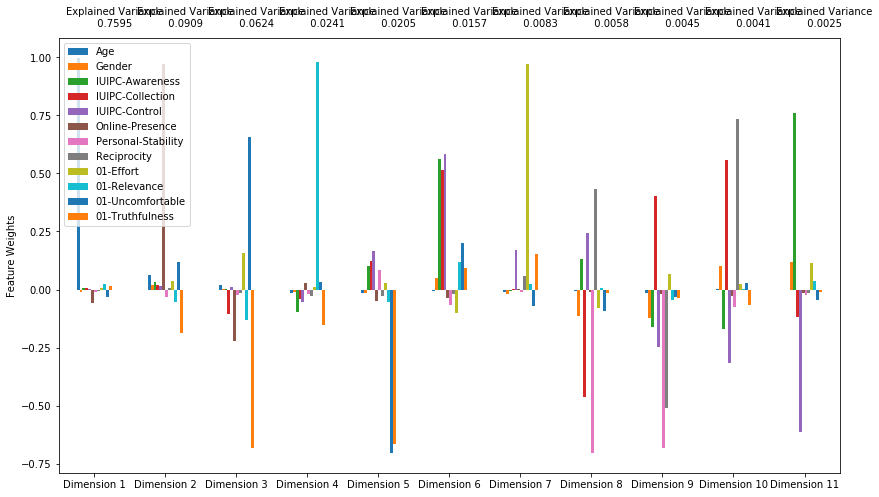

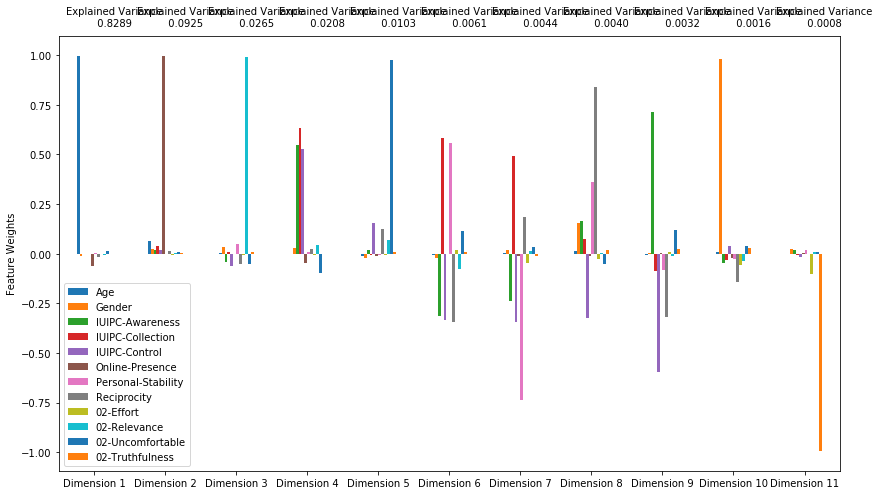

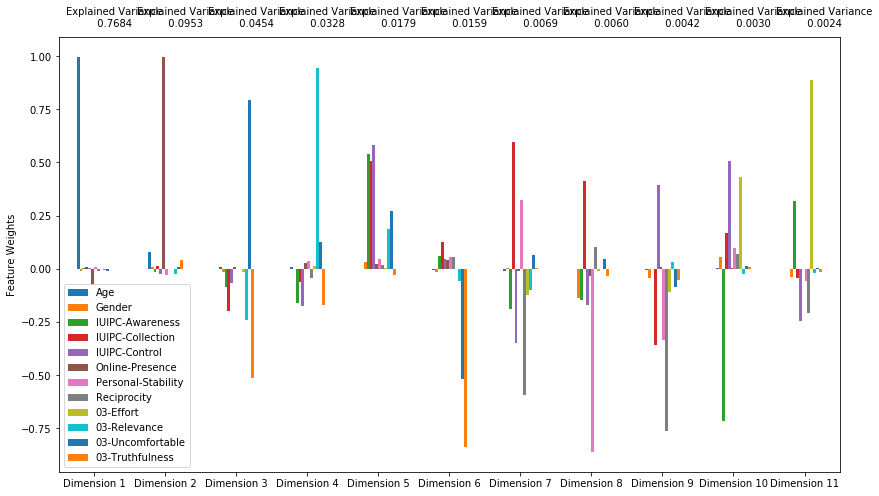

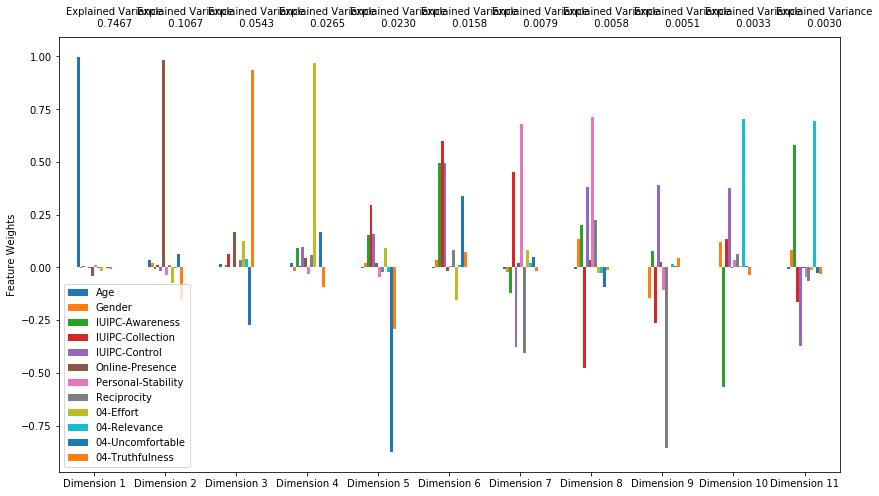

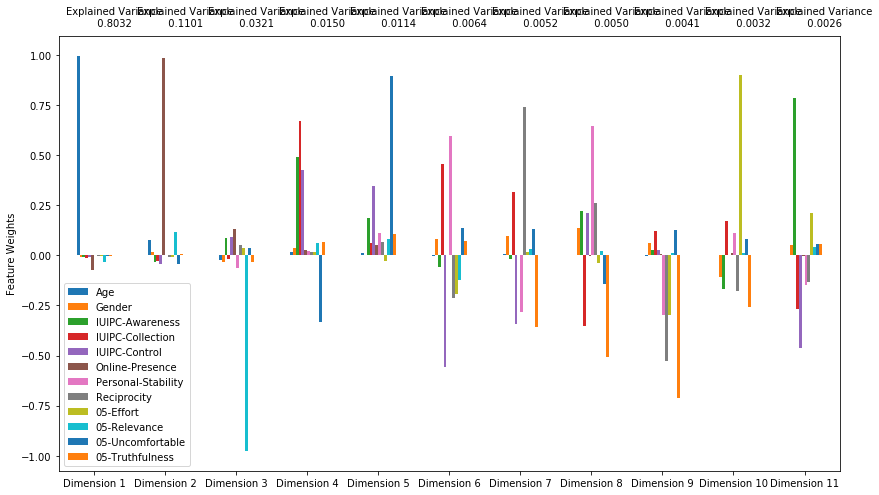

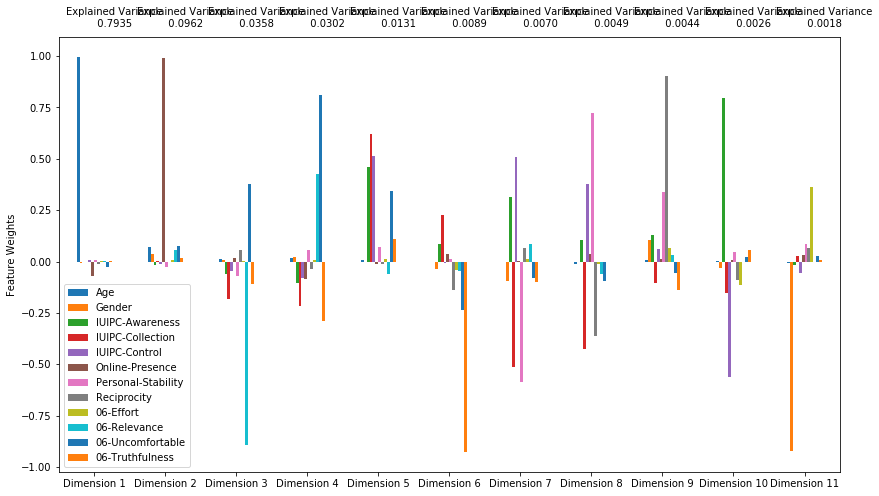

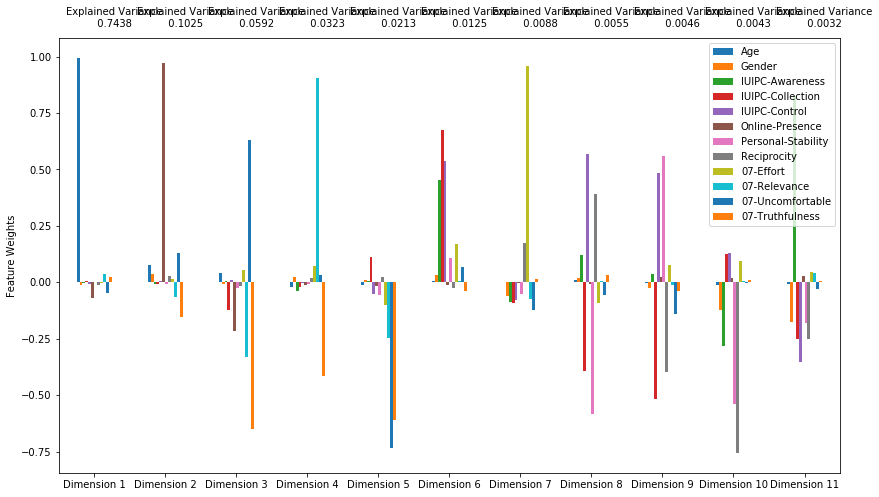

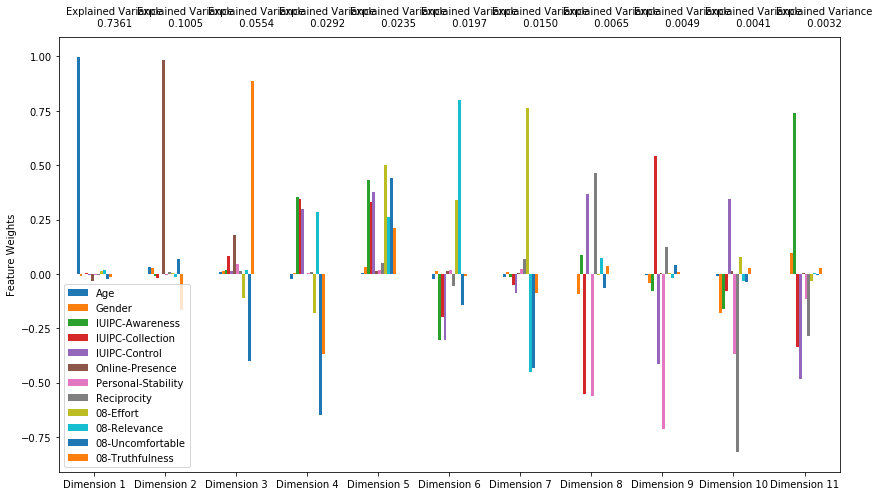

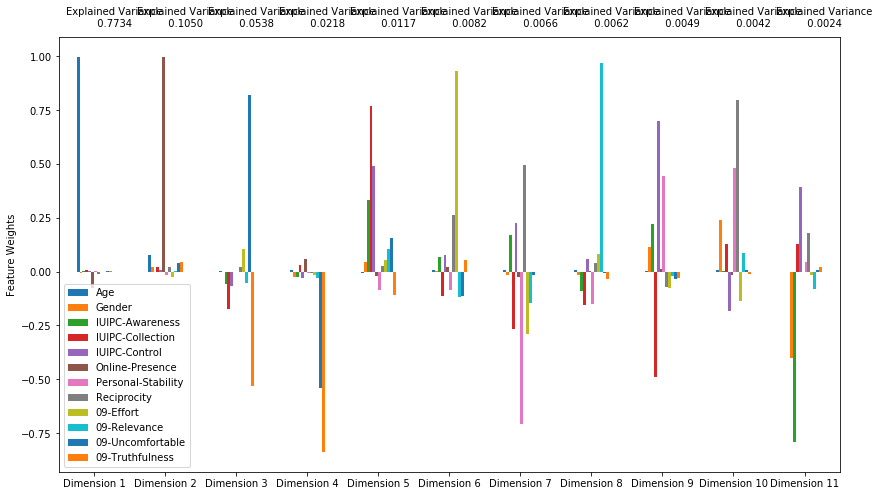

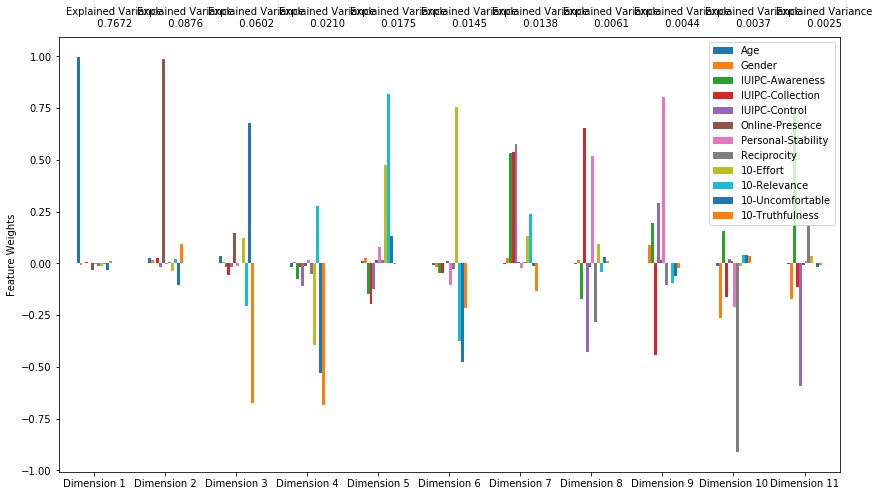

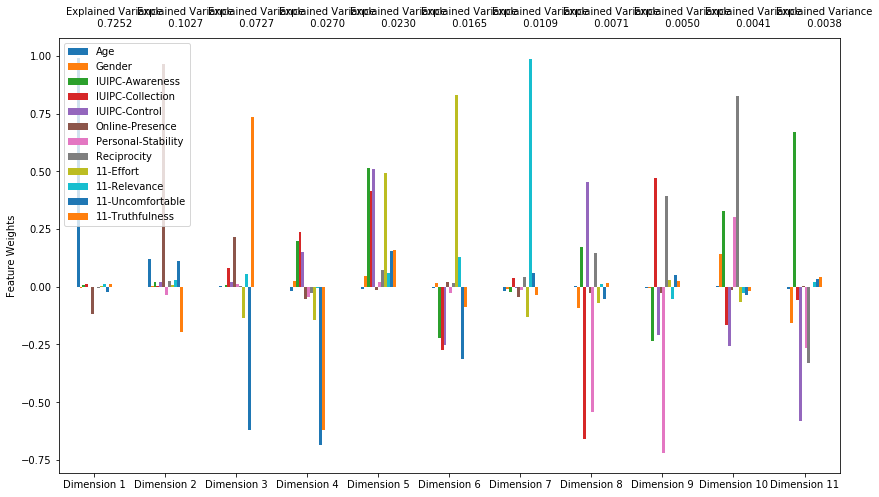

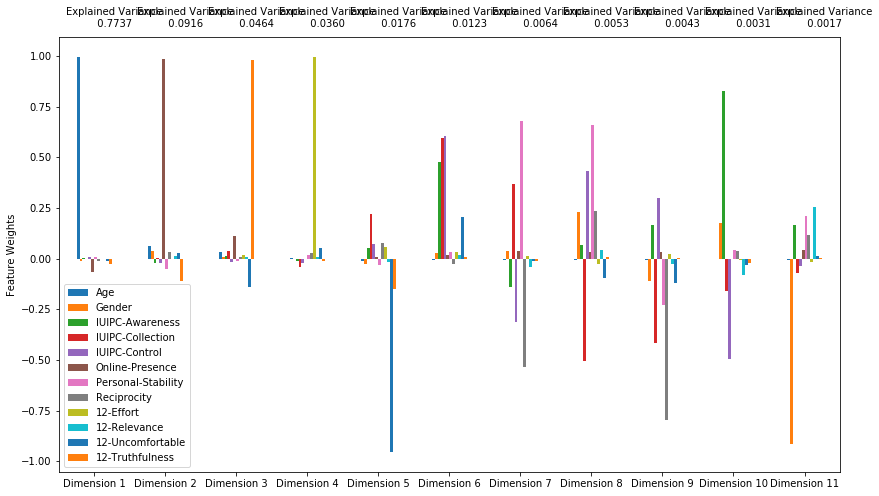

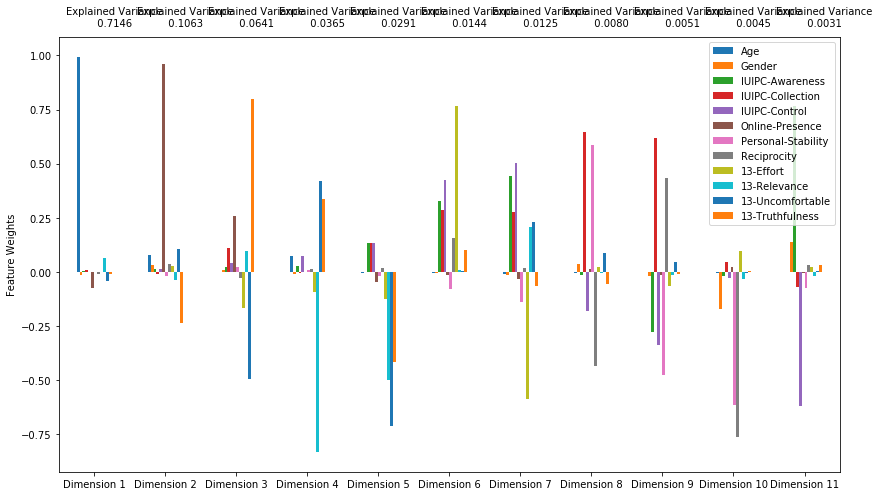

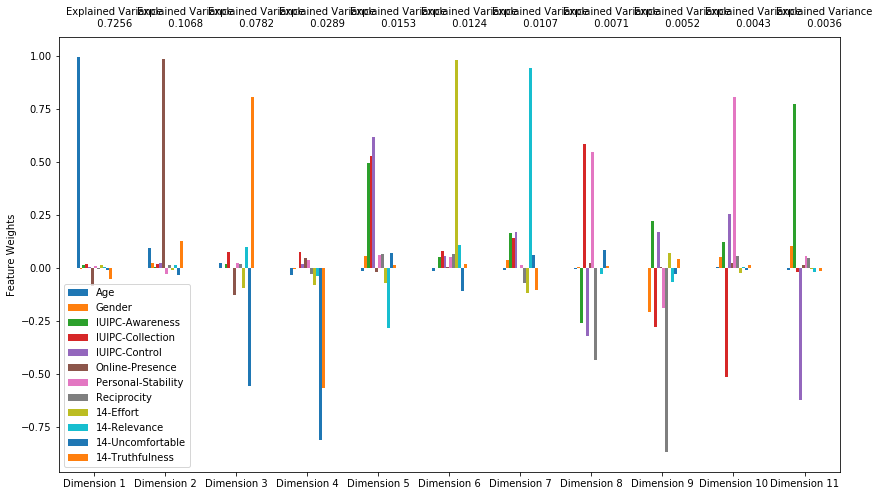

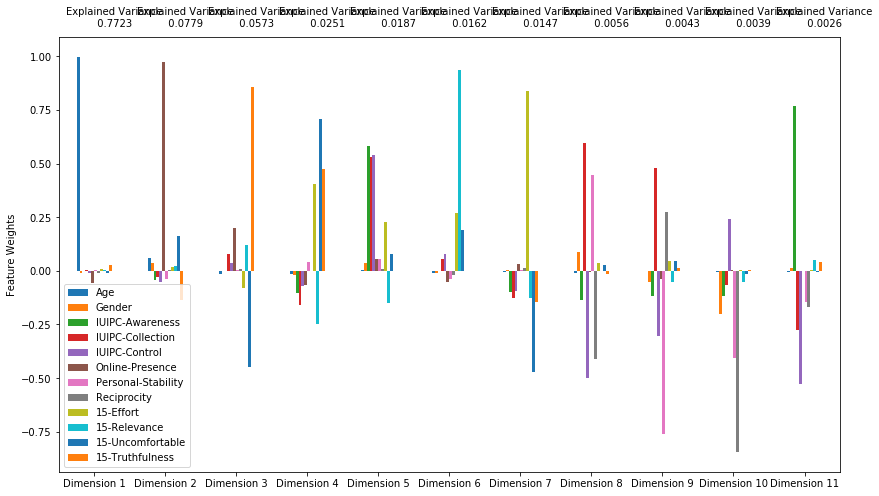

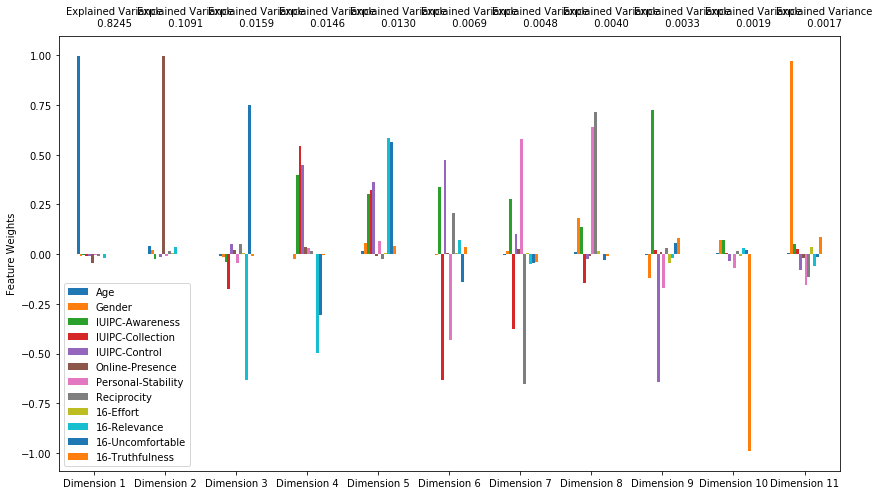

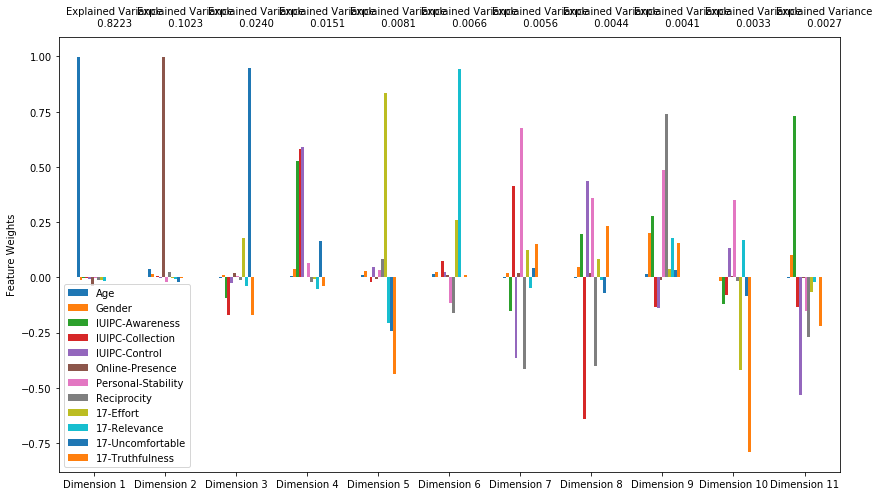

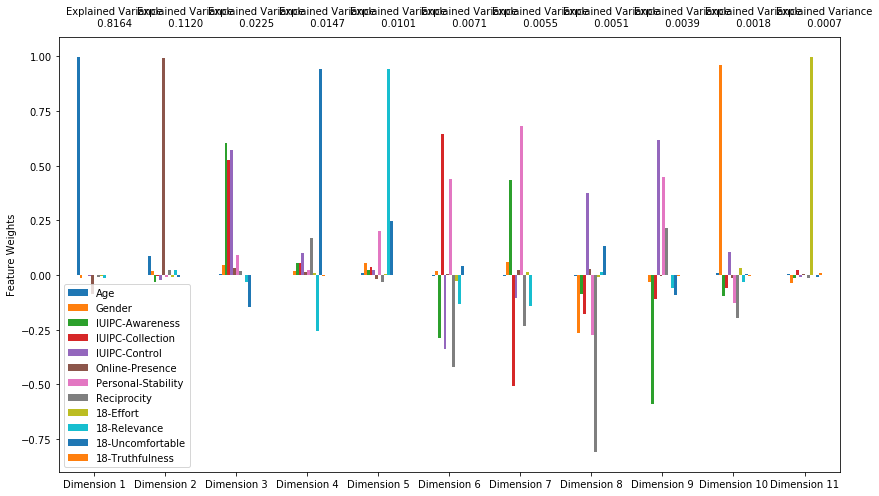

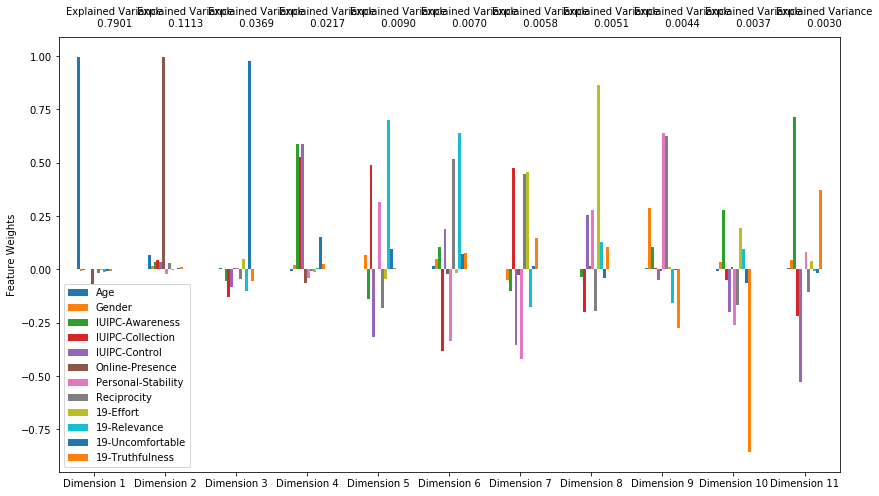

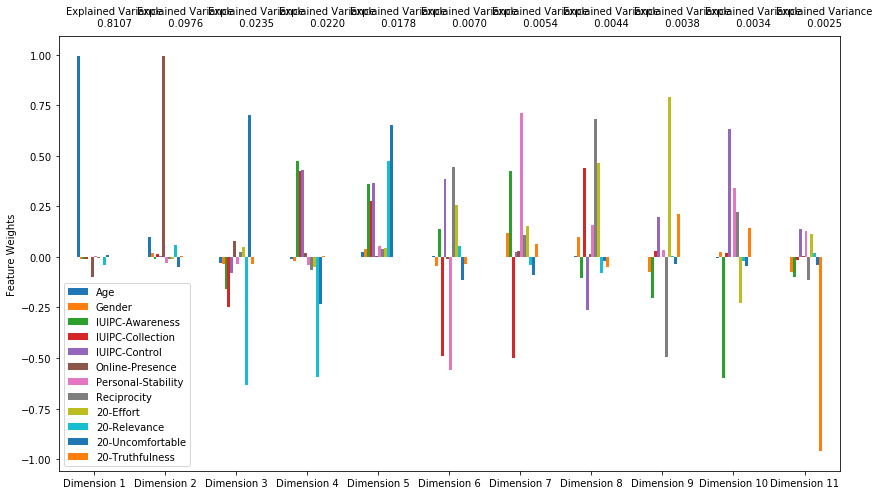

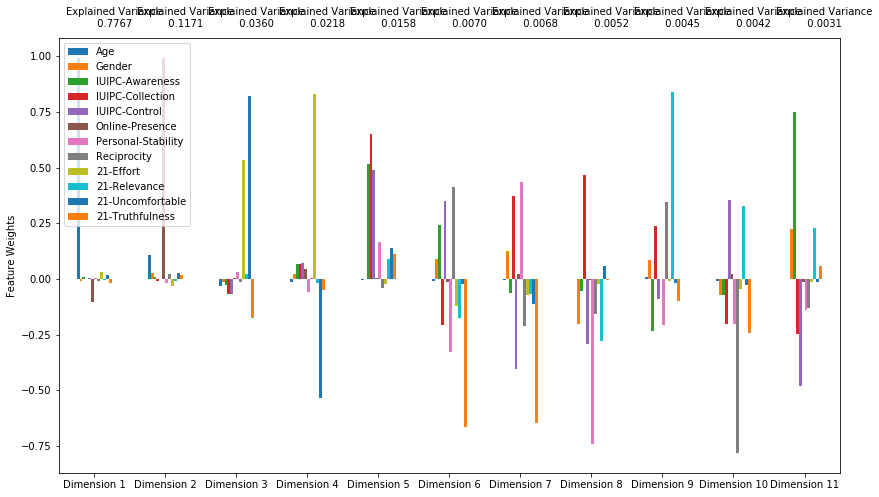

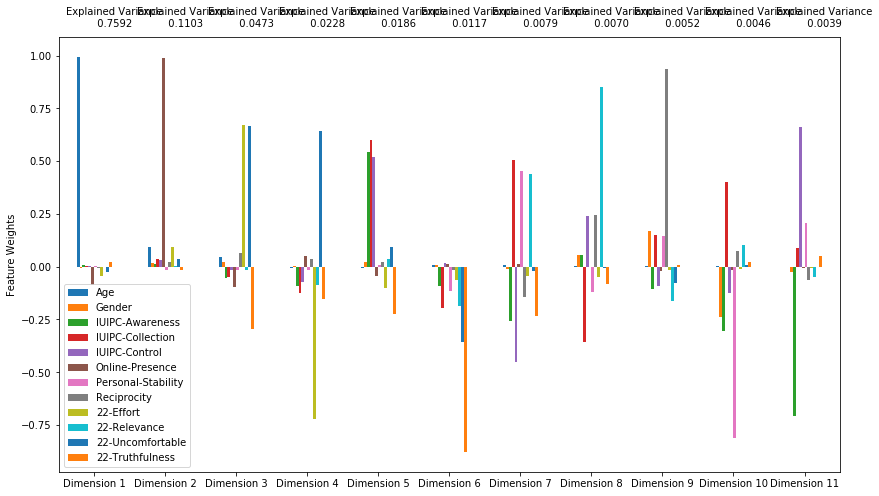

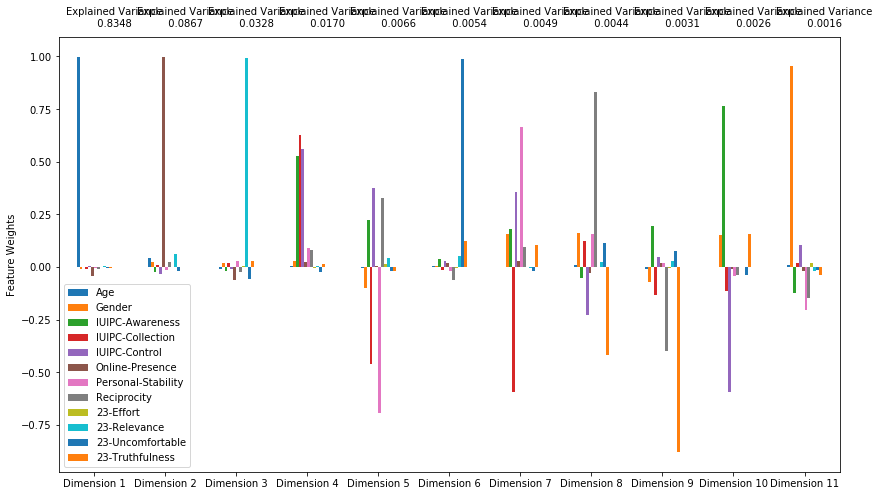

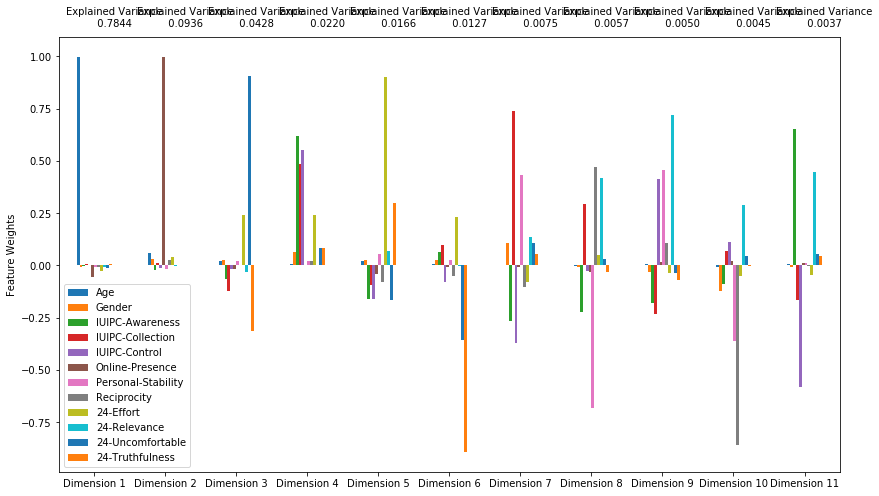

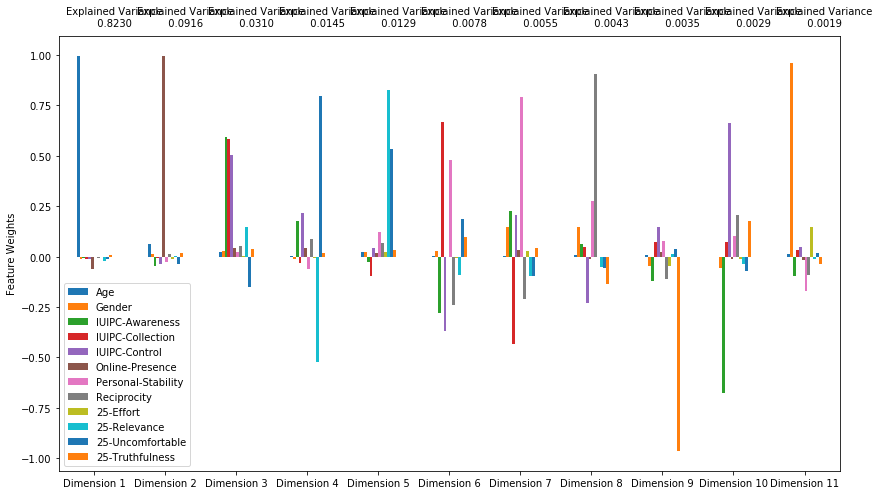

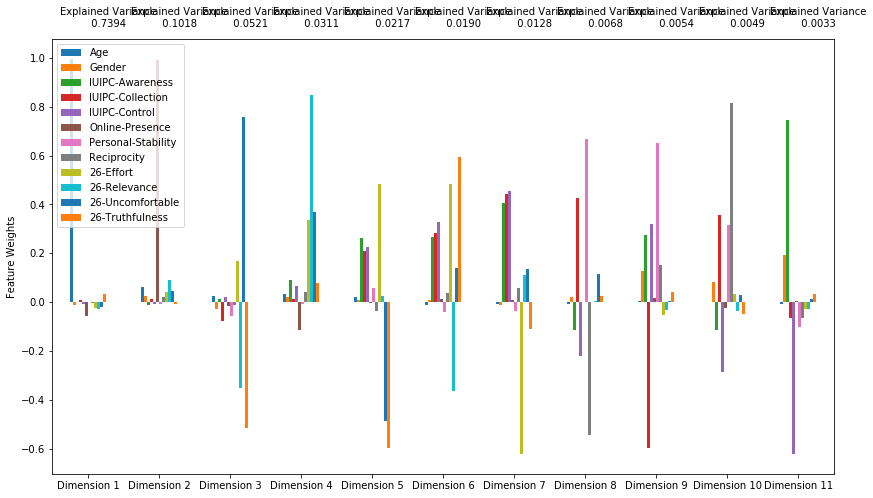

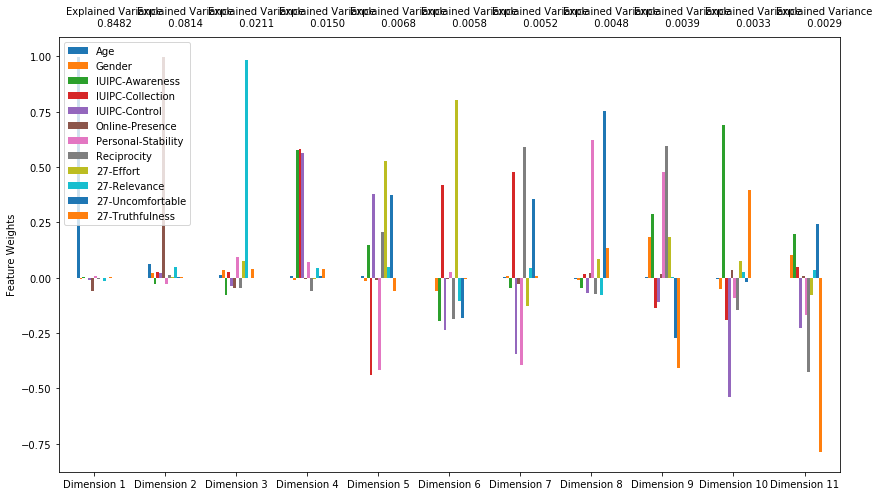

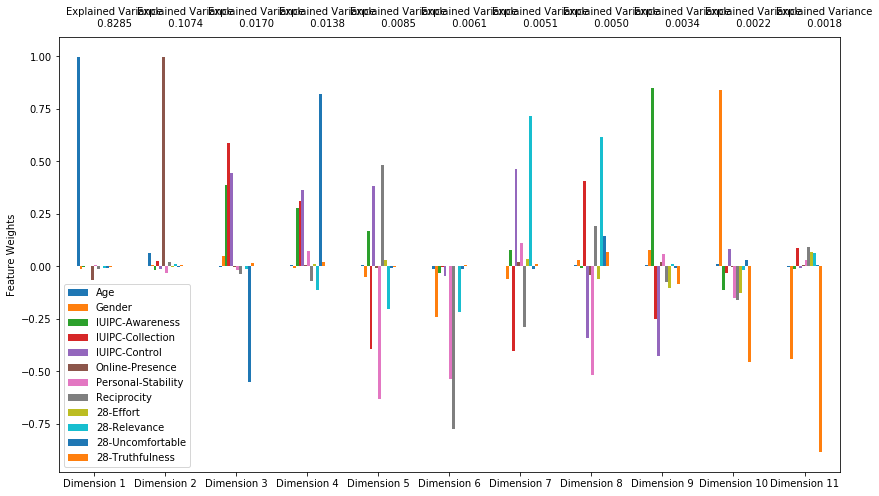

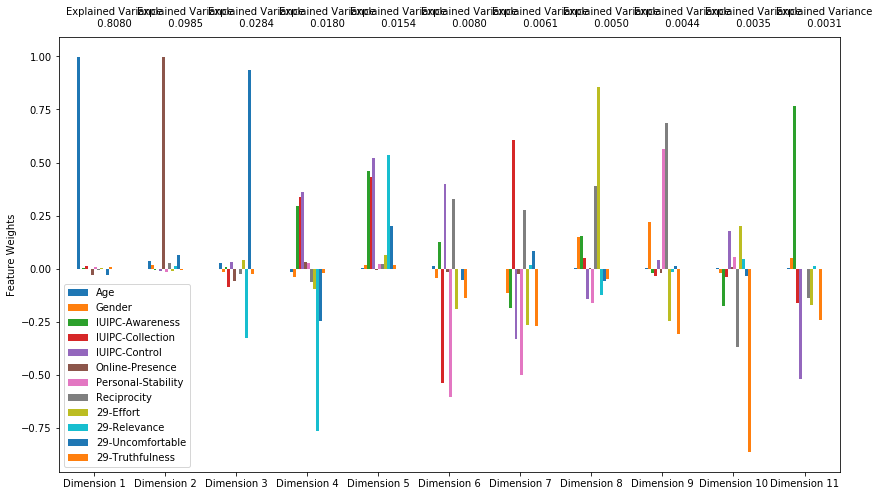

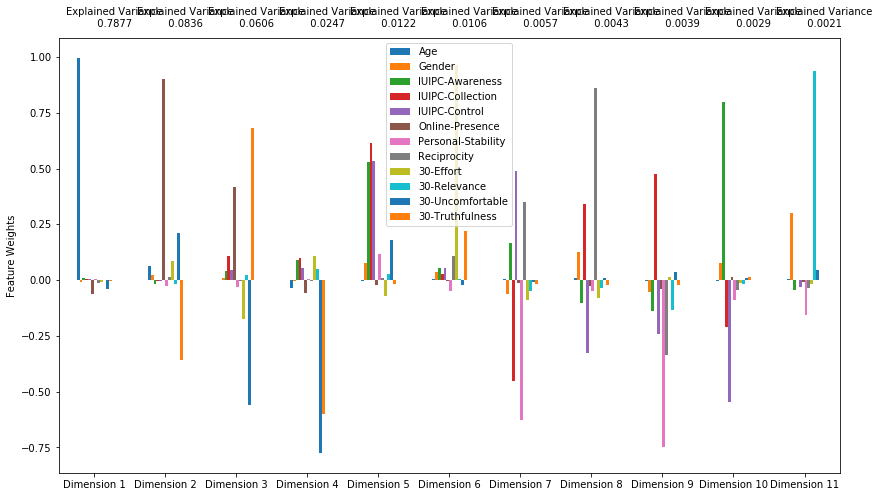

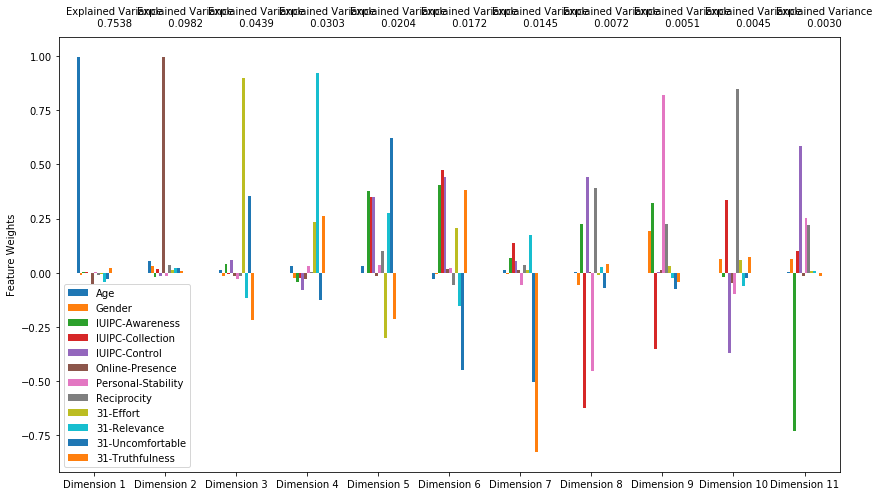

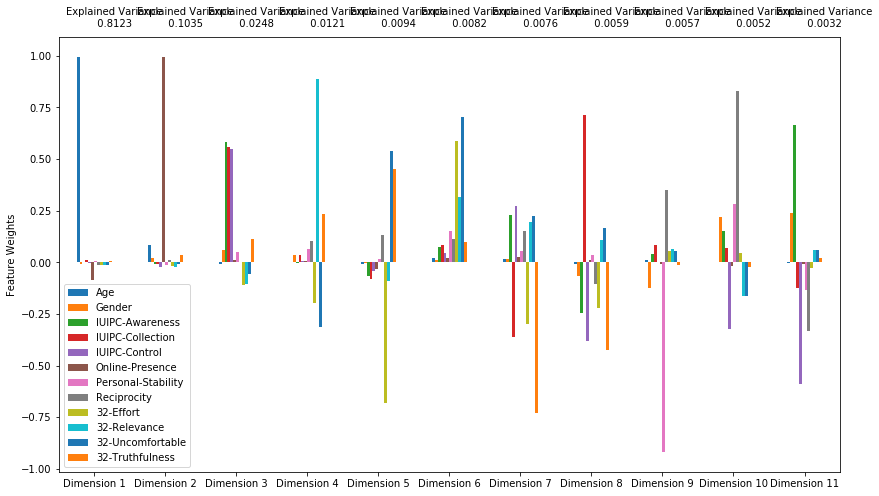

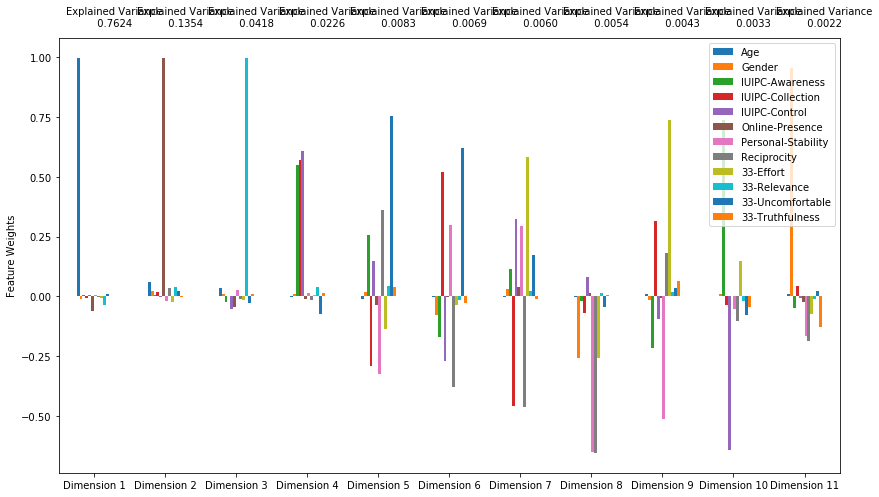

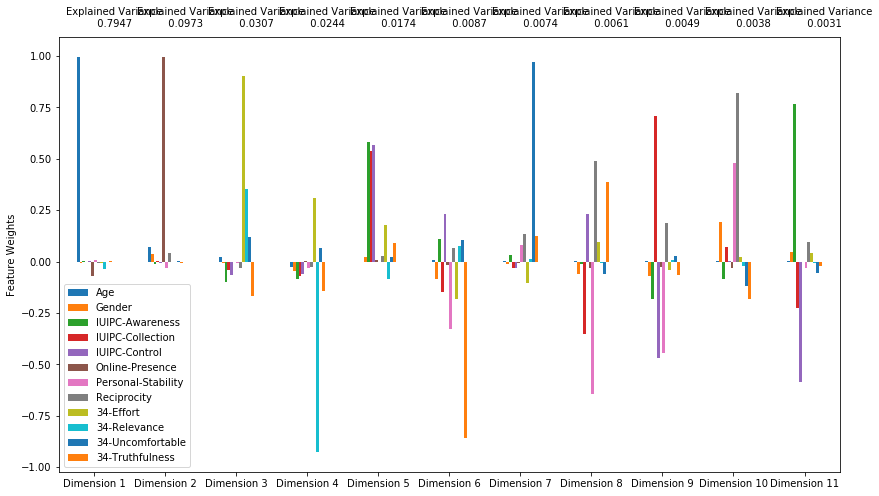

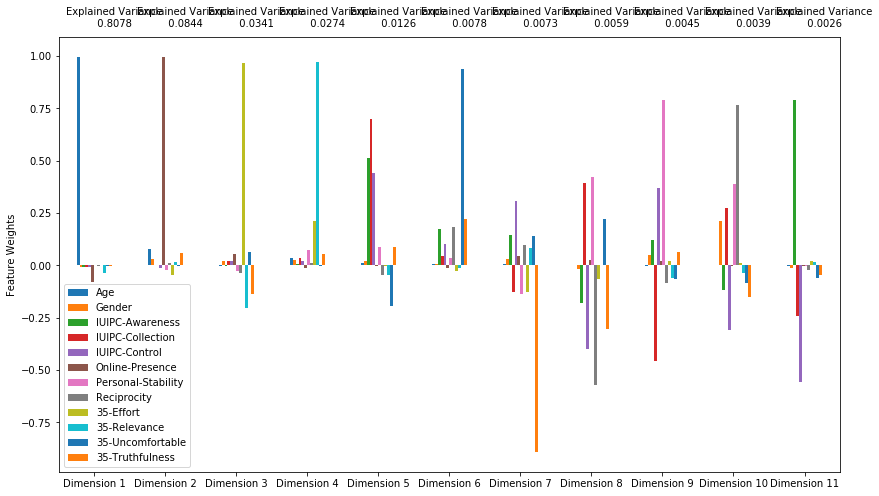

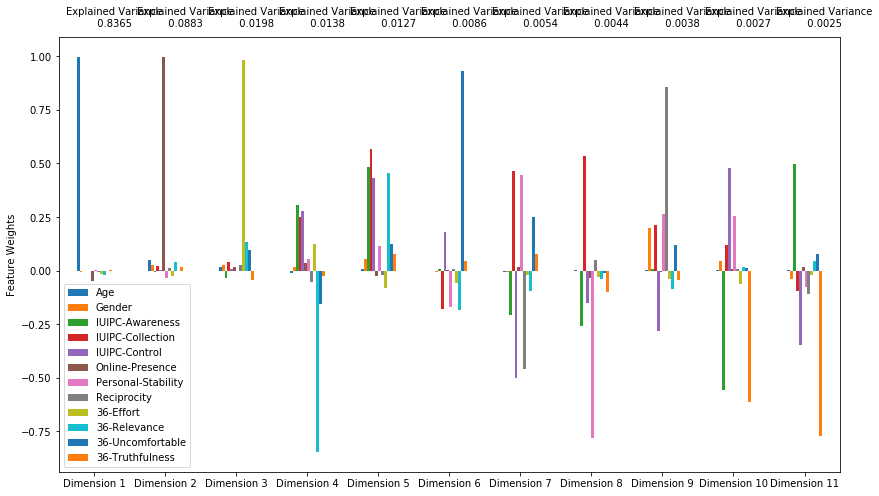

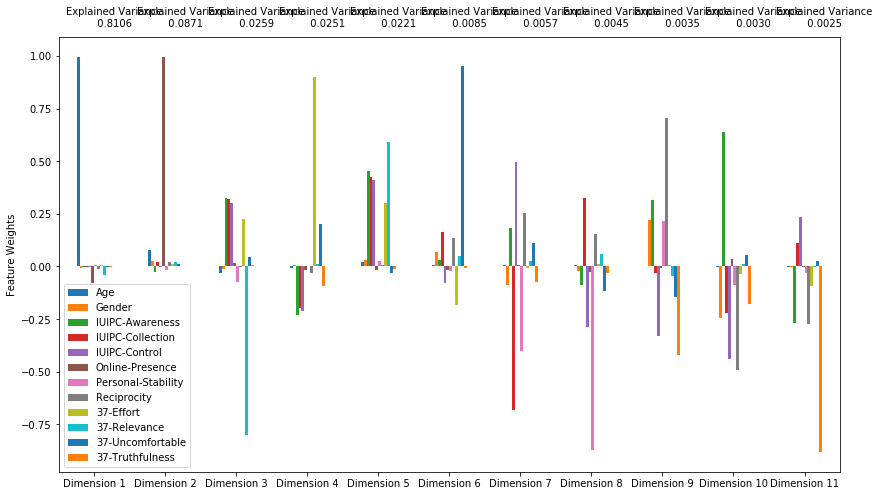

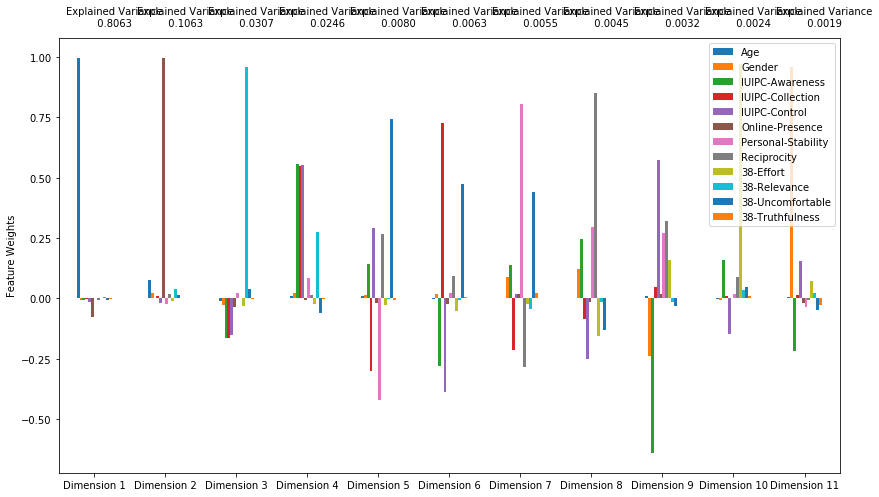

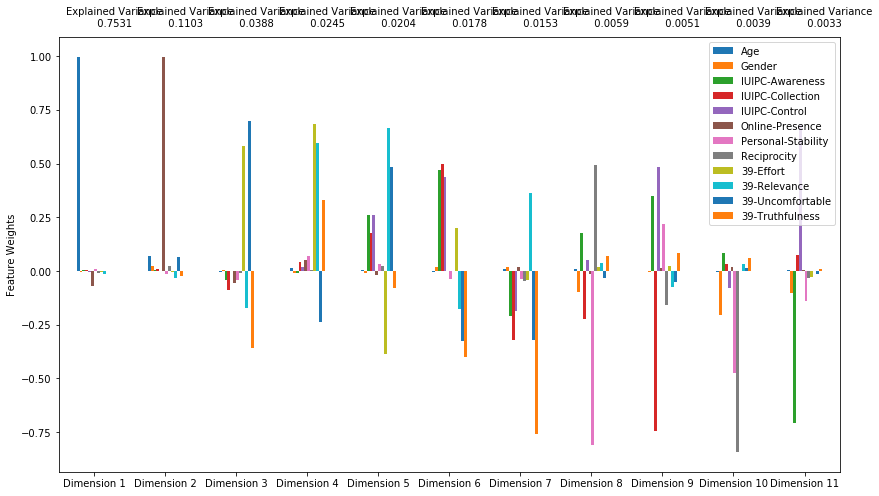

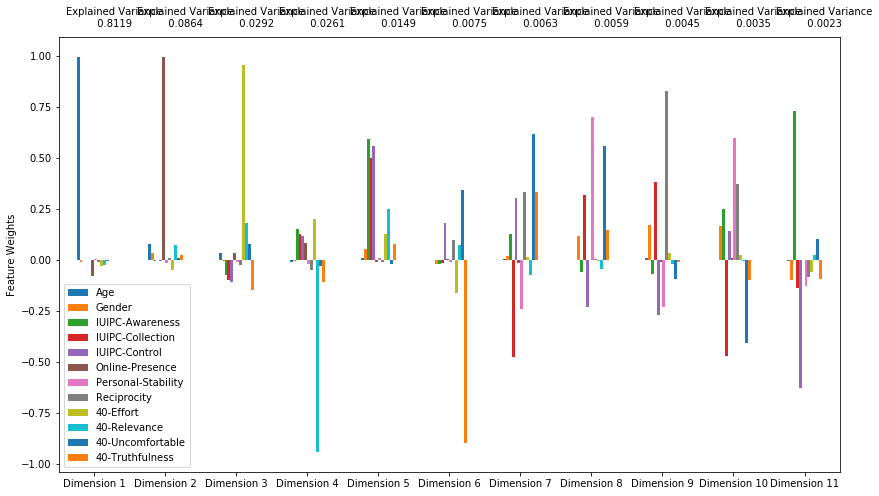

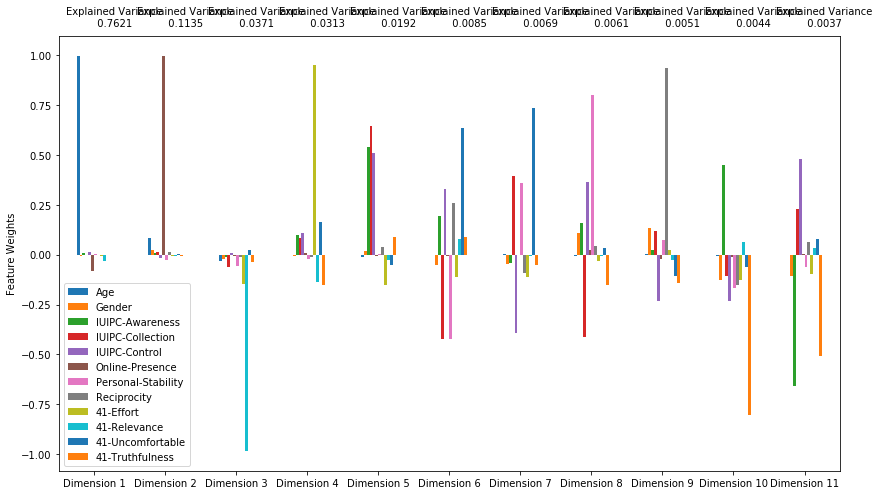

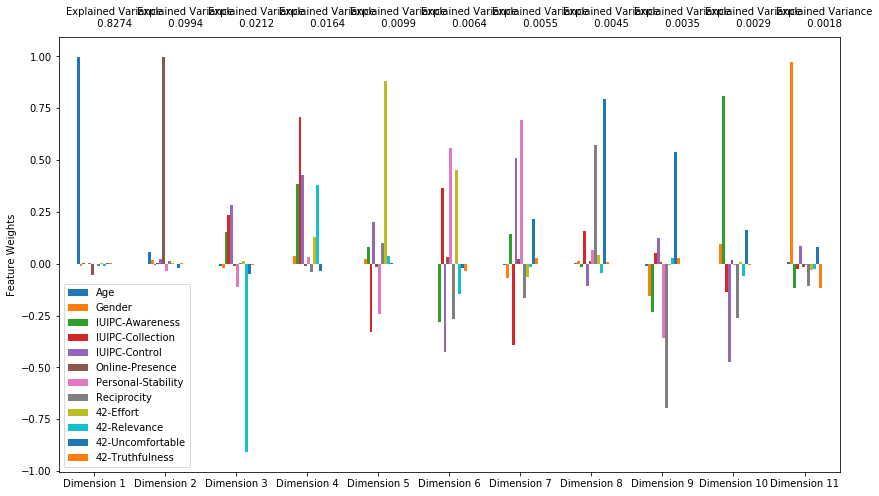

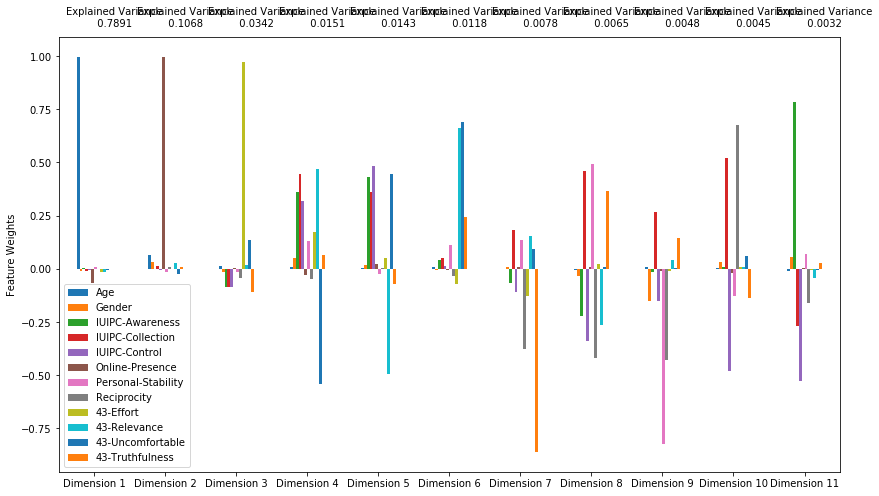

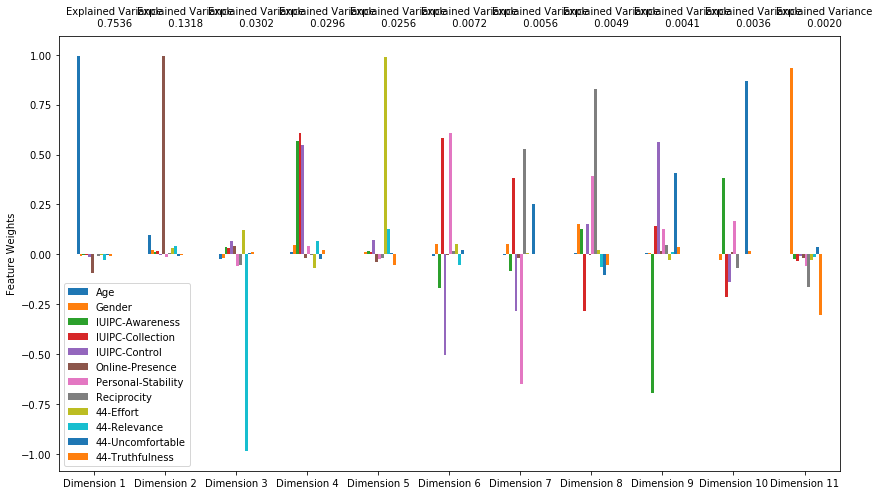

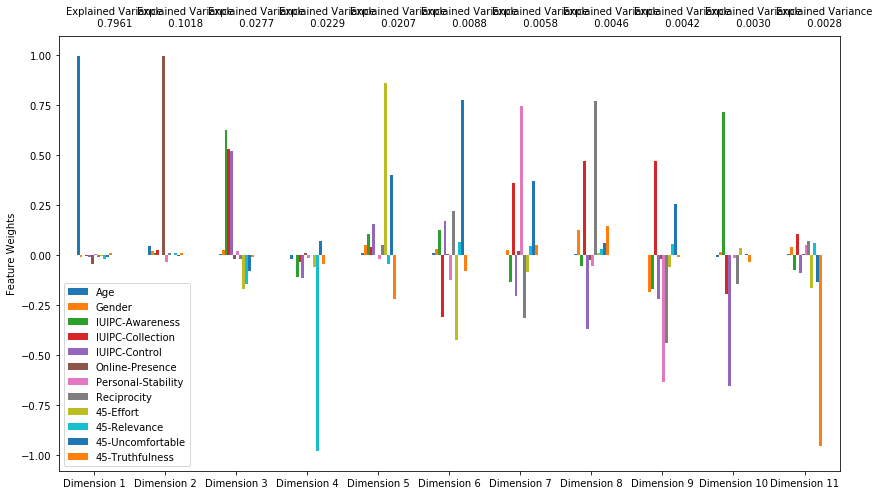

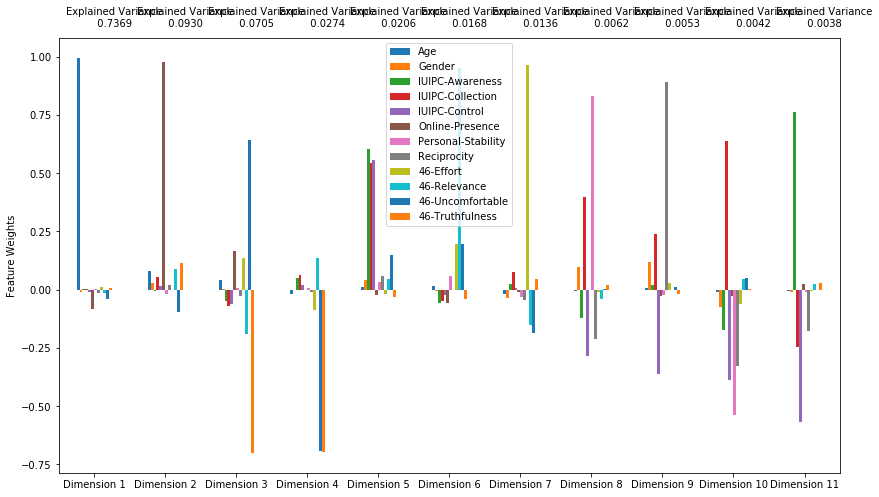

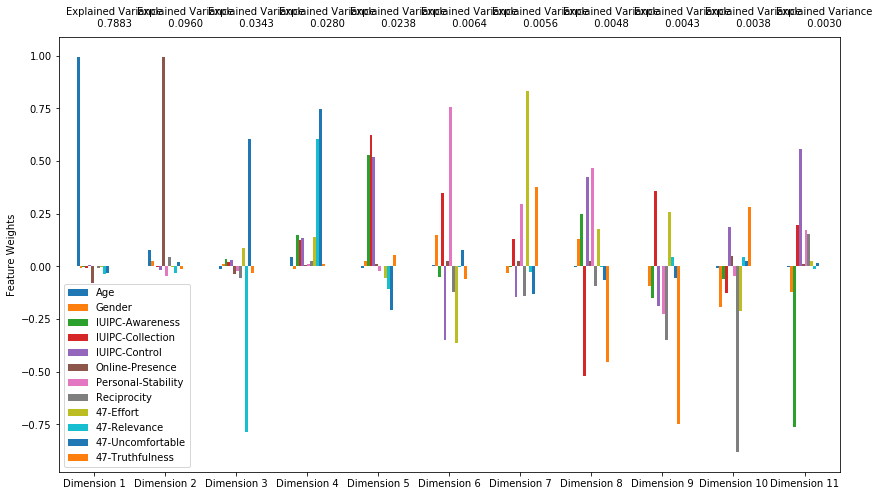

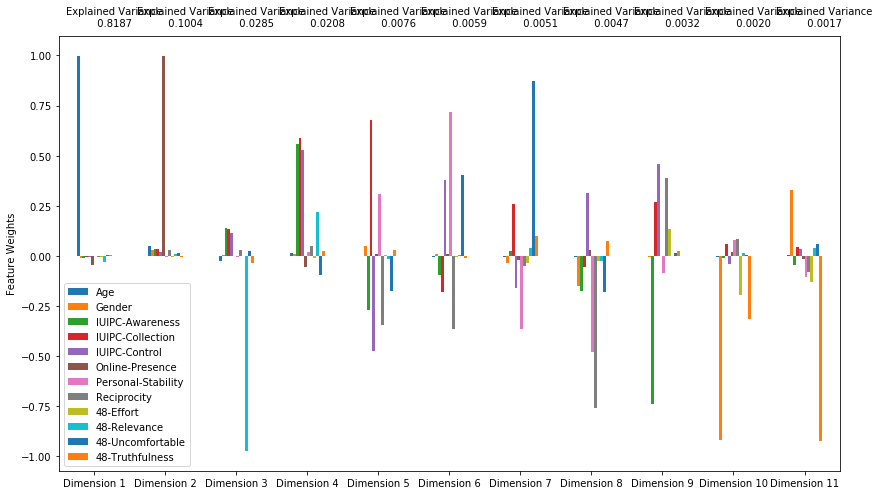

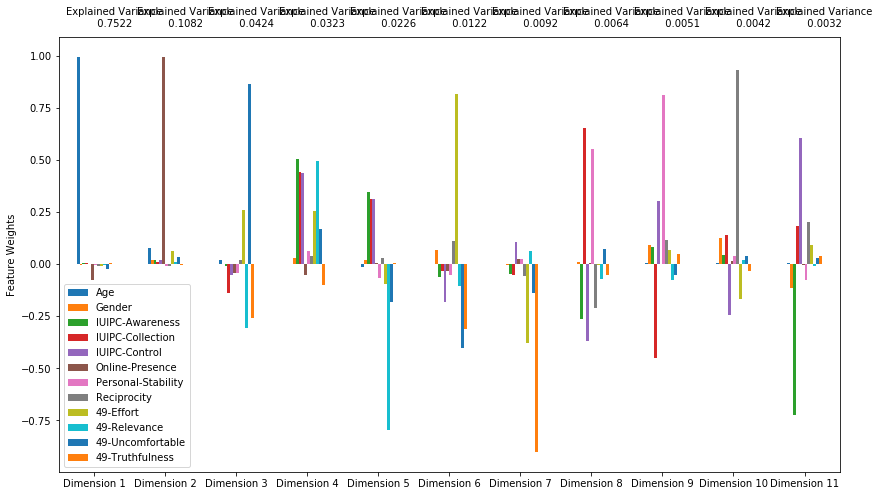

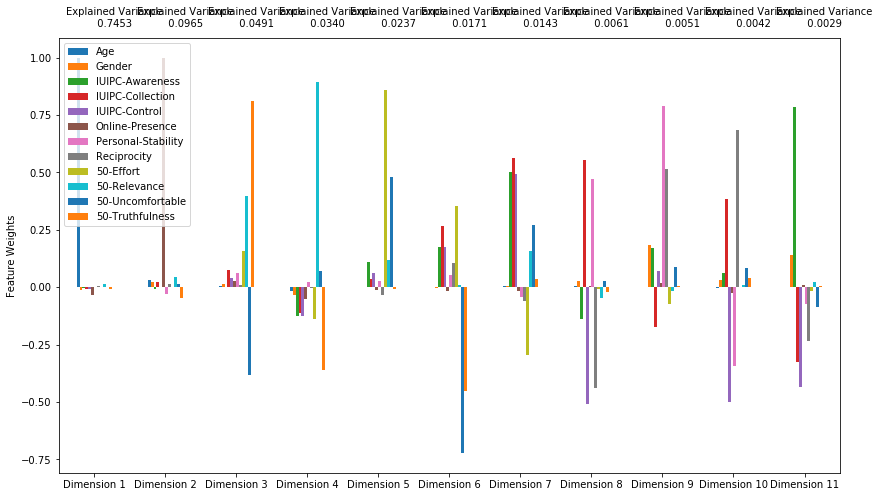

Explained Variance     Age  Gender  IUIPC-Awareness  \
Dimension 1               0.7518  0.9972 -0.0102           0.0153   
Dimension 2               0.0864  0.0610  0.0186           0.0215   
Dimension 3               0.0578  0.0232 -0.0020          -0.0995   
Dimension 4               0.0316 -0.0191  0.0313           0.6129   
Dimension 5               0.0259 -0.0208  0.0071           0.0279   
Dimension 6               0.0187 -0.0104 -0.0150          -0.0848   
Dimension 7               0.0098 -0.0108 -0.0106          -0.0817   
Dimension 8               0.0056  0.0003  0.0792          -0.1210   
Dimension 9               0.0042 -0.0114 -0.0927          -0.1577   
Dimension 10              0.0040 -0.0058 -0.0923           0.2048   
Dimension 11              0.0026 -0.0057  0.0299           0.7189   

              IUIPC-Collection  IUIPC-Control  Online-Presence  \
Dimension 1             0.0141         0.0066          -0.0580   
Dimension 2             0.0184         0.0083           0.9844   
Dimension 3            -0.1914        -0.0883          -0.1469   
Dimension 4             0.4861         0.5538          -0.0611   
Dimension 5             0.0404         0.0280           0.0066   
Dimension 6            -0.0031         0.0029          -0.0243   
Dimension 7            -0.1350        -0.0754           0.0117   
Dimension 8             0.4827        -0.3111           0.0085   
Dimension 9             0.4778        -0.2547          -0.0211   
Dimension 10           -0.4721         0.2522           0.0226   
Dimension 11           -0.1406        -0.6730          -0.0087   

              Personal-Stability  Reciprocity  01-Effort  01-Relevance  \
Dimension 1              -0.0026      -0.0081     0.0129        0.0199   
Dimension 2              -0.0289       0.0077     0.0242       -0.0266   
Dimension 3              -0.0383      -0.0282     0.1515       -0.0983   
Dimension 4               0.0092       0.0222     0.1851       -0.1041   
Dimension 5              -0.0036      -0.0257     0.1745        0.9770   
Dimension 6               0.0779       0.0071    -0.0347       -0.0436   
Dimension 7               0.0762       0.0318     0.9490       -0.1407   
Dimension 8               0.7090      -0.3705     0.0034       -0.0193   
Dimension 9              -0.6815      -0.4423     0.0947       -0.0402   
Dimension 10              0.0625      -0.8084    -0.0238       -0.0047   
Dimension 11             -0.0469       0.0497    -0.0123        0.0054   

              01-Uncomfortable  01-Truthfulness  
Dimension 1            -0.0286           0.0121  
Dimension 2             0.0859          -0.1280  
Dimension 3             0.6679          -0.6652  
Dimension 4             0.0804          -0.1556  
Dimension 5             0.0253          -0.0996  
Dimension 6            -0.7055          -0.6964  
Dimension 7            -0.1531           0.1357  
Dimension 8             0.0936          -0.0091  
Dimension 9            -0.0367          -0.0268  
Dimension 10           -0.0560           0.0365  
Dimension 11           -0.0572          -0.0365

Dimension 1     0.7518
Dimension 2     0.8382
Dimension 3     0.8960
Dimension 4     0.9276
Dimension 5     0.9535
Dimension 6     0.9722
Dimension 7     0.9820
Dimension 8     0.9876
Dimension 9     0.9918
Dimension 10    0.9958
Dimension 11    0.9984
Name: Explained Variance, dtype: float64

Explained Variance     Age  Gender  IUIPC-Awareness  \
Dimension 1               0.8096  0.9978 -0.0106           0.0058   
Dimension 2               0.0982  0.0618  0.0202           0.0076   
Dimension 3               0.0308 -0.0082  0.0334           0.5632   
Dimension 4               0.0242 -0.0093 -0.0251           0.2185   
Dimension 5               0.0123 -0.0091  0.0070          -0.0196   
Dimension 6               0.0061 -0.0074 -0.0102          -0.3081   
Dimension 7               0.0044 -0.0041  0.0460           0.2189   
Dimension 8               0.0041  0.0114  0.0238           0.0851   
Dimension 9               0.0033  0.0051  0.1714           0.4742   
Dimension 10              0.0029  0.0083  0.1685          -0.5065   
Dimension 11              0.0024 -0.0041  0.0180           0.0486   

              IUIPC-Collection  IUIPC-Control  Online-Presence  \
Dimension 1             0.0056         0.0048          -0.0618   
Dimension 2             0.0238         0.0028           0.9971   
Dimension 3             0.5420         0.5154          -0.0094   
Dimension 4             0.1377         0.2163          -0.0309   
Dimension 5            -0.2036         0.0680           0.0032   
Dimension 6             0.6027        -0.3020          -0.0080   
Dimension 7            -0.4236         0.1762           0.0127   
Dimension 8            -0.2262         0.0806           0.0003   
Dimension 9             0.1104        -0.6817          -0.0116   
Dimension 10            0.1805         0.2925          -0.0078   
Dimension 11           -0.0752        -0.0443           0.0134   

              Personal-Stability  Reciprocity  02-Effort  02-Relevance  \
Dimension 1               0.0026      -0.0143    -0.0003       -0.0032   
Dimension 2              -0.0064       0.0078     0.0042       -0.0269   
Dimension 3               0.0509       0.0320     0.0200        0.3403   
Dimension 4              -0.0449       0.0580     0.0283       -0.9234   
Dimension 5               0.0036       0.0622     0.1483        0.1543   
Dimension 6               0.5996      -0.2045    -0.0962       -0.0674   
Dimension 7               0.6131      -0.3787     0.4424       -0.0350   
Dimension 8               0.4963       0.7164    -0.3530        0.0025   
Dimension 9              -0.0319       0.2997     0.4141       -0.0014   
Dimension 10              0.0029       0.4300     0.5865        0.0004   
Dimension 11              0.1072       0.0358    -0.3129       -0.0010   

              02-Uncomfortable  02-Truthfulness  
Dimension 1             0.0120          -0.0061  
Dimension 2             0.0058           0.0109  
Dimension 3             0.0284          -0.0382  
Dimension 4             0.1598          -0.0228  
Dimension 5             0.9499          -0.0386  
Dimension 6             0.1833           0.0418  
Dimension 7            -0.1424          -0.0533  
Dimension 8            -0.0377           0.2212  
Dimension 9            -0.0061          -0.0794  
Dimension 10           -0.1230          -0.2299  
Dimension 11           -0.0040          -0.9375

Dimension 1     0.8096
Dimension 2     0.9078
Dimension 3     0.9386
Dimension 4     0.9628
Dimension 5     0.9751
Dimension 6     0.9812
Dimension 7     0.9856
Dimension 8     0.9897
Dimension 9     0.9930
Dimension 10    0.9959
Dimension 11    0.9983
Name: Explained Variance, dtype: float64

Explained Variance     Age  Gender  IUIPC-Awareness  \
Dimension 1               0.7588  0.9977 -0.0107           0.0077   
Dimension 2               0.0950  0.0632  0.0157          -0.0190   
Dimension 3               0.0480 -0.0043 -0.0070          -0.2340   
Dimension 4               0.0296 -0.0166 -0.0059           0.5365   
Dimension 5               0.0274 -0.0009  0.0091           0.2343   
Dimension 6               0.0158 -0.0055 -0.0021          -0.0849   
Dimension 7               0.0063  0.0120  0.0312           0.1702   
Dimension 8               0.0055 -0.0005  0.0863           0.1303   
Dimension 9               0.0048 -0.0066  0.0284          -0.1206   
Dimension 10              0.0041  0.0073  0.0821          -0.0174   
Dimension 11              0.0029 -0.0026 -0.0758           0.7295   

              IUIPC-Collection  IUIPC-Control  Online-Presence  \
Dimension 1             0.0107         0.0055          -0.0626   
Dimension 2             0.0061        -0.0304           0.9967   
Dimension 3            -0.2837        -0.1894          -0.0090   
Dimension 4             0.3678         0.4927           0.0242   
Dimension 5             0.2457         0.2082           0.0102   
Dimension 6             0.0039        -0.0825          -0.0097   
Dimension 7            -0.6502         0.3468           0.0062   
Dimension 8            -0.3981         0.1628           0.0340   
Dimension 9             0.1484        -0.1006           0.0057   
Dimension 10            0.2926        -0.3339          -0.0107   
Dimension 11           -0.1862        -0.6325          -0.0041   

              Personal-Stability  Reciprocity  03-Effort  03-Relevance  \
Dimension 1               0.0064      -0.0124     0.0036       -0.0100   
Dimension 2              -0.0294       0.0073    -0.0005       -0.0007   
Dimension 3              -0.0151      -0.0158     0.0824       -0.1611   
Dimension 4               0.0293       0.0468     0.0849       -0.5025   
Dimension 5               0.0540      -0.0019     0.0902        0.8301   
Dimension 6               0.0038       0.0488     0.1385       -0.1565   
Dimension 7              -0.2565       0.4414     0.3846        0.0801   
Dimension 8               0.8558      -0.0930    -0.2110        0.0025   
Dimension 9               0.2964      -0.2701     0.8725       -0.0313   
Dimension 10              0.3037       0.8325     0.0503       -0.0158   
Dimension 11             -0.0746      -0.1394     0.0456        0.0091   

              03-Uncomfortable  03-Truthfulness  
Dimension 1             0.0031          -0.0094  
Dimension 2            -0.0034          -0.0048  
Dimension 3             0.6809          -0.5761  
Dimension 4             0.1938          -0.1816  
Dimension 5             0.1294          -0.3526  
Dimension 6            -0.6843          -0.6867  
Dimension 7            -0.0648           0.0871  
Dimension 8            -0.0555          -0.0283  
Dimension 9             0.0236           0.1697  
Dimension 10            0.0760           0.0426  
Dimension 11           -0.0148          -0.0034

Dimension 1     0.7588
Dimension 2     0.8538
Dimension 3     0.9018
Dimension 4     0.9314
Dimension 5     0.9588
Dimension 6     0.9746
Dimension 7     0.9809
Dimension 8     0.9864
Dimension 9     0.9912
Dimension 10    0.9953
Dimension 11    0.9982
Name: Explained Variance, dtype: float64

Explained Variance     Age  Gender  IUIPC-Awareness  \
Dimension 1               0.7327  0.9991 -0.0045           0.0075   
Dimension 2               0.0961  0.0362  0.0164          -0.0034   
Dimension 3               0.0556 -0.0068 -0.0020           0.1135   
Dimension 4               0.0404 -0.0045  0.0164           0.6161   
Dimension 5               0.0248  0.0118 -0.0141          -0.0070   
Dimension 6               0.0215 -0.0022  0.0002          -0.1094   
Dimension 7               0.0077 -0.0093 -0.0247          -0.1802   
Dimension 8               0.0064 -0.0065  0.0351           0.0651   
Dimension 9               0.0056 -0.0089  0.0546           0.2010   
Dimension 10              0.0047  0.0002  0.1632          -0.0392   
Dimension 11              0.0028 -0.0049 -0.0684           0.7183   

              IUIPC-Collection  IUIPC-Control  Online-Presence  \
Dimension 1             0.0021        -0.0001          -0.0354   
Dimension 2             0.0074        -0.0141           0.9880   
Dimension 3             0.1433         0.0926           0.1256   
Dimension 4             0.5211         0.5326          -0.0164   
Dimension 5            -0.0625         0.0020           0.0626   
Dimension 6            -0.0246        -0.0962           0.0073   
Dimension 7             0.5823        -0.3723           0.0034   
Dimension 8            -0.3190         0.1984          -0.0172   
Dimension 9            -0.4693         0.2005           0.0436   
Dimension 10            0.1269        -0.1973          -0.0058   
Dimension 11           -0.1612        -0.6624          -0.0085   

              Personal-Stability  Reciprocity  04-Effort  04-Relevance  \
Dimension 1               0.0141      -0.0040    -0.0071        0.0062   
Dimension 2              -0.0342       0.0021    -0.0840        0.0068   
Dimension 3               0.0198       0.0316     0.1445        0.1338   
Dimension 4               0.0214       0.0475     0.0182        0.0035   
Dimension 5              -0.0409       0.0379     0.9751        0.0577   
Dimension 6              -0.0520      -0.0380     0.0971        0.0544   
Dimension 7               0.5495      -0.3405     0.0418        0.2498   
Dimension 8               0.0701      -0.0058    -0.0863        0.9119   
Dimension 9               0.7748      -0.0967     0.0364       -0.2743   
Dimension 10              0.2641       0.9167    -0.0202        0.0643   
Dimension 11             -0.0977      -0.0526    -0.0083        0.0456   

              04-Uncomfortable  04-Truthfulness  
Dimension 1            -0.0083           0.0080  
Dimension 2             0.0500          -0.1060  
Dimension 3            -0.3905           0.8658  
Dimension 4            -0.0390          -0.2450  
Dimension 5             0.1570          -0.0993  
Dimension 6            -0.8960          -0.3985  
Dimension 7             0.0695          -0.0479  
Dimension 8             0.0559          -0.0771  
Dimension 9            -0.0889           0.0056  
Dimension 10           -0.0103          -0.0443  
Dimension 11           -0.0031           0.0015

Dimension 1     0.7327
Dimension 2     0.8288
Dimension 3     0.8844
Dimension 4     0.9248
Dimension 5     0.9496
Dimension 6     0.9711
Dimension 7     0.9788
Dimension 8     0.9852
Dimension 9     0.9908
Dimension 10    0.9955
Dimension 11    0.9983
Name: Explained Variance, dtype: float64

Explained Variance     Age  Gender  IUIPC-Awareness  \
Dimension 1               0.7876  0.9993 -0.0048          -0.0035   
Dimension 2               0.1067  0.0279  0.0224          -0.0350   
Dimension 3               0.0359  0.0137  0.0176           0.6306   
Dimension 4               0.0281 -0.0107 -0.0368           0.0964   
Dimension 5               0.0124  0.0105  0.0174           0.0362   
Dimension 6               0.0062 -0.0017 -0.0941           0.0951   
Dimension 7               0.0059 -0.0007  0.0015           0.0621   
Dimension 8               0.0047 -0.0017  0.0879           0.1807   
Dimension 9               0.0043 -0.0025 -0.0990           0.0106   
Dimension 10              0.0040  0.0087 -0.0211          -0.0032   
Dimension 11              0.0025  0.0036 -0.0828          -0.7342   

              IUIPC-Collection  IUIPC-Control  Online-Presence  \
Dimension 1            -0.0077        -0.0068          -0.0272   
Dimension 2            -0.0262        -0.0402           0.9901   
Dimension 3             0.5492         0.5326           0.0499   
Dimension 4            -0.0590         0.0782           0.1238   
Dimension 5            -0.2277         0.1033           0.0160   
Dimension 6            -0.6049         0.5350          -0.0094   
Dimension 7            -0.1082        -0.0558          -0.0039   
Dimension 8            -0.4406         0.2197           0.0029   
Dimension 9             0.0602        -0.0498           0.0141   
Dimension 10           -0.0006        -0.0987           0.0039   
Dimension 11            0.2588         0.5862           0.0140   

              Personal-Stability  Reciprocity  05-Effort  05-Relevance  \
Dimension 1              -0.0023      -0.0076    -0.0056       -0.0167   
Dimension 2              -0.0097      -0.0042    -0.0212        0.1126   
Dimension 3               0.0214       0.0454     0.0495        0.0893   
Dimension 4              -0.0597       0.0586     0.0787       -0.9575   
Dimension 5               0.0612       0.0268     0.1701        0.2088   
Dimension 6              -0.4533      -0.0578     0.1163        0.0728   
Dimension 7              -0.1801       0.0435     0.4360        0.0909   
Dimension 8               0.7877       0.0247    -0.1905       -0.0195   
Dimension 9               0.2452      -0.7595     0.5519       -0.0413   
Dimension 10              0.2169       0.6362     0.6351        0.0230   
Dimension 11              0.1443       0.0435     0.0621       -0.0281   

              05-Uncomfortable  05-Truthfulness  
Dimension 1            -0.0071          -0.0018  
Dimension 2            -0.0369           0.0147  
Dimension 3             0.0116          -0.0313  
Dimension 4             0.1594          -0.0945  
Dimension 5             0.9074          -0.1874  
Dimension 6            -0.1641           0.2745  
Dimension 7            -0.2838          -0.8174  
Dimension 8            -0.1898          -0.1530  
Dimension 9            -0.0247           0.1999  
Dimension 10           -0.0722           0.3590  
Dimension 11           -0.0132          -0.1251

Dimension 1     0.7876
Dimension 2     0.8943
Dimension 3     0.9302
Dimension 4     0.9583
Dimension 5     0.9707
Dimension 6     0.9769
Dimension 7     0.9828
Dimension 8     0.9875
Dimension 9     0.9918
Dimension 10    0.9958
Dimension 11    0.9983
Name: Explained Variance, dtype: float64

Explained Variance     Age  Gender  IUIPC-Awareness  \
Dimension 1               0.7681  0.9981 -0.0084          -0.0040   
Dimension 2               0.0976  0.0562  0.0302          -0.0120   
Dimension 3               0.0379 -0.0027 -0.0049           0.4386   
Dimension 4               0.0316 -0.0063  0.0005           0.1961   
Dimension 5               0.0289  0.0150 -0.0037           0.3952   
Dimension 6               0.0108 -0.0131 -0.0335           0.0222   
Dimension 7               0.0063  0.0013 -0.0310           0.2470   
Dimension 8               0.0055  0.0018  0.0267          -0.0774   
Dimension 9               0.0050 -0.0041  0.1163           0.0883   
Dimension 10              0.0042 -0.0114 -0.1285          -0.0683   
Dimension 11              0.0026  0.0011 -0.0307           0.7298   

              IUIPC-Collection  IUIPC-Control  Online-Presence  \
Dimension 1            -0.0034        -0.0005          -0.0542   
Dimension 2             0.0018        -0.0033           0.9943   
Dimension 3             0.5014         0.3761           0.0500   
Dimension 4             0.1102         0.1595           0.0137   
Dimension 5             0.2485         0.3604          -0.0548   
Dimension 6            -0.0376        -0.0319           0.0313   
Dimension 7            -0.7235         0.4614           0.0057   
Dimension 8            -0.0053        -0.0883           0.0055   
Dimension 9            -0.3290         0.2116           0.0211   
Dimension 10           -0.0799         0.1718           0.0118   
Dimension 11           -0.1878        -0.6381           0.0089   

              Personal-Stability  Reciprocity  06-Effort  06-Relevance  \
Dimension 1               0.0049      -0.0110    -0.0013       -0.0074   
Dimension 2              -0.0206       0.0047     0.0100        0.0040   
Dimension 3               0.0627       0.0254    -0.0391        0.2720   
Dimension 4              -0.0517       0.0657    -0.0094       -0.9519   
Dimension 5               0.0406       0.0164     0.1726        0.0847   
Dimension 6              -0.0582      -0.0707     0.1434        0.0140   
Dimension 7              -0.3347       0.1622     0.1801        0.0859   
Dimension 8               0.4855       0.4155     0.7487       -0.0254   
Dimension 9               0.7726       0.0022    -0.4635       -0.0220   
Dimension 10              0.1810      -0.8706     0.3608       -0.0614   
Dimension 11              0.0462      -0.1290     0.0344        0.0112   

              06-Uncomfortable  06-Truthfulness  
Dimension 1            -0.0230          -0.0040  
Dimension 2             0.0802          -0.0067  
Dimension 3            -0.5200           0.2486  
Dimension 4            -0.0981           0.0287  
Dimension 5             0.6922          -0.3618  
Dimension 6            -0.4649          -0.8657  
Dimension 7            -0.1000           0.1164  
Dimension 8            -0.0774           0.0992  
Dimension 9            -0.0251          -0.1107  
Dimension 10           -0.0248           0.1320  
Dimension 11            0.0063           0.0618

Dimension 1     0.7681
Dimension 2     0.8657
Dimension 3     0.9036
Dimension 4     0.9352
Dimension 5     0.9641
Dimension 6     0.9749
Dimension 7     0.9812
Dimension 8     0.9867
Dimension 9     0.9917
Dimension 10    0.9959
Dimension 11    0.9985
Name: Explained Variance, dtype: float64

Explained Variance     Age  Gender  IUIPC-Awareness  \
Dimension 1               0.7331  0.9974 -0.0099           0.0013   
Dimension 2               0.1091  0.0558  0.0314           0.0106   
Dimension 3               0.0517  0.0377 -0.0058          -0.1059   
Dimension 4               0.0333  0.0030  0.0160           0.6319   
Dimension 5               0.0276 -0.0130  0.0173          -0.0497   
Dimension 6               0.0181 -0.0075  0.0157           0.0047   
Dimension 7               0.0090 -0.0077 -0.0442          -0.0816   
Dimension 8               0.0053 -0.0107 -0.0083          -0.2239   
Dimension 9               0.0043 -0.0030 -0.0354           0.0588   
Dimension 10              0.0038 -0.0094 -0.1151          -0.1979   
Dimension 11              0.0030 -0.0081 -0.1793           0.6924   

              IUIPC-Collection  IUIPC-Control  Online-Presence  \
Dimension 1             0.0108        -0.0060          -0.0484   
Dimension 2             0.0255         0.0151           0.9818   
Dimension 3            -0.1943        -0.0834          -0.1608   
Dimension 4             0.4784         0.5545          -0.0687   
Dimension 5            -0.0476        -0.0130          -0.0098   
Dimension 6             0.1095        -0.0357           0.0012   
Dimension 7             0.0513        -0.1006          -0.0225   
Dimension 8             0.7261        -0.4242          -0.0153   
Dimension 9            -0.3903         0.2212           0.0228   
Dimension 10            0.0316         0.2946           0.0251   
Dimension 11           -0.1819        -0.5925           0.0233   

              Personal-Stability  Reciprocity  07-Effort  07-Relevance  \
Dimension 1               0.0004      -0.0136     0.0029        0.0247   
Dimension 2              -0.0001       0.0291     0.0395       -0.0440   
Dimension 3              -0.0413      -0.0128     0.0731       -0.3160   
Dimension 4               0.0541       0.0296     0.1109       -0.0098   
Dimension 5              -0.0268       0.0015     0.1072        0.9271   
Dimension 6              -0.0531       0.0197    -0.1476       -0.1646   
Dimension 7              -0.0299       0.1061     0.9631       -0.0982   
Dimension 8               0.3442      -0.3258    -0.0326        0.0132   
Dimension 9               0.7491      -0.4552     0.1012       -0.0132   
Dimension 10             -0.5318      -0.7553     0.0683       -0.0153   
Dimension 11             -0.1570      -0.2790     0.0244        0.0205   

              07-Uncomfortable  07-Truthfulness  
Dimension 1            -0.0358           0.0212  
Dimension 2             0.1161          -0.1148  
Dimension 3             0.6350          -0.6375  
Dimension 4             0.1559          -0.1372  
Dimension 5             0.0782          -0.3417  
Dimension 6            -0.7032          -0.6631  
Dimension 7            -0.1691           0.0071  
Dimension 8             0.1260          -0.0259  
Dimension 9            -0.1084          -0.0546  
Dimension 10           -0.0242           0.0199  
Dimension 11           -0.0123           0.0094

Dimension 1     0.7331
Dimension 2     0.8422
Dimension 3     0.8939
Dimension 4     0.9272
Dimension 5     0.9548
Dimension 6     0.9729
Dimension 7     0.9819
Dimension 8     0.9872
Dimension 9     0.9915
Dimension 10    0.9953
Dimension 11    0.9983
Name: Explained Variance, dtype: float64

Explained Variance     Age  Gender  IUIPC-Awareness  \
Dimension 1               0.7562  0.9992 -0.0081           0.0023   
Dimension 2               0.0953 -0.0074  0.0338           0.0241   
Dimension 3               0.0481 -0.0022  0.0091           0.0763   
Dimension 4               0.0302 -0.0153  0.0030           0.5676   
Dimension 5               0.0220 -0.0156 -0.0201          -0.2450   
Dimension 6               0.0178 -0.0277  0.0216          -0.1576   
Dimension 7               0.0131  0.0106 -0.0034          -0.0363   
Dimension 8               0.0055  0.0041 -0.0588           0.1301   
Dimension 9               0.0041  0.0058  0.0393           0.0859   
Dimension 10              0.0034 -0.0095 -0.1751          -0.1774   
Dimension 11              0.0028 -0.0043  0.0721           0.7226   

              IUIPC-Collection  IUIPC-Control  Online-Presence  \
Dimension 1             0.0053        -0.0039           0.0081   
Dimension 2             0.0090         0.0231           0.9892   
Dimension 3             0.1237         0.0727           0.1268   
Dimension 4             0.5005         0.4730          -0.0511   
Dimension 5            -0.1429        -0.1813          -0.0047   
Dimension 6            -0.0969        -0.1871           0.0357   
Dimension 7             0.0458         0.0526           0.0054   
Dimension 8            -0.5899         0.4057          -0.0026   
Dimension 9            -0.4716         0.3613          -0.0077   
Dimension 10           -0.1187         0.3956           0.0149   
Dimension 11           -0.3427        -0.4849           0.0012   

              Personal-Stability  Reciprocity  08-Effort  08-Relevance  \
Dimension 1              -0.0038      -0.0100     0.0130        0.0219   
Dimension 2              -0.0014       0.0104    -0.0003       -0.0262   
Dimension 3               0.0499       0.0169    -0.1340        0.0482   
Dimension 4               0.0065       0.0218    -0.0101        0.2390   
Dimension 5              -0.0141      -0.0412    -0.5013        0.0600   
Dimension 6               0.0370      -0.0289     0.4648        0.8318   
Dimension 7              -0.0246      -0.0748    -0.7091        0.4848   
Dimension 8              -0.4982       0.4562    -0.0125        0.0868   
Dimension 9               0.7931      -0.0876    -0.0245        0.0160   
Dimension 10             -0.3088      -0.8129     0.0889       -0.0251   
Dimension 11             -0.1019      -0.3254    -0.0554        0.0085   

              08-Uncomfortable  08-Truthfulness  
Dimension 1            -0.0241          -0.0106  
Dimension 2             0.0440          -0.1278  
Dimension 3            -0.4469           0.8571  
Dimension 4            -0.2368          -0.2947  
Dimension 5            -0.6944          -0.3835  
Dimension 6            -0.1343          -0.0075  
Dimension 7             0.4873           0.1104  
Dimension 8            -0.0455           0.0296  
Dimension 9            -0.0080          -0.0229  
Dimension 10           -0.0385           0.0283  
Dimension 11           -0.0104           0.0230

Dimension 1     0.7562
Dimension 2     0.8515
Dimension 3     0.8996
Dimension 4     0.9298
Dimension 5     0.9518
Dimension 6     0.9696
Dimension 7     0.9827
Dimension 8     0.9882
Dimension 9     0.9923
Dimension 10    0.9957
Dimension 11    0.9985
Name: Explained Variance, dtype: float64

Explained Variance     Age  Gender  IUIPC-Awareness  \
Dimension 1               0.7459  0.9986 -0.0085          -0.0014   
Dimension 2               0.1129  0.0506  0.0238           0.0269   
Dimension 3               0.0535  0.0036 -0.0076          -0.0690   
Dimension 4               0.0285 -0.0020  0.0093           0.5979   
Dimension 5               0.0210 -0.0000 -0.0135          -0.0847   
Dimension 6               0.0109  0.0011 -0.0007          -0.1114   
Dimension 7               0.0071  0.0026  0.0444          -0.0989   
Dimension 8               0.0065  0.0116  0.0045           0.3058   
Dimension 9               0.0052 -0.0015  0.0861           0.1310   
Dimension 10              0.0039  0.0100  0.2077          -0.1207   
Dimension 11              0.0028 -0.0002 -0.1225          -0.6901   

              IUIPC-Collection  IUIPC-Control  Online-Presence  \
Dimension 1             0.0057        -0.0024          -0.0502   
Dimension 2             0.0431         0.0262           0.9946   
Dimension 3            -0.1702        -0.0669           0.0493   
Dimension 4             0.4577         0.5587          -0.0379   
Dimension 5             0.0278        -0.1009           0.0047   
Dimension 6            -0.2198        -0.0964           0.0509   
Dimension 7            -0.0853        -0.0641          -0.0105   
Dimension 8            -0.7033         0.3079          -0.0084   
Dimension 9            -0.4257         0.2086           0.0177   
Dimension 10            0.1609        -0.0898          -0.0306   
Dimension 11            0.0379         0.7111           0.0009   

              Personal-Stability  Reciprocity  09-Effort  09-Relevance  \
Dimension 1               0.0041      -0.0141     0.0026       -0.0004   
Dimension 2              -0.0136       0.0302    -0.0489        0.0053   
Dimension 3              -0.0083       0.0143     0.2211       -0.0443   
Dimension 4               0.0149       0.0504     0.2477        0.1846   
Dimension 5               0.0228      -0.0186     0.0727       -0.0289   
Dimension 6               0.0596       0.0389     0.9031        0.1827   
Dimension 7              -0.2407       0.0370    -0.1937        0.9354   
Dimension 8              -0.3849       0.3589    -0.0762       -0.1387   
Dimension 9               0.8018      -0.2394    -0.1401        0.1707   
Dimension 10              0.3557       0.8816    -0.0466        0.0317   
Dimension 11             -0.0296       0.0130     0.0074       -0.0221   

              09-Uncomfortable  09-Truthfulness  
Dimension 1            -0.0001           0.0013  
Dimension 2            -0.0248           0.0153  
Dimension 3             0.7512          -0.5864  
Dimension 4             0.0387          -0.1403  
Dimension 5            -0.6280          -0.7618  
Dimension 6            -0.1526           0.2235  
Dimension 7             0.0240          -0.0663  
Dimension 8            -0.1193          -0.0246  
Dimension 9            -0.0241          -0.0293  
Dimension 10            0.0199          -0.0055  
Dimension 11           -0.0045          -0.0098

Dimension 1     0.7459
Dimension 2     0.8588
Dimension 3     0.9123
Dimension 4     0.9408
Dimension 5     0.9618
Dimension 6     0.9727
Dimension 7     0.9798
Dimension 8     0.9863
Dimension 9     0.9915
Dimension 10    0.9954
Dimension 11    0.9982
Name: Explained Variance, dtype: float64

Explained Variance     Age  Gender  IUIPC-Awareness  \
Dimension 1               0.7386  0.9989 -0.0076           0.0092   
Dimension 2               0.0963  0.0333  0.0169           0.0099   
Dimension 3               0.0569  0.0237  0.0008          -0.1041   
Dimension 4               0.0363 -0.0062  0.0199           0.6277   
Dimension 5               0.0199 -0.0087  0.0062           0.0215   
Dimension 6               0.0191  0.0060  0.0126          -0.0815   
Dimension 7               0.0145 -0.0119 -0.0172           0.0301   
Dimension 8               0.0059  0.0035  0.0022           0.1799   
Dimension 9               0.0047  0.0019  0.0559           0.1171   
Dimension 10              0.0036  0.0132  0.1940          -0.1000   
Dimension 11              0.0026 -0.0031 -0.1948           0.7138   

              IUIPC-Collection  IUIPC-Control  Online-Presence  \
Dimension 1             0.0073         0.0055          -0.0340   
Dimension 2             0.0187        -0.0145           0.9981   
Dimension 3            -0.1281        -0.0977           0.0259   
Dimension 4             0.4849         0.5498           0.0017   
Dimension 5             0.0583        -0.0298          -0.0159   
Dimension 6            -0.1193        -0.0790           0.0210   
Dimension 7            -0.0114         0.0850          -0.0085   
Dimension 8            -0.7300         0.4647           0.0090   
Dimension 9            -0.3709         0.1438           0.0184   
Dimension 10            0.1530        -0.1098          -0.0151   
Dimension 11           -0.1830        -0.6397          -0.0115   

              Personal-Stability  Reciprocity  10-Effort  10-Relevance  \
Dimension 1              -0.0016      -0.0130    -0.0003        0.0013   
Dimension 2              -0.0149       0.0087    -0.0145       -0.0053   
Dimension 3              -0.0269      -0.0014     0.1728       -0.2209   
Dimension 4               0.0492       0.0506     0.0994        0.0826   
Dimension 5               0.0287      -0.0281    -0.2440        0.4881   
Dimension 6               0.0635       0.0289     0.6272        0.7185   
Dimension 7              -0.0994      -0.0196     0.7050       -0.4176   
Dimension 8              -0.3839       0.2379    -0.0990        0.0670   
Dimension 9               0.9008      -0.0346    -0.0010       -0.0925   
Dimension 10              0.1112       0.9489     0.0081       -0.0413   
Dimension 11             -0.0537       0.0753     0.0124       -0.0246   

              10-Uncomfortable  10-Truthfulness  
Dimension 1            -0.0240           0.0060  
Dimension 2            -0.0337           0.0018  
Dimension 3             0.6693          -0.6593  
Dimension 4             0.2033          -0.0723  
Dimension 5            -0.4533          -0.7000  
Dimension 6             0.1830           0.1558  
Dimension 7            -0.5152          -0.2101  
Dimension 8            -0.0187          -0.0072  
Dimension 9            -0.0519          -0.0255  
Dimension 10           -0.0366          -0.0252  
Dimension 11           -0.0148           0.0154

Dimension 1     0.7386
Dimension 2     0.8349
Dimension 3     0.8918
Dimension 4     0.9281
Dimension 5     0.9480
Dimension 6     0.9671
Dimension 7     0.9816
Dimension 8     0.9875
Dimension 9     0.9922
Dimension 10    0.9958
Dimension 11    0.9984
Name: Explained Variance, dtype: float64

Explained Variance     Age  Gender  IUIPC-Awareness  \
Dimension 1               0.7432  0.9945 -0.0082           0.0094   
Dimension 2               0.0846  0.0938  0.0034           0.0290   
Dimension 3               0.0631  0.0190 -0.0014          -0.0315   
Dimension 4               0.0379 -0.0236  0.0202           0.6203   
Dimension 5               0.0232 -0.0023  0.0132           0.0255   
Dimension 6               0.0162 -0.0213  0.0290          -0.1063   
Dimension 7               0.0124 -0.0224 -0.0086          -0.0579   
Dimension 8               0.0061  0.0093 -0.0624           0.2638   
Dimension 9               0.0046  0.0085  0.0554           0.2063   
Dimension 10              0.0038 -0.0115 -0.1616           0.2453   
Dimension 11              0.0033  0.0030  0.0149          -0.6509   

              IUIPC-Collection  IUIPC-Control  Online-Presence  \
Dimension 1             0.0172        -0.0013          -0.0939   
Dimension 2             0.0276         0.0261           0.9855   
Dimension 3            -0.1008        -0.0386          -0.0934   
Dimension 4             0.4830         0.5456          -0.0572   
Dimension 5             0.1176         0.0199          -0.0511   
Dimension 6            -0.1547        -0.1446          -0.0020   
Dimension 7            -0.0181        -0.0696          -0.0597   
Dimension 8            -0.7480         0.4248          -0.0149   
Dimension 9            -0.3885         0.0469           0.0344   
Dimension 10           -0.0526        -0.1400           0.0195   
Dimension 11            0.0491         0.6866           0.0083   

              Personal-Stability  Reciprocity  11-Effort  11-Relevance  \
Dimension 1               0.0019      -0.0094     0.0142        0.0275   
Dimension 2              -0.0301       0.0267    -0.0117        0.0584   
Dimension 3              -0.0313      -0.0055     0.1545       -0.0999   
Dimension 4               0.0605       0.0529     0.2228        0.1373   
Dimension 5              -0.0320      -0.0259    -0.4492       -0.0447   
Dimension 6              -0.0234       0.0270     0.7937        0.2951   
Dimension 7               0.1103       0.0324    -0.2874        0.9290   
Dimension 8              -0.3989       0.1110    -0.0924        0.0573   
Dimension 9               0.8855      -0.0601    -0.0178       -0.0887   
Dimension 10             -0.1201      -0.9343     0.0170        0.0549   
Dimension 11              0.1178      -0.2923     0.0443        0.0229   

              11-Uncomfortable  11-Truthfulness  
Dimension 1            -0.0209           0.0162  
Dimension 2             0.0375          -0.1058  
Dimension 3             0.6305          -0.7388  
Dimension 4             0.0287          -0.0648  
Dimension 5            -0.6196          -0.6269  
Dimension 6            -0.4271          -0.2047  
Dimension 7             0.1654          -0.0340  
Dimension 8            -0.0532           0.0143  
Dimension 9            -0.0527          -0.0362  
Dimension 10            0.0052           0.0142  
Dimension 11           -0.0058          -0.0174

Dimension 1     0.7432
Dimension 2     0.8278
Dimension 3     0.8909
Dimension 4     0.9288
Dimension 5     0.9520
Dimension 6     0.9682
Dimension 7     0.9806
Dimension 8     0.9867
Dimension 9     0.9913
Dimension 10    0.9951
Dimension 11    0.9984
Name: Explained Variance, dtype: float64

Explained Variance     Age  Gender  IUIPC-Awareness  \
Dimension 1               0.7688  0.9993 -0.0050           0.0108   
Dimension 2               0.0916 -0.0003  0.0358          -0.0249   
Dimension 3               0.0454  0.0016  0.0114           0.2208   
Dimension 4               0.0287  0.0072  0.0024           0.1201   
Dimension 5               0.0262 -0.0270  0.0204           0.5364   
Dimension 6               0.0165 -0.0189 -0.0411          -0.1995   
Dimension 7               0.0053  0.0045 -0.0046           0.1970   
Dimension 8               0.0051 -0.0100  0.0977          -0.0156   
Dimension 9               0.0045 -0.0010  0.1069           0.1479   
Dimension 10              0.0036  0.0095  0.0915          -0.2422   
Dimension 11              0.0028 -0.0010 -0.1407          -0.6902   

              IUIPC-Collection  IUIPC-Control  Online-Presence  \
Dimension 1             0.0077         0.0106           0.0001   
Dimension 2            -0.0102        -0.0251           0.9948   
Dimension 3             0.1970         0.1677           0.0484   
Dimension 4             0.0706         0.0975           0.0417   
Dimension 5             0.4620         0.5278           0.0044   
Dimension 6            -0.0047        -0.1784          -0.0218   
Dimension 7            -0.5510         0.2809          -0.0402   
Dimension 8            -0.2903         0.0392          -0.0145   
Dimension 9            -0.5170         0.2729           0.0440   
Dimension 10            0.2827        -0.0959          -0.0231   
Dimension 11            0.0666         0.6956           0.0092   

              Personal-Stability  Reciprocity  12-Effort  12-Relevance  \
Dimension 1               0.0069      -0.0088    -0.0071        0.0102   
Dimension 2              -0.0484       0.0296    -0.0342        0.0299   
Dimension 3               0.0449       0.0266    -0.0572        0.1446   
Dimension 4               0.0314       0.0342     0.9740        0.0281   
Dimension 5               0.0669       0.0455    -0.1266        0.0810   
Dimension 6               0.0050       0.0518     0.1693        0.0522   
Dimension 7              -0.5944       0.4521    -0.0025        0.1232   
Dimension 8               0.3898      -0.0855    -0.0194        0.8573   
Dimension 9               0.6240       0.0714    -0.0052       -0.4632   
Dimension 10              0.2706       0.8687    -0.0356        0.0410   
Dimension 11             -0.0444      -0.1095     0.0134        0.0067   

              12-Uncomfortable  12-Truthfulness  
Dimension 1            -0.0208          -0.0188  
Dimension 2            -0.0037          -0.0499  
Dimension 3            -0.3377           0.8607  
Dimension 4             0.1270           0.0388  
Dimension 5            -0.1176          -0.4197  
Dimension 6            -0.9061          -0.2661  
Dimension 7            -0.0639          -0.0057  
Dimension 8             0.0591          -0.0774  
Dimension 9            -0.1158           0.0207  
Dimension 10            0.1110           0.0095  
Dimension 11            0.0067           0.0357

Dimension 1     0.7688
Dimension 2     0.8604
Dimension 3     0.9058
Dimension 4     0.9345
Dimension 5     0.9607
Dimension 6     0.9772
Dimension 7     0.9825
Dimension 8     0.9876
Dimension 9     0.9921
Dimension 10    0.9957
Dimension 11    0.9985
Name: Explained Variance, dtype: float64

Explained Variance     Age  Gender  IUIPC-Awareness  \
Dimension 1               0.7207  0.9983 -0.0088           0.0020   
Dimension 2               0.1089  0.0206  0.0341          -0.0048   
Dimension 3               0.0526  0.0046  0.0052           0.0383   
Dimension 4               0.0336  0.0359  0.0003           0.4280   
Dimension 5               0.0296 -0.0372 -0.0005           0.4279   
Dimension 6               0.0228  0.0062 -0.0052          -0.0724   
Dimension 7               0.0129 -0.0020  0.0047          -0.1355   
Dimension 8               0.0065  0.0043 -0.0307           0.1374   
Dimension 9               0.0041 -0.0075 -0.0697           0.2160   
Dimension 10              0.0040 -0.0066 -0.1410          -0.1015   
Dimension 11              0.0027 -0.0001  0.1833           0.7181   

              IUIPC-Collection  IUIPC-Control  Online-Presence  \
Dimension 1             0.0038        -0.0024          -0.0187   
Dimension 2            -0.0231        -0.0038           0.9758   
Dimension 3             0.1120         0.0450           0.2062   
Dimension 4             0.3445         0.3988          -0.0302   
Dimension 5             0.4106         0.3589           0.0136   
Dimension 6            -0.0568        -0.0421          -0.0457   
Dimension 7            -0.0761        -0.1136          -0.0034   
Dimension 8            -0.5354         0.3549          -0.0181   
Dimension 9            -0.4927         0.3187           0.0157   
Dimension 10            0.3630        -0.1841          -0.0016   
Dimension 11           -0.1683        -0.6459          -0.0075   

              Personal-Stability  Reciprocity  13-Effort  13-Relevance  \
Dimension 1              -0.0005      -0.0104     0.0070        0.0443   
Dimension 2              -0.0229       0.0219     0.0279       -0.0677   
Dimension 3               0.0177      -0.0268    -0.1831        0.0727   
Dimension 4               0.0148       0.0627     0.0915       -0.6294   
Dimension 5               0.0036       0.0437     0.1422        0.4752   
Dimension 6              -0.0096      -0.0156    -0.2827       -0.5781   
Dimension 7               0.0095       0.0965     0.9188       -0.1699   
Dimension 8              -0.6155       0.4266    -0.0274        0.0424   
Dimension 9               0.1376      -0.7575     0.0981        0.0042   
Dimension 10             -0.7650      -0.4632     0.0509       -0.0332   
Dimension 11             -0.0626       0.0152    -0.0002       -0.0168   

              13-Uncomfortable  13-Truthfulness  
Dimension 1            -0.0213          -0.0172  
Dimension 2             0.0886          -0.1774  
Dimension 3            -0.5007           0.8067  
Dimension 4             0.3058           0.1862  
Dimension 5            -0.3851          -0.3488  
Dimension 6            -0.6490          -0.3898  
Dimension 7            -0.2715           0.0825  
Dimension 8            -0.0431           0.0436  
Dimension 9            -0.0371           0.0075  
Dimension 10            0.0242          -0.0030  
Dimension 11           -0.0193           0.0174

Dimension 1     0.7207
Dimension 2     0.8296
Dimension 3     0.8822
Dimension 4     0.9158
Dimension 5     0.9454
Dimension 6     0.9682
Dimension 7     0.9811
Dimension 8     0.9876
Dimension 9     0.9917
Dimension 10    0.9957
Dimension 11    0.9984
Name: Explained Variance, dtype: float64

Explained Variance     Age  Gender  IUIPC-Awareness  \
Dimension 1               0.7329  0.9990 -0.0027           0.0047   
Dimension 2               0.1055  0.0310  0.0284           0.0230   
Dimension 3               0.0655  0.0023  0.0022          -0.0494   
Dimension 4               0.0287 -0.0111  0.0421           0.6019   
Dimension 5               0.0234 -0.0279 -0.0130          -0.1779   
Dimension 6               0.0147 -0.0097 -0.0096          -0.0350   
Dimension 7               0.0102 -0.0016  0.0045          -0.0234   
Dimension 8               0.0064 -0.0063 -0.0002          -0.2659   
Dimension 9               0.0042 -0.0052 -0.1944           0.1971   
Dimension 10              0.0037  0.0022  0.0357           0.0527   
Dimension 11              0.0031  0.0067 -0.0793          -0.6976   

              IUIPC-Collection  IUIPC-Control  Online-Presence  \
Dimension 1             0.0051        -0.0066          -0.0292   
Dimension 2             0.0312         0.0317           0.9742   
Dimension 3            -0.0828        -0.0239           0.2123   
Dimension 4             0.5242         0.5281          -0.0163   
Dimension 5            -0.0883        -0.1484           0.0443   
Dimension 6            -0.0563        -0.0678           0.0301   
Dimension 7             0.0238         0.0449          -0.0107   
Dimension 8             0.6537        -0.3234           0.0182   
Dimension 9            -0.2200         0.1109           0.0029   
Dimension 10           -0.4567         0.3404           0.0196   
Dimension 11            0.1407         0.6757          -0.0123   

              Personal-Stability  Reciprocity  14-Effort  14-Relevance  \
Dimension 1               0.0040      -0.0071     0.0061        0.0015   
Dimension 2              -0.0262       0.0099    -0.0270        0.0053   
Dimension 3              -0.0167      -0.0168     0.0833       -0.1258   
Dimension 4               0.0319       0.0436     0.0278        0.0440   
Dimension 5               0.0245      -0.0427    -0.1310       -0.1095   
Dimension 6               0.0102      -0.0179     0.7632        0.6198   
Dimension 7               0.0695       0.1145     0.6208       -0.7565   
Dimension 8               0.5285      -0.3345     0.0027        0.0027   
Dimension 9              -0.1357      -0.9103     0.0626       -0.0983   
Dimension 10              0.8161       0.0262    -0.0481        0.0452   
Dimension 11             -0.1545      -0.0673     0.0033        0.0447   

              14-Uncomfortable  14-Truthfulness  
Dimension 1            -0.0233          -0.0219  
Dimension 2            -0.0882           0.1930  
Dimension 3             0.5615          -0.7788  
Dimension 4            -0.1525          -0.2302  
Dimension 5            -0.7904          -0.5286  
Dimension 6            -0.1228          -0.0885  
Dimension 7            -0.0866           0.1168  
Dimension 8             0.0746           0.0117  
Dimension 9            -0.0163           0.0411  
Dimension 10           -0.0035           0.0071  
Dimension 11            0.0034           0.0053

Dimension 1     0.7329
Dimension 2     0.8384
Dimension 3     0.9039
Dimension 4     0.9326
Dimension 5     0.9560
Dimension 6     0.9707
Dimension 7     0.9809
Dimension 8     0.9873
Dimension 9     0.9915
Dimension 10    0.9952
Dimension 11    0.9983
Name: Explained Variance, dtype: float64

Explained Variance     Age  Gender  IUIPC-Awareness  \
Dimension 1               0.7739  0.9984 -0.0091           0.0014   
Dimension 2               0.0769  0.0404  0.0311          -0.0098   
Dimension 3               0.0514 -0.0263 -0.0061           0.0295   
Dimension 4               0.0289  0.0001  0.0032           0.6018   
Dimension 5               0.0224 -0.0159 -0.0001           0.0128   
Dimension 6               0.0167 -0.0171  0.0007          -0.1301   
Dimension 7               0.0135 -0.0096  0.0126          -0.0587   
Dimension 8               0.0048 -0.0104  0.0936          -0.1264   
Dimension 9               0.0037 -0.0009 -0.1125          -0.0842   
Dimension 10              0.0035 -0.0063 -0.1323          -0.0696   
Dimension 11              0.0025 -0.0061 -0.0161           0.7671   

              IUIPC-Collection  IUIPC-Control  Online-Presence  \
Dimension 1             0.0033        -0.0081          -0.0365   
Dimension 2             0.0032        -0.0236           0.9869   
Dimension 3             0.1043         0.0575           0.1424   
Dimension 4             0.5395         0.5181           0.0010   
Dimension 5            -0.0443         0.0189          -0.0196   
Dimension 6            -0.1041        -0.1219          -0.0298   
Dimension 7            -0.1050        -0.0929           0.0328   
Dimension 8             0.6155        -0.5309          -0.0100   
Dimension 9             0.4189        -0.2668          -0.0286   
Dimension 10           -0.1354         0.2588           0.0119   
Dimension 11           -0.3169        -0.5307           0.0008   

              Personal-Stability  Reciprocity  15-Effort  15-Relevance  \
Dimension 1               0.0038      -0.0094     0.0203        0.0108   
Dimension 2              -0.0258       0.0038     0.0132        0.0169   
Dimension 3               0.0114       0.0192    -0.0737        0.1415   
Dimension 4               0.0386       0.0094     0.2130        0.0961   
Dimension 5               0.0224      -0.0141     0.5305       -0.1366   
Dimension 6              -0.0571      -0.0065     0.4527        0.8504   
Dimension 7               0.0090       0.0180     0.6781       -0.4733   
Dimension 8               0.4283      -0.3598     0.0246       -0.0072   
Dimension 9              -0.8462       0.1081     0.0171       -0.0606   
Dimension 10             -0.2411      -0.9125     0.0015       -0.0165   
Dimension 11             -0.0835      -0.1372    -0.0382        0.0203   

              15-Uncomfortable  15-Truthfulness  
Dimension 1            -0.0118           0.0307  
Dimension 2             0.0969          -0.1106  
Dimension 3            -0.4675           0.8482  
Dimension 4            -0.0407          -0.1432  
Dimension 5             0.6965           0.4594  
Dimension 6            -0.0962          -0.1246  
Dimension 7            -0.5225          -0.1351  
Dimension 8             0.0237          -0.0145  
Dimension 9             0.0316           0.0114  
Dimension 10           -0.0337           0.0066  
Dimension 11           -0.0124           0.0384

Dimension 1     0.7739
Dimension 2     0.8508
Dimension 3     0.9022
Dimension 4     0.9311
Dimension 5     0.9535
Dimension 6     0.9702
Dimension 7     0.9837
Dimension 8     0.9885
Dimension 9     0.9922
Dimension 10    0.9957
Dimension 11    0.9982
Name: Explained Variance, dtype: float64

Explained Variance     Age  Gender  IUIPC-Awareness  \
Dimension 1               0.7913  0.9985 -0.0097          -0.0044   
Dimension 2               0.1049  0.0489  0.0180          -0.0068   
Dimension 3               0.0429  0.0126  0.0190           0.6189   
Dimension 4               0.0182 -0.0030  0.0335           0.0381   
Dimension 5               0.0161  0.0125  0.0438          -0.1007   
Dimension 6               0.0069 -0.0037  0.0031          -0.3077   
Dimension 7               0.0048  0.0073 -0.0012          -0.2316   
Dimension 8               0.0041  0.0088  0.1466           0.0937   
Dimension 9               0.0039 -0.0021  0.0198           0.1383   
Dimension 10              0.0033 -0.0029 -0.1044           0.6533   
Dimension 11              0.0019 -0.0017 -0.4946          -0.0356   

              IUIPC-Collection  IUIPC-Control  Online-Presence  \
Dimension 1            -0.0045        -0.0074          -0.0482   
Dimension 2             0.0110         0.0024           0.9980   
Dimension 3             0.5212         0.5510          -0.0071   
Dimension 4            -0.0963         0.0806           0.0048   
Dimension 5            -0.1045        -0.1229          -0.0171   
Dimension 6             0.7294        -0.3648           0.0013   
Dimension 7             0.3504        -0.0888          -0.0227   
Dimension 8            -0.2064        -0.0387          -0.0023   
Dimension 9            -0.0981        -0.0792           0.0184   
Dimension 10            0.0119        -0.7207           0.0042   
Dimension 11           -0.0164         0.0637           0.0144   

              Personal-Stability  Reciprocity  16-Effort  16-Relevance  \
Dimension 1               0.0001      -0.0117    -0.0033       -0.0156   
Dimension 2              -0.0152       0.0185     0.0037        0.0189   
Dimension 3               0.0589       0.0415     0.0451        0.1826   
Dimension 4              -0.0442       0.0643     0.2032       -0.2121   
Dimension 5               0.0335      -0.0233     0.1136        0.9517   
Dimension 6               0.4385      -0.1464    -0.0379       -0.0420   
Dimension 7              -0.5551       0.5280     0.3606       -0.0076   
Dimension 8               0.6500       0.6754     0.1789       -0.0382   
Dimension 9               0.1734      -0.4567     0.5337       -0.1029   
Dimension 10             -0.1598       0.0800    -0.0778       -0.0065   
Dimension 11              0.0717       0.1468    -0.5728        0.0321   

              16-Uncomfortable  16-Truthfulness  
Dimension 1             0.0023           0.0033  
Dimension 2            -0.0025           0.0088  
Dimension 3             0.0106          -0.0218  
Dimension 4             0.9417          -0.0497  
Dimension 5             0.1921          -0.0649  
Dimension 6             0.1491           0.0322  
Dimension 7            -0.1043          -0.2953  
Dimension 8            -0.0932          -0.0687  
Dimension 9            -0.1424          -0.6403  
Dimension 10            0.0452           0.0511  
Dimension 11            0.1034          -0.6189

Dimension 1     0.7913
Dimension 2     0.8962
Dimension 3     0.9391
Dimension 4     0.9573
Dimension 5     0.9734
Dimension 6     0.9803
Dimension 7     0.9851
Dimension 8     0.9892
Dimension 9     0.9931
Dimension 10    0.9964
Dimension 11    0.9983
Name: Explained Variance, dtype: float64

Explained Variance     Age  Gender  IUIPC-Awareness  \
Dimension 1               0.7929  0.9992 -0.0122           0.0010   
Dimension 2               0.1072  0.0269  0.0173          -0.0086   
Dimension 3               0.0321  0.0064  0.0109           0.6039   
Dimension 4               0.0255  0.0069  0.0274           0.0396   
Dimension 5               0.0102  0.0170  0.0281          -0.1089   
Dimension 6               0.0095  0.0117  0.0243           0.0285   
Dimension 7               0.0053  0.0013 -0.0149           0.0486   
Dimension 8               0.0048  0.0084  0.0913           0.3116   
Dimension 9               0.0043 -0.0079 -0.0568           0.0984   
Dimension 10              0.0039 -0.0007  0.0807          -0.0428   
Dimension 11              0.0029  0.0068 -0.0341          -0.7125   

              IUIPC-Collection  IUIPC-Control  Online-Presence  \
Dimension 1             0.0004        -0.0042          -0.0263   
Dimension 2            -0.0107        -0.0228           0.9984   
Dimension 3             0.5497         0.5137           0.0206   
Dimension 4            -0.0258         0.0987          -0.0018   
Dimension 5            -0.1051        -0.1870          -0.0137   
Dimension 6            -0.0348         0.0179          -0.0133   
Dimension 7            -0.2519         0.2642          -0.0235   
Dimension 8            -0.6522         0.2367          -0.0006   
Dimension 9            -0.4069         0.3877           0.0262   
Dimension 10           -0.1133         0.0130          -0.0101   
Dimension 11            0.1245         0.6432           0.0102   

              Personal-Stability  Reciprocity  17-Effort  17-Relevance  \
Dimension 1              -0.0011      -0.0124    -0.0169       -0.0141   
Dimension 2              -0.0130       0.0243     0.0028        0.0036   
Dimension 3               0.0752       0.0413     0.0212        0.2241   
Dimension 4               0.0229      -0.0003     0.3233        0.0716   
Dimension 5              -0.0828      -0.0268     0.2894        0.9053   
Dimension 6               0.0360       0.0760     0.7881       -0.3302   
Dimension 7              -0.7031       0.2842    -0.2498        0.0181   
Dimension 8               0.3030       0.4664     0.0538        0.0482   
Dimension 9              -0.0734      -0.8106     0.0466       -0.0065   
Dimension 10              0.6092      -0.0583    -0.3448        0.0915   
Dimension 11              0.1231       0.1620     0.0577        0.0605   

              17-Uncomfortable  17-Truthfulness  
Dimension 1             0.0015           0.0042  
Dimension 2            -0.0042          -0.0249  
Dimension 3            -0.1006          -0.0212  
Dimension 4             0.9018          -0.2527  
Dimension 5            -0.1660          -0.0488  
Dimension 6            -0.3626          -0.3578  
Dimension 7            -0.0638          -0.4709  
Dimension 8            -0.0038           0.3139  
Dimension 9            -0.0574           0.0490  
Dimension 10           -0.0960          -0.6838  
Dimension 11           -0.0319           0.1114

Dimension 1     0.7929
Dimension 2     0.9001
Dimension 3     0.9322
Dimension 4     0.9577
Dimension 5     0.9679
Dimension 6     0.9774
Dimension 7     0.9827
Dimension 8     0.9875
Dimension 9     0.9918
Dimension 10    0.9957
Dimension 11    0.9986
Name: Explained Variance, dtype: float64

Explained Variance     Age  Gender  IUIPC-Awareness  \
Dimension 1               0.7964  0.9988 -0.0086          -0.0095   
Dimension 2               0.1073  0.0406  0.0238          -0.0250   
Dimension 3               0.0350  0.0194  0.0125           0.6195   
Dimension 4               0.0210 -0.0006  0.0212          -0.0231   
Dimension 5               0.0128  0.0112  0.0113          -0.0818   
Dimension 6               0.0063 -0.0060  0.0257          -0.2806   
Dimension 7               0.0050 -0.0084 -0.0881          -0.0056   
Dimension 8               0.0044 -0.0001 -0.0798          -0.2241   
Dimension 9               0.0041 -0.0041 -0.2070          -0.2106   
Dimension 10              0.0033  0.0058  0.0374          -0.6360   
Dimension 11              0.0028 -0.0053 -0.1871          -0.1596   

              IUIPC-Collection  IUIPC-Control  Online-Presence  \
Dimension 1            -0.0053        -0.0120          -0.0407   
Dimension 2            -0.0009        -0.0256           0.9977   
Dimension 3             0.5276         0.5404           0.0274   
Dimension 4            -0.0735        -0.0021           0.0190   
Dimension 5            -0.1521        -0.1180          -0.0172   
Dimension 6             0.6102        -0.2980          -0.0067   
Dimension 7             0.0605        -0.0678           0.0110   
Dimension 8             0.5526        -0.2825          -0.0214   
Dimension 9            -0.0253         0.3215           0.0097   
Dimension 10            0.0914         0.6128           0.0026   
Dimension 11           -0.0504         0.1946          -0.0116   

              Personal-Stability  Reciprocity  18-Effort  18-Relevance  \
Dimension 1               0.0013      -0.0101    -0.0053       -0.0147   
Dimension 2              -0.0072       0.0113    -0.0165        0.0149   
Dimension 3               0.0530       0.0177     0.0555        0.1870   
Dimension 4               0.0326       0.0721     0.2481       -0.0499   
Dimension 5               0.1073      -0.0025     0.1840        0.9530   
Dimension 6               0.5201      -0.2143    -0.2191        0.0339   
Dimension 7               0.1145      -0.6822     0.4935       -0.1311   
Dimension 8              -0.6215       0.2538     0.0946        0.0735   
Dimension 9              -0.4708      -0.5835    -0.3475        0.1539   
Dimension 10              0.1317       0.2122     0.3569       -0.0473   
Dimension 11              0.2490       0.0950    -0.5742        0.0585   

              18-Uncomfortable  18-Truthfulness  
Dimension 1             0.0016          -0.0032  
Dimension 2            -0.0191          -0.0104  
Dimension 3             0.0399          -0.0423  
Dimension 4             0.9393          -0.2016  
Dimension 5            -0.0239          -0.0387  
Dimension 6             0.1545           0.2643  
Dimension 7            -0.1814          -0.4601  
Dimension 8            -0.0443          -0.3013  
Dimension 9             0.2107           0.2401  
Dimension 10           -0.1086           0.0796  
Dimension 11           -0.0150          -0.7032

Dimension 1     0.7964
Dimension 2     0.9037
Dimension 3     0.9387
Dimension 4     0.9597
Dimension 5     0.9725
Dimension 6     0.9788
Dimension 7     0.9838
Dimension 8     0.9882
Dimension 9     0.9923
Dimension 10    0.9956
Dimension 11    0.9984
Name: Explained Variance, dtype: float64

Explained Variance     Age  Gender  IUIPC-Awareness  \
Dimension 1               0.7709  0.9981 -0.0070           0.0032   
Dimension 2               0.1141  0.0531  0.0144           0.0451   
Dimension 3               0.0376 -0.0049  0.0084           0.5587   
Dimension 4               0.0308 -0.0036 -0.0042           0.2920   
Dimension 5               0.0125  0.0170  0.0125          -0.1779   
Dimension 6               0.0077 -0.0012 -0.0158           0.1194   
Dimension 7               0.0066 -0.0217 -0.0041          -0.1112   
Dimension 8               0.0060  0.0008 -0.0830          -0.1849   
Dimension 9               0.0052  0.0002 -0.0083           0.0177   
Dimension 10              0.0041 -0.0111 -0.2262          -0.0639   
Dimension 11              0.0029 -0.0023 -0.0280           0.7096   

              IUIPC-Collection  IUIPC-Control  Online-Presence  \
Dimension 1             0.0096         0.0004          -0.0528   
Dimension 2             0.0461         0.0318           0.9948   
Dimension 3             0.4578         0.4851          -0.0583   
Dimension 4             0.1621         0.2074          -0.0502   
Dimension 5            -0.0267        -0.2840          -0.0018   
Dimension 6            -0.3574         0.1654           0.0249   
Dimension 7             0.5010        -0.2903           0.0163   
Dimension 8             0.5090        -0.1631          -0.0048   
Dimension 9            -0.2958         0.2431           0.0201   
Dimension 10           -0.0903         0.1456           0.0142   
Dimension 11           -0.1661        -0.6492           0.0008   

              Personal-Stability  Reciprocity  19-Effort  19-Relevance  \
Dimension 1               0.0013      -0.0179    -0.0054       -0.0195   
Dimension 2              -0.0059       0.0187    -0.0082        0.0300   
Dimension 3               0.0270       0.0199     0.0135        0.2575   
Dimension 4               0.0074      -0.0349     0.1756        0.0701   
Dimension 5               0.0762       0.0116     0.3495        0.8363   
Dimension 6              -0.1985       0.1762     0.5563       -0.3168   
Dimension 7               0.3773      -0.4084    -0.0015       -0.2825   
Dimension 8              -0.3114       0.0976     0.5940       -0.1779   
Dimension 9               0.5893      -0.4284     0.4201       -0.0414   
Dimension 10             -0.5808      -0.7487    -0.0537        0.1089   
Dimension 11             -0.0629      -0.1270     0.0517       -0.0504   

              19-Uncomfortable  19-Truthfulness  
Dimension 1            -0.0019          -0.0093  
Dimension 2             0.0274           0.0063  
Dimension 3            -0.4141          -0.0187  
Dimension 4             0.8794          -0.1804  
Dimension 5            -0.0543          -0.2369  
Dimension 6            -0.2026          -0.5554  
Dimension 7            -0.0863          -0.5052  
Dimension 8            -0.0050           0.4268  
Dimension 9            -0.0327           0.3776  
Dimension 10           -0.0280          -0.0409  
Dimension 11           -0.0337           0.1420

Dimension 1     0.7709
Dimension 2     0.8850
Dimension 3     0.9226
Dimension 4     0.9534
Dimension 5     0.9659
Dimension 6     0.9736
Dimension 7     0.9802
Dimension 8     0.9862
Dimension 9     0.9914
Dimension 10    0.9955
Dimension 11    0.9984
Name: Explained Variance, dtype: float64

Explained Variance     Age  Gender  IUIPC-Awareness  \
Dimension 1               0.7840  0.9982 -0.0082           0.0020   
Dimension 2               0.0989  0.0438  0.0159           0.0205   
Dimension 3               0.0434  0.0014  0.0194           0.6409   
Dimension 4               0.0228 -0.0145  0.0091           0.0654   
Dimension 5               0.0199  0.0371  0.0571          -0.0878   
Dimension 6               0.0066  0.0102 -0.0271           0.1459   
Dimension 7               0.0064  0.0023  0.0613          -0.0919   
Dimension 8               0.0051  0.0009 -0.0171          -0.1445   
Dimension 9               0.0044  0.0000  0.1324           0.3700   
Dimension 10              0.0040  0.0036  0.0553          -0.2034   
Dimension 11              0.0030 -0.0004 -0.0091          -0.5882   

              IUIPC-Collection  IUIPC-Control  Online-Presence  \
Dimension 1             0.0040         0.0012          -0.0419   
Dimension 2             0.0324         0.0167           0.9965   
Dimension 3             0.5311         0.5215          -0.0474   
Dimension 4            -0.0097         0.0805           0.0345   
Dimension 5            -0.1010        -0.0901          -0.0300   
Dimension 6            -0.4484         0.2757          -0.0060   
Dimension 7             0.3343        -0.2799          -0.0020   
Dimension 8             0.4166        -0.2126          -0.0218   
Dimension 9            -0.4030        -0.0764           0.0088   
Dimension 10            0.2399        -0.0193           0.0046   
Dimension 11           -0.0092         0.7116           0.0005   

              Personal-Stability  Reciprocity  20-Effort  20-Relevance  \
Dimension 1               0.0041      -0.0076    -0.0065       -0.0404   
Dimension 2              -0.0145      -0.0047    -0.0006        0.0441   
Dimension 3               0.0399       0.0243     0.0187        0.1677   
Dimension 4               0.0104       0.0579     0.1906       -0.2438   
Dimension 5               0.0637       0.0662     0.0939        0.9462   
Dimension 6              -0.5408       0.3166     0.4844        0.0022   
Dimension 7               0.3979       0.0811     0.7526       -0.0688   
Dimension 8              -0.4137       0.0167    -0.2318        0.0562   
Dimension 9               0.5273       0.2766    -0.2619       -0.0376   
Dimension 10             -0.0046       0.8935    -0.1753       -0.0468   
Dimension 11              0.2824      -0.0435    -0.0171        0.0091   

              20-Uncomfortable  20-Truthfulness  
Dimension 1             0.0083           0.0004  
Dimension 2            -0.0282          -0.0078  
Dimension 3            -0.0429           0.0118  
Dimension 4             0.9291          -0.1590  
Dimension 5             0.2358          -0.0141  
Dimension 6            -0.1846          -0.1983  
Dimension 7            -0.1779          -0.1731  
Dimension 8            -0.0248          -0.7284  
Dimension 9            -0.0892          -0.4947  
Dimension 10            0.0296           0.2560  
Dimension 11           -0.0575          -0.2494

Dimension 1     0.7840
Dimension 2     0.8829
Dimension 3     0.9263
Dimension 4     0.9491
Dimension 5     0.9690
Dimension 6     0.9756
Dimension 7     0.9820
Dimension 8     0.9871
Dimension 9     0.9915
Dimension 10    0.9955
Dimension 11    0.9985
Name: Explained Variance, dtype: float64

Explained Variance     Age  Gender  IUIPC-Awareness  \
Dimension 1               0.7615  0.9942 -0.0090           0.0078   
Dimension 2               0.1062  0.1027  0.0222          -0.0291   
Dimension 3               0.0415 -0.0037  0.0169           0.6346   
Dimension 4               0.0370 -0.0230 -0.0020           0.0265   
Dimension 5               0.0199 -0.0058  0.0233           0.0585   
Dimension 6               0.0084 -0.0022  0.0976           0.0458   
Dimension 7               0.0067  0.0044 -0.0405           0.1684   
Dimension 8               0.0056  0.0142  0.1027          -0.0249   
Dimension 9               0.0046  0.0021 -0.1622          -0.0839   
Dimension 10              0.0039  0.0144  0.0604          -0.0937   
Dimension 11              0.0030  0.0006  0.1420           0.7283   

              IUIPC-Collection  IUIPC-Control  Online-Presence  \
Dimension 1             0.0049         0.0072          -0.1016   
Dimension 2            -0.0422        -0.0332           0.9921   
Dimension 3             0.5547         0.5146           0.0596   
Dimension 4            -0.0118        -0.0187           0.0007   
Dimension 5             0.0334         0.0632           0.0216   
Dimension 6            -0.2048         0.0671          -0.0020   
Dimension 7            -0.5047         0.4202          -0.0214   
Dimension 8            -0.2399         0.1365          -0.0050   
Dimension 9             0.3192        -0.1675          -0.0027   
Dimension 10            0.3952        -0.3619          -0.0118   
Dimension 11           -0.2644        -0.6050          -0.0138   

              Personal-Stability  Reciprocity  21-Effort  21-Relevance  \
Dimension 1               0.0056      -0.0136     0.0197       -0.0108   
Dimension 2              -0.0200       0.0101    -0.0104       -0.0037   
Dimension 3               0.0701       0.0398    -0.0846        0.0620   
Dimension 4               0.0398       0.0213     0.5987        0.0869   
Dimension 5              -0.0775       0.0144     0.7667        0.0577   
Dimension 6              -0.1021       0.2406    -0.1884       -0.0131   
Dimension 7              -0.5398       0.3671     0.0256       -0.1323   
Dimension 8               0.2064       0.1148    -0.0730        0.9178   
Dimension 9              -0.7819      -0.3044    -0.0654        0.3434   
Dimension 10             -0.0755       0.8243     0.0044        0.0513   
Dimension 11             -0.0444      -0.0803    -0.0133        0.0377   

              21-Uncomfortable  21-Truthfulness  
Dimension 1             0.0121          -0.0131  
Dimension 2             0.0143           0.0108  
Dimension 3             0.0419          -0.0397  
Dimension 4             0.7615          -0.2244  
Dimension 5            -0.6239          -0.0611  
Dimension 6            -0.1220          -0.9072  
Dimension 7             0.0953           0.2911  
Dimension 8            -0.0343           0.0878  
Dimension 9             0.0369          -0.0953  
Dimension 10            0.0052           0.1106  
Dimension 11           -0.0169           0.0551

Dimension 1     0.7615
Dimension 2     0.8677
Dimension 3     0.9092
Dimension 4     0.9462
Dimension 5     0.9661
Dimension 6     0.9745
Dimension 7     0.9812
Dimension 8     0.9868
Dimension 9     0.9914
Dimension 10    0.9953
Dimension 11    0.9983
Name: Explained Variance, dtype: float64

Explained Variance     Age  Gender  IUIPC-Awareness  \
Dimension 1               0.7602  0.9980 -0.0032           0.0040   
Dimension 2               0.1074  0.0433  0.0238          -0.0045   
Dimension 3               0.0409  0.0422  0.0123          -0.1517   
Dimension 4               0.0322  0.0057  0.0146           0.6141   
Dimension 5               0.0193 -0.0144  0.0089           0.0292   
Dimension 6               0.0107 -0.0020  0.0173           0.0331   
Dimension 7               0.0086 -0.0014  0.0077          -0.1930   
Dimension 8               0.0068  0.0000 -0.0149          -0.2211   
Dimension 9               0.0046  0.0074  0.1861          -0.1423   
Dimension 10              0.0044 -0.0012  0.1715           0.2386   
Dimension 11              0.0034 -0.0011 -0.0606          -0.6558   

              IUIPC-Collection  IUIPC-Control  Online-Presence  \
Dimension 1             0.0015         0.0014          -0.0382   
Dimension 2             0.0163         0.0111           0.9928   
Dimension 3            -0.1316        -0.0924          -0.0957   
Dimension 4             0.5166         0.5257          -0.0360   
Dimension 5             0.0500         0.0278           0.0314   
Dimension 6            -0.1510         0.1117          -0.0137   
Dimension 7             0.1553        -0.2100           0.0011   
Dimension 8             0.7206        -0.3641          -0.0051   
Dimension 9             0.0765         0.0208          -0.0166   
Dimension 10           -0.3649         0.0622           0.0203   
Dimension 11            0.0647         0.7214          -0.0032   

              Personal-Stability  Reciprocity  22-Effort  22-Relevance  \
Dimension 1               0.0012      -0.0099    -0.0425        0.0002   
Dimension 2              -0.0191       0.0183     0.0877        0.0004   
Dimension 3              -0.0121       0.0457     0.6388       -0.0233   
Dimension 4               0.0347       0.0448     0.1770        0.1526   
Dimension 5               0.0089       0.0239    -0.7297       -0.0467   
Dimension 6              -0.1581      -0.0084    -0.1092       -0.2563   
Dimension 7               0.2361      -0.0604    -0.0707        0.8510   
Dimension 8               0.3056      -0.1617     0.0357       -0.4071   
Dimension 9               0.1854       0.9471    -0.0226       -0.0409   
Dimension 10              0.8593      -0.1439     0.0039       -0.1263   
Dimension 11              0.1453      -0.1367    -0.0057       -0.0189   

              22-Uncomfortable  22-Truthfulness  
Dimension 1            -0.0208           0.0112  
Dimension 2             0.0396          -0.0395  
Dimension 3             0.6583          -0.3098  
Dimension 4             0.0936          -0.1068  
Dimension 5             0.6616          -0.1470  
Dimension 6            -0.3236          -0.8693  
Dimension 7            -0.0835          -0.3145  
Dimension 8            -0.0398          -0.1043  
Dimension 9            -0.0695          -0.0142  
Dimension 10           -0.0070          -0.0320  
Dimension 11           -0.0017           0.0372

Dimension 1     0.7602
Dimension 2     0.8676
Dimension 3     0.9085
Dimension 4     0.9407
Dimension 5     0.9600
Dimension 6     0.9707
Dimension 7     0.9793
Dimension 8     0.9861
Dimension 9     0.9907
Dimension 10    0.9951
Dimension 11    0.9985
Name: Explained Variance, dtype: float64

Explained Variance     Age  Gender  IUIPC-Awareness  \
Dimension 1               0.8189  0.9998 -0.0081           0.0020   
Dimension 2               0.0917 -0.0005  0.0242           0.0120   
Dimension 3               0.0285  0.0027  0.0004           0.4726   
Dimension 4               0.0275 -0.0053  0.0250           0.3655   
Dimension 5               0.0094 -0.0022  0.0227           0.0245   
Dimension 6               0.0059 -0.0020 -0.0595           0.2495   
Dimension 7               0.0044  0.0030  0.1714           0.0654   
Dimension 8               0.0040  0.0026  0.0356          -0.0872   
Dimension 9               0.0036 -0.0147 -0.1281           0.0310   
Dimension 10              0.0023  0.0040  0.1475           0.5116   
Dimension 11              0.0022  0.0032 -0.0502          -0.5424   

              IUIPC-Collection  IUIPC-Control  Online-Presence  \
Dimension 1            -0.0027         0.0049           0.0007   
Dimension 2             0.0243        -0.0058           0.9971   
Dimension 3             0.3963         0.4536           0.0223   
Dimension 4             0.3870         0.3438          -0.0549   
Dimension 5            -0.1702         0.0756          -0.0130   
Dimension 6            -0.6045         0.3442           0.0041   
Dimension 7            -0.3860         0.1535           0.0191   
Dimension 8             0.3126        -0.2855          -0.0025   
Dimension 9            -0.1326         0.1780           0.0355   
Dimension 10           -0.0366        -0.5406          -0.0076   
Dimension 11            0.1800         0.3301           0.0073   

              Personal-Stability  Reciprocity  23-Effort  23-Relevance  \
Dimension 1              -0.0014      -0.0131    -0.0017        0.0065   
Dimension 2              -0.0129       0.0264    -0.0064        0.0572   
Dimension 3               0.0240       0.0577     0.0526       -0.6342   
Dimension 4               0.0715       0.0288     0.0606        0.7628   
Dimension 5              -0.0330       0.0295     0.3501        0.0801   
Dimension 6              -0.5429       0.2506     0.0979        0.0542   
Dimension 7               0.7903       0.1504     0.2801       -0.0212   
Dimension 8              -0.1547       0.1299     0.3598       -0.0034   
Dimension 9              -0.0179      -0.9290     0.1609        0.0002   
Dimension 10             -0.0925      -0.0800     0.4923       -0.0324   
Dimension 11             -0.1185       0.0803     0.6143       -0.0388   

              23-Uncomfortable  23-Truthfulness  
Dimension 1             0.0013          -0.0034  
Dimension 2             0.0167           0.0067  
Dimension 3             0.0484          -0.0459  
Dimension 4            -0.0518           0.0232  
Dimension 5             0.8830          -0.2311  
Dimension 6            -0.2556          -0.1217  
Dimension 7            -0.2158          -0.1441  
Dimension 8            -0.2642          -0.7562  
Dimension 9            -0.1160          -0.1707  
Dimension 10           -0.0672           0.4000  
Dimension 11           -0.1238           0.3837

Dimension 1     0.8189
Dimension 2     0.9106
Dimension 3     0.9391
Dimension 4     0.9666
Dimension 5     0.9760
Dimension 6     0.9819
Dimension 7     0.9863
Dimension 8     0.9903
Dimension 9     0.9939
Dimension 10    0.9962
Dimension 11    0.9984
Name: Explained Variance, dtype: float64

Explained Variance     Age  Gender  IUIPC-Awareness  \
Dimension 1               0.7772  0.9988 -0.0097           0.0010   
Dimension 2               0.0933  0.0359  0.0218           0.0132   
Dimension 3               0.0388  0.0245  0.0218           0.0315   
Dimension 4               0.0345 -0.0045  0.0231           0.6343   
Dimension 5               0.0163  0.0125  0.0262          -0.0957   
Dimension 6               0.0132  0.0031 -0.0002           0.0087   
Dimension 7               0.0066 -0.0055  0.0837          -0.2818   
Dimension 8               0.0061  0.0107 -0.0696          -0.1433   
Dimension 9               0.0047 -0.0077  0.0137          -0.1058   
Dimension 10              0.0042  0.0065  0.1075          -0.1062   
Dimension 11              0.0035 -0.0020  0.0244          -0.6811   

              IUIPC-Collection  IUIPC-Control  Online-Presence  \
Dimension 1             0.0105        -0.0000          -0.0359   
Dimension 2             0.0325         0.0015           0.9975   
Dimension 3            -0.0303         0.0443           0.0073   
Dimension 4             0.5288         0.5294          -0.0322   
Dimension 5            -0.0449        -0.1054          -0.0141   
Dimension 6            -0.0188        -0.1456          -0.0294   
Dimension 7             0.7188        -0.3977          -0.0101   
Dimension 8             0.0242         0.0434           0.0074   
Dimension 9             0.4201        -0.2086          -0.0244   
Dimension 10            0.0063         0.0147          -0.0247   
Dimension 11            0.1255         0.6940           0.0008   

              Personal-Stability  Reciprocity  24-Effort  24-Relevance  \
Dimension 1              -0.0022      -0.0077    -0.0183       -0.0124   
Dimension 2              -0.0080       0.0228     0.0232       -0.0079   
Dimension 3               0.0230       0.0163     0.2930        0.0195   
Dimension 4               0.0436       0.0495     0.1371        0.0802   
Dimension 5               0.0595      -0.0219     0.8967        0.0568   
Dimension 6              -0.0174      -0.0409     0.2681        0.1199   
Dimension 7               0.4492      -0.1189    -0.0747        0.1118   
Dimension 8              -0.2808       0.1686    -0.0686        0.9233   
Dimension 9              -0.8155       0.1294     0.0646       -0.2847   
Dimension 10              0.2070       0.9573     0.0159       -0.1142   
Dimension 11             -0.0027      -0.1096     0.0503       -0.1064   

              24-Uncomfortable  24-Truthfulness  
Dimension 1            -0.0178           0.0062  
Dimension 2            -0.0240          -0.0184  
Dimension 3             0.8887          -0.3437  
Dimension 4            -0.0815          -0.0041  
Dimension 5            -0.1448           0.3800  
Dimension 6            -0.4115          -0.8485  
Dimension 7             0.0674           0.0057  
Dimension 8             0.0412           0.0768  
Dimension 9             0.0326           0.0010  
Dimension 10           -0.0420          -0.0441  
Dimension 11           -0.0559          -0.0956

Dimension 1     0.7772
Dimension 2     0.8705
Dimension 3     0.9093
Dimension 4     0.9438
Dimension 5     0.9601
Dimension 6     0.9733
Dimension 7     0.9799
Dimension 8     0.9860
Dimension 9     0.9907
Dimension 10    0.9949
Dimension 11    0.9984
Name: Explained Variance, dtype: float64

Explained Variance     Age  Gender  IUIPC-Awareness  \
Dimension 1               0.7968  0.9974 -0.0128          -0.0001   
Dimension 2               0.1018  0.0675  0.0103           0.0201   
Dimension 3               0.0406  0.0037  0.0139           0.6187   
Dimension 4               0.0180  0.0161 -0.0027           0.0518   
Dimension 5               0.0146  0.0120  0.0371          -0.1532   
Dimension 6               0.0068 -0.0034 -0.0201          -0.2239   
Dimension 7               0.0056  0.0033  0.0984          -0.1462   
Dimension 8               0.0048 -0.0021 -0.1247          -0.1847   
Dimension 9               0.0041  0.0104  0.1362          -0.0358   
Dimension 10              0.0029  0.0038 -0.0395          -0.6875   
Dimension 11              0.0024 -0.0012 -0.2214           0.1044   

              IUIPC-Collection  IUIPC-Control  Online-Presence  \
Dimension 1            -0.0019        -0.0051          -0.0670   
Dimension 2             0.0417         0.0152           0.9960   
Dimension 3             0.5528         0.5205          -0.0436   
Dimension 4            -0.1410         0.0793          -0.0096   
Dimension 5            -0.0683        -0.0903           0.0090   
Dimension 6             0.5976        -0.3108          -0.0040   
Dimension 7             0.2314        -0.1659           0.0028   
Dimension 8             0.4651        -0.2538          -0.0297   
Dimension 9             0.1565        -0.1847          -0.0141   
Dimension 10            0.1258         0.6957          -0.0017   
Dimension 11            0.0000        -0.0881           0.0098   

              Personal-Stability  Reciprocity  25-Effort  25-Relevance  \
Dimension 1              -0.0014      -0.0124    -0.0033       -0.0120   
Dimension 2              -0.0216       0.0154     0.0073       -0.0013   
Dimension 3               0.0348       0.0413     0.0498        0.1761   
Dimension 4              -0.0260       0.0909     0.1764        0.0590   
Dimension 5               0.0786       0.0365     0.0316        0.9744   
Dimension 6               0.4199      -0.3011    -0.1598       -0.0189   
Dimension 7               0.3050      -0.1030     0.4385       -0.0753   
Dimension 8              -0.8022       0.0937     0.0540        0.0463   
Dimension 9               0.2293       0.9255    -0.0688       -0.0686   
Dimension 10              0.0239       0.0823    -0.1201       -0.0345   
Dimension 11              0.0476      -0.0227    -0.8202        0.0407   

              25-Uncomfortable  25-Truthfulness  
Dimension 1            -0.0141           0.0056  
Dimension 2             0.0099           0.0029  
Dimension 3            -0.0249          -0.0393  
Dimension 4             0.9513          -0.1493  
Dimension 5            -0.0632          -0.0085  
Dimension 6             0.2559           0.3705  
Dimension 7            -0.1208          -0.7560  
Dimension 8             0.0403          -0.0987  
Dimension 9            -0.0169           0.0491  
Dimension 10            0.0065          -0.0551  
Dimension 11            0.0759          -0.4993

Dimension 1     0.7968
Dimension 2     0.8986
Dimension 3     0.9392
Dimension 4     0.9572
Dimension 5     0.9718
Dimension 6     0.9786
Dimension 7     0.9842
Dimension 8     0.9890
Dimension 9     0.9931
Dimension 10    0.9960
Dimension 11    0.9984
Name: Explained Variance, dtype: float64

Explained Variance     Age  Gender  IUIPC-Awareness  \
Dimension 1               0.7215  0.9980 -0.0109          -0.0000   
Dimension 2               0.1061  0.0492  0.0207           0.0362   
Dimension 3               0.0518  0.0103 -0.0167           0.0448   
Dimension 4               0.0354  0.0089  0.0063           0.6130   
Dimension 5               0.0294  0.0314  0.0149          -0.1354   
Dimension 6               0.0189  0.0154  0.0066          -0.0773   
Dimension 7               0.0159  0.0025  0.0123          -0.0980   
Dimension 8               0.0065 -0.0097 -0.0302          -0.2168   
Dimension 9               0.0054  0.0014  0.1040           0.2284   
Dimension 10              0.0045  0.0018  0.1205          -0.0954   
Dimension 11              0.0031 -0.0043  0.1671           0.6784   

              IUIPC-Collection  IUIPC-Control  Online-Presence  \
Dimension 1             0.0053        -0.0074          -0.0462   
Dimension 2             0.0451         0.0291           0.9937   
Dimension 3            -0.0545         0.0452          -0.0202   
Dimension 4             0.4877         0.5194          -0.0800   
Dimension 5            -0.1504        -0.1264          -0.0511   
Dimension 6            -0.1066        -0.1074          -0.0046   
Dimension 7            -0.1102        -0.0739           0.0027   
Dimension 8             0.5497        -0.2668           0.0021   
Dimension 9            -0.5610         0.2404           0.0174   
Dimension 10            0.2909        -0.2488          -0.0170   
Dimension 11           -0.0812        -0.6997          -0.0014   

              Personal-Stability  Reciprocity  26-Effort  26-Relevance  \
Dimension 1               0.0035      -0.0070    -0.0205       -0.0303   
Dimension 2              -0.0069       0.0173     0.0389        0.0539   
Dimension 3              -0.0633      -0.0011     0.2089       -0.2805   
Dimension 4               0.0465       0.0347     0.2493        0.1903   
Dimension 5               0.0067       0.0206     0.3164        0.8610   
Dimension 6               0.0691      -0.0490     0.1514        0.1656   
Dimension 7               0.0052      -0.0201     0.8749       -0.3311   
Dimension 8               0.5383      -0.5275     0.0244       -0.0111   
Dimension 9               0.7452      -0.0409    -0.0507       -0.0309   
Dimension 10              0.3589       0.8346     0.0217       -0.0401   
Dimension 11             -0.0752      -0.0940    -0.0087       -0.0137   

              26-Uncomfortable  26-Truthfulness  
Dimension 1            -0.0077           0.0161  
Dimension 2             0.0221          -0.0170  
Dimension 3             0.7426          -0.5607  
Dimension 4            -0.0719          -0.0564  
Dimension 5             0.3013           0.0811  
Dimension 6            -0.5572          -0.7764  
Dimension 7            -0.1717           0.2602  
Dimension 8             0.0993          -0.0051  
Dimension 9             0.0359           0.0485  
Dimension 10            0.0260          -0.0385  
Dimension 11            0.0115           0.0281

Dimension 1     0.7215
Dimension 2     0.8276
Dimension 3     0.8794
Dimension 4     0.9148
Dimension 5     0.9442
Dimension 6     0.9631
Dimension 7     0.9790
Dimension 8     0.9855
Dimension 9     0.9909
Dimension 10    0.9954
Dimension 11    0.9985
Name: Explained Variance, dtype: float64

Explained Variance     Age  Gender  IUIPC-Awareness  \
Dimension 1               0.8178  0.9997 -0.0052           0.0116   
Dimension 2               0.0861  0.0063  0.0223           0.0212   
Dimension 3               0.0355 -0.0110  0.0012           0.6377   
Dimension 4               0.0184  0.0127  0.0254          -0.1100   
Dimension 5               0.0139  0.0067 -0.0170          -0.0554   
Dimension 6               0.0069  0.0025  0.0396          -0.0342   
Dimension 7               0.0052  0.0025  0.1092           0.2013   
Dimension 8               0.0047 -0.0079  0.0686          -0.1715   
Dimension 9               0.0041 -0.0067  0.0528          -0.0158   
Dimension 10              0.0034 -0.0049 -0.1173          -0.1823   
Dimension 11              0.0026 -0.0083 -0.0238           0.6876   

              IUIPC-Collection  IUIPC-Control  Online-Presence  \
Dimension 1             0.0092        -0.0001          -0.0067   
Dimension 2             0.0544         0.0426           0.9960   
Dimension 3             0.5178         0.5354          -0.0664   
Dimension 4            -0.0061        -0.0639           0.0027   
Dimension 5            -0.0808        -0.0154          -0.0179   
Dimension 6            -0.0868        -0.0391          -0.0031   
Dimension 7            -0.4971         0.2747          -0.0199   
Dimension 8             0.5652        -0.3813          -0.0287   
Dimension 9            -0.2937         0.2238           0.0233   
Dimension 10            0.1793         0.1537          -0.0185   
Dimension 11           -0.1657        -0.6411           0.0237   

              Personal-Stability  Reciprocity  27-Effort  27-Relevance  \
Dimension 1               0.0046      -0.0087    -0.0063       -0.0112   
Dimension 2              -0.0298       0.0105    -0.0021        0.0062   
Dimension 3               0.0839       0.0435     0.0178        0.1115   
Dimension 4               0.0558      -0.0279     0.1375        0.9778   
Dimension 5              -0.0941       0.0725     0.6433       -0.0420   
Dimension 6               0.1423       0.1004    -0.6515        0.1189   
Dimension 7              -0.4673       0.1696    -0.2651        0.1068   
Dimension 8               0.0415       0.0756    -0.2349        0.0004   
Dimension 9               0.7161      -0.4563    -0.0229       -0.0361   
Dimension 10             -0.4722      -0.8025    -0.1072        0.0211   
Dimension 11             -0.0311      -0.2901     0.0164        0.0284   

              27-Uncomfortable  27-Truthfulness  
Dimension 1            -0.0044          -0.0052  
Dimension 2             0.0187          -0.0275  
Dimension 3             0.1035          -0.0406  
Dimension 4            -0.0592           0.0238  
Dimension 5             0.6474          -0.3752  
Dimension 6             0.7126           0.1066  
Dimension 7            -0.1547          -0.5214  
Dimension 8            -0.1001          -0.6539  
Dimension 9            -0.0662          -0.3645  
Dimension 10            0.1342          -0.0031  
Dimension 11            0.0364          -0.0001

Dimension 1     0.8178
Dimension 2     0.9039
Dimension 3     0.9394
Dimension 4     0.9578
Dimension 5     0.9717
Dimension 6     0.9786
Dimension 7     0.9838
Dimension 8     0.9885
Dimension 9     0.9926
Dimension 10    0.9960
Dimension 11    0.9986
Name: Explained Variance, dtype: float64

Explained Variance     Age  Gender  IUIPC-Awareness  \
Dimension 1               0.8057  0.9989 -0.0109          -0.0032   
Dimension 2               0.1065  0.0428  0.0038          -0.0079   
Dimension 3               0.0346 -0.0009  0.0095           0.6002   
Dimension 4               0.0169 -0.0023 -0.0286          -0.1203   
Dimension 5               0.0081 -0.0024  0.0394           0.0239   
Dimension 6               0.0066 -0.0109  0.0638          -0.1625   
Dimension 7               0.0054  0.0060  0.1517          -0.0343   
Dimension 8               0.0046 -0.0084 -0.0616           0.0573   
Dimension 9               0.0040  0.0033 -0.0326          -0.0103   
Dimension 10              0.0031  0.0023  0.0747           0.4773   
Dimension 11              0.0027 -0.0022  0.1014          -0.6038   

              IUIPC-Collection  IUIPC-Control  Online-Presence  \
Dimension 1             0.0018         0.0018          -0.0424   
Dimension 2             0.0154        -0.0067           0.9982   
Dimension 3             0.5338         0.5166          -0.0018   
Dimension 4            -0.2228        -0.1018          -0.0130   
Dimension 5            -0.1651        -0.0907           0.0084   
Dimension 6             0.5026        -0.3475           0.0022   
Dimension 7             0.0177        -0.0332           0.0076   
Dimension 8            -0.3118         0.2061           0.0355   
Dimension 9             0.4360        -0.5321          -0.0090   
Dimension 10           -0.2009        -0.3627           0.0063   
Dimension 11            0.2330         0.3681          -0.0045   

              Personal-Stability  Reciprocity  28-Effort  28-Relevance  \
Dimension 1               0.0096      -0.0122     0.0016        0.0036   
Dimension 2              -0.0206       0.0116    -0.0163        0.0016   
Dimension 3               0.0371       0.0160     0.1137        0.1118   
Dimension 4               0.0819      -0.0130     0.1491        0.0160   
Dimension 5               0.0635       0.0682     0.2426        0.9320   
Dimension 6               0.6199      -0.4072    -0.1475        0.1008   
Dimension 7               0.5377       0.7475     0.2942       -0.1833   
Dimension 8               0.3004      -0.4971     0.5992       -0.2295   
Dimension 9              -0.4333       0.0500     0.5190       -0.1128   
Dimension 10              0.1358       0.0254    -0.3838       -0.0813   
Dimension 11             -0.0382       0.0527    -0.1361        0.0421   

              28-Uncomfortable  28-Truthfulness  
Dimension 1             0.0002          -0.0019  
Dimension 2             0.0210           0.0081  
Dimension 3             0.2282          -0.0933  
Dimension 4             0.9430          -0.0769  
Dimension 5            -0.1127          -0.1158  
Dimension 6             0.0338           0.1135  
Dimension 7            -0.0789          -0.0007  
Dimension 8            -0.1903          -0.2580  
Dimension 9            -0.0174          -0.2300  
Dimension 10           -0.0257          -0.6488  
Dimension 11           -0.0067          -0.6409

Dimension 1     0.8057
Dimension 2     0.9122
Dimension 3     0.9468
Dimension 4     0.9637
Dimension 5     0.9718
Dimension 6     0.9784
Dimension 7     0.9838
Dimension 8     0.9884
Dimension 9     0.9924
Dimension 10    0.9955
Dimension 11    0.9982
Name: Explained Variance, dtype: float64

Explained Variance     Age  Gender  IUIPC-Awareness  \
Dimension 1               0.7705  0.9994 -0.0028          -0.0016   
Dimension 2               0.0993  0.0285  0.0204          -0.0033   
Dimension 3               0.0425  0.0078  0.0149           0.5758   
Dimension 4               0.0308  0.0153 -0.0009          -0.2844   
Dimension 5               0.0176  0.0061  0.0312          -0.0191   
Dimension 6               0.0106 -0.0062  0.0728          -0.0733   
Dimension 7               0.0077  0.0052  0.0185           0.1376   
Dimension 8               0.0065 -0.0002 -0.0467          -0.2286   
Dimension 9               0.0052 -0.0067  0.0866           0.0179   
Dimension 10              0.0044  0.0055  0.1774          -0.0175   
Dimension 11              0.0032  0.0011  0.0772           0.7106   

              IUIPC-Collection  IUIPC-Control  Online-Presence  \
Dimension 1             0.0036        -0.0009          -0.0266   
Dimension 2            -0.0129        -0.0102           0.9955   
Dimension 3             0.4380         0.4809          -0.0151   
Dimension 4            -0.2937        -0.2368          -0.0617   
Dimension 5            -0.0436        -0.0623          -0.0240   
Dimension 6             0.0694        -0.2081           0.0204   
Dimension 7            -0.4650         0.2937          -0.0394   
Dimension 8             0.6576        -0.3410          -0.0274   
Dimension 9            -0.1939         0.0801           0.0114   
Dimension 10           -0.0274        -0.0421          -0.0178   
Dimension 11           -0.1543        -0.6730          -0.0102   

              Personal-Stability  Reciprocity  29-Effort  29-Relevance  \
Dimension 1               0.0061      -0.0091     0.0007       -0.0022   
Dimension 2              -0.0268       0.0309    -0.0191        0.0112   
Dimension 3               0.0797       0.0382     0.1798       -0.0801   
Dimension 4              -0.0048      -0.0140     0.1048       -0.2415   
Dimension 5               0.0297       0.0639     0.2243        0.9461   
Dimension 6               0.0741       0.0525     0.8030       -0.1664   
Dimension 7              -0.4634       0.2837    -0.1826        0.0371   
Dimension 8              -0.1447       0.1236    -0.3737        0.0623   
Dimension 9               0.7583      -0.3000    -0.2707        0.0521   
Dimension 10              0.3929       0.8857    -0.0600       -0.0637   
Dimension 11             -0.0387      -0.0290    -0.0986       -0.0142   

              29-Uncomfortable  29-Truthfulness  
Dimension 1            -0.0207           0.0002  
Dimension 2             0.0670          -0.0284  
Dimension 3             0.4243          -0.1352  
Dimension 4             0.8306          -0.1152  
Dimension 5             0.2024          -0.0292  
Dimension 6            -0.2668          -0.4346  
Dimension 7            -0.0816          -0.5832  
Dimension 8             0.0574          -0.4616  
Dimension 9            -0.0526          -0.4520  
Dimension 10           -0.0036           0.1372  
Dimension 11            0.0039           0.0009

Dimension 1     0.7705
Dimension 2     0.8698
Dimension 3     0.9123
Dimension 4     0.9431
Dimension 5     0.9607
Dimension 6     0.9713
Dimension 7     0.9790
Dimension 8     0.9855
Dimension 9     0.9907
Dimension 10    0.9951
Dimension 11    0.9983
Name: Explained Variance, dtype: float64

Explained Variance     Age  Gender  IUIPC-Awareness  \
Dimension 1               0.7775  0.9993 -0.0054           0.0076   
Dimension 2               0.0846  0.0194  0.0265           0.0147   
Dimension 3               0.0544 -0.0063  0.0066           0.1326   
Dimension 4               0.0309 -0.0104  0.0210           0.6063   
Dimension 5               0.0208 -0.0226 -0.0167          -0.1391   
Dimension 6               0.0122  0.0144  0.0156          -0.0550   
Dimension 7               0.0051  0.0023 -0.0906           0.1923   
Dimension 8               0.0038  0.0004  0.0352           0.1688   
Dimension 9               0.0037  0.0117  0.1193          -0.1015   
Dimension 10              0.0027 -0.0007  0.1314           0.5062   
Dimension 11              0.0027  0.0039  0.0849          -0.5099   

              IUIPC-Collection  IUIPC-Control  Online-Presence  \
Dimension 1             0.0043         0.0028          -0.0184   
Dimension 2             0.0165         0.0143           0.9757   
Dimension 3             0.1730         0.1125           0.1986   
Dimension 4             0.5114         0.4960          -0.0710   
Dimension 5            -0.0794        -0.1348           0.0082   
Dimension 6            -0.1021        -0.0775           0.0357   
Dimension 7            -0.5875         0.4125          -0.0112   
Dimension 8            -0.4952         0.2062           0.0268   
Dimension 9             0.2105        -0.1860          -0.0181   
Dimension 10           -0.0445        -0.5896          -0.0060   
Dimension 11            0.2175         0.3374          -0.0080   

              Personal-Stability  Reciprocity  30-Effort  30-Relevance  \
Dimension 1               0.0019      -0.0127    -0.0107        0.0003   
Dimension 2              -0.0220       0.0151     0.0101       -0.0130   
Dimension 3              -0.0052       0.0084    -0.1702        0.0338   
Dimension 4               0.0420       0.0558     0.1860        0.0574   
Dimension 5              -0.0125      -0.0144     0.0580        0.0484   
Dimension 6              -0.0736       0.0794     0.9527        0.1026   
Dimension 7              -0.5758       0.3130    -0.0819       -0.0391   
Dimension 8               0.7502       0.1194    -0.0191        0.3221   
Dimension 9               0.1204       0.9267    -0.0497       -0.1420   
Dimension 10             -0.2330       0.0398    -0.1032        0.5552   
Dimension 11             -0.1633       0.0799    -0.0713        0.7279   

              30-Uncomfortable  30-Truthfulness  
Dimension 1            -0.0239          -0.0104  
Dimension 2             0.1238          -0.1732  
Dimension 3            -0.5801           0.7305  
Dimension 4            -0.0333          -0.2746  
Dimension 5            -0.7976          -0.5595  
Dimension 6            -0.0444           0.2169  
Dimension 7            -0.0396          -0.0119  
Dimension 8            -0.0216           0.0147  
Dimension 9             0.0025          -0.0116  
Dimension 10            0.0460          -0.0055  
Dimension 11            0.0590          -0.0151

Dimension 1     0.7775
Dimension 2     0.8621
Dimension 3     0.9165
Dimension 4     0.9474
Dimension 5     0.9682
Dimension 6     0.9804
Dimension 7     0.9855
Dimension 8     0.9893
Dimension 9     0.9930
Dimension 10    0.9957
Dimension 11    0.9984
Name: Explained Variance, dtype: float64

Explained Variance     Age  Gender  IUIPC-Awareness  \
Dimension 1               0.7423  0.9978 -0.0079          -0.0018   
Dimension 2               0.0967  0.0413  0.0265          -0.0232   
Dimension 3               0.0439  0.0027  0.0171           0.1877   
Dimension 4               0.0372  0.0126  0.0152           0.6018   
Dimension 5               0.0280  0.0341 -0.0254          -0.0163   
Dimension 6               0.0173  0.0335  0.0051          -0.1019   
Dimension 7               0.0143 -0.0023 -0.0029           0.0137   
Dimension 8               0.0067  0.0088 -0.0200           0.2458   
Dimension 9               0.0048 -0.0034  0.1519           0.2606   
Dimension 10              0.0042  0.0033  0.1410           0.0960   
Dimension 11              0.0029  0.0038  0.0184          -0.6718   

              IUIPC-Collection  IUIPC-Control  Online-Presence  \
Dimension 1             0.0010        -0.0050          -0.0398   
Dimension 2             0.0084        -0.0181           0.9968   
Dimension 3             0.2000         0.1540           0.0276   
Dimension 4             0.4629         0.5227           0.0045   
Dimension 5             0.0101        -0.0306          -0.0014   
Dimension 6            -0.1297        -0.1475          -0.0318   
Dimension 7             0.0597         0.0080           0.0094   
Dimension 8            -0.7041         0.3841          -0.0004   
Dimension 9            -0.4300         0.0286           0.0320   
Dimension 10            0.1889        -0.3606          -0.0322   
Dimension 11            0.0925         0.6328          -0.0078   

              Personal-Stability  Reciprocity  31-Effort  31-Relevance  \
Dimension 1               0.0054      -0.0113    -0.0021       -0.0420   
Dimension 2              -0.0258       0.0315     0.0123        0.0004   
Dimension 3               0.0572       0.0459    -0.8173        0.2815   
Dimension 4               0.0372       0.0460     0.2027       -0.0073   
Dimension 5               0.0364      -0.0023     0.3886        0.8892   
Dimension 6              -0.0031       0.0834    -0.3620        0.3244   
Dimension 7              -0.0585      -0.0137     0.0553        0.1338   
Dimension 8              -0.4039       0.3562    -0.0094        0.0348   
Dimension 9               0.8406      -0.1004     0.0136       -0.0148   
Dimension 10              0.1558       0.8764     0.0714       -0.0541   
Dimension 11              0.2612       0.2648     0.0107        0.0014   

              31-Uncomfortable  31-Truthfulness  
Dimension 1            -0.0260           0.0074  
Dimension 2             0.0335          -0.0095  
Dimension 3            -0.3133           0.2219  
Dimension 4             0.2914          -0.1428  
Dimension 5            -0.0719           0.2205  
Dimension 6             0.6978          -0.4677  
Dimension 7            -0.5603          -0.8109  
Dimension 8            -0.0615           0.0268  
Dimension 9            -0.0439          -0.0572  
Dimension 10           -0.0576           0.0209  
Dimension 11            0.0086          -0.0268

Dimension 1     0.7423
Dimension 2     0.8390
Dimension 3     0.8829
Dimension 4     0.9201
Dimension 5     0.9481
Dimension 6     0.9654
Dimension 7     0.9797
Dimension 8     0.9864
Dimension 9     0.9912
Dimension 10    0.9954
Dimension 11    0.9983
Name: Explained Variance, dtype: float64

Explained Variance     Age  Gender  IUIPC-Awareness  \
Dimension 1               0.7980  0.9989 -0.0045           0.0110   
Dimension 2               0.0973  0.0338  0.0221          -0.0296   
Dimension 3               0.0376 -0.0114  0.0239           0.6284   
Dimension 4               0.0188  0.0119  0.0020          -0.0278   
Dimension 5               0.0112  0.0171  0.0114          -0.0910   
Dimension 6               0.0090  0.0191 -0.0094          -0.0598   
Dimension 7               0.0089 -0.0032  0.0490           0.0742   
Dimension 8               0.0056  0.0060  0.0685           0.1680   
Dimension 9               0.0049 -0.0101  0.0932          -0.0914   
Dimension 10              0.0042  0.0063  0.1173           0.1453   
Dimension 11              0.0028 -0.0025  0.1509           0.7114   

              IUIPC-Collection  IUIPC-Control  Online-Presence  \
Dimension 1             0.0138         0.0020          -0.0334   
Dimension 2            -0.0160        -0.0346           0.9971   
Dimension 3             0.5414         0.5393           0.0504   
Dimension 4            -0.0665         0.0171           0.0085   
Dimension 5            -0.0243        -0.0399           0.0277   
Dimension 6             0.0124        -0.0019          -0.0055   
Dimension 7            -0.0608         0.0139           0.0038   
Dimension 8            -0.7313         0.4684           0.0163   
Dimension 9             0.2986        -0.2981           0.0113   
Dimension 10            0.0389        -0.2848          -0.0153   
Dimension 11           -0.2639        -0.5531          -0.0039   

              Personal-Stability  Reciprocity  32-Effort  32-Relevance  \
Dimension 1               0.0055      -0.0131    -0.0030       -0.0152   
Dimension 2              -0.0199       0.0100    -0.0081       -0.0352   
Dimension 3               0.0714       0.0384     0.0410        0.0917   
Dimension 4              -0.0565       0.0223     0.7328        0.1097   
Dimension 5              -0.0088       0.0782    -0.0116        0.9782   
Dimension 6               0.0936       0.1193    -0.3370        0.0293   
Dimension 7               0.0239       0.0041    -0.5816        0.1061   
Dimension 8               0.4496       0.0508     0.0343        0.0024   
Dimension 9               0.8487      -0.2739     0.0723        0.0218   
Dimension 10              0.1771       0.9119     0.0523       -0.0746   
Dimension 11             -0.1197      -0.2564     0.0147        0.0520   

              32-Uncomfortable  32-Truthfulness  
Dimension 1            -0.0177          -0.0090  
Dimension 2             0.0003           0.0047  
Dimension 3             0.0284           0.0210  
Dimension 4             0.5360          -0.3929  
Dimension 5            -0.1191           0.1048  
Dimension 6             0.8001           0.4671  
Dimension 7             0.2056          -0.7719  
Dimension 8            -0.0554           0.0605  
Dimension 9            -0.0046          -0.0596  
Dimension 10           -0.0916          -0.0507  
Dimension 11            0.0586           0.0954

Dimension 1     0.7980
Dimension 2     0.8953
Dimension 3     0.9329
Dimension 4     0.9517
Dimension 5     0.9629
Dimension 6     0.9719
Dimension 7     0.9808
Dimension 8     0.9864
Dimension 9     0.9913
Dimension 10    0.9955
Dimension 11    0.9983
Name: Explained Variance, dtype: float64

Explained Variance     Age  Gender  IUIPC-Awareness  \
Dimension 1               0.7499  0.9995 -0.0066          -0.0102   
Dimension 2               0.1313 -0.0051  0.0239           0.0087   
Dimension 3               0.0373  0.0127  0.0195           0.6206   
Dimension 4               0.0338  0.0207  0.0154           0.0761   
Dimension 5               0.0163 -0.0116  0.0154          -0.0891   
Dimension 6               0.0076  0.0046  0.0161          -0.0355   
Dimension 7               0.0061 -0.0023 -0.0658          -0.3150   
Dimension 8               0.0047 -0.0132 -0.0733           0.1155   
Dimension 9               0.0045 -0.0040 -0.2081           0.0736   
Dimension 10              0.0036  0.0000  0.0035           0.3099   
Dimension 11              0.0030 -0.0018 -0.0447          -0.6198   

              IUIPC-Collection  IUIPC-Control  Online-Presence  \
Dimension 1            -0.0138        -0.0049           0.0060   
Dimension 2             0.0252        -0.0149           0.9968   
Dimension 3             0.4917         0.5466          -0.0145   
Dimension 4             0.0741         0.0440          -0.0314   
Dimension 5            -0.1815        -0.1355          -0.0281   
Dimension 6            -0.0513         0.0105           0.0443   
Dimension 7             0.7051        -0.2762          -0.0022   
Dimension 8            -0.4564         0.3489           0.0398   
Dimension 9             0.0243        -0.0726          -0.0026   
Dimension 10           -0.0903        -0.3757          -0.0201   
Dimension 11            0.0447         0.5797          -0.0035   

              Personal-Stability  Reciprocity  33-Effort  33-Relevance  \
Dimension 1               0.0018      -0.0088    -0.0042       -0.0192   
Dimension 2              -0.0207       0.0301    -0.0126        0.0297   
Dimension 3               0.0174       0.0282     0.1398       -0.1291   
Dimension 4               0.0418      -0.0188     0.0775        0.9871   
Dimension 5               0.0534       0.0399     0.5013       -0.0570   
Dimension 6               0.1469      -0.2684     0.7948       -0.0403   
Dimension 7               0.3198      -0.4381    -0.0813       -0.0377   
Dimension 8               0.3936      -0.6413    -0.2220       -0.0058   
Dimension 9              -0.8158      -0.5228     0.0239        0.0184   
Dimension 10              0.1549      -0.1103    -0.1746        0.0082   
Dimension 11             -0.0942       0.0335    -0.0499        0.0282   

              33-Uncomfortable  33-Truthfulness  
Dimension 1             0.0113           0.0007  
Dimension 2             0.0430          -0.0268  
Dimension 3             0.1495          -0.1177  
Dimension 4             0.0506          -0.0007  
Dimension 5             0.8121          -0.1455  
Dimension 6            -0.5130          -0.0606  
Dimension 7             0.1352           0.0503  
Dimension 8             0.1359           0.1245  
Dimension 9             0.0642          -0.0383  
Dimension 10           -0.0936          -0.8239  
Dimension 11           -0.0150          -0.5121

Dimension 1     0.7499
Dimension 2     0.8812
Dimension 3     0.9185
Dimension 4     0.9523
Dimension 5     0.9686
Dimension 6     0.9762
Dimension 7     0.9823
Dimension 8     0.9870
Dimension 9     0.9915
Dimension 10    0.9951
Dimension 11    0.9981
Name: Explained Variance, dtype: float64

Explained Variance     Age  Gender  IUIPC-Awareness  \
Dimension 1               0.7838  0.9978 -0.0079           0.0077   
Dimension 2               0.0970  0.0517  0.0328           0.0149   
Dimension 3               0.0304 -0.0055  0.0172           0.5886   
Dimension 4               0.0284 -0.0107  0.0218           0.2405   
Dimension 5               0.0238 -0.0342 -0.0416           0.1135   
Dimension 6               0.0100  0.0114 -0.0355           0.0317   
Dimension 7               0.0082 -0.0069  0.0206          -0.0201   
Dimension 8               0.0058  0.0120 -0.0090           0.0802   
Dimension 9               0.0046 -0.0011  0.0628           0.2607   
Dimension 10              0.0036  0.0035  0.1850          -0.1190   
Dimension 11              0.0029  0.0010  0.0481           0.7008   

              IUIPC-Collection  IUIPC-Control  Online-Presence  \
Dimension 1             0.0108         0.0033          -0.0515   
Dimension 2             0.0299         0.0095           0.9962   
Dimension 3             0.4811         0.4991          -0.0288   
Dimension 4             0.1850         0.2025          -0.0172   
Dimension 5             0.0184         0.0939          -0.0033   
Dimension 6            -0.2774         0.0344          -0.0151   
Dimension 7             0.0350        -0.1505          -0.0150   
Dimension 8            -0.3732         0.3246          -0.0236   
Dimension 9            -0.7015         0.3466           0.0342   
Dimension 10            0.0382         0.0260          -0.0234   
Dimension 11           -0.1466        -0.6715          -0.0055   

              Personal-Stability  Reciprocity  34-Effort  34-Relevance  \
Dimension 1               0.0098      -0.0103    -0.0025       -0.0352   
Dimension 2              -0.0240       0.0375    -0.0098        0.0004   
Dimension 3               0.0360       0.0162     0.3052        0.1936   
Dimension 4               0.0360       0.0275    -0.8862       -0.0861   
Dimension 5              -0.0721       0.0049     0.0699       -0.9500   
Dimension 6              -0.2007       0.0969    -0.3208        0.2141   
Dimension 7               0.1310       0.0261     0.0057       -0.0612   
Dimension 8              -0.6389       0.4593     0.1038        0.0061   
Dimension 9               0.4915      -0.2506     0.0444       -0.0099   
Dimension 10              0.5107       0.8203     0.0125       -0.0312   
Dimension 11             -0.0486       0.1442     0.0251        0.0060   

              34-Uncomfortable  34-Truthfulness  
Dimension 1             0.0028           0.0021  
Dimension 2             0.0217          -0.0014  
Dimension 3             0.1596          -0.1189  
Dimension 4            -0.1166           0.2400  
Dimension 5             0.0981          -0.2299  
Dimension 6             0.4825          -0.6986  
Dimension 7             0.8383           0.5006  
Dimension 8            -0.0427           0.3410  
Dimension 9            -0.0250           0.0868  
Dimension 10           -0.0473          -0.1090  
Dimension 11           -0.1010           0.0091

Dimension 1     0.7838
Dimension 2     0.8808
Dimension 3     0.9112
Dimension 4     0.9396
Dimension 5     0.9634
Dimension 6     0.9734
Dimension 7     0.9816
Dimension 8     0.9874
Dimension 9     0.9920
Dimension 10    0.9956
Dimension 11    0.9985
Name: Explained Variance, dtype: float64

Explained Variance     Age  Gender  IUIPC-Awareness  \
Dimension 1               0.7914  0.9964 -0.0098          -0.0097   
Dimension 2               0.0806  0.0704  0.0215          -0.0060   
Dimension 3               0.0341  0.0118  0.0266           0.3750   
Dimension 4               0.0312  0.0236  0.0119           0.5244   
Dimension 5               0.0250  0.0342  0.0141          -0.0997   
Dimension 6               0.0113 -0.0073 -0.0063          -0.0084   
Dimension 7               0.0082  0.0119  0.0180           0.0489   
Dimension 8               0.0059  0.0018  0.0191           0.1709   
Dimension 9               0.0045 -0.0012  0.0668           0.1238   
Dimension 10              0.0036  0.0017  0.2063          -0.1103   
Dimension 11              0.0026 -0.0056 -0.0286           0.7175   

              IUIPC-Collection  IUIPC-Control  Online-Presence  \
Dimension 1            -0.0141        -0.0124          -0.0689   
Dimension 2            -0.0079        -0.0221           0.9946   
Dimension 3             0.3336         0.3102           0.0495   
Dimension 4             0.4284         0.4055          -0.0151   
Dimension 5            -0.0501        -0.0633          -0.0287   
Dimension 6            -0.1827         0.0121           0.0281   
Dimension 7            -0.0031        -0.0586          -0.0174   
Dimension 8            -0.6099         0.4322          -0.0127   
Dimension 9            -0.4087         0.2583           0.0253   
Dimension 10            0.2675        -0.2405          -0.0018   
Dimension 11           -0.2387        -0.6478          -0.0110   

              Personal-Stability  Reciprocity  35-Effort  35-Relevance  \
Dimension 1              -0.0006      -0.0056     0.0026       -0.0376   
Dimension 2              -0.0244       0.0107    -0.0369        0.0248   
Dimension 3               0.0058       0.0047     0.7639        0.0265   
Dimension 4               0.0333       0.0517    -0.5885        0.1406   
Dimension 5               0.0648       0.0208     0.0827        0.9814   
Dimension 6              -0.0410       0.0557    -0.2376        0.0650   
Dimension 7               0.0567       0.1433     0.0369       -0.0718   
Dimension 8              -0.3386       0.5181     0.0549        0.0144   
Dimension 9               0.8380      -0.2010     0.0135       -0.0445   
Dimension 10              0.3912       0.7973     0.0060       -0.0479   
Dimension 11             -0.0236      -0.0087     0.0228        0.0220   

              35-Uncomfortable  35-Truthfulness  
Dimension 1            -0.0045          -0.0183  
Dimension 2            -0.0146           0.0443  
Dimension 3             0.1472          -0.2064  
Dimension 4            -0.0343           0.0713  
Dimension 5             0.0104           0.0814  
Dimension 6             0.6359          -0.7041  
Dimension 7             0.7347           0.6507  
Dimension 8            -0.1330           0.0864  
Dimension 9            -0.0293           0.0096  
Dimension 10           -0.0949          -0.1260  
Dimension 11           -0.0712          -0.0272

Dimension 1     0.7914
Dimension 2     0.8720
Dimension 3     0.9061
Dimension 4     0.9373
Dimension 5     0.9623
Dimension 6     0.9736
Dimension 7     0.9818
Dimension 8     0.9877
Dimension 9     0.9922
Dimension 10    0.9958
Dimension 11    0.9984
Name: Explained Variance, dtype: float64

Explained Variance     Age  Gender  IUIPC-Awareness  \
Dimension 1               0.8243  0.9997 -0.0034           0.0057   
Dimension 2               0.0807  0.0077  0.0326          -0.0184   
Dimension 3               0.0296 -0.0016  0.0319           0.5582   
Dimension 4               0.0199  0.0065 -0.0010          -0.2872   
Dimension 5               0.0128  0.0151 -0.0080          -0.0982   
Dimension 6               0.0100 -0.0079 -0.0090          -0.0111   
Dimension 7               0.0070  0.0047  0.0374          -0.0052   
Dimension 8               0.0051 -0.0078 -0.0226          -0.1741   
Dimension 9               0.0038 -0.0022 -0.1023          -0.1308   
Dimension 10              0.0034  0.0078  0.1067          -0.1388   
Dimension 11              0.0022 -0.0026  0.0231           0.7264   

              IUIPC-Collection  IUIPC-Control  Online-Presence  \
Dimension 1             0.0034         0.0020          -0.0068   
Dimension 2             0.0015        -0.0105           0.9979   
Dimension 3             0.4920         0.4858           0.0198   
Dimension 4            -0.2109        -0.2187           0.0024   
Dimension 5            -0.0692        -0.0747          -0.0201   
Dimension 6            -0.1858         0.0785           0.0333   
Dimension 7             0.0382        -0.1788           0.0030   
Dimension 8             0.6087        -0.4265           0.0162   
Dimension 9             0.3242        -0.0515          -0.0214   
Dimension 10            0.3993        -0.2886          -0.0219   
Dimension 11           -0.1934        -0.6357           0.0030   

              Personal-Stability  Reciprocity  36-Effort  36-Relevance  \
Dimension 1               0.0038      -0.0110    -0.0034       -0.0171   
Dimension 2              -0.0296       0.0109    -0.0022        0.0260   
Dimension 3               0.0272       0.0468     0.3166        0.1535   
Dimension 4              -0.0320      -0.0294     0.8392        0.0786   
Dimension 5              -0.0765       0.0398    -0.2748        0.8864   
Dimension 6              -0.1131      -0.0060    -0.3244       -0.4060   
Dimension 7               0.0204       0.0768    -0.0884        0.0780   
Dimension 8               0.4629      -0.3908    -0.0781       -0.0495   
Dimension 9              -0.8375      -0.3976     0.0003       -0.0255   
Dimension 10             -0.2078       0.8094    -0.0063       -0.0973   
Dimension 11             -0.1287      -0.0594     0.0252       -0.0069   

              36-Uncomfortable  36-Truthfulness  
Dimension 1             0.0024           0.0015  
Dimension 2            -0.0210           0.0241  
Dimension 3             0.1860          -0.2181  
Dimension 4             0.2601          -0.2127  
Dimension 5             0.3235          -0.0770  
Dimension 6             0.6774          -0.4649  
Dimension 7            -0.5225          -0.8197  
Dimension 8             0.2002          -0.0275  
Dimension 9            -0.0643           0.0028  
Dimension 10            0.1092           0.0798  
Dimension 11            0.0673           0.0710

Dimension 1     0.8243
Dimension 2     0.9050
Dimension 3     0.9346
Dimension 4     0.9545
Dimension 5     0.9673
Dimension 6     0.9773
Dimension 7     0.9843
Dimension 8     0.9894
Dimension 9     0.9932
Dimension 10    0.9966
Dimension 11    0.9988
Name: Explained Variance, dtype: float64

Explained Variance     Age  Gender  IUIPC-Awareness  \
Dimension 1               0.7885  0.9972 -0.0086           0.0004   
Dimension 2               0.0860  0.0609  0.0167           0.0053   
Dimension 3               0.0382 -0.0019  0.0144           0.6310   
Dimension 4               0.0285 -0.0106  0.0085          -0.0552   
Dimension 5               0.0235  0.0374  0.0268          -0.0045   
Dimension 6               0.0125  0.0101  0.0427           0.0107   
Dimension 7               0.0059  0.0018 -0.0293           0.1621   
Dimension 8               0.0049 -0.0097  0.0883          -0.0833   
Dimension 9               0.0043  0.0031 -0.0539          -0.0735   
Dimension 10              0.0034  0.0086  0.2407           0.0287   
Dimension 11              0.0028  0.0021  0.1000          -0.7446   

              IUIPC-Collection  IUIPC-Control  Online-Presence  \
Dimension 1             0.0021        -0.0034          -0.0601   
Dimension 2             0.0452         0.0207           0.9959   
Dimension 3             0.5369         0.5414          -0.0425   
Dimension 4            -0.0620        -0.0617           0.0017   
Dimension 5            -0.0021        -0.0139          -0.0080   
Dimension 6            -0.0628        -0.0799          -0.0269   
Dimension 7            -0.5596         0.2978           0.0073   
Dimension 8             0.4488        -0.4065          -0.0094   
Dimension 9             0.3428        -0.2731          -0.0261   
Dimension 10            0.0444        -0.1179          -0.0178   
Dimension 11            0.2472         0.5947          -0.0257   

              Personal-Stability  Reciprocity  37-Effort  37-Relevance  \
Dimension 1               0.0047      -0.0108     0.0001       -0.0400   
Dimension 2              -0.0145       0.0230    -0.0077        0.0070   
Dimension 3               0.0011       0.0399     0.0579       -0.0203   
Dimension 4              -0.0331      -0.0109     0.8295       -0.3401   
Dimension 5               0.0511       0.0084     0.3419        0.9333   
Dimension 6               0.0357       0.1282    -0.4245        0.0780   
Dimension 7              -0.1707       0.2645    -0.0429        0.0061   
Dimension 8               0.4143       0.0042    -0.0446       -0.0365   
Dimension 9              -0.8693       0.1424    -0.0260        0.0478   
Dimension 10              0.1451       0.9107     0.0793       -0.0357   
Dimension 11             -0.0008       0.0933    -0.0208        0.0018   

              37-Uncomfortable  37-Truthfulness  
Dimension 1            -0.0093          -0.0034  
Dimension 2             0.0241          -0.0129  
Dimension 3             0.0834          -0.0784  
Dimension 4             0.3849          -0.1898  
Dimension 5             0.0629          -0.0550  
Dimension 6             0.8534          -0.2338  
Dimension 7            -0.2437          -0.6407  
Dimension 8            -0.2178          -0.6293  
Dimension 9            -0.0371          -0.1360  
Dimension 10           -0.0515           0.2538  
Dimension 11            0.0250          -0.1020

Dimension 1     0.7885
Dimension 2     0.8745
Dimension 3     0.9127
Dimension 4     0.9412
Dimension 5     0.9647
Dimension 6     0.9772
Dimension 7     0.9831
Dimension 8     0.9880
Dimension 9     0.9923
Dimension 10    0.9957
Dimension 11    0.9985
Name: Explained Variance, dtype: float64

Explained Variance     Age  Gender  IUIPC-Awareness  \
Dimension 1               0.7866  0.9993 -0.0030          -0.0074   
Dimension 2               0.1075  0.0264  0.0349          -0.0226   
Dimension 3               0.0346  0.0140  0.0088           0.6165   
Dimension 4               0.0264 -0.0175 -0.0105          -0.1042   
Dimension 5               0.0149  0.0043 -0.0236          -0.0568   
Dimension 6               0.0068 -0.0089 -0.0188          -0.1879   
Dimension 7               0.0063  0.0041 -0.0245           0.2794   
Dimension 8               0.0050  0.0011  0.0502           0.1576   
Dimension 9               0.0042  0.0041  0.0732           0.1153   
Dimension 10              0.0033 -0.0008 -0.0528          -0.2311   
Dimension 11              0.0028  0.0088 -0.1979          -0.6128   

              IUIPC-Collection  IUIPC-Control  Online-Presence  \
Dimension 1            -0.0004        -0.0174          -0.0277   
Dimension 2            -0.0113        -0.0405           0.9964   
Dimension 3             0.5111         0.5499           0.0399   
Dimension 4            -0.0644        -0.1103          -0.0422   
Dimension 5            -0.1877         0.0143           0.0154   
Dimension 6             0.4037        -0.2760           0.0134   
Dimension 7            -0.6598         0.2994           0.0140   
Dimension 8            -0.3101         0.0187           0.0210   
Dimension 9            -0.0587        -0.1843          -0.0091   
Dimension 10            0.0311         0.2618           0.0250   
Dimension 11            0.0141         0.6257           0.0142   

              Personal-Stability  Reciprocity  38-Effort  38-Relevance  \
Dimension 1              -0.0002      -0.0094    -0.0004        0.0134   
Dimension 2              -0.0198       0.0162    -0.0161        0.0356   
Dimension 3               0.0739       0.0375     0.1020        0.1661   
Dimension 4               0.0335      -0.0269    -0.0154        0.9832   
Dimension 5              -0.1314       0.0836     0.3636        0.0276   
Dimension 6               0.2533      -0.3124     0.7152       -0.0307   
Dimension 7              -0.1840      -0.1475     0.4614        0.0221   
Dimension 8               0.8738      -0.2464    -0.1471       -0.0350   
Dimension 9               0.2664       0.8395     0.1591        0.0107   
Dimension 10             -0.0110      -0.2144    -0.2532        0.0250   
Dimension 11              0.2059       0.2436     0.1395       -0.0036   

              38-Uncomfortable  38-Truthfulness  
Dimension 1            -0.0048          -0.0003  
Dimension 2            -0.0069           0.0260  
Dimension 3             0.0848          -0.0487  
Dimension 4            -0.0177           0.0396  
Dimension 5             0.7887          -0.4257  
Dimension 6            -0.2101          -0.0808  
Dimension 7            -0.3551           0.0311  
Dimension 8             0.1677          -0.0210  
Dimension 9            -0.2641          -0.2701  
Dimension 10           -0.3183          -0.8134  
Dimension 11            0.0300           0.2670

Dimension 1     0.7866
Dimension 2     0.8941
Dimension 3     0.9287
Dimension 4     0.9551
Dimension 5     0.9700
Dimension 6     0.9768
Dimension 7     0.9831
Dimension 8     0.9881
Dimension 9     0.9923
Dimension 10    0.9956
Dimension 11    0.9984
Name: Explained Variance, dtype: float64

Explained Variance     Age  Gender  IUIPC-Awareness  \
Dimension 1               0.7616  0.9997 -0.0035           0.0045   
Dimension 2               0.1080 -0.0033  0.0249           0.0153   
Dimension 3               0.0334  0.0028  0.0028          -0.0867   
Dimension 4               0.0281 -0.0022  0.0030           0.6146   
Dimension 5               0.0205  0.0125 -0.0074          -0.0515   
Dimension 6               0.0169  0.0068 -0.0046          -0.0277   
Dimension 7               0.0143 -0.0122  0.0073           0.0205   
Dimension 8               0.0050  0.0089 -0.0580           0.3625   
Dimension 9               0.0047 -0.0074  0.0322           0.1952   
Dimension 10              0.0032 -0.0084 -0.1817           0.0329   
Dimension 11              0.0026  0.0049 -0.0646          -0.6630   

              IUIPC-Collection  IUIPC-Control  Online-Presence  \
Dimension 1             0.0049        -0.0028           0.0029   
Dimension 2             0.0175         0.0090           0.9978   
Dimension 3            -0.1144        -0.0412          -0.0108   
Dimension 4             0.5183         0.5679          -0.0246   
Dimension 5            -0.0547        -0.0134           0.0433   
Dimension 6            -0.0882        -0.0163          -0.0165   
Dimension 7            -0.0625         0.0185          -0.0217   
Dimension 8            -0.6474         0.2371          -0.0014   
Dimension 9            -0.5207         0.2615           0.0175   
Dimension 10            0.1146        -0.0942           0.0148   
Dimension 11            0.0004         0.7350           0.0043   

              Personal-Stability  Reciprocity  39-Effort  39-Relevance  \
Dimension 1               0.0058      -0.0122    -0.0074       -0.0067   
Dimension 2              -0.0112       0.0180    -0.0305       -0.0081   
Dimension 3              -0.0564      -0.0075     0.5169       -0.2958   
Dimension 4               0.0279       0.0165     0.0902        0.0501   
Dimension 5               0.0723      -0.0102     0.7189        0.6033   
Dimension 6               0.0399       0.0123    -0.4531        0.6269   
Dimension 7              -0.0288      -0.0410    -0.0094        0.3781   
Dimension 8              -0.5757       0.2220    -0.0011       -0.0007   
Dimension 9               0.6454      -0.4416    -0.0224       -0.0926   
Dimension 10             -0.4531      -0.8568    -0.0056        0.0326   
Dimension 11             -0.1168      -0.0304    -0.0294       -0.0031   

              39-Uncomfortable  39-Truthfulness  
Dimension 1            -0.0076          -0.0142  
Dimension 2             0.0196          -0.0363  
Dimension 3             0.6896          -0.3796  
Dimension 4             0.1316          -0.0390  
Dimension 5            -0.1245           0.3006  
Dimension 6             0.6227           0.0547  
Dimension 7            -0.3168          -0.8653  
Dimension 8            -0.0450           0.0847  
Dimension 9            -0.0143           0.0121  
Dimension 10            0.0188           0.0518  
Dimension 11           -0.0218           0.0115

Dimension 1     0.7616
Dimension 2     0.8696
Dimension 3     0.9030
Dimension 4     0.9311
Dimension 5     0.9516
Dimension 6     0.9685
Dimension 7     0.9828
Dimension 8     0.9878
Dimension 9     0.9925
Dimension 10    0.9957
Dimension 11    0.9983
Name: Explained Variance, dtype: float64

Explained Variance     Age  Gender  IUIPC-Awareness  \
Dimension 1               0.7973  0.9988 -0.0052           0.0026   
Dimension 2               0.0925  0.0296  0.0366           0.0163   
Dimension 3               0.0311 -0.0048  0.0068           0.6158   
Dimension 4               0.0265  0.0288 -0.0073           0.0153   
Dimension 5               0.0214  0.0228  0.0139           0.1547   
Dimension 6               0.0096  0.0000  0.0012          -0.0668   
Dimension 7               0.0064  0.0007  0.0266           0.0263   
Dimension 8               0.0049 -0.0025  0.0895          -0.1420   
Dimension 9               0.0038  0.0092  0.1537          -0.0179   
Dimension 10              0.0032 -0.0022 -0.1644          -0.1393   
Dimension 11              0.0020 -0.0064 -0.1288           0.7378   

              IUIPC-Collection  IUIPC-Control  Online-Presence  \
Dimension 1            -0.0006        -0.0039          -0.0294   
Dimension 2             0.0160         0.0048           0.9974   
Dimension 3             0.5304         0.5184          -0.0143   
Dimension 4            -0.0381        -0.0370           0.0284   
Dimension 5             0.1178         0.1522          -0.0359   
Dimension 6            -0.0763         0.0348          -0.0133   
Dimension 7            -0.2217         0.0790          -0.0094   
Dimension 8             0.5638        -0.4416          -0.0010   
Dimension 9             0.2295        -0.1895          -0.0179   
Dimension 10            0.4555        -0.3131          -0.0081   
Dimension 11           -0.2606        -0.6042          -0.0021   

              Personal-Stability  Reciprocity  40-Effort  40-Relevance  \
Dimension 1               0.0034      -0.0093    -0.0272       -0.0244   
Dimension 2              -0.0126       0.0115    -0.0315        0.0285   
Dimension 3               0.0156      -0.0070     0.0129       -0.2475   
Dimension 4              -0.0145      -0.0330     0.9488        0.0296   
Dimension 5               0.0031       0.0355    -0.0046        0.9593   
Dimension 6               0.0154       0.1327    -0.2980        0.0503   
Dimension 7               0.0932       0.1804     0.0270       -0.1132   
Dimension 8               0.6631      -0.0526     0.0022        0.0101   
Dimension 9              -0.2529       0.8974     0.0562       -0.0234   
Dimension 10             -0.6832      -0.3134    -0.0373        0.0024   
Dimension 11             -0.0065      -0.0203    -0.0600        0.0153   

              40-Uncomfortable  40-Truthfulness  
Dimension 1            -0.0050           0.0041  
Dimension 2             0.0144           0.0061  
Dimension 3             0.0796          -0.0483  
Dimension 4             0.1685          -0.2540  
Dimension 5             0.0693           0.1035  
Dimension 6             0.5474          -0.7612  
Dimension 7             0.7463           0.5757  
Dimension 8             0.1246           0.0295  
Dimension 9            -0.1180           0.0134  
Dimension 10            0.2703           0.0928  
Dimension 11            0.0067          -0.0407

Dimension 1     0.7973
Dimension 2     0.8898
Dimension 3     0.9209
Dimension 4     0.9474
Dimension 5     0.9688
Dimension 6     0.9784
Dimension 7     0.9848
Dimension 8     0.9897
Dimension 9     0.9935
Dimension 10    0.9967
Dimension 11    0.9987
Name: Explained Variance, dtype: float64

Explained Variance     Age  Gender  IUIPC-Awareness  \
Dimension 1               0.7431  0.9970 -0.0071           0.0120   
Dimension 2               0.1127  0.0646  0.0245           0.0161   
Dimension 3               0.0399 -0.0217  0.0143           0.6193   
Dimension 4               0.0338 -0.0321 -0.0258          -0.0742   
Dimension 5               0.0319  0.0125 -0.0138          -0.0749   
Dimension 6               0.0097  0.0017 -0.0190           0.0831   
Dimension 7               0.0074  0.0006 -0.0021          -0.1910   
Dimension 8               0.0061 -0.0081  0.1103           0.1156   
Dimension 9               0.0052 -0.0019 -0.0085           0.0297   
Dimension 10              0.0049  0.0100  0.1241          -0.0723   
Dimension 11              0.0035  0.0010  0.0034           0.7361   

              IUIPC-Collection  IUIPC-Control  Online-Presence  \
Dimension 1             0.0036         0.0152          -0.0652   
Dimension 2             0.0082        -0.0047           0.9964   
Dimension 3             0.5265         0.5460          -0.0170   
Dimension 4            -0.1091        -0.0528          -0.0223   
Dimension 5            -0.0698        -0.0576          -0.0128   
Dimension 6            -0.2471         0.0540          -0.0211   
Dimension 7             0.6218        -0.4516          -0.0016   
Dimension 8            -0.4300         0.2108           0.0077   
Dimension 9             0.1082        -0.1020          -0.0213   
Dimension 10            0.1550        -0.1598          -0.0162   
Dimension 11           -0.1933        -0.6389          -0.0105   

              Personal-Stability  Reciprocity  41-Effort  41-Relevance  \
Dimension 1               0.0044      -0.0077    -0.0060       -0.0343   
Dimension 2              -0.0188       0.0171     0.0073       -0.0205   
Dimension 3               0.0465       0.0505     0.1064       -0.1083   
Dimension 4              -0.0708      -0.0115     0.1200       -0.9648   
Dimension 5              -0.0119      -0.0188     0.8978        0.1940   
Dimension 6              -0.0487       0.1797    -0.3702        0.1099   
Dimension 7               0.4830      -0.1497    -0.1125       -0.0262   
Dimension 8               0.6871       0.1397    -0.0081       -0.0156   
Dimension 9              -0.5230       0.1514    -0.0983        0.0604   
Dimension 10              0.0527       0.9383     0.0848       -0.0367   
Dimension 11             -0.0000      -0.0439     0.0399       -0.0085   

              41-Uncomfortable  41-Truthfulness  
Dimension 1            -0.0038          -0.0066  
Dimension 2             0.0197          -0.0231  
Dimension 3             0.0902          -0.0660  
Dimension 4             0.1145          -0.1188  
Dimension 5             0.2795          -0.2519  
Dimension 6             0.7992          -0.3254  
Dimension 7             0.1387          -0.2909  
Dimension 8            -0.3091          -0.3969  
Dimension 9            -0.3780          -0.7237  
Dimension 10           -0.0158           0.1936  
Dimension 11           -0.0270           0.0904

Dimension 1     0.7431
Dimension 2     0.8558
Dimension 3     0.8957
Dimension 4     0.9295
Dimension 5     0.9614
Dimension 6     0.9711
Dimension 7     0.9785
Dimension 8     0.9846
Dimension 9     0.9898
Dimension 10    0.9947
Dimension 11    0.9982
Name: Explained Variance, dtype: float64

Explained Variance     Age  Gender  IUIPC-Awareness  \
Dimension 1               0.8088  0.9996 -0.0058           0.0107   
Dimension 2               0.0973  0.0047  0.0277          -0.0146   
Dimension 3               0.0295 -0.0157  0.0139           0.5418   
Dimension 4               0.0215 -0.0090 -0.0049          -0.2387   
Dimension 5               0.0156  0.0140  0.0352          -0.0594   
Dimension 6               0.0062 -0.0029 -0.0239          -0.2862   
Dimension 7               0.0059  0.0049  0.0101          -0.0770   
Dimension 8               0.0045  0.0027  0.0149          -0.1319   
Dimension 9               0.0034  0.0117  0.1483          -0.1499   
Dimension 10              0.0032  0.0013 -0.0575          -0.6694   
Dimension 11              0.0024  0.0029 -0.0003          -0.2628   

              IUIPC-Collection  IUIPC-Control  Online-Presence  \
Dimension 1             0.0045         0.0067          -0.0036   
Dimension 2            -0.0038         0.0030           0.9980   
Dimension 3             0.4811         0.5122           0.0231   
Dimension 4            -0.3403        -0.1698           0.0301   
Dimension 5            -0.1262        -0.0343          -0.0156   
Dimension 6             0.5855        -0.2519           0.0167   
Dimension 7             0.2626        -0.3523           0.0148   
Dimension 8             0.4247        -0.3219          -0.0288   
Dimension 9             0.1006         0.0323          -0.0043   
Dimension 10            0.1673         0.5504          -0.0077   
Dimension 11           -0.0809         0.3344          -0.0150   

              Personal-Stability  Reciprocity  42-Effort  42-Relevance  \
Dimension 1              -0.0023      -0.0110    -0.0030       -0.0195   
Dimension 2              -0.0312       0.0055    -0.0042        0.0427   
Dimension 3              -0.0206       0.0413     0.2528       -0.3191   
Dimension 4              -0.0650       0.0015     0.3478       -0.8026   
Dimension 5               0.0426      -0.0015     0.8140        0.4796   
Dimension 6               0.4441      -0.3871     0.2045       -0.1001   
Dimension 7               0.2470       0.1633    -0.2661       -0.0133   
Dimension 8              -0.7949       0.1531     0.0731        0.0354   
Dimension 9               0.2899       0.8734     0.0885       -0.0210   
Dimension 10             -0.1301       0.0064    -0.0192       -0.0112   
Dimension 11              0.0211      -0.1195    -0.1574        0.0969   

              42-Uncomfortable  42-Truthfulness  
Dimension 1            -0.0008           0.0025  
Dimension 2            -0.0127          -0.0034  
Dimension 3             0.1427          -0.1530  
Dimension 4             0.0776          -0.1484  
Dimension 5             0.2393          -0.1610  
Dimension 6            -0.3295           0.0599  
Dimension 7             0.7179          -0.3558  
Dimension 8            -0.1289          -0.1376  
Dimension 9            -0.2981           0.0141  
Dimension 10            0.3259           0.3063  
Dimension 11           -0.2809          -0.8274

Dimension 1     0.8088
Dimension 2     0.9061
Dimension 3     0.9356
Dimension 4     0.9571
Dimension 5     0.9727
Dimension 6     0.9789
Dimension 7     0.9848
Dimension 8     0.9893
Dimension 9     0.9927
Dimension 10    0.9959
Dimension 11    0.9983
Name: Explained Variance, dtype: float64

Explained Variance     Age  Gender  IUIPC-Awareness  \
Dimension 1               0.7766  0.9990 -0.0088           0.0006   
Dimension 2               0.1009  0.0390  0.0214           0.0154   
Dimension 3               0.0338  0.0045 -0.0235          -0.1783   
Dimension 4               0.0314  0.0114  0.0153           0.5830   
Dimension 5               0.0163 -0.0050 -0.0267           0.0014   
Dimension 6               0.0140  0.0035 -0.0022          -0.1913   
Dimension 7               0.0084  0.0006  0.0299          -0.0810   
Dimension 8               0.0057 -0.0081 -0.0648          -0.2038   
Dimension 9               0.0044 -0.0092  0.1502          -0.0513   
Dimension 10              0.0040 -0.0018  0.0829           0.0530   
Dimension 11              0.0028 -0.0111  0.0108           0.7328   

              IUIPC-Collection  IUIPC-Control  Online-Presence  \
Dimension 1            -0.0083        -0.0089          -0.0381   
Dimension 2             0.0260        -0.0016           0.9976   
Dimension 3            -0.1936        -0.1484           0.0040   
Dimension 4             0.5161         0.4727          -0.0319   
Dimension 5            -0.0563         0.0371           0.0033   
Dimension 6            -0.0814        -0.1755          -0.0310   
Dimension 7            -0.0191        -0.0683           0.0184   
Dimension 8             0.6203        -0.3775          -0.0012   
Dimension 9            -0.3550         0.4162           0.0200   
Dimension 10            0.2223        -0.3608          -0.0065   
Dimension 11           -0.3473        -0.5178          -0.0000   

              Personal-Stability  Reciprocity  43-Effort  43-Relevance  \
Dimension 1               0.0131      -0.0052    -0.0094       -0.0096   
Dimension 2              -0.0116       0.0061     0.0101        0.0365   
Dimension 3              -0.0144      -0.0400     0.8835       -0.0896   
Dimension 4               0.0556      -0.0052     0.2759        0.2498   
Dimension 5              -0.0093       0.0087    -0.3370       -0.0251   
Dimension 6               0.1312      -0.0409     0.0219        0.9392   
Dimension 7               0.0754      -0.1475    -0.1687        0.1107   
Dimension 8               0.3774      -0.4948    -0.0015       -0.1531   
Dimension 9               0.8074      -0.1072     0.0037       -0.0881   
Dimension 10              0.3815       0.8093     0.0146       -0.0435   
Dimension 11              0.1235      -0.2395    -0.0178       -0.0096   

              43-Uncomfortable  43-Truthfulness  
Dimension 1             0.0020           0.0024  
Dimension 2             0.0063           0.0178  
Dimension 3             0.2803          -0.1979  
Dimension 4             0.0980          -0.1325  
Dimension 5             0.9255          -0.1540  
Dimension 6             0.0610           0.1409  
Dimension 7            -0.2094          -0.9355  
Dimension 8             0.0724           0.1049  
Dimension 9            -0.0157           0.0609  
Dimension 10            0.0160          -0.0884  
Dimension 11            0.0008           0.0314

Dimension 1     0.7766
Dimension 2     0.8775
Dimension 3     0.9113
Dimension 4     0.9427
Dimension 5     0.9590
Dimension 6     0.9730
Dimension 7     0.9814
Dimension 8     0.9871
Dimension 9     0.9915
Dimension 10    0.9955
Dimension 11    0.9983
Name: Explained Variance, dtype: float64

Explained Variance     Age  Gender  IUIPC-Awareness  \
Dimension 1               0.7642  0.9974 -0.0070           0.0021   
Dimension 2               0.1151  0.0654  0.0195           0.0227   
Dimension 3               0.0364 -0.0105  0.0329           0.6096   
Dimension 4               0.0258 -0.0235 -0.0197          -0.1543   
Dimension 5               0.0224 -0.0064  0.0234          -0.0406   
Dimension 6               0.0104 -0.0001 -0.0066           0.0546   
Dimension 7               0.0066  0.0053 -0.0423           0.2581   
Dimension 8               0.0052  0.0020  0.1209           0.1049   
Dimension 9               0.0048 -0.0048 -0.0059          -0.1443   
Dimension 10              0.0040 -0.0084 -0.0501          -0.0637   
Dimension 11              0.0034 -0.0053 -0.0072           0.7045   

              IUIPC-Collection  IUIPC-Control  Online-Presence  \
Dimension 1             0.0046        -0.0023          -0.0654   
Dimension 2             0.0225         0.0059           0.9951   
Dimension 3             0.5052         0.5352          -0.0306   
Dimension 4            -0.1538        -0.0942           0.0210   
Dimension 5            -0.0117         0.0171          -0.0545   
Dimension 6            -0.3346         0.0213          -0.0170   
Dimension 7            -0.6384         0.4436           0.0084   
Dimension 8            -0.1908        -0.0966          -0.0051   
Dimension 9             0.3797        -0.2008          -0.0152   
Dimension 10           -0.0803         0.1466           0.0115   
Dimension 11           -0.1144        -0.6602          -0.0075   

              Personal-Stability  Reciprocity  44-Effort  44-Relevance  \
Dimension 1              -0.0011      -0.0087     0.0195       -0.0159   
Dimension 2              -0.0099       0.0123     0.0284        0.0493   
Dimension 3               0.0207       0.0432     0.1533       -0.1394   
Dimension 4              -0.0637      -0.0184     0.6674       -0.6864   
Dimension 5               0.0303       0.0159     0.7042        0.7011   
Dimension 6              -0.2703       0.0145    -0.1154        0.1115   
Dimension 7              -0.3963       0.0891    -0.0029        0.0087   
Dimension 8               0.4750       0.5586    -0.0837       -0.0154   
Dimension 9              -0.7023       0.1450    -0.0631        0.0374   
Dimension 10              0.1898      -0.7772    -0.0810        0.0236   
Dimension 11             -0.0636      -0.2019     0.0553        0.0087   

              44-Uncomfortable  44-Truthfulness  
Dimension 1             0.0018          -0.0098  
Dimension 2             0.0170          -0.0140  
Dimension 3             0.1502          -0.1298  
Dimension 4             0.0722          -0.1269  
Dimension 5            -0.0146          -0.0746  
Dimension 6             0.8423          -0.2754  
Dimension 7            -0.4012           0.0330  
Dimension 8            -0.1429          -0.6027  
Dimension 9            -0.2305          -0.4708  
Dimension 10           -0.1494          -0.5439  
Dimension 11           -0.0735           0.0357

Dimension 1     0.7642
Dimension 2     0.8793
Dimension 3     0.9157
Dimension 4     0.9415
Dimension 5     0.9639
Dimension 6     0.9743
Dimension 7     0.9809
Dimension 8     0.9861
Dimension 9     0.9909
Dimension 10    0.9949
Dimension 11    0.9983
Name: Explained Variance, dtype: float64

Explained Variance     Age  Gender  IUIPC-Awareness  \
Dimension 1               0.7951  0.9991 -0.0078           0.0036   
Dimension 2               0.0927  0.0269  0.0154           0.0130   
Dimension 3               0.0385 -0.0036  0.0215           0.6323   
Dimension 4               0.0241 -0.0193  0.0069          -0.0845   
Dimension 5               0.0194  0.0231  0.0287          -0.0260   
Dimension 6               0.0084  0.0043  0.0165           0.0714   
Dimension 7               0.0056 -0.0060  0.0117          -0.2253   
Dimension 8               0.0043  0.0053  0.1739           0.0299   
Dimension 9               0.0041 -0.0050  0.0857           0.2123   
Dimension 10              0.0035  0.0048 -0.0394          -0.0500   
Dimension 11              0.0027  0.0040 -0.0212          -0.6965   

              IUIPC-Collection  IUIPC-Control  Online-Presence  \
Dimension 1             0.0019        -0.0034          -0.0262   
Dimension 2             0.0247         0.0075           0.9985   
Dimension 3             0.5304         0.5438          -0.0232   
Dimension 4            -0.0549        -0.0798           0.0178   
Dimension 5            -0.0580         0.0336          -0.0000   
Dimension 6            -0.2261         0.0627          -0.0043   
Dimension 7             0.5222        -0.3024           0.0134   
Dimension 8             0.0454        -0.1020          -0.0089   
Dimension 9            -0.6075         0.3202           0.0300   
Dimension 10           -0.0469         0.0190           0.0036   
Dimension 11            0.1162         0.6986           0.0003   

              Personal-Stability  Reciprocity  45-Effort  45-Relevance  \
Dimension 1               0.0064      -0.0092    -0.0113       -0.0270   
Dimension 2              -0.0275       0.0114    -0.0085        0.0158   
Dimension 3               0.0403       0.0145     0.0201       -0.1008   
Dimension 4              -0.0368      -0.0127     0.1793       -0.9185   
Dimension 5              -0.0113       0.0739     0.8203        0.3238   
Dimension 6               0.0605       0.1183    -0.4939        0.1492   
Dimension 7               0.7236      -0.1577     0.0045        0.0199   
Dimension 8               0.1367       0.9458     0.0355       -0.0670   
Dimension 9               0.6263      -0.1042     0.1183       -0.0869   
Dimension 10              0.2271       0.1361    -0.1795        0.0706   
Dimension 11             -0.0005       0.0860    -0.0328       -0.0189   

              45-Uncomfortable  45-Truthfulness  
Dimension 1            -0.0055           0.0069  
Dimension 2             0.0022          -0.0012  
Dimension 3             0.0709          -0.0692  
Dimension 4             0.2699          -0.1804  
Dimension 5             0.3991          -0.2253  
Dimension 6             0.8079          -0.0551  
Dimension 7             0.1638           0.0945  
Dimension 8            -0.0886           0.1717  
Dimension 9            -0.1468           0.1702  
Dimension 10           -0.2313          -0.9124  
Dimension 11            0.0154           0.0615

Dimension 1     0.7951
Dimension 2     0.8878
Dimension 3     0.9263
Dimension 4     0.9504
Dimension 5     0.9698
Dimension 6     0.9782
Dimension 7     0.9838
Dimension 8     0.9881
Dimension 9     0.9922
Dimension 10    0.9957
Dimension 11    0.9984
Name: Explained Variance, dtype: float64

Explained Variance     Age  Gender  IUIPC-Awareness  \
Dimension 1               0.7343  0.9993 -0.0042          -0.0012   
Dimension 2               0.0921  0.0104  0.0289           0.0153   
Dimension 3               0.0622  0.0220 -0.0006          -0.0513   
Dimension 4               0.0400  0.0074  0.0092           0.6271   
Dimension 5               0.0223 -0.0203 -0.0078           0.0083   
Dimension 6               0.0175  0.0043 -0.0008          -0.1055   
Dimension 7               0.0128 -0.0143 -0.0391           0.0020   
Dimension 8               0.0054 -0.0055  0.0794          -0.2295   
Dimension 9               0.0047 -0.0103 -0.0985           0.0513   
Dimension 10              0.0040  0.0059  0.0640           0.2706   
Dimension 11              0.0032 -0.0062  0.0119           0.6812   

              IUIPC-Collection  IUIPC-Control  Online-Presence  \
Dimension 1             0.0026        -0.0086          -0.0097   
Dimension 2             0.0622         0.0256           0.9958   
Dimension 3            -0.0867        -0.0686           0.0097   
Dimension 4             0.5242         0.5287          -0.0614   
Dimension 5             0.0392        -0.0101          -0.0082   
Dimension 6            -0.1124        -0.0635          -0.0295   
Dimension 7             0.0105        -0.0586           0.0115   
Dimension 8             0.4561        -0.2906          -0.0001   
Dimension 9            -0.2180         0.2305           0.0299   
Dimension 10           -0.6617         0.2439           0.0378   
Dimension 11           -0.0757        -0.7138           0.0127   

              Personal-Stability  Reciprocity  46-Effort  46-Relevance  \
Dimension 1               0.0032      -0.0124     0.0027       -0.0026   
Dimension 2              -0.0231       0.0134     0.0122        0.0406   
Dimension 3              -0.0010      -0.0249     0.1116       -0.2668   
Dimension 4               0.0702       0.0593     0.1277        0.0809   
Dimension 5               0.0015      -0.0248    -0.1501        0.1359   
Dimension 6               0.0492      -0.0023     0.5315        0.8147   
Dimension 7              -0.0724      -0.0091     0.8147       -0.4786   
Dimension 8               0.8011       0.0606     0.0203       -0.0501   
Dimension 9               0.2976      -0.8921     0.0083       -0.0250   
Dimension 10              0.5016       0.4046     0.0149       -0.0657   
Dimension 11             -0.0089      -0.1314    -0.0270        0.0413   

              46-Uncomfortable  46-Truthfulness  
Dimension 1            -0.0334           0.0030  
Dimension 2             0.0038          -0.0078  
Dimension 3             0.6454          -0.6955  
Dimension 4             0.1025          -0.0820  
Dimension 5            -0.6752          -0.7072  
Dimension 6             0.1259          -0.0826  
Dimension 7            -0.3088           0.0322  
Dimension 8             0.0021           0.0096  
Dimension 9            -0.0168           0.0276  
Dimension 10           -0.0631          -0.0070  
Dimension 11            0.0096           0.0230

Dimension 1     0.7343
Dimension 2     0.8264
Dimension 3     0.8886
Dimension 4     0.9286
Dimension 5     0.9509
Dimension 6     0.9684
Dimension 7     0.9812
Dimension 8     0.9866
Dimension 9     0.9913
Dimension 10    0.9953
Dimension 11    0.9985
Name: Explained Variance, dtype: float64

Explained Variance     Age  Gender  IUIPC-Awareness  \
Dimension 1               0.7869  0.9988 -0.0065          -0.0067   
Dimension 2               0.0929  0.0201  0.0263          -0.0057   
Dimension 3               0.0313  0.0151  0.0046           0.2761   
Dimension 4               0.0303  0.0191  0.0022           0.4838   
Dimension 5               0.0244  0.0358 -0.0163          -0.2204   
Dimension 6               0.0087 -0.0030 -0.0084           0.0275   
Dimension 7               0.0073  0.0000 -0.0007           0.0269   
Dimension 8               0.0059 -0.0023  0.0889          -0.0960   
Dimension 9               0.0044  0.0021  0.1842           0.2403   
Dimension 10              0.0037 -0.0083 -0.0962           0.0994   
Dimension 11              0.0026 -0.0029 -0.1160          -0.7402   

              IUIPC-Collection  IUIPC-Control  Online-Presence  \
Dimension 1            -0.0040        -0.0018          -0.0208   
Dimension 2            -0.0020        -0.0183           0.9971   
Dimension 3             0.2054         0.2501          -0.0057   
Dimension 4             0.4809         0.4346           0.0294   
Dimension 5            -0.2493        -0.2168           0.0211   
Dimension 6            -0.2154         0.0270          -0.0088   
Dimension 7            -0.2273         0.2415          -0.0289   
Dimension 8             0.4397        -0.3766           0.0110   
Dimension 9            -0.4962         0.2480           0.0158   
Dimension 10           -0.3024         0.2620           0.0438   
Dimension 11            0.1841         0.6031           0.0156   

              Personal-Stability  Reciprocity  47-Effort  47-Relevance  \
Dimension 1               0.0018      -0.0099    -0.0083       -0.0311   
Dimension 2              -0.0363       0.0367    -0.0086       -0.0325   
Dimension 3              -0.0317       0.0078     0.2585       -0.3567   
Dimension 4               0.0435       0.0444     0.0442        0.5470   
Dimension 5               0.0169       0.0192     0.1644        0.7489   
Dimension 6               0.0259       0.0916     0.7691       -0.0204   
Dimension 7              -0.2412       0.1496    -0.5304        0.0827   
Dimension 8               0.6297      -0.2183    -0.1230        0.0038   
Dimension 9               0.6904       0.2965    -0.1019       -0.0404   
Dimension 10              0.0707      -0.9013    -0.0081        0.0326   
Dimension 11              0.1822       0.0580     0.0602       -0.0087   

              47-Uncomfortable  47-Truthfulness  
Dimension 1            -0.0269           0.0005  
Dimension 2            -0.0039          -0.0234  
Dimension 3             0.7714          -0.1689  
Dimension 4            -0.1961           0.0305  
Dimension 5             0.5010          -0.0266  
Dimension 6            -0.3352          -0.4885  
Dimension 7             0.0191          -0.7207  
Dimension 8             0.0151          -0.4337  
Dimension 9             0.0384           0.1496  
Dimension 10           -0.0127          -0.0162  
Dimension 11            0.0088           0.0218

Dimension 1     0.7869
Dimension 2     0.8798
Dimension 3     0.9111
Dimension 4     0.9414
Dimension 5     0.9658
Dimension 6     0.9745
Dimension 7     0.9818
Dimension 8     0.9877
Dimension 9     0.9921
Dimension 10    0.9958
Dimension 11    0.9984
Name: Explained Variance, dtype: float64

Explained Variance     Age  Gender  IUIPC-Awareness  \
Dimension 1               0.7896  0.9991 -0.0084           0.0015   
Dimension 2               0.0996  0.0248  0.0277           0.0042   
Dimension 3               0.0403 -0.0046  0.0177           0.6329   
Dimension 4               0.0267 -0.0291 -0.0004          -0.0753   
Dimension 5               0.0141  0.0056  0.0152           0.0033   
Dimension 6               0.0067 -0.0025  0.0167          -0.2538   
Dimension 7               0.0056 -0.0027  0.0281          -0.0675   
Dimension 8               0.0051  0.0124  0.0929           0.0337   
Dimension 9               0.0040  0.0031 -0.0945          -0.2868   
Dimension 10              0.0034  0.0015  0.0073          -0.4589   
Dimension 11              0.0031  0.0003 -0.0304          -0.4781   

              IUIPC-Collection  IUIPC-Control  Online-Presence  \
Dimension 1             0.0005         0.0001          -0.0229   
Dimension 2             0.0203        -0.0046           0.9970   
Dimension 3             0.5174         0.5454          -0.0078   
Dimension 4            -0.0881        -0.0883           0.0432   
Dimension 5            -0.1418        -0.0025          -0.0404   
Dimension 6             0.7630        -0.4570          -0.0122   
Dimension 7            -0.2293         0.2505           0.0264   
Dimension 8             0.0465        -0.1983          -0.0119   
Dimension 9             0.0550         0.3100           0.0061   
Dimension 10            0.0504         0.3983           0.0038   
Dimension 11            0.2478         0.3561          -0.0116   

              Personal-Stability  Reciprocity  48-Effort  48-Relevance  \
Dimension 1               0.0007      -0.0068    -0.0078       -0.0315   
Dimension 2              -0.0161       0.0204     0.0101        0.0489   
Dimension 3               0.0634       0.0436     0.0802       -0.1265   
Dimension 4               0.0092       0.0161     0.0528       -0.9661   
Dimension 5               0.0131       0.0776     0.3268        0.2023   
Dimension 6               0.2205      -0.2572     0.0540        0.0051   
Dimension 7               0.8236      -0.4103    -0.1412        0.0131   
Dimension 8               0.3537       0.5244     0.4521        0.0494   
Dimension 9              -0.3285      -0.5294     0.4801        0.0161   
Dimension 10              0.1498       0.2987     0.3817       -0.0527   
Dimension 11             -0.0633       0.3259    -0.5291        0.0268   

              48-Uncomfortable  48-Truthfulness  
Dimension 1             0.0045           0.0042  
Dimension 2             0.0293          -0.0102  
Dimension 3             0.0713          -0.0205  
Dimension 4             0.1606          -0.1178  
Dimension 5             0.8841          -0.2061  
Dimension 6             0.1390           0.0843  
Dimension 7             0.0128          -0.1083  
Dimension 8            -0.3365          -0.4777  
Dimension 9            -0.2068          -0.3847  
Dimension 10           -0.0051           0.6066  
Dimension 11            0.1054          -0.4243

Dimension 1     0.7896
Dimension 2     0.8892
Dimension 3     0.9295
Dimension 4     0.9562
Dimension 5     0.9703
Dimension 6     0.9770
Dimension 7     0.9826
Dimension 8     0.9877
Dimension 9     0.9917
Dimension 10    0.9951
Dimension 11    0.9982
Name: Explained Variance, dtype: float64

Explained Variance     Age  Gender  IUIPC-Awareness  \
Dimension 1               0.7607  0.9992 -0.0019           0.0028   
Dimension 2               0.1038  0.0268  0.0222           0.0376   
Dimension 3               0.0381  0.0190  0.0175           0.4110   
Dimension 4               0.0367 -0.0168  0.0211           0.4574   
Dimension 5               0.0218  0.0058  0.0054          -0.1170   
Dimension 6               0.0113 -0.0014  0.0454          -0.0274   
Dimension 7               0.0088 -0.0032 -0.0204          -0.0943   
Dimension 8               0.0060 -0.0020 -0.0251          -0.2763   
Dimension 9               0.0048  0.0086  0.0929           0.0437   
Dimension 10              0.0037  0.0075  0.1201           0.0207   
Dimension 11              0.0027  0.0065 -0.1345          -0.7083   

              IUIPC-Collection  IUIPC-Control  Online-Presence  \
Dimension 1             0.0045        -0.0038          -0.0260   
Dimension 2             0.0353         0.0330           0.9959   
Dimension 3             0.2683         0.3183          -0.0685   
Dimension 4             0.4660         0.4255          -0.0305   
Dimension 5            -0.1085        -0.1189          -0.0157   
Dimension 6             0.0138        -0.1270          -0.0187   
Dimension 7             0.0103         0.0018           0.0248   
Dimension 8             0.7237        -0.4111          -0.0037   
Dimension 9            -0.3430         0.1915           0.0079   
Dimension 10            0.1617        -0.2662           0.0131   
Dimension 11            0.1686         0.6348          -0.0004   

              Personal-Stability  Reciprocity  49-Effort  49-Relevance  \
Dimension 1              -0.0049      -0.0103    -0.0103        0.0021   
Dimension 2              -0.0051      -0.0098     0.0476        0.0097   
Dimension 3               0.0007       0.0486     0.2757       -0.1152   
Dimension 4               0.0671       0.0280    -0.1039        0.3098   
Dimension 5               0.0455      -0.0184     0.2754        0.9181   
Dimension 6              -0.0521       0.0876     0.7389       -0.1590   
Dimension 7               0.0248      -0.0707    -0.5115        0.1222   
Dimension 8               0.4224      -0.1995     0.0246       -0.0515   
Dimension 9               0.8927       0.1801     0.0323       -0.0558   
Dimension 10             -0.0728       0.9279    -0.1353        0.0408   
Dimension 11             -0.0639       0.1922     0.0823       -0.0097   

              49-Uncomfortable  49-Truthfulness  
Dimension 1            -0.0244           0.0053  
Dimension 2             0.0276          -0.0051  
Dimension 3             0.6794          -0.3149  
Dimension 4            -0.5136           0.1229  
Dimension 5             0.1926          -0.0432  
Dimension 6            -0.4640          -0.4285  
Dimension 7            -0.0987          -0.8355  
Dimension 8             0.0862           0.0364  
Dimension 9            -0.0300          -0.0240  
Dimension 10            0.0417          -0.0002  
Dimension 11            0.0253           0.0137

Dimension 1     0.7607
Dimension 2     0.8645
Dimension 3     0.9026
Dimension 4     0.9393
Dimension 5     0.9611
Dimension 6     0.9724
Dimension 7     0.9812
Dimension 8     0.9872
Dimension 9     0.9920
Dimension 10    0.9957
Dimension 11    0.9984
Name: Explained Variance, dtype: float64

Explained Variance     Age  Gender  IUIPC-Awareness  \
Dimension 1               0.7497  0.9992 -0.0095           0.0067   
Dimension 2               0.0894  0.0318  0.0164           0.0100   
Dimension 3               0.0446 -0.0129  0.0238           0.1728   
Dimension 4               0.0369  0.0084  0.0223           0.5340   
Dimension 5               0.0256 -0.0108 -0.0229           0.2865   
Dimension 6               0.0214  0.0056  0.0004          -0.0433   
Dimension 7               0.0150  0.0005 -0.0022          -0.0754   
Dimension 8               0.0053 -0.0015 -0.0389           0.1368   
Dimension 9               0.0045  0.0018  0.1438           0.0928   
Dimension 10              0.0035  0.0009 -0.0194          -0.0169   
Dimension 11              0.0026 -0.0069  0.0671           0.7502   

              IUIPC-Collection  IUIPC-Control  Online-Presence  \
Dimension 1            -0.0021        -0.0021          -0.0310   
Dimension 2             0.0365         0.0122           0.9923   
Dimension 3             0.2068         0.1591           0.0707   
Dimension 4             0.4439         0.4348          -0.0247   
Dimension 5             0.2905         0.2173          -0.0800   
Dimension 6            -0.0985        -0.0596           0.0008   
Dimension 7             0.0088        -0.0385          -0.0275   
Dimension 8            -0.6140         0.5051          -0.0018   
Dimension 9            -0.1383        -0.0481           0.0109   
Dimension 10            0.3904        -0.4410          -0.0290   
Dimension 11           -0.3403        -0.5285           0.0124   

              Personal-Stability  Reciprocity  50-Effort  50-Relevance  \
Dimension 1               0.0011      -0.0023    -0.0042        0.0156   
Dimension 2              -0.0281       0.0157    -0.0050        0.0240   
Dimension 3               0.0636       0.0159     0.1870        0.3179   
Dimension 4               0.0002       0.0423     0.1157       -0.5445   
Dimension 5               0.0174       0.0137    -0.0625        0.7632   
Dimension 6               0.0233      -0.0128     0.8977        0.0916   
Dimension 7               0.0499       0.1031     0.3712       -0.0836   
Dimension 8              -0.4477       0.3772     0.0015        0.0555   
Dimension 9               0.7039       0.6649    -0.0625       -0.0022   
Dimension 10             -0.5268       0.6075     0.0109        0.0015   
Dimension 11             -0.0439      -0.1725    -0.0044        0.0118   

              50-Uncomfortable  50-Truthfulness  
Dimension 1            -0.0079           0.0098  
Dimension 2             0.0161          -0.1030  
Dimension 3            -0.3859           0.7792  
Dimension 4             0.0950          -0.0827  
Dimension 5             0.0947          -0.4283  
Dimension 6             0.4122          -0.0024  
Dimension 7            -0.8034          -0.4343  
Dimension 8            -0.0378           0.0180  
Dimension 9             0.0870           0.0085  
Dimension 10            0.0527           0.0469  
Dimension 11           -0.0748          -0.0051

Dimension 1     0.7497
Dimension 2     0.8391
Dimension 3     0.8837
Dimension 4     0.9206
Dimension 5     0.9462
Dimension 6     0.9676
Dimension 7     0.9826
Dimension 8     0.9879
Dimension 9     0.9924
Dimension 10    0.9959
Dimension 11    0.9985
Name: Explained Variance, dtype: float64

In [184]:
train_data, test_data = train_test_split(reordered_user_responses, test_size=0.2, random_state=42)
train_data_copy = train_data.copy()
test_data_copy = test_data.copy()

In [14]:
# from sklearn.pipeline import Pipeline
# ml_pipeline = Pipeline([
#     ('imputer', SimpleImputer(missing_values=np.nan, strategy='median')), 
#     ('transformer', PowerTransformer())
#     ])


# train_data_copy = pd.DataFrame(ml_pipeline.fit_transform(train_data_copy), columns=train_data_copy.columns, index=train_data_copy.index)

# test_data_copy = pd.DataFrame(ml_pipeline.fit_transform(test_data_copy), columns=test_data_copy.columns, index=test_data_copy.index)


In [518]:
# train_data_copy.head()
# col_index = train_data_copy.columns[10:208:4]
# for i in train_data_copy[col_index]:
#     print(train_data_copy[i].value_counts())

In [519]:
# demographics_column_indexes = ['Age', 'Gender', 'IUIPC-Awareness', 'IUIPC-Collection', 'IUIPC-Control', 'Online-Presence', 'Personal-Stability', 'Reciprocity']
# question_column_indexes = range(8, 208)
# q01_column_indexes = [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11]
# q02_column_indexes = [0, 1, 2, 3, 4, 5, 6, 7, 12, 13, 14, 15]
# user_responses_q01 = train_data_copy.iloc[:,q01_column_indexes]
# user_responses_q02 = train_data_copy.iloc[:,q02_column_indexes]


In [520]:
# demographics_column_indexes = [0, 1, 2, 3, 4, 5, 6, 7]
# question_column_indexes = range(8, 208)
# q01_column_indexes = [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11]
# q02_column_indexes = [0, 1, 2, 3, 4, 5, 6, 7, 12, 13, 14, 15]
# user_test_responses_q01 = test_data_copy.iloc[:,q01_column_indexes]
# user_test_responses_q02 = test_data_copy.iloc[:,q02_column_indexes]

In [521]:
# reordered_columns = user_responses_q01.columns[[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 11, 10]] 
# # reordered_columns


In [522]:
# user_responses_q01 = user_responses_q01.reindex(columns = reordered_columns)
# # user_responses_q01.isna()

In [523]:
# reordered_test_columns = user_test_responses_q01.columns[[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 11, 10]] 
# # reordered_test_columns


In [524]:
# user_test_responses_q01 = user_test_responses_q01.reindex(columns = reordered_columns)
# # user_test_responses_q01.head()

In [525]:
# reordered_columns2 = user_responses_q02.columns[[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 11, 10]] 
# user_responses_q02 = user_responses_q02.reindex(columns = reordered_columns2)


In [321]:
# user_responses_q02.hist(figsize=(20,12))
# plt.show()


In [322]:
# user_responses_q02.boxplot(figsize=(20,12))
# plt.show()

In [323]:
# user_responses_q01.hist(figsize=(20,12))
# plt.show()


In [324]:
# user_responses_q01.boxplot(figsize=(20,12))
# plt.show()

In [526]:
# cleaned_user_responses_q01 = user_responses_q01

In [527]:
# cleaned_test_user_responses_q01 = user_test_responses_q01

In [528]:
# cleaned_test_user_responses_q01_data = cleaned_test_user_responses_q01.loc[:, cleaned_test_user_responses_q01.columns != '01-Truthfulness']
# cleaned_test_user_responses_q01_label = cleaned_test_user_responses_q01.loc[:, cleaned_test_user_responses_q01.columns == '01-Truthfulness']
# cleaned_test_q01_data = cleaned_test_user_responses_q01_data.copy()
# cleaned_test_q01_label = cleaned_test_user_responses_q01_label.copy()

In [529]:
# cleaned_user_responses_q01_data = cleaned_user_responses_q01.loc[:, cleaned_user_responses_q01.columns != '01-Truthfulness']
# cleaned_user_responses_q01_label = cleaned_user_responses_q01.loc[:, cleaned_user_responses_q01.columns == '01-Truthfulness']
# cleaned_q01_data = cleaned_user_responses_q01_data.copy()
# cleaned_q01_label = cleaned_user_responses_q01_label.copy()


In [530]:
# cleaned_q01_label_7 = (cleaned_q01_label == 7.0)

In [531]:
# cleaned_test_q01_label_7 = (cleaned_test_q01_label == 7.0)

In [387]:
# from sklearn.preprocessing import StandardScaler

# scaler = StandardScaler()
# cleaned_q01_data = pd.DataFrame(scaler.fit_transform(cleaned_q01_data), columns=cleaned_q01_data.columns)

In [388]:
# from sklearn.preprocessing import StandardScaler

# scaler = StandardScaler()
# cleaned_test_q01_data = pd.DataFrame(scaler.fit_transform(cleaned_test_q01_data), columns=cleaned_test_q01_data.columns)

In [477]:
def remove_outliers(data):
    outliers_lst  = []
    for feature in data.columns:
            # TODO: Calculate Q1 (25th percentile of the data) for the given feature
            Q1 = np.percentile(data.loc[:, feature], 25)

            # TODO: Calculate Q3 (75th percentile of the data) for the given feature
            Q3 = np.percentile(data.loc[:, feature], 75)

            # TODO: Use the interquartile range to calculate an outlier step (1.5 times the interquartile range)
            step = 1.5 * (Q3 - Q1)

            # Display the outliers
#             print("Data points considered outliers for the feature '{}':".format(feature))

            # The tilde sign ~ means not
            # So here, we're finding any points outside of Q1 - step and Q3 + step
            outliers_rows = data.loc[~((data[feature] >= Q1 - step) & (data[feature] <= Q3 + step)), :]
            # display(outliers_rows)

            outliers_lst.append(list(outliers_rows.index))

    outliers = list(itertools.chain.from_iterable(outliers_lst))

    # List of unique outliers
    # We use set()
    # Sets are lists with no duplicate entries
    uniq_outliers = list(set(outliers))

    # List of duplicate outliers
    dup_outliers = list(set([x for x in outliers if outliers.count(x) > 1]))

#     print('Outliers list:\n', uniq_outliers)
#     print('Length of outliers list:\n', len(uniq_outliers))

#     print('Duplicate list:\n', dup_outliers)
#     print('Length of duplicates list:\n', len(dup_outliers))

    # Remove duplicate outliers
    # Only 5 specified
    good_data = data.drop(data.index[dup_outliers]).reset_index(drop = True)

#     # Original Data 
#     print('Original shape of data:\n', cleaned_reordered_user_responses.shape)
#     # Processed Data
#     print('New shape of data:\n', good_data.shape)


    return good_data


pandas.core.frame.DataFrame

In [478]:
# from sklearn.pipeline import Pipeline
# ml_pipeline = Pipeline([
#     ('imputer', SimpleImputer(missing_values=np.nan, strategy='median')), 
#     ('transformer', PowerTransformer())
#     ])


In [479]:
# cleaned_q01_data = pd.DataFrame(ml_pipeline.fit_transform(cleaned_q01_data), columns=cleaned_q01_data.columns, index=cleaned_q01_data.index)

In [480]:
# cleaned_test_q01_data = pd.DataFrame(ml_pipeline.fit_transform(cleaned_test_q01_data), columns=cleaned_test_q01_data.columns, index=cleaned_test_q01_data.index)

In [15]:
# cleaned_q01_data.head()


In [76]:
from sklearn.preprocessing import PowerTransformer

scaler = PowerTransformer()
train_data_copy = pd.DataFrame(scaler.fit_transform(train_data_copy), columns=train_data_copy.columns, index=train_data_copy.index)


In [77]:
from sklearn.preprocessing import PowerTransformer

scaler = PowerTransformer()
test_data_copy = pd.DataFrame(scaler.fit_transform(test_data_copy), columns=test_data_copy.columns, index=test_data_copy.index)


/Users/smithkakar/anaconda2/envs/dissertation/lib/python3.7/site-packages/sklearn/preprocessing/data.py:2863: RuntimeWarning: divide by zero encountered in log
  loglike = -n_samples / 2 * np.log(x_trans.var())


In [187]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
train_data_copy = pd.DataFrame(scaler.fit_transform(train_data_copy), columns=train_data_copy.columns, index=train_data_copy.index)



In [188]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
test_data_copy = pd.DataFrame(scaler.fit_transform(test_data_copy), columns=test_data_copy.columns, index=test_data_copy.index)


In [189]:
from sklearn.preprocessing import PowerTransformer

scaler = PowerTransformer()
train_data_copy = pd.DataFrame(scaler.fit_transform(train_data_copy), columns=train_data_copy.columns, index=train_data_copy.index)


from sklearn.preprocessing import PowerTransformer

scaler = PowerTransformer()
test_data_copy = pd.DataFrame(scaler.fit_transform(test_data_copy), columns=test_data_copy.columns, index=test_data_copy.index)


In [190]:
# train_data_copy.hist(figsize=(20,12))
# plt.show()

In [335]:
# shuffle_index = np.random.permutation(len(cleaned_user_responses_q01_data))
# cleaned_q01_data, cleaned_q01_label = cleaned_user_responses_q01_data.iloc[shuffle_index], cleaned_user_responses_q01_label.iloc[shuffle_index]

In [336]:
# cleaned_q01_data.plot(kind='box',figsize=(16,8))
# plt.show()


In [337]:
# q01_test_X = q01_test.loc[:, q01_test.columns != '01-Truthfulness']
# q01_test_Y = q01_test.loc[:, q01_test.columns == '01-Truthfulness']
# q01_test_Y_7 = (q01_test_Y == 7.0)


In [338]:
# from pandas.plotting import scatter_matrix
# scatter_matrix(q01_data,figsize=(20,20))
# plt.show()

In [339]:
# q01_data = q01_data.apply(np.around)


In [191]:
from sklearn.cluster import AffinityPropagation
clustering = AffinityPropagation().fit(train_data_copy)

In [192]:
clustering.labels_

array([ 0, 17, 21,  4, 73, 17,  0, 17, 13, 45, 45, 17, 72,  4,  1, 63, 17,
        4, 72, 27,  2,  3,  4,  4, 38, 13, 38, 45, 45, 17, 38,  4,  4,  5,
       73,  4, 38, 72, 17,  6, 38,  4,  6,  4, 63, 45,  4, 72, 13, 45, 21,
        6,  0,  7, 13,  8,  9, 27, 63, 10, 73, 21,  6, 17, 13,  8, 13,  6,
       73,  6, 38, 63,  4,  4, 27, 75, 38, 38,  4,  8, 38,  6,  8, 27, 71,
       63, 11,  8,  4, 38, 27, 38, 27,  0, 38,  4, 38, 17,  6,  6, 12,  8,
       38, 72,  6,  4,  4, 13,  4, 13, 38, 38, 45, 14, 38, 63, 62, 38,  8,
       38, 72, 15, 16, 72, 17, 63,  4, 18,  4, 19, 38,  6, 20, 21, 27, 63,
        0,  4, 22,  4, 23,  6, 13, 38, 24,  6, 72, 72, 63, 25, 17, 13, 27,
       26, 75, 38,  4, 21, 45,  6, 38,  6, 72,  6, 38, 27,  4, 21, 28, 21,
       17,  4,  4, 29, 30, 63, 13,  4,  6, 31,  4,  4, 45, 38, 38,  6, 63,
        6, 13,  4, 63, 32, 38, 73, 72,  0,  8,  8,  6,  8, 38, 45, 45, 63,
       38, 33,  4, 34, 13,  0, 63, 38,  8,  6,  4,  4,  4, 17, 17, 35, 63,
       36, 37, 38,  4, 38

In [ ]:
unique, counts = np.unique(clustering.labels_, return_counts=True)
dict(zip(unique, counts))

In [167]:
from sklearn.cluster import AgglomerativeClustering
clustering = AgglomerativeClustering(n_clusters=3).fit(train_data_copy)



In [168]:
clustering.labels_



array([0, 0, 0, 0, 0, 2, 0, 2, 0, 0, 0, 2, 0, 2, 1, 2, 1, 2, 0, 0, 1, 1,
       2, 1, 0, 2, 0, 0, 0, 2, 2, 1, 0, 1, 0, 2, 0, 0, 1, 0, 0, 0, 2, 0,
       0, 2, 0, 0, 1, 0, 2, 0, 0, 1, 0, 0, 1, 0, 1, 1, 2, 0, 1, 2, 2, 0,
       0, 0, 2, 0, 0, 2, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 0, 0, 2, 0, 1, 0,
       2, 0, 2, 2, 0, 0, 2, 1, 0, 0, 1, 1, 1, 0, 2, 0, 1, 0, 0, 2, 0, 2,
       2, 2, 0, 1, 2, 0, 1, 2, 0, 0, 0, 1, 1, 0, 0, 2, 0, 1, 0, 1, 0, 0,
       1, 0, 1, 2, 2, 0, 2, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 2, 0, 1,
       2, 2, 2, 2, 0, 2, 0, 2, 0, 2, 0, 0, 0, 0, 1, 2, 0, 0, 2, 1, 1, 2,
       1, 0, 2, 1, 0, 0, 0, 2, 0, 0, 0, 1, 2, 0, 0, 1, 0, 0, 0, 1, 1, 0,
       0, 0, 0, 0, 0, 2, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 2, 2, 1,
       1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 2, 1, 1, 2, 1, 0, 2,
       2, 2, 1, 2, 2, 1, 2, 0, 2, 2, 1, 1, 1, 2, 0, 0, 2, 1, 2, 1, 1, 1,
       0, 0, 2, 0, 0, 2, 0, 0, 1, 2, 0, 1, 2, 0, 0, 0, 2, 0, 0, 0, 1, 0,
       2, 2, 0, 1, 2, 1, 2, 0, 2, 0, 0, 1, 0, 1, 0,

In [170]:
unique, counts = np.unique(clustering.labels_, return_counts=True)

In [101]:
dict(zip(unique, counts))

{0: 212, 1: 449}

In [161]:
dict(zip(unique, counts))

{0: 449, 1: 8, 2: 204}

In [171]:
dict(zip(unique, counts))

{0: 344, 1: 158, 2: 159}

In [166]:
dict(zip(unique, counts))

{0: 79, 1: 16, 2: 159, 3: 132, 4: 212, 5: 11, 6: 52}

In [106]:
dict(zip(unique, counts))

{0: 370, 1: 4, 2: 4, 3: 79, 4: 165, 5: 34, 6: 5}

In [51]:
dict(zip(unique, counts))

{0: 108, 1: 237, 2: 301, 3: 4, 4: 5, 5: 5, 6: 1}

In [535]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV
max_depth = np.arange(1, 6)
max_leaf_nodes = [2, 4, 6, 8, 10]
min_samples_leaf = [1, 2, 3, 4, 5]
min_samples_split = [2, 4, 6]

param_grid = [
{'max_depth': max_depth, 'min_samples_split': min_samples_split, 'max_leaf_nodes': max_leaf_nodes, 'min_samples_leaf': min_samples_leaf, }
]
d_tree = DecisionTreeClassifier()


In [536]:
grid_search = GridSearchCV(d_tree, param_grid, cv=10, scoring='accuracy',verbose = 5)


In [537]:
grid_search = grid_search.fit(cleaned_q01_data, cleaned_q01_label_7)

Fitting 10 folds for each of 375 candidates, totalling 3750 fits
[CV] max_depth=1, max_leaf_nodes=2, min_samples_leaf=1, min_samples_split=2 
[CV]  max_depth=1, max_leaf_nodes=2, min_samples_leaf=1, min_samples_split=2, score=0.940, total=   0.0s
[CV] max_depth=1, max_leaf_nodes=2, min_samples_leaf=1, min_samples_split=2 
[CV]  max_depth=1, max_leaf_nodes=2, min_samples_leaf=1, min_samples_split=2, score=0.806, total=   0.0s
[CV] max_depth=1, max_leaf_nodes=2, min_samples_leaf=1, min_samples_split=2 
[CV]  max_depth=1, max_leaf_nodes=2, min_samples_leaf=1, min_samples_split=2, score=0.896, total=   0.0s
[CV] max_depth=1, max_leaf_nodes=2, min_samples_leaf=1, min_samples_split=2 
[CV]  max_depth=1, max_leaf_nodes=2, min_samples_leaf=1, min_samples_split=2, score=0.910, total=   0.0s
[CV] max_depth=1, max_leaf_nodes=2, min_samples_leaf=1, min_samples_split=2 
[CV]  max_depth=1, max_leaf_nodes=2, min_samples_leaf=1, min_samples_split=2, score=0.910, total=   0.0s
[CV] max_depth=1, max_lea

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    0.0s remaining:    0.0s


[CV]  max_depth=1, max_leaf_nodes=2, min_samples_leaf=2, min_samples_split=6, score=0.940, total=   0.0s
[CV] max_depth=1, max_leaf_nodes=2, min_samples_leaf=2, min_samples_split=6 
[CV]  max_depth=1, max_leaf_nodes=2, min_samples_leaf=2, min_samples_split=6, score=0.806, total=   0.0s
[CV] max_depth=1, max_leaf_nodes=2, min_samples_leaf=2, min_samples_split=6 
[CV]  max_depth=1, max_leaf_nodes=2, min_samples_leaf=2, min_samples_split=6, score=0.896, total=   0.0s
[CV] max_depth=1, max_leaf_nodes=2, min_samples_leaf=2, min_samples_split=6 
[CV]  max_depth=1, max_leaf_nodes=2, min_samples_leaf=2, min_samples_split=6, score=0.910, total=   0.0s
[CV] max_depth=1, max_leaf_nodes=2, min_samples_leaf=2, min_samples_split=6 
[CV]  max_depth=1, max_leaf_nodes=2, min_samples_leaf=2, min_samples_split=6, score=0.910, total=   0.0s
[CV] max_depth=1, max_leaf_nodes=2, min_samples_leaf=2, min_samples_split=6 
[CV]  max_depth=1, max_leaf_nodes=2, min_samples_leaf=2, min_samples_split=6, score=0.894,

[CV]  max_depth=1, max_leaf_nodes=2, min_samples_leaf=4, min_samples_split=4, score=0.806, total=   0.0s
[CV] max_depth=1, max_leaf_nodes=2, min_samples_leaf=4, min_samples_split=4 
[CV]  max_depth=1, max_leaf_nodes=2, min_samples_leaf=4, min_samples_split=4, score=0.896, total=   0.0s
[CV] max_depth=1, max_leaf_nodes=2, min_samples_leaf=4, min_samples_split=4 
[CV]  max_depth=1, max_leaf_nodes=2, min_samples_leaf=4, min_samples_split=4, score=0.910, total=   0.0s
[CV] max_depth=1, max_leaf_nodes=2, min_samples_leaf=4, min_samples_split=4 
[CV]  max_depth=1, max_leaf_nodes=2, min_samples_leaf=4, min_samples_split=4, score=0.910, total=   0.0s
[CV] max_depth=1, max_leaf_nodes=2, min_samples_leaf=4, min_samples_split=4 
[CV]  max_depth=1, max_leaf_nodes=2, min_samples_leaf=4, min_samples_split=4, score=0.894, total=   0.0s
[CV] max_depth=1, max_leaf_nodes=2, min_samples_leaf=4, min_samples_split=4 
[CV]  max_depth=1, max_leaf_nodes=2, min_samples_leaf=4, min_samples_split=4, score=0.908,

[CV]  max_depth=1, max_leaf_nodes=4, min_samples_leaf=1, min_samples_split=2, score=0.923, total=   0.0s
[CV] max_depth=1, max_leaf_nodes=4, min_samples_leaf=1, min_samples_split=2 
[CV]  max_depth=1, max_leaf_nodes=4, min_samples_leaf=1, min_samples_split=2, score=0.954, total=   0.0s
[CV] max_depth=1, max_leaf_nodes=4, min_samples_leaf=1, min_samples_split=2 
[CV]  max_depth=1, max_leaf_nodes=4, min_samples_leaf=1, min_samples_split=2, score=0.923, total=   0.0s
[CV] max_depth=1, max_leaf_nodes=4, min_samples_leaf=1, min_samples_split=4 
[CV]  max_depth=1, max_leaf_nodes=4, min_samples_leaf=1, min_samples_split=4, score=0.940, total=   0.0s
[CV] max_depth=1, max_leaf_nodes=4, min_samples_leaf=1, min_samples_split=4 
[CV]  max_depth=1, max_leaf_nodes=4, min_samples_leaf=1, min_samples_split=4, score=0.806, total=   0.0s
[CV] max_depth=1, max_leaf_nodes=4, min_samples_leaf=1, min_samples_split=4 
[CV]  max_depth=1, max_leaf_nodes=4, min_samples_leaf=1, min_samples_split=4, score=0.896,

[CV]  max_depth=1, max_leaf_nodes=4, min_samples_leaf=3, min_samples_split=2, score=0.896, total=   0.0s
[CV] max_depth=1, max_leaf_nodes=4, min_samples_leaf=3, min_samples_split=2 
[CV]  max_depth=1, max_leaf_nodes=4, min_samples_leaf=3, min_samples_split=2, score=0.910, total=   0.0s
[CV] max_depth=1, max_leaf_nodes=4, min_samples_leaf=3, min_samples_split=2 
[CV]  max_depth=1, max_leaf_nodes=4, min_samples_leaf=3, min_samples_split=2, score=0.910, total=   0.0s
[CV] max_depth=1, max_leaf_nodes=4, min_samples_leaf=3, min_samples_split=2 
[CV]  max_depth=1, max_leaf_nodes=4, min_samples_leaf=3, min_samples_split=2, score=0.894, total=   0.0s
[CV] max_depth=1, max_leaf_nodes=4, min_samples_leaf=3, min_samples_split=2 
[CV]  max_depth=1, max_leaf_nodes=4, min_samples_leaf=3, min_samples_split=2, score=0.908, total=   0.0s
[CV] max_depth=1, max_leaf_nodes=4, min_samples_leaf=3, min_samples_split=2 
[CV]  max_depth=1, max_leaf_nodes=4, min_samples_leaf=3, min_samples_split=2, score=0.923,

[CV]  max_depth=1, max_leaf_nodes=4, min_samples_leaf=5, min_samples_split=2, score=0.910, total=   0.0s
[CV] max_depth=1, max_leaf_nodes=4, min_samples_leaf=5, min_samples_split=2 
[CV]  max_depth=1, max_leaf_nodes=4, min_samples_leaf=5, min_samples_split=2, score=0.894, total=   0.0s
[CV] max_depth=1, max_leaf_nodes=4, min_samples_leaf=5, min_samples_split=2 
[CV]  max_depth=1, max_leaf_nodes=4, min_samples_leaf=5, min_samples_split=2, score=0.908, total=   0.0s
[CV] max_depth=1, max_leaf_nodes=4, min_samples_leaf=5, min_samples_split=2 
[CV]  max_depth=1, max_leaf_nodes=4, min_samples_leaf=5, min_samples_split=2, score=0.923, total=   0.0s
[CV] max_depth=1, max_leaf_nodes=4, min_samples_leaf=5, min_samples_split=2 
[CV]  max_depth=1, max_leaf_nodes=4, min_samples_leaf=5, min_samples_split=2, score=0.954, total=   0.0s
[CV] max_depth=1, max_leaf_nodes=4, min_samples_leaf=5, min_samples_split=2 
[CV]  max_depth=1, max_leaf_nodes=4, min_samples_leaf=5, min_samples_split=2, score=0.923,

[CV]  max_depth=1, max_leaf_nodes=6, min_samples_leaf=1, min_samples_split=6, score=0.894, total=   0.0s
[CV] max_depth=1, max_leaf_nodes=6, min_samples_leaf=1, min_samples_split=6 
[CV]  max_depth=1, max_leaf_nodes=6, min_samples_leaf=1, min_samples_split=6, score=0.908, total=   0.0s
[CV] max_depth=1, max_leaf_nodes=6, min_samples_leaf=1, min_samples_split=6 
[CV]  max_depth=1, max_leaf_nodes=6, min_samples_leaf=1, min_samples_split=6, score=0.923, total=   0.0s
[CV] max_depth=1, max_leaf_nodes=6, min_samples_leaf=1, min_samples_split=6 
[CV]  max_depth=1, max_leaf_nodes=6, min_samples_leaf=1, min_samples_split=6, score=0.954, total=   0.0s
[CV] max_depth=1, max_leaf_nodes=6, min_samples_leaf=1, min_samples_split=6 
[CV]  max_depth=1, max_leaf_nodes=6, min_samples_leaf=1, min_samples_split=6, score=0.923, total=   0.0s
[CV] max_depth=1, max_leaf_nodes=6, min_samples_leaf=2, min_samples_split=2 
[CV]  max_depth=1, max_leaf_nodes=6, min_samples_leaf=2, min_samples_split=2, score=0.940,

[CV]  max_depth=1, max_leaf_nodes=6, min_samples_leaf=3, min_samples_split=6, score=0.894, total=   0.0s
[CV] max_depth=1, max_leaf_nodes=6, min_samples_leaf=3, min_samples_split=6 
[CV]  max_depth=1, max_leaf_nodes=6, min_samples_leaf=3, min_samples_split=6, score=0.908, total=   0.0s
[CV] max_depth=1, max_leaf_nodes=6, min_samples_leaf=3, min_samples_split=6 
[CV]  max_depth=1, max_leaf_nodes=6, min_samples_leaf=3, min_samples_split=6, score=0.923, total=   0.0s
[CV] max_depth=1, max_leaf_nodes=6, min_samples_leaf=3, min_samples_split=6 
[CV]  max_depth=1, max_leaf_nodes=6, min_samples_leaf=3, min_samples_split=6, score=0.954, total=   0.0s
[CV] max_depth=1, max_leaf_nodes=6, min_samples_leaf=3, min_samples_split=6 
[CV]  max_depth=1, max_leaf_nodes=6, min_samples_leaf=3, min_samples_split=6, score=0.923, total=   0.0s
[CV] max_depth=1, max_leaf_nodes=6, min_samples_leaf=4, min_samples_split=2 
[CV]  max_depth=1, max_leaf_nodes=6, min_samples_leaf=4, min_samples_split=2, score=0.940,

[CV]  max_depth=1, max_leaf_nodes=6, min_samples_leaf=5, min_samples_split=4, score=0.910, total=   0.0s
[CV] max_depth=1, max_leaf_nodes=6, min_samples_leaf=5, min_samples_split=4 
[CV]  max_depth=1, max_leaf_nodes=6, min_samples_leaf=5, min_samples_split=4, score=0.910, total=   0.0s
[CV] max_depth=1, max_leaf_nodes=6, min_samples_leaf=5, min_samples_split=4 
[CV]  max_depth=1, max_leaf_nodes=6, min_samples_leaf=5, min_samples_split=4, score=0.894, total=   0.0s
[CV] max_depth=1, max_leaf_nodes=6, min_samples_leaf=5, min_samples_split=4 
[CV]  max_depth=1, max_leaf_nodes=6, min_samples_leaf=5, min_samples_split=4, score=0.908, total=   0.0s
[CV] max_depth=1, max_leaf_nodes=6, min_samples_leaf=5, min_samples_split=4 
[CV]  max_depth=1, max_leaf_nodes=6, min_samples_leaf=5, min_samples_split=4, score=0.923, total=   0.0s
[CV] max_depth=1, max_leaf_nodes=6, min_samples_leaf=5, min_samples_split=4 
[CV]  max_depth=1, max_leaf_nodes=6, min_samples_leaf=5, min_samples_split=4, score=0.954,

[CV]  max_depth=1, max_leaf_nodes=8, min_samples_leaf=2, min_samples_split=4, score=0.910, total=   0.0s
[CV] max_depth=1, max_leaf_nodes=8, min_samples_leaf=2, min_samples_split=4 
[CV]  max_depth=1, max_leaf_nodes=8, min_samples_leaf=2, min_samples_split=4, score=0.910, total=   0.0s
[CV] max_depth=1, max_leaf_nodes=8, min_samples_leaf=2, min_samples_split=4 
[CV]  max_depth=1, max_leaf_nodes=8, min_samples_leaf=2, min_samples_split=4, score=0.894, total=   0.0s
[CV] max_depth=1, max_leaf_nodes=8, min_samples_leaf=2, min_samples_split=4 
[CV]  max_depth=1, max_leaf_nodes=8, min_samples_leaf=2, min_samples_split=4, score=0.908, total=   0.0s
[CV] max_depth=1, max_leaf_nodes=8, min_samples_leaf=2, min_samples_split=4 
[CV]  max_depth=1, max_leaf_nodes=8, min_samples_leaf=2, min_samples_split=4, score=0.923, total=   0.0s
[CV] max_depth=1, max_leaf_nodes=8, min_samples_leaf=2, min_samples_split=4 
[CV]  max_depth=1, max_leaf_nodes=8, min_samples_leaf=2, min_samples_split=4, score=0.954,

[CV]  max_depth=1, max_leaf_nodes=8, min_samples_leaf=4, min_samples_split=2, score=0.910, total=   0.0s
[CV] max_depth=1, max_leaf_nodes=8, min_samples_leaf=4, min_samples_split=2 
[CV]  max_depth=1, max_leaf_nodes=8, min_samples_leaf=4, min_samples_split=2, score=0.894, total=   0.0s
[CV] max_depth=1, max_leaf_nodes=8, min_samples_leaf=4, min_samples_split=2 
[CV]  max_depth=1, max_leaf_nodes=8, min_samples_leaf=4, min_samples_split=2, score=0.908, total=   0.0s
[CV] max_depth=1, max_leaf_nodes=8, min_samples_leaf=4, min_samples_split=2 
[CV]  max_depth=1, max_leaf_nodes=8, min_samples_leaf=4, min_samples_split=2, score=0.923, total=   0.0s
[CV] max_depth=1, max_leaf_nodes=8, min_samples_leaf=4, min_samples_split=2 
[CV]  max_depth=1, max_leaf_nodes=8, min_samples_leaf=4, min_samples_split=2, score=0.954, total=   0.0s
[CV] max_depth=1, max_leaf_nodes=8, min_samples_leaf=4, min_samples_split=2 
[CV]  max_depth=1, max_leaf_nodes=8, min_samples_leaf=4, min_samples_split=2, score=0.923,

[CV]  max_depth=1, max_leaf_nodes=10, min_samples_leaf=1, min_samples_split=2, score=0.806, total=   0.0s
[CV] max_depth=1, max_leaf_nodes=10, min_samples_leaf=1, min_samples_split=2 
[CV]  max_depth=1, max_leaf_nodes=10, min_samples_leaf=1, min_samples_split=2, score=0.896, total=   0.0s
[CV] max_depth=1, max_leaf_nodes=10, min_samples_leaf=1, min_samples_split=2 
[CV]  max_depth=1, max_leaf_nodes=10, min_samples_leaf=1, min_samples_split=2, score=0.910, total=   0.0s
[CV] max_depth=1, max_leaf_nodes=10, min_samples_leaf=1, min_samples_split=2 
[CV]  max_depth=1, max_leaf_nodes=10, min_samples_leaf=1, min_samples_split=2, score=0.910, total=   0.0s
[CV] max_depth=1, max_leaf_nodes=10, min_samples_leaf=1, min_samples_split=2 
[CV]  max_depth=1, max_leaf_nodes=10, min_samples_leaf=1, min_samples_split=2, score=0.894, total=   0.0s
[CV] max_depth=1, max_leaf_nodes=10, min_samples_leaf=1, min_samples_split=2 
[CV]  max_depth=1, max_leaf_nodes=10, min_samples_leaf=1, min_samples_split=2, s

[CV]  max_depth=1, max_leaf_nodes=10, min_samples_leaf=3, min_samples_split=2, score=0.896, total=   0.0s
[CV] max_depth=1, max_leaf_nodes=10, min_samples_leaf=3, min_samples_split=2 
[CV]  max_depth=1, max_leaf_nodes=10, min_samples_leaf=3, min_samples_split=2, score=0.910, total=   0.0s
[CV] max_depth=1, max_leaf_nodes=10, min_samples_leaf=3, min_samples_split=2 
[CV]  max_depth=1, max_leaf_nodes=10, min_samples_leaf=3, min_samples_split=2, score=0.910, total=   0.0s
[CV] max_depth=1, max_leaf_nodes=10, min_samples_leaf=3, min_samples_split=2 
[CV]  max_depth=1, max_leaf_nodes=10, min_samples_leaf=3, min_samples_split=2, score=0.894, total=   0.0s
[CV] max_depth=1, max_leaf_nodes=10, min_samples_leaf=3, min_samples_split=2 
[CV]  max_depth=1, max_leaf_nodes=10, min_samples_leaf=3, min_samples_split=2, score=0.908, total=   0.0s
[CV] max_depth=1, max_leaf_nodes=10, min_samples_leaf=3, min_samples_split=2 
[CV]  max_depth=1, max_leaf_nodes=10, min_samples_leaf=3, min_samples_split=2, s

[CV]  max_depth=1, max_leaf_nodes=10, min_samples_leaf=5, min_samples_split=2, score=0.806, total=   0.0s
[CV] max_depth=1, max_leaf_nodes=10, min_samples_leaf=5, min_samples_split=2 
[CV]  max_depth=1, max_leaf_nodes=10, min_samples_leaf=5, min_samples_split=2, score=0.896, total=   0.0s
[CV] max_depth=1, max_leaf_nodes=10, min_samples_leaf=5, min_samples_split=2 
[CV]  max_depth=1, max_leaf_nodes=10, min_samples_leaf=5, min_samples_split=2, score=0.910, total=   0.0s
[CV] max_depth=1, max_leaf_nodes=10, min_samples_leaf=5, min_samples_split=2 
[CV]  max_depth=1, max_leaf_nodes=10, min_samples_leaf=5, min_samples_split=2, score=0.910, total=   0.0s
[CV] max_depth=1, max_leaf_nodes=10, min_samples_leaf=5, min_samples_split=2 
[CV]  max_depth=1, max_leaf_nodes=10, min_samples_leaf=5, min_samples_split=2, score=0.894, total=   0.0s
[CV] max_depth=1, max_leaf_nodes=10, min_samples_leaf=5, min_samples_split=2 
[CV]  max_depth=1, max_leaf_nodes=10, min_samples_leaf=5, min_samples_split=2, s

[CV]  max_depth=2, max_leaf_nodes=2, min_samples_leaf=1, min_samples_split=6, score=0.940, total=   0.0s
[CV] max_depth=2, max_leaf_nodes=2, min_samples_leaf=1, min_samples_split=6 
[CV]  max_depth=2, max_leaf_nodes=2, min_samples_leaf=1, min_samples_split=6, score=0.806, total=   0.0s
[CV] max_depth=2, max_leaf_nodes=2, min_samples_leaf=1, min_samples_split=6 
[CV]  max_depth=2, max_leaf_nodes=2, min_samples_leaf=1, min_samples_split=6, score=0.896, total=   0.0s
[CV] max_depth=2, max_leaf_nodes=2, min_samples_leaf=1, min_samples_split=6 
[CV]  max_depth=2, max_leaf_nodes=2, min_samples_leaf=1, min_samples_split=6, score=0.910, total=   0.0s
[CV] max_depth=2, max_leaf_nodes=2, min_samples_leaf=1, min_samples_split=6 
[CV]  max_depth=2, max_leaf_nodes=2, min_samples_leaf=1, min_samples_split=6, score=0.910, total=   0.0s
[CV] max_depth=2, max_leaf_nodes=2, min_samples_leaf=1, min_samples_split=6 
[CV]  max_depth=2, max_leaf_nodes=2, min_samples_leaf=1, min_samples_split=6, score=0.894,

[CV]  max_depth=2, max_leaf_nodes=2, min_samples_leaf=3, min_samples_split=4, score=0.923, total=   0.0s
[CV] max_depth=2, max_leaf_nodes=2, min_samples_leaf=3, min_samples_split=4 
[CV]  max_depth=2, max_leaf_nodes=2, min_samples_leaf=3, min_samples_split=4, score=0.954, total=   0.0s
[CV] max_depth=2, max_leaf_nodes=2, min_samples_leaf=3, min_samples_split=4 
[CV]  max_depth=2, max_leaf_nodes=2, min_samples_leaf=3, min_samples_split=4, score=0.923, total=   0.0s
[CV] max_depth=2, max_leaf_nodes=2, min_samples_leaf=3, min_samples_split=6 
[CV]  max_depth=2, max_leaf_nodes=2, min_samples_leaf=3, min_samples_split=6, score=0.940, total=   0.0s
[CV] max_depth=2, max_leaf_nodes=2, min_samples_leaf=3, min_samples_split=6 
[CV]  max_depth=2, max_leaf_nodes=2, min_samples_leaf=3, min_samples_split=6, score=0.806, total=   0.0s
[CV] max_depth=2, max_leaf_nodes=2, min_samples_leaf=3, min_samples_split=6 
[CV]  max_depth=2, max_leaf_nodes=2, min_samples_leaf=3, min_samples_split=6, score=0.896,

[CV]  max_depth=2, max_leaf_nodes=2, min_samples_leaf=5, min_samples_split=4, score=0.908, total=   0.0s
[CV] max_depth=2, max_leaf_nodes=2, min_samples_leaf=5, min_samples_split=4 
[CV]  max_depth=2, max_leaf_nodes=2, min_samples_leaf=5, min_samples_split=4, score=0.923, total=   0.0s
[CV] max_depth=2, max_leaf_nodes=2, min_samples_leaf=5, min_samples_split=4 
[CV]  max_depth=2, max_leaf_nodes=2, min_samples_leaf=5, min_samples_split=4, score=0.954, total=   0.0s
[CV] max_depth=2, max_leaf_nodes=2, min_samples_leaf=5, min_samples_split=4 
[CV]  max_depth=2, max_leaf_nodes=2, min_samples_leaf=5, min_samples_split=4, score=0.923, total=   0.0s
[CV] max_depth=2, max_leaf_nodes=2, min_samples_leaf=5, min_samples_split=6 
[CV]  max_depth=2, max_leaf_nodes=2, min_samples_leaf=5, min_samples_split=6, score=0.940, total=   0.0s
[CV] max_depth=2, max_leaf_nodes=2, min_samples_leaf=5, min_samples_split=6 
[CV]  max_depth=2, max_leaf_nodes=2, min_samples_leaf=5, min_samples_split=6, score=0.806,

[CV]  max_depth=2, max_leaf_nodes=4, min_samples_leaf=2, min_samples_split=4, score=0.938, total=   0.0s
[CV] max_depth=2, max_leaf_nodes=4, min_samples_leaf=2, min_samples_split=4 
[CV]  max_depth=2, max_leaf_nodes=4, min_samples_leaf=2, min_samples_split=4, score=0.938, total=   0.0s
[CV] max_depth=2, max_leaf_nodes=4, min_samples_leaf=2, min_samples_split=4 
[CV]  max_depth=2, max_leaf_nodes=4, min_samples_leaf=2, min_samples_split=4, score=0.938, total=   0.0s
[CV] max_depth=2, max_leaf_nodes=4, min_samples_leaf=2, min_samples_split=4 
[CV]  max_depth=2, max_leaf_nodes=4, min_samples_leaf=2, min_samples_split=4, score=0.908, total=   0.0s
[CV] max_depth=2, max_leaf_nodes=4, min_samples_leaf=2, min_samples_split=6 
[CV]  max_depth=2, max_leaf_nodes=4, min_samples_leaf=2, min_samples_split=6, score=0.940, total=   0.0s
[CV] max_depth=2, max_leaf_nodes=4, min_samples_leaf=2, min_samples_split=6 
[CV]  max_depth=2, max_leaf_nodes=4, min_samples_leaf=2, min_samples_split=6, score=0.910,

[CV]  max_depth=2, max_leaf_nodes=4, min_samples_leaf=4, min_samples_split=4, score=0.923, total=   0.0s
[CV] max_depth=2, max_leaf_nodes=4, min_samples_leaf=4, min_samples_split=4 
[CV]  max_depth=2, max_leaf_nodes=4, min_samples_leaf=4, min_samples_split=4, score=0.908, total=   0.0s
[CV] max_depth=2, max_leaf_nodes=4, min_samples_leaf=4, min_samples_split=4 
[CV]  max_depth=2, max_leaf_nodes=4, min_samples_leaf=4, min_samples_split=4, score=0.938, total=   0.0s
[CV] max_depth=2, max_leaf_nodes=4, min_samples_leaf=4, min_samples_split=4 
[CV]  max_depth=2, max_leaf_nodes=4, min_samples_leaf=4, min_samples_split=4, score=0.908, total=   0.0s
[CV] max_depth=2, max_leaf_nodes=4, min_samples_leaf=4, min_samples_split=6 
[CV]  max_depth=2, max_leaf_nodes=4, min_samples_leaf=4, min_samples_split=6, score=0.940, total=   0.0s
[CV] max_depth=2, max_leaf_nodes=4, min_samples_leaf=4, min_samples_split=6 
[CV]  max_depth=2, max_leaf_nodes=4, min_samples_leaf=4, min_samples_split=6, score=0.910,

[CV]  max_depth=2, max_leaf_nodes=6, min_samples_leaf=1, min_samples_split=4, score=0.909, total=   0.0s
[CV] max_depth=2, max_leaf_nodes=6, min_samples_leaf=1, min_samples_split=4 
[CV]  max_depth=2, max_leaf_nodes=6, min_samples_leaf=1, min_samples_split=4, score=0.938, total=   0.0s
[CV] max_depth=2, max_leaf_nodes=6, min_samples_leaf=1, min_samples_split=4 
[CV]  max_depth=2, max_leaf_nodes=6, min_samples_leaf=1, min_samples_split=4, score=0.938, total=   0.0s
[CV] max_depth=2, max_leaf_nodes=6, min_samples_leaf=1, min_samples_split=4 
[CV]  max_depth=2, max_leaf_nodes=6, min_samples_leaf=1, min_samples_split=4, score=0.938, total=   0.0s
[CV] max_depth=2, max_leaf_nodes=6, min_samples_leaf=1, min_samples_split=4 
[CV]  max_depth=2, max_leaf_nodes=6, min_samples_leaf=1, min_samples_split=4, score=0.923, total=   0.0s
[CV] max_depth=2, max_leaf_nodes=6, min_samples_leaf=1, min_samples_split=6 
[CV]  max_depth=2, max_leaf_nodes=6, min_samples_leaf=1, min_samples_split=6, score=0.940,

[CV]  max_depth=2, max_leaf_nodes=6, min_samples_leaf=3, min_samples_split=4, score=0.925, total=   0.0s
[CV] max_depth=2, max_leaf_nodes=6, min_samples_leaf=3, min_samples_split=4 
[CV]  max_depth=2, max_leaf_nodes=6, min_samples_leaf=3, min_samples_split=4, score=0.894, total=   0.0s
[CV] max_depth=2, max_leaf_nodes=6, min_samples_leaf=3, min_samples_split=4 
[CV]  max_depth=2, max_leaf_nodes=6, min_samples_leaf=3, min_samples_split=4, score=0.938, total=   0.0s
[CV] max_depth=2, max_leaf_nodes=6, min_samples_leaf=3, min_samples_split=4 
[CV]  max_depth=2, max_leaf_nodes=6, min_samples_leaf=3, min_samples_split=4, score=0.923, total=   0.0s
[CV] max_depth=2, max_leaf_nodes=6, min_samples_leaf=3, min_samples_split=4 
[CV]  max_depth=2, max_leaf_nodes=6, min_samples_leaf=3, min_samples_split=4, score=0.938, total=   0.0s
[CV] max_depth=2, max_leaf_nodes=6, min_samples_leaf=3, min_samples_split=4 
[CV]  max_depth=2, max_leaf_nodes=6, min_samples_leaf=3, min_samples_split=4, score=0.908,

[CV]  max_depth=2, max_leaf_nodes=6, min_samples_leaf=5, min_samples_split=4, score=0.925, total=   0.0s
[CV] max_depth=2, max_leaf_nodes=6, min_samples_leaf=5, min_samples_split=4 
[CV]  max_depth=2, max_leaf_nodes=6, min_samples_leaf=5, min_samples_split=4, score=0.894, total=   0.0s
[CV] max_depth=2, max_leaf_nodes=6, min_samples_leaf=5, min_samples_split=4 
[CV]  max_depth=2, max_leaf_nodes=6, min_samples_leaf=5, min_samples_split=4, score=0.923, total=   0.0s
[CV] max_depth=2, max_leaf_nodes=6, min_samples_leaf=5, min_samples_split=4 
[CV]  max_depth=2, max_leaf_nodes=6, min_samples_leaf=5, min_samples_split=4, score=0.908, total=   0.0s
[CV] max_depth=2, max_leaf_nodes=6, min_samples_leaf=5, min_samples_split=4 
[CV]  max_depth=2, max_leaf_nodes=6, min_samples_leaf=5, min_samples_split=4, score=0.938, total=   0.0s
[CV] max_depth=2, max_leaf_nodes=6, min_samples_leaf=5, min_samples_split=4 
[CV]  max_depth=2, max_leaf_nodes=6, min_samples_leaf=5, min_samples_split=4, score=0.908,

[CV]  max_depth=2, max_leaf_nodes=8, min_samples_leaf=3, min_samples_split=6, score=0.938, total=   0.0s
[CV] max_depth=2, max_leaf_nodes=8, min_samples_leaf=3, min_samples_split=6 
[CV]  max_depth=2, max_leaf_nodes=8, min_samples_leaf=3, min_samples_split=6, score=0.938, total=   0.0s
[CV] max_depth=2, max_leaf_nodes=8, min_samples_leaf=3, min_samples_split=6 
[CV]  max_depth=2, max_leaf_nodes=8, min_samples_leaf=3, min_samples_split=6, score=0.908, total=   0.0s
[CV] max_depth=2, max_leaf_nodes=8, min_samples_leaf=4, min_samples_split=2 
[CV]  max_depth=2, max_leaf_nodes=8, min_samples_leaf=4, min_samples_split=2, score=0.940, total=   0.0s
[CV] max_depth=2, max_leaf_nodes=8, min_samples_leaf=4, min_samples_split=2 
[CV]  max_depth=2, max_leaf_nodes=8, min_samples_leaf=4, min_samples_split=2, score=0.910, total=   0.0s
[CV] max_depth=2, max_leaf_nodes=8, min_samples_leaf=4, min_samples_split=2 
[CV]  max_depth=2, max_leaf_nodes=8, min_samples_leaf=4, min_samples_split=2, score=0.896,

[CV]  max_depth=2, max_leaf_nodes=8, min_samples_leaf=5, min_samples_split=6, score=0.923, total=   0.0s
[CV] max_depth=2, max_leaf_nodes=8, min_samples_leaf=5, min_samples_split=6 
[CV]  max_depth=2, max_leaf_nodes=8, min_samples_leaf=5, min_samples_split=6, score=0.938, total=   0.0s
[CV] max_depth=2, max_leaf_nodes=8, min_samples_leaf=5, min_samples_split=6 
[CV]  max_depth=2, max_leaf_nodes=8, min_samples_leaf=5, min_samples_split=6, score=0.908, total=   0.0s
[CV] max_depth=2, max_leaf_nodes=10, min_samples_leaf=1, min_samples_split=2 
[CV]  max_depth=2, max_leaf_nodes=10, min_samples_leaf=1, min_samples_split=2, score=0.940, total=   0.0s
[CV] max_depth=2, max_leaf_nodes=10, min_samples_leaf=1, min_samples_split=2 
[CV]  max_depth=2, max_leaf_nodes=10, min_samples_leaf=1, min_samples_split=2, score=0.910, total=   0.0s
[CV] max_depth=2, max_leaf_nodes=10, min_samples_leaf=1, min_samples_split=2 
[CV]  max_depth=2, max_leaf_nodes=10, min_samples_leaf=1, min_samples_split=2, score=

[CV]  max_depth=2, max_leaf_nodes=10, min_samples_leaf=2, min_samples_split=6, score=0.938, total=   0.0s
[CV] max_depth=2, max_leaf_nodes=10, min_samples_leaf=2, min_samples_split=6 
[CV]  max_depth=2, max_leaf_nodes=10, min_samples_leaf=2, min_samples_split=6, score=0.938, total=   0.0s
[CV] max_depth=2, max_leaf_nodes=10, min_samples_leaf=2, min_samples_split=6 
[CV]  max_depth=2, max_leaf_nodes=10, min_samples_leaf=2, min_samples_split=6, score=0.938, total=   0.0s
[CV] max_depth=2, max_leaf_nodes=10, min_samples_leaf=2, min_samples_split=6 
[CV]  max_depth=2, max_leaf_nodes=10, min_samples_leaf=2, min_samples_split=6, score=0.923, total=   0.0s
[CV] max_depth=2, max_leaf_nodes=10, min_samples_leaf=3, min_samples_split=2 
[CV]  max_depth=2, max_leaf_nodes=10, min_samples_leaf=3, min_samples_split=2, score=0.940, total=   0.0s
[CV] max_depth=2, max_leaf_nodes=10, min_samples_leaf=3, min_samples_split=2 
[CV]  max_depth=2, max_leaf_nodes=10, min_samples_leaf=3, min_samples_split=2, s

[CV]  max_depth=2, max_leaf_nodes=10, min_samples_leaf=4, min_samples_split=6, score=0.923, total=   0.0s
[CV] max_depth=2, max_leaf_nodes=10, min_samples_leaf=4, min_samples_split=6 
[CV]  max_depth=2, max_leaf_nodes=10, min_samples_leaf=4, min_samples_split=6, score=0.908, total=   0.0s
[CV] max_depth=2, max_leaf_nodes=10, min_samples_leaf=4, min_samples_split=6 
[CV]  max_depth=2, max_leaf_nodes=10, min_samples_leaf=4, min_samples_split=6, score=0.938, total=   0.0s
[CV] max_depth=2, max_leaf_nodes=10, min_samples_leaf=4, min_samples_split=6 
[CV]  max_depth=2, max_leaf_nodes=10, min_samples_leaf=4, min_samples_split=6, score=0.908, total=   0.0s
[CV] max_depth=2, max_leaf_nodes=10, min_samples_leaf=5, min_samples_split=2 
[CV]  max_depth=2, max_leaf_nodes=10, min_samples_leaf=5, min_samples_split=2, score=0.940, total=   0.0s
[CV] max_depth=2, max_leaf_nodes=10, min_samples_leaf=5, min_samples_split=2 
[CV]  max_depth=2, max_leaf_nodes=10, min_samples_leaf=5, min_samples_split=2, s

[CV]  max_depth=3, max_leaf_nodes=2, min_samples_leaf=1, min_samples_split=6, score=0.894, total=   0.0s
[CV] max_depth=3, max_leaf_nodes=2, min_samples_leaf=1, min_samples_split=6 
[CV]  max_depth=3, max_leaf_nodes=2, min_samples_leaf=1, min_samples_split=6, score=0.908, total=   0.0s
[CV] max_depth=3, max_leaf_nodes=2, min_samples_leaf=1, min_samples_split=6 
[CV]  max_depth=3, max_leaf_nodes=2, min_samples_leaf=1, min_samples_split=6, score=0.923, total=   0.0s
[CV] max_depth=3, max_leaf_nodes=2, min_samples_leaf=1, min_samples_split=6 
[CV]  max_depth=3, max_leaf_nodes=2, min_samples_leaf=1, min_samples_split=6, score=0.954, total=   0.0s
[CV] max_depth=3, max_leaf_nodes=2, min_samples_leaf=1, min_samples_split=6 
[CV]  max_depth=3, max_leaf_nodes=2, min_samples_leaf=1, min_samples_split=6, score=0.923, total=   0.0s
[CV] max_depth=3, max_leaf_nodes=2, min_samples_leaf=2, min_samples_split=2 
[CV]  max_depth=3, max_leaf_nodes=2, min_samples_leaf=2, min_samples_split=2, score=0.940,

[CV]  max_depth=3, max_leaf_nodes=2, min_samples_leaf=3, min_samples_split=6, score=0.894, total=   0.0s
[CV] max_depth=3, max_leaf_nodes=2, min_samples_leaf=3, min_samples_split=6 
[CV]  max_depth=3, max_leaf_nodes=2, min_samples_leaf=3, min_samples_split=6, score=0.908, total=   0.0s
[CV] max_depth=3, max_leaf_nodes=2, min_samples_leaf=3, min_samples_split=6 
[CV]  max_depth=3, max_leaf_nodes=2, min_samples_leaf=3, min_samples_split=6, score=0.923, total=   0.0s
[CV] max_depth=3, max_leaf_nodes=2, min_samples_leaf=3, min_samples_split=6 
[CV]  max_depth=3, max_leaf_nodes=2, min_samples_leaf=3, min_samples_split=6, score=0.954, total=   0.0s
[CV] max_depth=3, max_leaf_nodes=2, min_samples_leaf=3, min_samples_split=6 
[CV]  max_depth=3, max_leaf_nodes=2, min_samples_leaf=3, min_samples_split=6, score=0.923, total=   0.0s
[CV] max_depth=3, max_leaf_nodes=2, min_samples_leaf=4, min_samples_split=2 
[CV]  max_depth=3, max_leaf_nodes=2, min_samples_leaf=4, min_samples_split=2, score=0.940,

[CV]  max_depth=3, max_leaf_nodes=2, min_samples_leaf=5, min_samples_split=6, score=0.894, total=   0.0s
[CV] max_depth=3, max_leaf_nodes=2, min_samples_leaf=5, min_samples_split=6 
[CV]  max_depth=3, max_leaf_nodes=2, min_samples_leaf=5, min_samples_split=6, score=0.908, total=   0.0s
[CV] max_depth=3, max_leaf_nodes=2, min_samples_leaf=5, min_samples_split=6 
[CV]  max_depth=3, max_leaf_nodes=2, min_samples_leaf=5, min_samples_split=6, score=0.923, total=   0.0s
[CV] max_depth=3, max_leaf_nodes=2, min_samples_leaf=5, min_samples_split=6 
[CV]  max_depth=3, max_leaf_nodes=2, min_samples_leaf=5, min_samples_split=6, score=0.954, total=   0.0s
[CV] max_depth=3, max_leaf_nodes=2, min_samples_leaf=5, min_samples_split=6 
[CV]  max_depth=3, max_leaf_nodes=2, min_samples_leaf=5, min_samples_split=6, score=0.923, total=   0.0s
[CV] max_depth=3, max_leaf_nodes=4, min_samples_leaf=1, min_samples_split=2 
[CV]  max_depth=3, max_leaf_nodes=4, min_samples_leaf=1, min_samples_split=2, score=0.940,

[CV]  max_depth=3, max_leaf_nodes=4, min_samples_leaf=2, min_samples_split=6, score=0.970, total=   0.0s
[CV] max_depth=3, max_leaf_nodes=4, min_samples_leaf=2, min_samples_split=6 
[CV]  max_depth=3, max_leaf_nodes=4, min_samples_leaf=2, min_samples_split=6, score=0.925, total=   0.0s
[CV] max_depth=3, max_leaf_nodes=4, min_samples_leaf=2, min_samples_split=6 
[CV]  max_depth=3, max_leaf_nodes=4, min_samples_leaf=2, min_samples_split=6, score=0.894, total=   0.0s
[CV] max_depth=3, max_leaf_nodes=4, min_samples_leaf=2, min_samples_split=6 
[CV]  max_depth=3, max_leaf_nodes=4, min_samples_leaf=2, min_samples_split=6, score=0.938, total=   0.0s
[CV] max_depth=3, max_leaf_nodes=4, min_samples_leaf=2, min_samples_split=6 
[CV]  max_depth=3, max_leaf_nodes=4, min_samples_leaf=2, min_samples_split=6, score=0.938, total=   0.0s
[CV] max_depth=3, max_leaf_nodes=4, min_samples_leaf=2, min_samples_split=6 
[CV]  max_depth=3, max_leaf_nodes=4, min_samples_leaf=2, min_samples_split=6, score=0.938,

[CV]  max_depth=3, max_leaf_nodes=4, min_samples_leaf=4, min_samples_split=6, score=0.940, total=   0.0s
[CV] max_depth=3, max_leaf_nodes=4, min_samples_leaf=4, min_samples_split=6 
[CV]  max_depth=3, max_leaf_nodes=4, min_samples_leaf=4, min_samples_split=6, score=0.910, total=   0.0s
[CV] max_depth=3, max_leaf_nodes=4, min_samples_leaf=4, min_samples_split=6 
[CV]  max_depth=3, max_leaf_nodes=4, min_samples_leaf=4, min_samples_split=6, score=0.940, total=   0.0s
[CV] max_depth=3, max_leaf_nodes=4, min_samples_leaf=4, min_samples_split=6 
[CV]  max_depth=3, max_leaf_nodes=4, min_samples_leaf=4, min_samples_split=6, score=0.970, total=   0.0s
[CV] max_depth=3, max_leaf_nodes=4, min_samples_leaf=4, min_samples_split=6 
[CV]  max_depth=3, max_leaf_nodes=4, min_samples_leaf=4, min_samples_split=6, score=0.925, total=   0.0s
[CV] max_depth=3, max_leaf_nodes=4, min_samples_leaf=4, min_samples_split=6 
[CV]  max_depth=3, max_leaf_nodes=4, min_samples_leaf=4, min_samples_split=6, score=0.894,

[CV]  max_depth=3, max_leaf_nodes=6, min_samples_leaf=1, min_samples_split=4, score=0.938, total=   0.0s
[CV] max_depth=3, max_leaf_nodes=6, min_samples_leaf=1, min_samples_split=4 
[CV]  max_depth=3, max_leaf_nodes=6, min_samples_leaf=1, min_samples_split=4, score=0.954, total=   0.0s
[CV] max_depth=3, max_leaf_nodes=6, min_samples_leaf=1, min_samples_split=6 
[CV]  max_depth=3, max_leaf_nodes=6, min_samples_leaf=1, min_samples_split=6, score=0.940, total=   0.0s
[CV] max_depth=3, max_leaf_nodes=6, min_samples_leaf=1, min_samples_split=6 
[CV]  max_depth=3, max_leaf_nodes=6, min_samples_leaf=1, min_samples_split=6, score=0.910, total=   0.0s
[CV] max_depth=3, max_leaf_nodes=6, min_samples_leaf=1, min_samples_split=6 
[CV]  max_depth=3, max_leaf_nodes=6, min_samples_leaf=1, min_samples_split=6, score=0.940, total=   0.0s
[CV] max_depth=3, max_leaf_nodes=6, min_samples_leaf=1, min_samples_split=6 
[CV]  max_depth=3, max_leaf_nodes=6, min_samples_leaf=1, min_samples_split=6, score=0.970,

[CV]  max_depth=3, max_leaf_nodes=6, min_samples_leaf=3, min_samples_split=4, score=0.894, total=   0.0s
[CV] max_depth=3, max_leaf_nodes=6, min_samples_leaf=3, min_samples_split=4 
[CV]  max_depth=3, max_leaf_nodes=6, min_samples_leaf=3, min_samples_split=4, score=0.938, total=   0.0s
[CV] max_depth=3, max_leaf_nodes=6, min_samples_leaf=3, min_samples_split=4 
[CV]  max_depth=3, max_leaf_nodes=6, min_samples_leaf=3, min_samples_split=4, score=0.908, total=   0.0s
[CV] max_depth=3, max_leaf_nodes=6, min_samples_leaf=3, min_samples_split=4 
[CV]  max_depth=3, max_leaf_nodes=6, min_samples_leaf=3, min_samples_split=4, score=0.938, total=   0.0s
[CV] max_depth=3, max_leaf_nodes=6, min_samples_leaf=3, min_samples_split=4 
[CV]  max_depth=3, max_leaf_nodes=6, min_samples_leaf=3, min_samples_split=4, score=0.954, total=   0.0s
[CV] max_depth=3, max_leaf_nodes=6, min_samples_leaf=3, min_samples_split=6 
[CV]  max_depth=3, max_leaf_nodes=6, min_samples_leaf=3, min_samples_split=6, score=0.940,

[CV]  max_depth=3, max_leaf_nodes=6, min_samples_leaf=5, min_samples_split=4, score=0.970, total=   0.0s
[CV] max_depth=3, max_leaf_nodes=6, min_samples_leaf=5, min_samples_split=4 
[CV]  max_depth=3, max_leaf_nodes=6, min_samples_leaf=5, min_samples_split=4, score=0.925, total=   0.0s
[CV] max_depth=3, max_leaf_nodes=6, min_samples_leaf=5, min_samples_split=4 
[CV]  max_depth=3, max_leaf_nodes=6, min_samples_leaf=5, min_samples_split=4, score=0.894, total=   0.0s
[CV] max_depth=3, max_leaf_nodes=6, min_samples_leaf=5, min_samples_split=4 
[CV]  max_depth=3, max_leaf_nodes=6, min_samples_leaf=5, min_samples_split=4, score=0.923, total=   0.0s
[CV] max_depth=3, max_leaf_nodes=6, min_samples_leaf=5, min_samples_split=4 
[CV]  max_depth=3, max_leaf_nodes=6, min_samples_leaf=5, min_samples_split=4, score=0.892, total=   0.0s
[CV] max_depth=3, max_leaf_nodes=6, min_samples_leaf=5, min_samples_split=4 
[CV]  max_depth=3, max_leaf_nodes=6, min_samples_leaf=5, min_samples_split=4, score=0.938,

[CV]  max_depth=3, max_leaf_nodes=8, min_samples_leaf=2, min_samples_split=4, score=0.940, total=   0.0s
[CV] max_depth=3, max_leaf_nodes=8, min_samples_leaf=2, min_samples_split=4 
[CV]  max_depth=3, max_leaf_nodes=8, min_samples_leaf=2, min_samples_split=4, score=0.896, total=   0.0s
[CV] max_depth=3, max_leaf_nodes=8, min_samples_leaf=2, min_samples_split=4 
[CV]  max_depth=3, max_leaf_nodes=8, min_samples_leaf=2, min_samples_split=4, score=0.940, total=   0.0s
[CV] max_depth=3, max_leaf_nodes=8, min_samples_leaf=2, min_samples_split=4 
[CV]  max_depth=3, max_leaf_nodes=8, min_samples_leaf=2, min_samples_split=4, score=0.970, total=   0.0s
[CV] max_depth=3, max_leaf_nodes=8, min_samples_leaf=2, min_samples_split=4 
[CV]  max_depth=3, max_leaf_nodes=8, min_samples_leaf=2, min_samples_split=4, score=0.940, total=   0.0s
[CV] max_depth=3, max_leaf_nodes=8, min_samples_leaf=2, min_samples_split=4 
[CV]  max_depth=3, max_leaf_nodes=8, min_samples_leaf=2, min_samples_split=4, score=0.909,

[CV]  max_depth=3, max_leaf_nodes=8, min_samples_leaf=4, min_samples_split=2, score=0.908, total=   0.0s
[CV] max_depth=3, max_leaf_nodes=8, min_samples_leaf=4, min_samples_split=2 
[CV]  max_depth=3, max_leaf_nodes=8, min_samples_leaf=4, min_samples_split=2, score=0.938, total=   0.0s
[CV] max_depth=3, max_leaf_nodes=8, min_samples_leaf=4, min_samples_split=2 
[CV]  max_depth=3, max_leaf_nodes=8, min_samples_leaf=4, min_samples_split=2, score=0.938, total=   0.0s
[CV] max_depth=3, max_leaf_nodes=8, min_samples_leaf=4, min_samples_split=4 
[CV]  max_depth=3, max_leaf_nodes=8, min_samples_leaf=4, min_samples_split=4, score=0.940, total=   0.0s
[CV] max_depth=3, max_leaf_nodes=8, min_samples_leaf=4, min_samples_split=4 
[CV]  max_depth=3, max_leaf_nodes=8, min_samples_leaf=4, min_samples_split=4, score=0.896, total=   0.0s
[CV] max_depth=3, max_leaf_nodes=8, min_samples_leaf=4, min_samples_split=4 
[CV]  max_depth=3, max_leaf_nodes=8, min_samples_leaf=4, min_samples_split=4, score=0.955,

[CV]  max_depth=3, max_leaf_nodes=10, min_samples_leaf=1, min_samples_split=2, score=0.940, total=   0.0s
[CV] max_depth=3, max_leaf_nodes=10, min_samples_leaf=1, min_samples_split=2 
[CV]  max_depth=3, max_leaf_nodes=10, min_samples_leaf=1, min_samples_split=2, score=0.909, total=   0.0s
[CV] max_depth=3, max_leaf_nodes=10, min_samples_leaf=1, min_samples_split=2 
[CV]  max_depth=3, max_leaf_nodes=10, min_samples_leaf=1, min_samples_split=2, score=0.938, total=   0.0s
[CV] max_depth=3, max_leaf_nodes=10, min_samples_leaf=1, min_samples_split=2 
[CV]  max_depth=3, max_leaf_nodes=10, min_samples_leaf=1, min_samples_split=2, score=0.908, total=   0.0s
[CV] max_depth=3, max_leaf_nodes=10, min_samples_leaf=1, min_samples_split=2 
[CV]  max_depth=3, max_leaf_nodes=10, min_samples_leaf=1, min_samples_split=2, score=0.938, total=   0.0s
[CV] max_depth=3, max_leaf_nodes=10, min_samples_leaf=1, min_samples_split=2 
[CV]  max_depth=3, max_leaf_nodes=10, min_samples_leaf=1, min_samples_split=2, s

[CV]  max_depth=3, max_leaf_nodes=10, min_samples_leaf=3, min_samples_split=2, score=0.940, total=   0.0s
[CV] max_depth=3, max_leaf_nodes=10, min_samples_leaf=3, min_samples_split=2 
[CV]  max_depth=3, max_leaf_nodes=10, min_samples_leaf=3, min_samples_split=2, score=0.970, total=   0.0s
[CV] max_depth=3, max_leaf_nodes=10, min_samples_leaf=3, min_samples_split=2 
[CV]  max_depth=3, max_leaf_nodes=10, min_samples_leaf=3, min_samples_split=2, score=0.940, total=   0.0s
[CV] max_depth=3, max_leaf_nodes=10, min_samples_leaf=3, min_samples_split=2 
[CV]  max_depth=3, max_leaf_nodes=10, min_samples_leaf=3, min_samples_split=2, score=0.894, total=   0.0s
[CV] max_depth=3, max_leaf_nodes=10, min_samples_leaf=3, min_samples_split=2 
[CV]  max_depth=3, max_leaf_nodes=10, min_samples_leaf=3, min_samples_split=2, score=0.938, total=   0.0s
[CV] max_depth=3, max_leaf_nodes=10, min_samples_leaf=3, min_samples_split=2 
[CV]  max_depth=3, max_leaf_nodes=10, min_samples_leaf=3, min_samples_split=2, s

[CV]  max_depth=3, max_leaf_nodes=10, min_samples_leaf=4, min_samples_split=6, score=0.938, total=   0.0s
[CV] max_depth=3, max_leaf_nodes=10, min_samples_leaf=5, min_samples_split=2 
[CV]  max_depth=3, max_leaf_nodes=10, min_samples_leaf=5, min_samples_split=2, score=0.940, total=   0.0s
[CV] max_depth=3, max_leaf_nodes=10, min_samples_leaf=5, min_samples_split=2 
[CV]  max_depth=3, max_leaf_nodes=10, min_samples_leaf=5, min_samples_split=2, score=0.881, total=   0.0s
[CV] max_depth=3, max_leaf_nodes=10, min_samples_leaf=5, min_samples_split=2 
[CV]  max_depth=3, max_leaf_nodes=10, min_samples_leaf=5, min_samples_split=2, score=0.940, total=   0.0s
[CV] max_depth=3, max_leaf_nodes=10, min_samples_leaf=5, min_samples_split=2 
[CV]  max_depth=3, max_leaf_nodes=10, min_samples_leaf=5, min_samples_split=2, score=0.970, total=   0.0s
[CV] max_depth=3, max_leaf_nodes=10, min_samples_leaf=5, min_samples_split=2 
[CV]  max_depth=3, max_leaf_nodes=10, min_samples_leaf=5, min_samples_split=2, s

[CV]  max_depth=4, max_leaf_nodes=2, min_samples_leaf=1, min_samples_split=6, score=0.954, total=   0.0s
[CV] max_depth=4, max_leaf_nodes=2, min_samples_leaf=1, min_samples_split=6 
[CV]  max_depth=4, max_leaf_nodes=2, min_samples_leaf=1, min_samples_split=6, score=0.923, total=   0.0s
[CV] max_depth=4, max_leaf_nodes=2, min_samples_leaf=2, min_samples_split=2 
[CV]  max_depth=4, max_leaf_nodes=2, min_samples_leaf=2, min_samples_split=2, score=0.940, total=   0.0s
[CV] max_depth=4, max_leaf_nodes=2, min_samples_leaf=2, min_samples_split=2 
[CV]  max_depth=4, max_leaf_nodes=2, min_samples_leaf=2, min_samples_split=2, score=0.806, total=   0.0s
[CV] max_depth=4, max_leaf_nodes=2, min_samples_leaf=2, min_samples_split=2 
[CV]  max_depth=4, max_leaf_nodes=2, min_samples_leaf=2, min_samples_split=2, score=0.896, total=   0.0s
[CV] max_depth=4, max_leaf_nodes=2, min_samples_leaf=2, min_samples_split=2 
[CV]  max_depth=4, max_leaf_nodes=2, min_samples_leaf=2, min_samples_split=2, score=0.910,

[CV]  max_depth=4, max_leaf_nodes=2, min_samples_leaf=3, min_samples_split=4, score=0.923, total=   0.0s
[CV] max_depth=4, max_leaf_nodes=2, min_samples_leaf=3, min_samples_split=4 
[CV]  max_depth=4, max_leaf_nodes=2, min_samples_leaf=3, min_samples_split=4, score=0.954, total=   0.0s
[CV] max_depth=4, max_leaf_nodes=2, min_samples_leaf=3, min_samples_split=4 
[CV]  max_depth=4, max_leaf_nodes=2, min_samples_leaf=3, min_samples_split=4, score=0.923, total=   0.0s
[CV] max_depth=4, max_leaf_nodes=2, min_samples_leaf=3, min_samples_split=6 
[CV]  max_depth=4, max_leaf_nodes=2, min_samples_leaf=3, min_samples_split=6, score=0.940, total=   0.0s
[CV] max_depth=4, max_leaf_nodes=2, min_samples_leaf=3, min_samples_split=6 
[CV]  max_depth=4, max_leaf_nodes=2, min_samples_leaf=3, min_samples_split=6, score=0.806, total=   0.0s
[CV] max_depth=4, max_leaf_nodes=2, min_samples_leaf=3, min_samples_split=6 
[CV]  max_depth=4, max_leaf_nodes=2, min_samples_leaf=3, min_samples_split=6, score=0.896,

[CV]  max_depth=4, max_leaf_nodes=2, min_samples_leaf=5, min_samples_split=4, score=0.894, total=   0.0s
[CV] max_depth=4, max_leaf_nodes=2, min_samples_leaf=5, min_samples_split=4 
[CV]  max_depth=4, max_leaf_nodes=2, min_samples_leaf=5, min_samples_split=4, score=0.908, total=   0.0s
[CV] max_depth=4, max_leaf_nodes=2, min_samples_leaf=5, min_samples_split=4 
[CV]  max_depth=4, max_leaf_nodes=2, min_samples_leaf=5, min_samples_split=4, score=0.923, total=   0.0s
[CV] max_depth=4, max_leaf_nodes=2, min_samples_leaf=5, min_samples_split=4 
[CV]  max_depth=4, max_leaf_nodes=2, min_samples_leaf=5, min_samples_split=4, score=0.954, total=   0.0s
[CV] max_depth=4, max_leaf_nodes=2, min_samples_leaf=5, min_samples_split=4 
[CV]  max_depth=4, max_leaf_nodes=2, min_samples_leaf=5, min_samples_split=4, score=0.923, total=   0.0s
[CV] max_depth=4, max_leaf_nodes=2, min_samples_leaf=5, min_samples_split=6 
[CV]  max_depth=4, max_leaf_nodes=2, min_samples_leaf=5, min_samples_split=6, score=0.940,

[CV]  max_depth=4, max_leaf_nodes=4, min_samples_leaf=2, min_samples_split=2, score=0.954, total=   0.0s
[CV] max_depth=4, max_leaf_nodes=4, min_samples_leaf=2, min_samples_split=4 
[CV]  max_depth=4, max_leaf_nodes=4, min_samples_leaf=2, min_samples_split=4, score=0.940, total=   0.0s
[CV] max_depth=4, max_leaf_nodes=4, min_samples_leaf=2, min_samples_split=4 
[CV]  max_depth=4, max_leaf_nodes=4, min_samples_leaf=2, min_samples_split=4, score=0.910, total=   0.0s
[CV] max_depth=4, max_leaf_nodes=4, min_samples_leaf=2, min_samples_split=4 
[CV]  max_depth=4, max_leaf_nodes=4, min_samples_leaf=2, min_samples_split=4, score=0.940, total=   0.0s
[CV] max_depth=4, max_leaf_nodes=4, min_samples_leaf=2, min_samples_split=4 
[CV]  max_depth=4, max_leaf_nodes=4, min_samples_leaf=2, min_samples_split=4, score=0.970, total=   0.0s
[CV] max_depth=4, max_leaf_nodes=4, min_samples_leaf=2, min_samples_split=4 
[CV]  max_depth=4, max_leaf_nodes=4, min_samples_leaf=2, min_samples_split=4, score=0.925,

[CV]  max_depth=4, max_leaf_nodes=4, min_samples_leaf=4, min_samples_split=2, score=0.894, total=   0.0s
[CV] max_depth=4, max_leaf_nodes=4, min_samples_leaf=4, min_samples_split=2 
[CV]  max_depth=4, max_leaf_nodes=4, min_samples_leaf=4, min_samples_split=2, score=0.938, total=   0.0s
[CV] max_depth=4, max_leaf_nodes=4, min_samples_leaf=4, min_samples_split=2 
[CV]  max_depth=4, max_leaf_nodes=4, min_samples_leaf=4, min_samples_split=2, score=0.938, total=   0.0s
[CV] max_depth=4, max_leaf_nodes=4, min_samples_leaf=4, min_samples_split=2 
[CV]  max_depth=4, max_leaf_nodes=4, min_samples_leaf=4, min_samples_split=2, score=0.938, total=   0.0s
[CV] max_depth=4, max_leaf_nodes=4, min_samples_leaf=4, min_samples_split=2 
[CV]  max_depth=4, max_leaf_nodes=4, min_samples_leaf=4, min_samples_split=2, score=0.954, total=   0.0s
[CV] max_depth=4, max_leaf_nodes=4, min_samples_leaf=4, min_samples_split=4 
[CV]  max_depth=4, max_leaf_nodes=4, min_samples_leaf=4, min_samples_split=4, score=0.940,

[CV]  max_depth=4, max_leaf_nodes=6, min_samples_leaf=1, min_samples_split=2, score=0.940, total=   0.0s
[CV] max_depth=4, max_leaf_nodes=6, min_samples_leaf=1, min_samples_split=2 
[CV]  max_depth=4, max_leaf_nodes=6, min_samples_leaf=1, min_samples_split=2, score=0.910, total=   0.0s
[CV] max_depth=4, max_leaf_nodes=6, min_samples_leaf=1, min_samples_split=2 
[CV]  max_depth=4, max_leaf_nodes=6, min_samples_leaf=1, min_samples_split=2, score=0.910, total=   0.0s
[CV] max_depth=4, max_leaf_nodes=6, min_samples_leaf=1, min_samples_split=2 
[CV]  max_depth=4, max_leaf_nodes=6, min_samples_leaf=1, min_samples_split=2, score=0.955, total=   0.0s
[CV] max_depth=4, max_leaf_nodes=6, min_samples_leaf=1, min_samples_split=2 
[CV]  max_depth=4, max_leaf_nodes=6, min_samples_leaf=1, min_samples_split=2, score=0.940, total=   0.0s
[CV] max_depth=4, max_leaf_nodes=6, min_samples_leaf=1, min_samples_split=2 
[CV]  max_depth=4, max_leaf_nodes=6, min_samples_leaf=1, min_samples_split=2, score=0.909,

[CV]  max_depth=4, max_leaf_nodes=6, min_samples_leaf=2, min_samples_split=6, score=0.909, total=   0.0s
[CV] max_depth=4, max_leaf_nodes=6, min_samples_leaf=2, min_samples_split=6 
[CV]  max_depth=4, max_leaf_nodes=6, min_samples_leaf=2, min_samples_split=6, score=0.954, total=   0.0s
[CV] max_depth=4, max_leaf_nodes=6, min_samples_leaf=2, min_samples_split=6 
[CV]  max_depth=4, max_leaf_nodes=6, min_samples_leaf=2, min_samples_split=6, score=0.908, total=   0.0s
[CV] max_depth=4, max_leaf_nodes=6, min_samples_leaf=2, min_samples_split=6 
[CV]  max_depth=4, max_leaf_nodes=6, min_samples_leaf=2, min_samples_split=6, score=0.938, total=   0.0s
[CV] max_depth=4, max_leaf_nodes=6, min_samples_leaf=2, min_samples_split=6 
[CV]  max_depth=4, max_leaf_nodes=6, min_samples_leaf=2, min_samples_split=6, score=0.908, total=   0.0s
[CV] max_depth=4, max_leaf_nodes=6, min_samples_leaf=3, min_samples_split=2 
[CV]  max_depth=4, max_leaf_nodes=6, min_samples_leaf=3, min_samples_split=2, score=0.940,

[CV]  max_depth=4, max_leaf_nodes=6, min_samples_leaf=4, min_samples_split=4, score=0.908, total=   0.0s
[CV] max_depth=4, max_leaf_nodes=6, min_samples_leaf=4, min_samples_split=6 
[CV]  max_depth=4, max_leaf_nodes=6, min_samples_leaf=4, min_samples_split=6, score=0.925, total=   0.0s
[CV] max_depth=4, max_leaf_nodes=6, min_samples_leaf=4, min_samples_split=6 
[CV]  max_depth=4, max_leaf_nodes=6, min_samples_leaf=4, min_samples_split=6, score=0.925, total=   0.0s
[CV] max_depth=4, max_leaf_nodes=6, min_samples_leaf=4, min_samples_split=6 
[CV]  max_depth=4, max_leaf_nodes=6, min_samples_leaf=4, min_samples_split=6, score=0.910, total=   0.0s
[CV] max_depth=4, max_leaf_nodes=6, min_samples_leaf=4, min_samples_split=6 
[CV]  max_depth=4, max_leaf_nodes=6, min_samples_leaf=4, min_samples_split=6, score=0.955, total=   0.0s
[CV] max_depth=4, max_leaf_nodes=6, min_samples_leaf=4, min_samples_split=6 
[CV]  max_depth=4, max_leaf_nodes=6, min_samples_leaf=4, min_samples_split=6, score=0.940,

[CV]  max_depth=4, max_leaf_nodes=8, min_samples_leaf=1, min_samples_split=4, score=0.955, total=   0.0s
[CV] max_depth=4, max_leaf_nodes=8, min_samples_leaf=1, min_samples_split=4 
[CV]  max_depth=4, max_leaf_nodes=8, min_samples_leaf=1, min_samples_split=4, score=0.894, total=   0.0s
[CV] max_depth=4, max_leaf_nodes=8, min_samples_leaf=1, min_samples_split=4 
[CV]  max_depth=4, max_leaf_nodes=8, min_samples_leaf=1, min_samples_split=4, score=0.954, total=   0.0s
[CV] max_depth=4, max_leaf_nodes=8, min_samples_leaf=1, min_samples_split=4 
[CV]  max_depth=4, max_leaf_nodes=8, min_samples_leaf=1, min_samples_split=4, score=0.938, total=   0.0s
[CV] max_depth=4, max_leaf_nodes=8, min_samples_leaf=1, min_samples_split=4 
[CV]  max_depth=4, max_leaf_nodes=8, min_samples_leaf=1, min_samples_split=4, score=0.954, total=   0.0s
[CV] max_depth=4, max_leaf_nodes=8, min_samples_leaf=1, min_samples_split=4 
[CV]  max_depth=4, max_leaf_nodes=8, min_samples_leaf=1, min_samples_split=4, score=0.923,

[CV]  max_depth=4, max_leaf_nodes=8, min_samples_leaf=3, min_samples_split=2, score=0.938, total=   0.0s
[CV] max_depth=4, max_leaf_nodes=8, min_samples_leaf=3, min_samples_split=4 
[CV]  max_depth=4, max_leaf_nodes=8, min_samples_leaf=3, min_samples_split=4, score=0.925, total=   0.0s
[CV] max_depth=4, max_leaf_nodes=8, min_samples_leaf=3, min_samples_split=4 
[CV]  max_depth=4, max_leaf_nodes=8, min_samples_leaf=3, min_samples_split=4, score=0.910, total=   0.0s
[CV] max_depth=4, max_leaf_nodes=8, min_samples_leaf=3, min_samples_split=4 
[CV]  max_depth=4, max_leaf_nodes=8, min_samples_leaf=3, min_samples_split=4, score=0.910, total=   0.0s
[CV] max_depth=4, max_leaf_nodes=8, min_samples_leaf=3, min_samples_split=4 
[CV]  max_depth=4, max_leaf_nodes=8, min_samples_leaf=3, min_samples_split=4, score=0.970, total=   0.0s
[CV] max_depth=4, max_leaf_nodes=8, min_samples_leaf=3, min_samples_split=4 
[CV]  max_depth=4, max_leaf_nodes=8, min_samples_leaf=3, min_samples_split=4, score=0.955,

[CV]  max_depth=4, max_leaf_nodes=8, min_samples_leaf=5, min_samples_split=2, score=0.940, total=   0.0s
[CV] max_depth=4, max_leaf_nodes=8, min_samples_leaf=5, min_samples_split=2 
[CV]  max_depth=4, max_leaf_nodes=8, min_samples_leaf=5, min_samples_split=2, score=0.879, total=   0.0s
[CV] max_depth=4, max_leaf_nodes=8, min_samples_leaf=5, min_samples_split=2 
[CV]  max_depth=4, max_leaf_nodes=8, min_samples_leaf=5, min_samples_split=2, score=0.954, total=   0.0s
[CV] max_depth=4, max_leaf_nodes=8, min_samples_leaf=5, min_samples_split=2 
[CV]  max_depth=4, max_leaf_nodes=8, min_samples_leaf=5, min_samples_split=2, score=0.908, total=   0.0s
[CV] max_depth=4, max_leaf_nodes=8, min_samples_leaf=5, min_samples_split=2 
[CV]  max_depth=4, max_leaf_nodes=8, min_samples_leaf=5, min_samples_split=2, score=0.954, total=   0.0s
[CV] max_depth=4, max_leaf_nodes=8, min_samples_leaf=5, min_samples_split=2 
[CV]  max_depth=4, max_leaf_nodes=8, min_samples_leaf=5, min_samples_split=2, score=0.923,

[CV]  max_depth=4, max_leaf_nodes=10, min_samples_leaf=1, min_samples_split=6, score=0.954, total=   0.0s
[CV] max_depth=4, max_leaf_nodes=10, min_samples_leaf=1, min_samples_split=6 
[CV]  max_depth=4, max_leaf_nodes=10, min_samples_leaf=1, min_samples_split=6, score=0.938, total=   0.0s
[CV] max_depth=4, max_leaf_nodes=10, min_samples_leaf=2, min_samples_split=2 
[CV]  max_depth=4, max_leaf_nodes=10, min_samples_leaf=2, min_samples_split=2, score=0.925, total=   0.0s
[CV] max_depth=4, max_leaf_nodes=10, min_samples_leaf=2, min_samples_split=2 
[CV]  max_depth=4, max_leaf_nodes=10, min_samples_leaf=2, min_samples_split=2, score=0.896, total=   0.0s
[CV] max_depth=4, max_leaf_nodes=10, min_samples_leaf=2, min_samples_split=2 
[CV]  max_depth=4, max_leaf_nodes=10, min_samples_leaf=2, min_samples_split=2, score=0.910, total=   0.0s
[CV] max_depth=4, max_leaf_nodes=10, min_samples_leaf=2, min_samples_split=2 
[CV]  max_depth=4, max_leaf_nodes=10, min_samples_leaf=2, min_samples_split=2, s

[CV]  max_depth=4, max_leaf_nodes=10, min_samples_leaf=3, min_samples_split=6, score=0.896, total=   0.0s
[CV] max_depth=4, max_leaf_nodes=10, min_samples_leaf=3, min_samples_split=6 
[CV]  max_depth=4, max_leaf_nodes=10, min_samples_leaf=3, min_samples_split=6, score=0.970, total=   0.0s
[CV] max_depth=4, max_leaf_nodes=10, min_samples_leaf=3, min_samples_split=6 
[CV]  max_depth=4, max_leaf_nodes=10, min_samples_leaf=3, min_samples_split=6, score=0.955, total=   0.0s
[CV] max_depth=4, max_leaf_nodes=10, min_samples_leaf=3, min_samples_split=6 
[CV]  max_depth=4, max_leaf_nodes=10, min_samples_leaf=3, min_samples_split=6, score=0.879, total=   0.0s
[CV] max_depth=4, max_leaf_nodes=10, min_samples_leaf=3, min_samples_split=6 
[CV]  max_depth=4, max_leaf_nodes=10, min_samples_leaf=3, min_samples_split=6, score=0.954, total=   0.0s
[CV] max_depth=4, max_leaf_nodes=10, min_samples_leaf=3, min_samples_split=6 
[CV]  max_depth=4, max_leaf_nodes=10, min_samples_leaf=3, min_samples_split=6, s

[CV]  max_depth=4, max_leaf_nodes=10, min_samples_leaf=5, min_samples_split=4, score=0.923, total=   0.0s
[CV] max_depth=4, max_leaf_nodes=10, min_samples_leaf=5, min_samples_split=4 
[CV]  max_depth=4, max_leaf_nodes=10, min_samples_leaf=5, min_samples_split=4, score=0.938, total=   0.0s
[CV] max_depth=4, max_leaf_nodes=10, min_samples_leaf=5, min_samples_split=4 
[CV]  max_depth=4, max_leaf_nodes=10, min_samples_leaf=5, min_samples_split=4, score=0.923, total=   0.0s
[CV] max_depth=4, max_leaf_nodes=10, min_samples_leaf=5, min_samples_split=6 
[CV]  max_depth=4, max_leaf_nodes=10, min_samples_leaf=5, min_samples_split=6, score=0.925, total=   0.0s
[CV] max_depth=4, max_leaf_nodes=10, min_samples_leaf=5, min_samples_split=6 
[CV]  max_depth=4, max_leaf_nodes=10, min_samples_leaf=5, min_samples_split=6, score=0.896, total=   0.0s
[CV] max_depth=4, max_leaf_nodes=10, min_samples_leaf=5, min_samples_split=6 
[CV]  max_depth=4, max_leaf_nodes=10, min_samples_leaf=5, min_samples_split=6, s

[CV]  max_depth=5, max_leaf_nodes=2, min_samples_leaf=2, min_samples_split=4, score=0.908, total=   0.0s
[CV] max_depth=5, max_leaf_nodes=2, min_samples_leaf=2, min_samples_split=4 
[CV]  max_depth=5, max_leaf_nodes=2, min_samples_leaf=2, min_samples_split=4, score=0.923, total=   0.0s
[CV] max_depth=5, max_leaf_nodes=2, min_samples_leaf=2, min_samples_split=4 
[CV]  max_depth=5, max_leaf_nodes=2, min_samples_leaf=2, min_samples_split=4, score=0.954, total=   0.0s
[CV] max_depth=5, max_leaf_nodes=2, min_samples_leaf=2, min_samples_split=4 
[CV]  max_depth=5, max_leaf_nodes=2, min_samples_leaf=2, min_samples_split=4, score=0.923, total=   0.0s
[CV] max_depth=5, max_leaf_nodes=2, min_samples_leaf=2, min_samples_split=6 
[CV]  max_depth=5, max_leaf_nodes=2, min_samples_leaf=2, min_samples_split=6, score=0.940, total=   0.0s
[CV] max_depth=5, max_leaf_nodes=2, min_samples_leaf=2, min_samples_split=6 
[CV]  max_depth=5, max_leaf_nodes=2, min_samples_leaf=2, min_samples_split=6, score=0.806,

[CV]  max_depth=5, max_leaf_nodes=2, min_samples_leaf=4, min_samples_split=4, score=0.894, total=   0.0s
[CV] max_depth=5, max_leaf_nodes=2, min_samples_leaf=4, min_samples_split=4 
[CV]  max_depth=5, max_leaf_nodes=2, min_samples_leaf=4, min_samples_split=4, score=0.908, total=   0.0s
[CV] max_depth=5, max_leaf_nodes=2, min_samples_leaf=4, min_samples_split=4 
[CV]  max_depth=5, max_leaf_nodes=2, min_samples_leaf=4, min_samples_split=4, score=0.923, total=   0.0s
[CV] max_depth=5, max_leaf_nodes=2, min_samples_leaf=4, min_samples_split=4 
[CV]  max_depth=5, max_leaf_nodes=2, min_samples_leaf=4, min_samples_split=4, score=0.954, total=   0.0s
[CV] max_depth=5, max_leaf_nodes=2, min_samples_leaf=4, min_samples_split=4 
[CV]  max_depth=5, max_leaf_nodes=2, min_samples_leaf=4, min_samples_split=4, score=0.923, total=   0.0s
[CV] max_depth=5, max_leaf_nodes=2, min_samples_leaf=4, min_samples_split=6 
[CV]  max_depth=5, max_leaf_nodes=2, min_samples_leaf=4, min_samples_split=6, score=0.940,

[CV]  max_depth=5, max_leaf_nodes=4, min_samples_leaf=1, min_samples_split=4, score=0.894, total=   0.0s
[CV] max_depth=5, max_leaf_nodes=4, min_samples_leaf=1, min_samples_split=4 
[CV]  max_depth=5, max_leaf_nodes=4, min_samples_leaf=1, min_samples_split=4, score=0.938, total=   0.0s
[CV] max_depth=5, max_leaf_nodes=4, min_samples_leaf=1, min_samples_split=4 
[CV]  max_depth=5, max_leaf_nodes=4, min_samples_leaf=1, min_samples_split=4, score=0.938, total=   0.0s
[CV] max_depth=5, max_leaf_nodes=4, min_samples_leaf=1, min_samples_split=4 
[CV]  max_depth=5, max_leaf_nodes=4, min_samples_leaf=1, min_samples_split=4, score=0.938, total=   0.0s
[CV] max_depth=5, max_leaf_nodes=4, min_samples_leaf=1, min_samples_split=4 
[CV]  max_depth=5, max_leaf_nodes=4, min_samples_leaf=1, min_samples_split=4, score=0.954, total=   0.0s
[CV] max_depth=5, max_leaf_nodes=4, min_samples_leaf=1, min_samples_split=6 
[CV]  max_depth=5, max_leaf_nodes=4, min_samples_leaf=1, min_samples_split=6, score=0.940,

[CV]  max_depth=5, max_leaf_nodes=4, min_samples_leaf=3, min_samples_split=4, score=0.940, total=   0.0s
[CV] max_depth=5, max_leaf_nodes=4, min_samples_leaf=3, min_samples_split=4 
[CV]  max_depth=5, max_leaf_nodes=4, min_samples_leaf=3, min_samples_split=4, score=0.970, total=   0.0s
[CV] max_depth=5, max_leaf_nodes=4, min_samples_leaf=3, min_samples_split=4 
[CV]  max_depth=5, max_leaf_nodes=4, min_samples_leaf=3, min_samples_split=4, score=0.925, total=   0.0s
[CV] max_depth=5, max_leaf_nodes=4, min_samples_leaf=3, min_samples_split=4 
[CV]  max_depth=5, max_leaf_nodes=4, min_samples_leaf=3, min_samples_split=4, score=0.894, total=   0.0s
[CV] max_depth=5, max_leaf_nodes=4, min_samples_leaf=3, min_samples_split=4 
[CV]  max_depth=5, max_leaf_nodes=4, min_samples_leaf=3, min_samples_split=4, score=0.938, total=   0.0s
[CV] max_depth=5, max_leaf_nodes=4, min_samples_leaf=3, min_samples_split=4 
[CV]  max_depth=5, max_leaf_nodes=4, min_samples_leaf=3, min_samples_split=4, score=0.938,

[CV]  max_depth=5, max_leaf_nodes=4, min_samples_leaf=5, min_samples_split=2, score=0.954, total=   0.0s
[CV] max_depth=5, max_leaf_nodes=4, min_samples_leaf=5, min_samples_split=4 
[CV]  max_depth=5, max_leaf_nodes=4, min_samples_leaf=5, min_samples_split=4, score=0.940, total=   0.0s
[CV] max_depth=5, max_leaf_nodes=4, min_samples_leaf=5, min_samples_split=4 
[CV]  max_depth=5, max_leaf_nodes=4, min_samples_leaf=5, min_samples_split=4, score=0.910, total=   0.0s
[CV] max_depth=5, max_leaf_nodes=4, min_samples_leaf=5, min_samples_split=4 
[CV]  max_depth=5, max_leaf_nodes=4, min_samples_leaf=5, min_samples_split=4, score=0.940, total=   0.0s
[CV] max_depth=5, max_leaf_nodes=4, min_samples_leaf=5, min_samples_split=4 
[CV]  max_depth=5, max_leaf_nodes=4, min_samples_leaf=5, min_samples_split=4, score=0.970, total=   0.0s
[CV] max_depth=5, max_leaf_nodes=4, min_samples_leaf=5, min_samples_split=4 
[CV]  max_depth=5, max_leaf_nodes=4, min_samples_leaf=5, min_samples_split=4, score=0.925,

[CV]  max_depth=5, max_leaf_nodes=6, min_samples_leaf=2, min_samples_split=2, score=0.954, total=   0.0s
[CV] max_depth=5, max_leaf_nodes=6, min_samples_leaf=2, min_samples_split=2 
[CV]  max_depth=5, max_leaf_nodes=6, min_samples_leaf=2, min_samples_split=2, score=0.923, total=   0.0s
[CV] max_depth=5, max_leaf_nodes=6, min_samples_leaf=2, min_samples_split=2 
[CV]  max_depth=5, max_leaf_nodes=6, min_samples_leaf=2, min_samples_split=2, score=0.938, total=   0.0s
[CV] max_depth=5, max_leaf_nodes=6, min_samples_leaf=2, min_samples_split=2 
[CV]  max_depth=5, max_leaf_nodes=6, min_samples_leaf=2, min_samples_split=2, score=0.923, total=   0.0s
[CV] max_depth=5, max_leaf_nodes=6, min_samples_leaf=2, min_samples_split=4 
[CV]  max_depth=5, max_leaf_nodes=6, min_samples_leaf=2, min_samples_split=4, score=0.940, total=   0.0s
[CV] max_depth=5, max_leaf_nodes=6, min_samples_leaf=2, min_samples_split=4 
[CV]  max_depth=5, max_leaf_nodes=6, min_samples_leaf=2, min_samples_split=4, score=0.896,

[CV]  max_depth=5, max_leaf_nodes=6, min_samples_leaf=4, min_samples_split=2, score=0.910, total=   0.0s
[CV] max_depth=5, max_leaf_nodes=6, min_samples_leaf=4, min_samples_split=2 
[CV]  max_depth=5, max_leaf_nodes=6, min_samples_leaf=4, min_samples_split=2, score=0.955, total=   0.0s
[CV] max_depth=5, max_leaf_nodes=6, min_samples_leaf=4, min_samples_split=2 
[CV]  max_depth=5, max_leaf_nodes=6, min_samples_leaf=4, min_samples_split=2, score=0.940, total=   0.0s
[CV] max_depth=5, max_leaf_nodes=6, min_samples_leaf=4, min_samples_split=2 
[CV]  max_depth=5, max_leaf_nodes=6, min_samples_leaf=4, min_samples_split=2, score=0.879, total=   0.0s
[CV] max_depth=5, max_leaf_nodes=6, min_samples_leaf=4, min_samples_split=2 
[CV]  max_depth=5, max_leaf_nodes=6, min_samples_leaf=4, min_samples_split=2, score=0.938, total=   0.0s
[CV] max_depth=5, max_leaf_nodes=6, min_samples_leaf=4, min_samples_split=2 
[CV]  max_depth=5, max_leaf_nodes=6, min_samples_leaf=4, min_samples_split=2, score=0.908,

[CV]  max_depth=5, max_leaf_nodes=6, min_samples_leaf=5, min_samples_split=6, score=0.954, total=   0.0s
[CV] max_depth=5, max_leaf_nodes=6, min_samples_leaf=5, min_samples_split=6 
[CV]  max_depth=5, max_leaf_nodes=6, min_samples_leaf=5, min_samples_split=6, score=0.908, total=   0.0s
[CV] max_depth=5, max_leaf_nodes=8, min_samples_leaf=1, min_samples_split=2 
[CV]  max_depth=5, max_leaf_nodes=8, min_samples_leaf=1, min_samples_split=2, score=0.925, total=   0.0s
[CV] max_depth=5, max_leaf_nodes=8, min_samples_leaf=1, min_samples_split=2 
[CV]  max_depth=5, max_leaf_nodes=8, min_samples_leaf=1, min_samples_split=2, score=0.896, total=   0.0s
[CV] max_depth=5, max_leaf_nodes=8, min_samples_leaf=1, min_samples_split=2 
[CV]  max_depth=5, max_leaf_nodes=8, min_samples_leaf=1, min_samples_split=2, score=0.910, total=   0.0s
[CV] max_depth=5, max_leaf_nodes=8, min_samples_leaf=1, min_samples_split=2 
[CV]  max_depth=5, max_leaf_nodes=8, min_samples_leaf=1, min_samples_split=2, score=0.970,

[CV]  max_depth=5, max_leaf_nodes=8, min_samples_leaf=2, min_samples_split=6, score=0.970, total=   0.0s
[CV] max_depth=5, max_leaf_nodes=8, min_samples_leaf=2, min_samples_split=6 
[CV]  max_depth=5, max_leaf_nodes=8, min_samples_leaf=2, min_samples_split=6, score=0.955, total=   0.0s
[CV] max_depth=5, max_leaf_nodes=8, min_samples_leaf=2, min_samples_split=6 
[CV]  max_depth=5, max_leaf_nodes=8, min_samples_leaf=2, min_samples_split=6, score=0.894, total=   0.0s
[CV] max_depth=5, max_leaf_nodes=8, min_samples_leaf=2, min_samples_split=6 
[CV]  max_depth=5, max_leaf_nodes=8, min_samples_leaf=2, min_samples_split=6, score=0.954, total=   0.0s
[CV] max_depth=5, max_leaf_nodes=8, min_samples_leaf=2, min_samples_split=6 
[CV]  max_depth=5, max_leaf_nodes=8, min_samples_leaf=2, min_samples_split=6, score=0.938, total=   0.0s
[CV] max_depth=5, max_leaf_nodes=8, min_samples_leaf=2, min_samples_split=6 
[CV]  max_depth=5, max_leaf_nodes=8, min_samples_leaf=2, min_samples_split=6, score=0.938,

[CV]  max_depth=5, max_leaf_nodes=8, min_samples_leaf=4, min_samples_split=4, score=0.923, total=   0.0s
[CV] max_depth=5, max_leaf_nodes=8, min_samples_leaf=4, min_samples_split=6 
[CV]  max_depth=5, max_leaf_nodes=8, min_samples_leaf=4, min_samples_split=6, score=0.925, total=   0.0s
[CV] max_depth=5, max_leaf_nodes=8, min_samples_leaf=4, min_samples_split=6 
[CV]  max_depth=5, max_leaf_nodes=8, min_samples_leaf=4, min_samples_split=6, score=0.910, total=   0.0s
[CV] max_depth=5, max_leaf_nodes=8, min_samples_leaf=4, min_samples_split=6 
[CV]  max_depth=5, max_leaf_nodes=8, min_samples_leaf=4, min_samples_split=6, score=0.910, total=   0.0s
[CV] max_depth=5, max_leaf_nodes=8, min_samples_leaf=4, min_samples_split=6 
[CV]  max_depth=5, max_leaf_nodes=8, min_samples_leaf=4, min_samples_split=6, score=0.970, total=   0.0s
[CV] max_depth=5, max_leaf_nodes=8, min_samples_leaf=4, min_samples_split=6 
[CV]  max_depth=5, max_leaf_nodes=8, min_samples_leaf=4, min_samples_split=6, score=0.925,

[CV]  max_depth=5, max_leaf_nodes=10, min_samples_leaf=1, min_samples_split=4, score=0.955, total=   0.0s
[CV] max_depth=5, max_leaf_nodes=10, min_samples_leaf=1, min_samples_split=4 
[CV]  max_depth=5, max_leaf_nodes=10, min_samples_leaf=1, min_samples_split=4, score=0.940, total=   0.0s
[CV] max_depth=5, max_leaf_nodes=10, min_samples_leaf=1, min_samples_split=4 
[CV]  max_depth=5, max_leaf_nodes=10, min_samples_leaf=1, min_samples_split=4, score=0.909, total=   0.0s
[CV] max_depth=5, max_leaf_nodes=10, min_samples_leaf=1, min_samples_split=4 
[CV]  max_depth=5, max_leaf_nodes=10, min_samples_leaf=1, min_samples_split=4, score=0.938, total=   0.0s
[CV] max_depth=5, max_leaf_nodes=10, min_samples_leaf=1, min_samples_split=4 
[CV]  max_depth=5, max_leaf_nodes=10, min_samples_leaf=1, min_samples_split=4, score=0.908, total=   0.0s
[CV] max_depth=5, max_leaf_nodes=10, min_samples_leaf=1, min_samples_split=4 
[CV]  max_depth=5, max_leaf_nodes=10, min_samples_leaf=1, min_samples_split=4, s

[CV]  max_depth=5, max_leaf_nodes=10, min_samples_leaf=3, min_samples_split=2, score=0.938, total=   0.0s
[CV] max_depth=5, max_leaf_nodes=10, min_samples_leaf=3, min_samples_split=2 
[CV]  max_depth=5, max_leaf_nodes=10, min_samples_leaf=3, min_samples_split=2, score=0.938, total=   0.0s
[CV] max_depth=5, max_leaf_nodes=10, min_samples_leaf=3, min_samples_split=2 
[CV]  max_depth=5, max_leaf_nodes=10, min_samples_leaf=3, min_samples_split=2, score=0.923, total=   0.0s
[CV] max_depth=5, max_leaf_nodes=10, min_samples_leaf=3, min_samples_split=4 
[CV]  max_depth=5, max_leaf_nodes=10, min_samples_leaf=3, min_samples_split=4, score=0.925, total=   0.0s
[CV] max_depth=5, max_leaf_nodes=10, min_samples_leaf=3, min_samples_split=4 
[CV]  max_depth=5, max_leaf_nodes=10, min_samples_leaf=3, min_samples_split=4, score=0.896, total=   0.0s
[CV] max_depth=5, max_leaf_nodes=10, min_samples_leaf=3, min_samples_split=4 
[CV]  max_depth=5, max_leaf_nodes=10, min_samples_leaf=3, min_samples_split=4, s

[CV]  max_depth=5, max_leaf_nodes=10, min_samples_leaf=5, min_samples_split=2, score=0.925, total=   0.0s
[CV] max_depth=5, max_leaf_nodes=10, min_samples_leaf=5, min_samples_split=2 
[CV]  max_depth=5, max_leaf_nodes=10, min_samples_leaf=5, min_samples_split=2, score=0.879, total=   0.0s
[CV] max_depth=5, max_leaf_nodes=10, min_samples_leaf=5, min_samples_split=2 
[CV]  max_depth=5, max_leaf_nodes=10, min_samples_leaf=5, min_samples_split=2, score=0.938, total=   0.0s
[CV] max_depth=5, max_leaf_nodes=10, min_samples_leaf=5, min_samples_split=2 
[CV]  max_depth=5, max_leaf_nodes=10, min_samples_leaf=5, min_samples_split=2, score=0.908, total=   0.0s
[CV] max_depth=5, max_leaf_nodes=10, min_samples_leaf=5, min_samples_split=2 
[CV]  max_depth=5, max_leaf_nodes=10, min_samples_leaf=5, min_samples_split=2, score=0.938, total=   0.0s
[CV] max_depth=5, max_leaf_nodes=10, min_samples_leaf=5, min_samples_split=2 
[CV]  max_depth=5, max_leaf_nodes=10, min_samples_leaf=5, min_samples_split=2, s

[Parallel(n_jobs=1)]: Done 3750 out of 3750 | elapsed:   13.6s finished
/Users/smithkakar/anaconda2/envs/dissertation/lib/python3.7/site-packages/sklearn/model_selection/_search.py:813: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


In [538]:

grid_search.best_params_

{'max_depth': 3,
 'max_leaf_nodes': 10,
 'min_samples_leaf': 1,
 'min_samples_split': 4}

In [539]:

grid_search.best_score_

0.9379727685325264

In [540]:
from sklearn.tree import DecisionTreeClassifier
dtc = DecisionTreeClassifier(max_depth=3, min_samples_split=4, min_samples_leaf=1, max_leaf_nodes=10, random_state=42)
dtc.fit(cleaned_q01_data, cleaned_q01_label_7)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=3,
                       max_features=None, max_leaf_nodes=10,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=4,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=42, splitter='best')

In [541]:
y_pred_2 = cross_val_score(dtc, cleaned_q01_data, cleaned_q01_label_7, cv=10, scoring="accuracy")
y_pred_2.mean()


0.9349044984865881

In [542]:
print("Accuracy: %0.2f (+/- %0.2f)" % (y_pred_2.mean(), y_pred_2.std() * 2))

Accuracy: 0.93 (+/- 0.04)


In [543]:
y_train_pred_2 = cross_val_predict(dtc, cleaned_q01_data, cleaned_q01_label_7, cv=10)
#y_train_pred_2


In [544]:
confusion_matrix(cleaned_q01_label_7, y_train_pred_2)


array([[ 71,  25],
       [ 18, 547]])

In [545]:
precision_score(cleaned_q01_label_7, y_train_pred_2)


0.9562937062937062

In [546]:
recall_score(cleaned_q01_label_7, y_train_pred_2)


0.968141592920354

In [547]:
y_fit_pred = dtc.fit(cleaned_q01_data, cleaned_q01_label_7)

In [548]:
y_test_pred = y_fit_pred.predict(cleaned_test_q01_data)


In [549]:
probs = y_fit_pred.predict_proba(cleaned_test_q01_data)
probs

array([[0.01535509, 0.98464491],
       [0.01535509, 0.98464491],
       [0.01535509, 0.98464491],
       [0.01535509, 0.98464491],
       [0.89473684, 0.10526316],
       [0.81481481, 0.18518519],
       [0.01535509, 0.98464491],
       [0.01535509, 0.98464491],
       [0.01535509, 0.98464491],
       [0.01535509, 0.98464491],
       [0.01535509, 0.98464491],
       [0.01535509, 0.98464491],
       [0.01535509, 0.98464491],
       [0.01535509, 0.98464491],
       [0.28571429, 0.71428571],
       [0.01535509, 0.98464491],
       [0.81481481, 0.18518519],
       [0.01535509, 0.98464491],
       [0.01535509, 0.98464491],
       [0.01535509, 0.98464491],
       [0.01535509, 0.98464491],
       [0.01535509, 0.98464491],
       [0.01535509, 0.98464491],
       [0.81481481, 0.18518519],
       [0.01535509, 0.98464491],
       [0.01535509, 0.98464491],
       [0.01535509, 0.98464491],
       [0.01535509, 0.98464491],
       [0.01535509, 0.98464491],
       [0.89473684, 0.10526316],
       [0.

In [550]:
probs = probs[:, 1]

AUC: 0.908


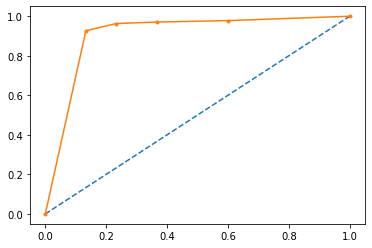

In [551]:
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
auc = roc_auc_score(cleaned_test_q01_label_7, probs)
print('AUC: %.3f' % auc)
# calculate roc curve
fpr, tpr, thresholds = roc_curve(cleaned_test_q01_label_7, probs)
# plot no skill
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(fpr, tpr, marker='.')
# show the plot
plt.show()

In [552]:
y_test_pred_scores = cross_val_score(dtc, cleaned_test_q01_data, cleaned_test_q01_label_7, cv=10, scoring="accuracy")
y_test_pred_scores.mean()


0.9106617647058822

In [553]:
y_test_pred_2 = cross_val_predict(dtc, cleaned_test_q01_data, cleaned_test_q01_label_7, cv=10)


In [554]:
confusion_matrix(cleaned_test_q01_label_7, y_test_pred)


array([[ 19,  11],
       [  4, 132]])

In [555]:
precision_score(cleaned_test_q01_label_7, y_test_pred)


0.9230769230769231

In [556]:
recall_score(cleaned_test_q01_label_7, y_test_pred)


0.9705882352941176

In [274]:
from sklearn.tree import export_graphviz
PROJECT_ROOT_DIR = "."

def image_path(fig_id):
    return os.path.join(PROJECT_ROOT_DIR, "images", fig_id)

export_graphviz(
        dtc,
        out_file=image_path("dtc_test.dot"),
        feature_names=cleaned_q01_data.columns,
        class_names='01-Truthfulness',
        rounded=True,
        filled=True
    )


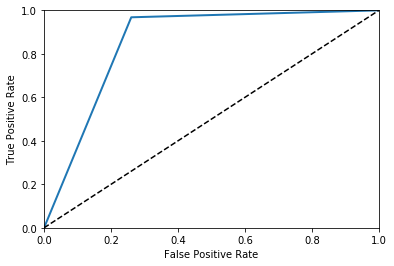

In [275]:
from sklearn.metrics import roc_curve
fpr, tpr, thresholds = roc_curve(cleaned_q01_label_7, y_train_pred_2)
def plot_roc_curve(fpr, tpr, label=None):
    plt.plot(fpr, tpr, linewidth=2, label=label)
    plt.plot([0, 1], [0, 1], 'k--')
    plt.axis([0, 1, 0, 1])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
plot_roc_curve(fpr, tpr)
plt.show()

In [276]:
from sklearn.metrics import roc_auc_score
roc_auc_score(cleaned_q01_label_7, y_train_pred_2)


0.8538624631268436

In [277]:
roc_auc_score(cleaned_test_q01_label_7, y_test_pred)

0.8019607843137255

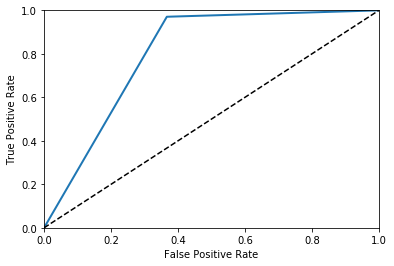

In [278]:
from sklearn.metrics import roc_curve
fpr, tpr, thresholds = roc_curve(cleaned_test_q01_label_7, y_test_pred)
def plot_roc_curve(fpr, tpr, label=None):
    plt.plot(fpr, tpr, linewidth=2, label=label)
    plt.plot([0, 1], [0, 1], 'k--')
    plt.axis([0, 1, 0, 1])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
plot_roc_curve(fpr, tpr)
plt.show()

In [279]:
from sklearn.tree import export_graphviz
PROJECT_ROOT_DIR = "."

def image_path(fig_id):
    return os.path.join(PROJECT_ROOT_DIR, "images", fig_id)

export_graphviz(
        dtc,
        out_file=image_path("dtc.dot"),
        feature_names=cleaned_q01_data.columns,
        class_names='01-Truthfulness',
        rounded=True,
        filled=True
    )

In [280]:
list(cleaned_q01_label_7.columns)


['01-Truthfulness']

In [281]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
max_depth = np.arange(1, 6)
max_leaf_nodes = [2, 4, 6, 8, 10]
min_samples_leaf = [1, 2, 3, 4, 5]
min_samples_split = [2, 4, 6]
n_estimators = [3, 10, 30]
criterion = ['gini', 'entropy']

param_grid = [
{'criterion': criterion, 'n_estimators': n_estimators, 'max_depth': max_depth, 'max_leaf_nodes': max_leaf_nodes, 'min_samples_leaf': min_samples_leaf, 'min_samples_split': min_samples_split}
]
rfc = RandomForestClassifier()

In [282]:
grid_search = GridSearchCV(rfc, param_grid, cv=10, scoring='accuracy')

In [283]:
grid_search = grid_search.fit(cleaned_q01_data, cleaned_q01_label_7.values.ravel())

/Users/smithkakar/anaconda2/envs/dissertation/lib/python3.7/site-packages/sklearn/model_selection/_search.py:813: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


In [284]:
grid_search.best_params_

{'criterion': 'entropy',
 'max_depth': 5,
 'max_leaf_nodes': 10,
 'min_samples_leaf': 4,
 'min_samples_split': 2,
 'n_estimators': 30}

In [285]:
grid_search.best_score_

0.9394856278366112

In [286]:
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier(n_estimators=30, random_state=42, criterion= 'entropy', max_depth=5, min_samples_split=2, min_samples_leaf=4, max_leaf_nodes=10)
rfc.fit(cleaned_q01_data, cleaned_q01_label_7.values.ravel())


RandomForestClassifier(bootstrap=True, class_weight=None, criterion='entropy',
                       max_depth=5, max_features='auto', max_leaf_nodes=10,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=4, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=30,
                       n_jobs=None, oob_score=False, random_state=42, verbose=0,
                       warm_start=False)

In [287]:
y_pred_2 = cross_val_score(rfc, cleaned_q01_data, cleaned_q01_label_7.values.ravel(), cv=10, scoring="accuracy")
y_pred_2.mean()

0.9304268865462897

In [288]:
y_train_pred_2 = cross_val_predict(rfc, cleaned_q01_data, cleaned_q01_label_7.values.ravel(), cv=10)
#y_train_pred_2

In [289]:
confusion_matrix(cleaned_q01_label_7, y_train_pred_2)

array([[ 62,  34],
       [ 12, 553]])

In [290]:
precision_score(cleaned_q01_label_7, y_train_pred_2)

0.9420783645655877

In [291]:
recall_score(cleaned_q01_label_7, y_train_pred_2)

0.9787610619469026

In [292]:
roc_auc_score(cleaned_q01_label_7, y_train_pred_2)

0.8122971976401179

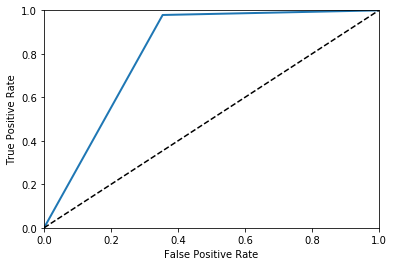

In [293]:
from sklearn.metrics import roc_curve
fpr, tpr, thresholds = roc_curve(cleaned_q01_label_7, y_train_pred_2)
def plot_roc_curve(fpr, tpr, label=None):
    plt.plot(fpr, tpr, linewidth=2, label=label)
    plt.plot([0, 1], [0, 1], 'k--')
    plt.axis([0, 1, 0, 1])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
plot_roc_curve(fpr, tpr)
plt.show()

In [294]:
y_test_rfc = rfc.predict(cleaned_test_q01_data)

In [295]:
y_test_rfc_pred = cross_val_predict(rfc, cleaned_test_q01_data, cleaned_test_q01_label_7.values.ravel(), cv=10)

In [296]:
confusion_matrix(cleaned_test_q01_label_7, y_test_rfc_pred)

array([[ 15,  15],
       [  5, 131]])

In [297]:
precision_score(cleaned_test_q01_label_7, y_test_rfc_pred)

0.8972602739726028

In [298]:
recall_score(cleaned_test_q01_label_7, y_test_rfc_pred)

0.9632352941176471

In [299]:
roc_auc_score(cleaned_test_q01_label_7, y_test_rfc_pred)

0.7316176470588236

In [169]:
from sklearn.tree import export_graphviz
PROJECT_ROOT_DIR = "."

def image_path(fig_id):
    return os.path.join(PROJECT_ROOT_DIR, "images", fig_id)

export_graphviz(
        rfc,
        out_file=image_path("dtc2.dot"),
        feature_names=cleaned_q01_data.columns,
        class_names='01-Truthfulness',
        rounded=True,
        filled=True
    )

NotFittedError: This RandomForestClassifier instance is not fitted yet. Call 'fit' with appropriate arguments before using this method.

In [ ]:
corr_matrix = user_responses.corr()

In [ ]:
#corr_matrix

In [ ]:
#Use Kendall or Spearman instead of Pearson R for ordinal Likert type data
corr_matrix = user_responses.iloc[:,9:].corr(method='kendall')

In [ ]:
#corr_matrix

In [ ]:
def plot_corr(corr,size=10):
    '''Function plots a graphical correlation matrix for each pair of columns in the dataframe.

    Input:
        df: pandas DataFrame
        size: vertical and horizontal size of the plot'''


    fig, ax = plt.subplots(figsize=(size, size))
    ax.matshow(corr)
    plt.xticks(range(len(corr.columns)), corr.columns);
    plt.yticks(range(len(corr.columns)), corr.columns);

In [ ]:
corr_matrix = user_responses.corr(method='spearman')

In [632]:
n = range(8,12)


range(8, 12)

In [631]:
for i in range(8,205,4):
    print(i)

8
12
16
20
24
28
32
36
40
44
48
52
56
60
64
68
72
76
80
84
88
92
96
100
104
108
112
116
120
124
128
132
136
140
144
148
152
156
160
164
168
172
176
180
184
188
192
196
200
204
